In [1]:
#load files
word_list = []
with open("word_list.txt", encoding= 'utf-8') as f:
    word_list = f.read().splitlines()

In [2]:
import numpy as np
words = np.asarray(word_list, dtype=str)
len(word_list)

5757

In [3]:
import numpy as np
orda = ord('a')

# place, letter, word_index
D = np.zeros([26,5,len(word_list)], dtype=bool)

for word_index, word in enumerate(word_list):
    for place, letter in enumerate(word):
        letter_index = ord(letter) - orda
        D[letter_index][place][word_index] = True

In [4]:
counts = np.sum(D,axis=2)

In [5]:
for l in range(26):
    print(chr(orda+l),end=' ')
    for p in range(5):
        print(counts[l,p],end='\t')
    print("sum:%d" % sum(counts[l,:]))

a 296	930	605	339	178	sum:2348
b 432	32	128	99	24	sum:715
c 440	82	184	210	48	sum:964
d 311	43	178	218	431	sum:1181
e 129	660	397	1228	595	sum:3009
f 318	12	87	100	44	sum:561
g 279	24	139	176	61	sum:679
h 239	271	39	73	192	sum:814
i 74	673	516	284	45	sum:1592
j 73	4	8	4	0	sum:89
k 91	29	90	243	143	sum:596
l 271	360	388	365	202	sum:1586
m 298	71	209	188	77	sum:843
n 118	168	410	386	203	sum:1285
o 108	911	484	262	150	sum:1915
p 386	113	169	196	91	sum:955
q 39	10	4	0	0	sum:53
r 268	456	475	310	401	sum:1910
s 724	40	248	257	1764	sum:3033
t 376	122	280	447	360	sum:1585
u 75	534	313	154	13	sum:1089
v 109	27	121	61	0	sum:318
w 228	81	98	70	28	sum:505
x 4	33	67	5	30	sum:139
y 47	65	68	41	665	sum:886
z 24	6	52	41	12	sum:135


In [6]:
top_per_column = np.flip((np.argsort(counts,axis=0) + orda),axis=0).astype(np.uint8)
index = 0
tmp = [print([chr(x) for x in line]) for line in top_per_column]

['s', 'a', 'a', 'e', 's']
['c', 'o', 'i', 't', 'y']
['b', 'i', 'o', 'n', 'e']
['p', 'e', 'r', 'l', 'd']
['t', 'u', 'n', 'a', 'r']
['f', 'r', 'e', 'r', 't']
['d', 'l', 'l', 'i', 'n']
['m', 'h', 'u', 'o', 'l']
['a', 'n', 't', 's', 'h']
['g', 't', 's', 'k', 'a']
['l', 'p', 'm', 'd', 'o']
['r', 'c', 'c', 'c', 'k']
['h', 'w', 'd', 'p', 'p']
['w', 'm', 'p', 'm', 'm']
['e', 'y', 'g', 'g', 'g']
['n', 'd', 'b', 'u', 'c']
['v', 's', 'v', 'f', 'i']
['o', 'x', 'w', 'b', 'f']
['k', 'b', 'k', 'h', 'x']
['u', 'k', 'f', 'w', 'w']
['i', 'v', 'y', 'v', 'b']
['j', 'g', 'x', 'y', 'u']
['y', 'f', 'z', 'z', 'z']
['q', 'q', 'h', 'x', 'q']
['z', 'z', 'j', 'j', 'j']
['x', 'j', 'q', 'q', 'v']


In [7]:
totals = np.sum(counts, axis=1)
most_used_letters = [print(chr(x+orda), end=',') for x in np.flip(np.argsort(totals))]

s,e,a,o,r,i,l,t,n,d,u,c,p,y,m,h,b,g,k,f,w,v,x,z,j,q,

In [8]:
import logging
import math

class Wordl:
    @staticmethod
    def is_valid_guess(guess):
        if len(guess) != 5:
            print("Only 5 letter word_list")
            return False
        if guess not in word_list:
            print("Not a valid word")
            return False
        return True
    
    @staticmethod
    def is_valid_result(result):
        if result:
            if len(result) == 5:
                for letter in result:
                    if letter not in ['b','y','g']:
                        print("Invalid character",letter,"\nPlease enter guesses in 'byg' format")
                        return False
                return True
        print("Invalid Result",result) 
        return False

    @staticmethod
    def score_guess(guess, answer):
        #self.guesses.append(guess)
        if not Wordl.is_valid_guess(guess):
            return None
        result = list('bbbbb')
        match = np.full(5, -1)
        #find exact matches
        for i, letter in enumerate(guess):
            if answer[i] == letter:
                result[i] = 'g'
                match[i] = i
        #find yellow matches
        for i, letter in enumerate(guess):
            for j, answer_letter in enumerate(answer):
                #if not allready matched
                if match[i] < 0:
                    if answer_letter == letter:
                        if not j in match:
                            result[i] = 'y'
                            match[i] = j
                            break
        #0 no, 1 yellow, 2 green
        return "".join(result)

class WordlAI:
    def __init__(self):
        self.letters = np.zeros([26,5]) #-1 no, 0 unknown, 1 yellow, 2 green
        self.exact = np.full(5,-1)
        self.remaining_words = np.ones(len(word_list),dtype=bool)
        self.possible_results = WordlAI.enumerate_possible_results()
        #print(self.possible_results)
        #print(len(self.possible_results))
    
    def get_possible_words(self, letters, exact):
        pwords = np.ones(len(word_list), dtype=bool)
        #logging.debug("start %d",np.sum(pwords))
            
        # Or the list of possibles
        #logging.debug("filter possibles")
        for letter_index in range(26):
            letter_words = np.zeros(len(word_list), dtype=bool)
            intersect = False
            for place_index in range(5):
                # or together all of the possibles from the letter row
                if letters[letter_index, place_index] >= 0:
                    letter_words |= D[letter_index, place_index, :]
                    if letters[letter_index, place_index] == 1:
                        intersect = True
            if intersect:
                pwords &= letter_words
                # logging.debug("%s %d %d",chr(letter_index + orda), np.sum(pwords), np.sum(letter_words))
        
        # Remove all impossibles
        #logging.debug("remove impossibles")
        for letter_index in range(26):
            for place_index in range(5):
                if letters[letter_index,place_index] == -1:
                    #pwords ^= (pwords & D[letter_index, place_index, :])
                    pwords &= ~D[letter_index, place_index, :]
                    #logging.debug("%s %d %d %d",chr(letter_index + orda),place_index, np.sum(pwords), np.sum(D[letter_index, place_index, :]))
        
        # And with exacts at the end
        #logging.debug("filter exacts")
        for i, letter in enumerate(exact):
            if letter >= 0:
                pwords &= D[letter,i,:]
                #logging.debug("%s %d %d %d",chr(letter + orda),i, sum(pwords), sum(D[letter,i,:]))
        return np.sum(pwords), pwords
    
    @staticmethod
    def evaluate_guess(guess, result, _letters, _exact):
        letters = np.copy(_letters)
        exact = np.copy(_exact)
        if len(guess) != 5:
            print("Only 5 letter words")
            return None
         #0 no, 1 yellow, 2 green
        for i, letter in enumerate(guess):
            letter_index = ord(letter) - orda
            if result[i] == 'b':
                for j in range(5):
                    if letters[letter_index, j] == 0 or j == i:                       
                        letters[letter_index, j] = -1 
            elif result[i] == 'y':
                for j in range(5):
                    if i == j:
                        letters[letter_index, i] = -1
                    elif letters[letter_index, j] == 0:
                        letters[letter_index, j] = 1
            elif result[i] == 'g':
                letters[:, i] = -1
                letters[letter_index, i] = 2
                exact[i] = letter_index
            else:
                print("Invalid Result", result, "must use 'byg' format")
        return letters, exact
    
    def add_guess(self, guess, result):
        self.letters, self.exact = WordlAI.evaluate_guess(guess, result, self.letters, self.exact)
    
    @staticmethod
    def print_filtered_words(pwords):
        num_printed = 0
        num_words = np.sum(pwords)
        for i in np.where(pwords)[0]:
            num_printed += 1
            if num_printed == num_words or num_printed >= 49:
                print(word_list[i], end="...\n" if num_printed < num_words else '\n')
                break
            print(word_list[i], end=', ')
    
    @staticmethod
    def enumerate_possible_results():
        pr = []
        
        def helper(a):
            if len(a) == 5:
                pr.append(a)
                return
            for i in range(3):
                helper(a+[i])
        helper([])
        return pr
    
    def calculate_mutual_information(self, guess, n=None):
        probs = []
        if not n:
            n = np.sum(self.remaining_words)
        actions = {}
        possible_answer = 0
        for answer in words[self.remaining_words]:
            res = Wordl.score_guess(guess,answer)
            actions.setdefault(res, 0)
            actions[res] += 1
            # if the guess matches an answer it should get a boost
            if guess == answer:
                possible_answer = 1
        for x in actions.values():
            probs.append(x/n)
        logs = [-p*math.log2(p) for p in probs]
        return sum(logs), possible_answer #, probs, logs, actions       
        
    def old_calculate_mutual_information(self, word):
        probs = []
        n = np.sum(self.remaining_words)
        action = [0]*5
        ### enumerate possible results
        for action in self.possible_results:
            letters, exact = WordlAI.evaluate_guess(word, action, self.letters, self.exact)
            x,_ = self.get_possible_words(letters,exact)
            if x > 0:
                probs.append(x/n)

        ### calculate the information
        logs = [-p*math.log2(p) for p in probs]
        return sum(logs)
    #, list(zip(probs, self.possible_results))
        
    def suggest(self):
        ## for each word
        #best = float("inf")
        #suggestion = "None!"
        scores = []
        count = 0
        n = np.sum(self.remaining_words)
        for word in word_list:
            information, possible_answer = self.calculate_mutual_information(word, n)
            scores.append([information, possible_answer, word])
            count += 1
            #if count > 25:
            #    break
            #if information < best:
            #   best = information
            #   suggestion = word
        ### choose guess with highest information gain
        scores.sort(reverse=True)
        return scores[0][2], scores
    
    def next_move(self, guess, result, print_remaining_words=False):
        print("Guessed:",guess," with result ", result)
        self.add_guess(guess, result)
        logging.debug(self.letters)
        logging.debug(self.exact)
        n, self.remaining_words = self.get_possible_words(self.letters, self.exact)
        print("%d possible words remaining:" % n)
        if print_remaining_words:
            WordlAI.print_filtered_words(self.remaining_words)
        return n, self.remaining_words
    
    # solve a wordle puzzle without knowing answer
    def solve(self, input_guesses=True):
        num_remaining = len(words)
        result = None
        print("Wordl, please enter guesses in 'byg' format")
        turn = 1
        result = None
        while num_remaining > 1:
            while turn == 1 or input_guesses:
                guess = input("Guess %d:" % turn)
                if Wordl.is_valid_guess(guess):
                    break
            while True:
              result = input("Result: ")
              if Wordl.is_valid_result(result):
                    break
            if result == 'ggggg':
                break
            num_remaining,_ = self.next_move(guess, result, print_remaining_words=True)
            guess, stats = self.suggest()
            print("Guess %d," % turn,"Try:",guess)
            turn += 1
        print("SOLVED!")

In [ ]:
ai = WordlAI()
ai.solve()


Wordl, please enter guesses in 'byg' format
Guess 1:tales
Result: bybbb
Guessed: tales  with result  bybbb
192 possible words remaining:
again, among, woman, human, board, chair, angry, drawn, piano, graph, grain, broad, brain, avoid, chain, guard, arrow, crack, coach, grand, drank, drama, crazy, apron, organ, comma, urban, charm, array, brand, armor, diary, cocoa, award, drain, wharf, gonna, agony, china, crank, cigar, groan, ovary, quack, frank, gravy, dwarf, braid, pizza...
Guess 1, Try: mourn
Guess 2:mourn
Result: bbbyy
Guessed: mourn  with result  bbbyy
8 possible words remaining:
grand, drank, brand, crank, frank, franc, prank, dinar
Guess 2, Try: decaf


In [ ]:
ai = WordlAI()
ai.next_move('tares',[0,0,0,0,0])
pair = ai.calculate_mutual_information('etext')
print(len(pair[1]))
print(sum(pair[1]))
print(sum(pair[3].values()))
print(pair[1])
print(pair[2])
print(pair[0])

In [ ]:
import time
start = time.time()
## for each word
### enumerate possible results
### calculate the information
### choose guess with highest information gain
ai = WordlAI()
order = ai.suggest()
print(order)
print("time: ", time.time()-start)

In [ ]:
start = time.time()
ai = WordlAI()
ai.next_move('tares',[0,0,0,0,0])
pair = ai.suggest()
print("time: ", time.time()-start)
#x = [a[0] for a in pair[1]]
#print(sum(x))
#print(len(x))
#print(pair[1])


In [43]:
import random as rand

class WordlGame:
    def __init__(self):
        self.max_turns = 18
    
    def play(self, initial_guess="tares", user=False, answer=word_list[rand.randrange(len(word_list))]):
        ai = WordlAI()
        self.answer = answer
        print("Answer is:", answer)
        solved = False
        turn = 1
        if initial_guess:
            guess = initial_guess
            result = Wordl.score_guess(initial_guess, self.answer)
            if result is None:
                print("Invalid Initial Guess",initial_guess)
                return 0
        else:
            result = None
        while not solved and turn <= self.max_turns:
            while result is None:
                if user:
                    guess = input("Guess %d:" % turn)
                else:
                    guess, stats = ai.suggest()
                    #print(stats)  
                result = Wordl.score_guess(guess, self.answer)
            if guess == self.answer:
                solved = True
                print ("YOU SOLVED",guess,"in %d TURNS" % turn)
                return turn
            ai.next_move(guess, result)
            result = None
            turn = turn + 1
        print ("Out of Turns. The answer was ", self.answer)
        return turn

In [44]:
import time
def print_hist_stats(hist, start_time):
    print("Hist:", hist)
    total_turns = 0
    n = np.sum(hist)
    worst = 0
    for i,num in enumerate(hist):
        total_turns += num*i
        if num > 0:
            worst = i
            
    print("mean:", total_turns/n)
    print("mode:", np.argmax(hist))
    print("worst:", worst)
    print("above 6:", np.sum(hist[7:]))
    total_time = time.time() - start_time
    print("runtime total:",total_time,"avg:",total_time/n)

In [85]:
import time
start = time.time()
turn_distribution = np.zeros(20)
for i, word in enumerate(word_list):
    game=Wordl()
    turns=game.play(initial_guess="tares", answer=word)
    turn_distribution[turns] += 1
    if i%5 == 0:
        print_hist_stats(turn_distribution, start)
print_hist_stats(turn_distribution, start)

Answer is: which
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: doily  with result  [0. 0. 2. 0. 0.]
13 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: punch  with result  [0. 0. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mean: 4.0
mode: 4
worst: 4
above 6: 0.0
runtime total: 67.31479477882385 avg: 67.31479477882385
Answer is: there
[2. 0. 1. 1. 0.]
Guessed: tares  with result  [2. 0. 1. 1. 0.]
14 possible words remaining:
[0. 1. 0. 0. 2.]
Guessed: price  with result  [0. 1. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: their
[2. 0. 1. 1. 0.]
Guessed: tares  with result  [2. 0. 1. 1. 0.]
14 possible words remaining:
[0. 1. 1. 0. 1.]
Guessed: price  with result  [0. 1. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: about


415 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: doily  with result  [1. 2. 0. 0. 0.]
10 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: whump  with result  [0. 0. 2. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [ 0.  0.  0. 12. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
mean: 3.5384615384615383
mode: 4
worst: 4
above 6: 0.0
runtime total: 463.7647340297699 avg: 17.83710515499115
Answer is: those
[2. 0. 0. 1. 1.]
Guessed: tares  with result  [2. 0. 0. 1. 1.]
4 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 2 TURNS
Answer is: never
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: bipod  with result  [0. 0. 0. 0. 0.]
31 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: flung  with result  [0. 0. 0. 1. 0.]
3 possible words remaining:
[1. 2. 1. 2. 0.]
Guessed: renew  with result  [1. 2. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2

2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: raper  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: parts
[1. 2. 2. 0. 2.]
Guessed: tares  with result  [1. 2. 2. 0. 2.]
7 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: whump  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [ 0.  0.  2. 21. 25.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
mean: 3.5686274509803924
mode: 4
worst: 5
above 6: 0.0
runtime total: 960.3784532546997 avg: 18.830950063817642
Answer is: young
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 2. 0. 0. 1.]
Guessed: doily  with result  [0. 2. 0. 0. 1.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: story
[1. 0. 1. 0. 1.]
Guessed: tares  with result  [1. 0. 1. 0. 1.]
16 possible words remaining:
[2. 0. 2. 0. 1.]
Guessed: shout  with result 

[1. 0. 2. 1. 0.]
Guessed: plash  with result  [1. 0. 2. 1. 0.]
3 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: yucky  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: table
[2. 2. 0. 1. 0.]
Guessed: tares  with result  [2. 2. 0. 1. 0.]
2 possible words remaining:
[2. 2. 0. 0. 2.]
Guessed: taupe  with result  [2. 2. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: early
[0. 2. 2. 1. 0.]
Guessed: tares  with result  [0. 2. 2. 1. 0.]
8 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: mungy  with result  [0. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [ 0.  0.  2. 31. 39.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
mean: 3.5921052631578947
mode: 4
worst: 5
above 6: 0.0
runtime total: 1482.8757033348083 avg: 19.51152241230011
Answer is: trees
[2. 0. 1. 2. 2.]
Guessed: tares  with result  [2. 0. 1. 2. 2.]
3 possible wo

[0. 0. 2. 0. 0.]
Guessed: child  with result  [0. 0. 2. 0. 0.]
3 possible words remaining:
[1. 0. 2. 2. 2.]
Guessed: unite  with result  [1. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: class
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: sonly  with result  [1. 0. 0. 1. 0.]
19 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: humpf  with result  [0. 0. 0. 0. 0.]
7 possible words remaining:
[1. 1. 2. 0. 2.]
Guessed: scads  with result  [1. 1. 2. 0. 2.]
2 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: claws  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 6 TURNS
Answer is: bring
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: doing  with result  [0. 0. 2. 2. 2.]
3 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: wring  with result  [0. 2. 2. 2.

[0. 1. 1. 0. 1.]
Guessed: until  with result  [0. 1. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: doing
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[2. 2. 2. 0. 0.]
Guessed: doily  with result  [2. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [ 0.  0.  2. 44. 65.  9.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
mean: 3.6942148760330578
mode: 4
worst: 6
above 6: 0.0
runtime total: 2400.024021625519 avg: 19.834909269632387
Answer is: names
[0. 2. 0. 2. 2.]
Guessed: tares  with result  [0. 2. 0. 2. 2.]
77 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: clomp  with result  [0. 0. 0. 1. 0.]
8 possible words remaining:
[2. 0. 2. 0. 0.]
Guessed: nymph  with result  [2. 0. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: forms
[0. 0. 2. 0. 2.]
Guessed: tares  with result  [0. 0. 2. 0. 2.]
45 possibl

Guessed: tapes  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: party
[1. 2. 2. 0. 0.]
Guessed: tares  with result  [1. 2. 2. 0. 0.]
4 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: wreck  with result  [0. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: build
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[1. 0. 2. 2. 0.]
Guessed: doily  with result  [1. 0. 2. 2. 0.]
3 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: guild  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: seems
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plein  with result  [0. 0. 2. 0. 0.]
24 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: dhows  with result  [0. 0. 0. 0. 2.]
6 possible words remaining:
[2. 2. 2. 0. 2.]

[0. 0. 1. 1. 0.]
Guessed: bland  with result  [0. 0. 1. 1. 0.]
6 possible words remaining:
[0. 1. 0. 2. 2.]
Guessed: vegan  with result  [0. 1. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: speed
[0. 0. 0. 2. 1.]
Guessed: tares  with result  [0. 0. 0. 2. 1.]
42 possible words remaining:
[2. 0. 0. 0. 2.]
Guessed: solid  with result  [2. 0. 0. 0. 2.]
5 possible words remaining:
[0. 1. 2. 1. 0.]
Guessed: weepy  with result  [0. 1. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: women
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: blond  with result  [0. 0. 1. 1. 0.]
9 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: coven  with result  [0. 2. 0. 2. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: metal
[1. 1. 0. 1. 0.]
Guessed: tares  with result  [1. 1. 0. 1. 0.]
43 possible words remaining:


1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.   2.  69. 103.  15.   2.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.717277486910995
mode: 4
worst: 6
above 6: 0.0
runtime total: 3757.5532233715057 avg: 19.673053525505267
Answer is: catch
[1. 2. 0. 0. 0.]
Guessed: tares  with result  [1. 2. 0. 0. 0.]
49 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: lynch  with result  [0. 0. 0. 2. 2.]
6 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: wombs  with result  [0. 0. 0. 0. 0.]
3 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: hypos  with result  [1. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: works
[0. 0. 2. 0. 2.]
Guessed: tares  with result  [0. 0. 2. 0. 2.]
45 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: mould  with result  [0. 2. 0. 0. 0.]
7 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: uncap  with result  [0. 0. 0. 0. 0.]
2 possible words remai

[0. 2. 1. 2. 0.]
Guessed: litho  with result  [0. 2. 1. 2. 0.]
4 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: numbs  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: meant
[1. 1. 0. 1. 0.]
Guessed: tares  with result  [1. 1. 0. 1. 0.]
43 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: plant  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: drive
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[2. 0. 2. 0. 2.]
Guessed: deice  with result  [2. 0. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: spent
[1. 0. 0. 1. 1.]
Guessed: tares  with result  [1. 0. 0. 1. 1.]
44 possible words remaining:
[1. 0. 0. 0. 2.]
Guessed: pilot  with result  [1. 0. 0. 0. 2.]
2 possible words remaining:
[2. 0. 2. 1. 2.]
Guessed: swept  with result  [2. 0. 2. 1. 2.]
1 possible words remaining:
[

[0. 0. 1. 0. 0.]
Guessed: yummy  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: verbs
[0. 0. 2. 1. 2.]
Guessed: tares  with result  [0. 0. 2. 1. 2.]
18 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: knobs  with result  [0. 0. 0. 2. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: seeds
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plein  with result  [0. 0. 2. 0. 0.]
24 possible words remaining:
[1. 0. 0. 0. 2.]
Guessed: dhows  with result  [1. 0. 0. 0. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: helps
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: plein  with result  [1. 1. 1. 0. 0.]
3 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: yukky  with result  [0. 0. 0. 0. 0.]
1 possible words remaining

[0. 0. 0. 0. 0.]
Guessed: zilch  with result  [0. 0. 0. 0. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: nones  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 6 TURNS
Answer is: apart
[1. 1. 1. 0. 0.]
Guessed: tares  with result  [1. 1. 1. 0. 0.]
23 possible words remaining:
[0. 1. 0. 0. 2.]
Guessed: grout  with result  [0. 1. 0. 0. 2.]
2 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: chart  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   2.  95. 136.  25.   3.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.739463601532567
mode: 4
worst: 6
above 6: 0.0
runtime total: 5027.151251077652 avg: 19.261115904512078
Answer is: turns
[2. 0. 2. 0. 2.]
Guessed: tares  with result  [2. 0. 2. 0. 2.]
8 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: pound  with result  [0. 0. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOL

[0. 0. 1. 0. 1.]
Guessed: litho  with result  [0. 0. 1. 0. 1.]
8 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: mount  with result  [0. 2. 2. 2. 2.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: fount  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: enjoy
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 1. 0. 1. 0.]
Guessed: doing  with result  [0. 1. 0. 1. 0.]
9 possible words remaining:
[0. 1. 0. 2. 1.]
Guessed: melon  with result  [0. 1. 0. 2. 1.]
2 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: envoy  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: score
[0. 0. 1. 1. 1.]
Guessed: tares  with result  [0. 0. 1. 1. 1.]
18 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: phone  with result  [0. 0. 2. 0. 2.]
2 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: swore  with result  [2. 0. 2. 2. 2

Guessed: pouch  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: piano
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: cling  with result  [0. 0. 1. 2. 0.]
2 possible words remaining:
[0. 2. 2. 2. 0.]
Guessed: viand  with result  [0. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: upper
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: bipod  with result  [0. 0. 2. 0. 0.]
5 possible words remaining:
[1. 1. 2. 2. 0.]
Guessed: rupee  with result  [1. 1. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: loved
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 1. 1. 0. 2.]
Guessed: blond  with result  [0. 1. 1. 0. 2.]
8 possible words remaining:
[0. 2. 1. 0. 0.

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: match
[1. 2. 0. 0. 0.]
Guessed: tares  with result  [1. 2. 0. 0. 0.]
49 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: lynch  with result  [0. 0. 0. 2. 2.]
6 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: wombs  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   2. 122. 171.  33.   3.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7371601208459215
mode: 4
worst: 6
above 6: 0.0
runtime total: 6251.723005771637 avg: 18.88738068208954
Answer is: truth
[2. 0. 1. 0. 0.]
Guessed: tares  with result  [2. 0. 1. 0. 0.]
18 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: pouch  with result  [0. 0. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: roads
[0. 1. 1. 0. 2.]
Guessed: tares  with result  [0. 1. 1. 0. 2.]
44 possible words remaining:
[0. 1. 1. 2. 0.]
Guessed: 

[0. 0. 2. 1. 0.]
Guessed: doing  with result  [0. 0. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: fence
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: doing  with result  [0. 0. 0. 1. 0.]
10 possible words remaining:
[0. 2. 0. 2. 0.]
Guessed: welch  with result  [0. 2. 0. 2. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: pence  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: falls
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: blink  with result  [0. 1. 0. 0. 0.]
21 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: whump  with result  [0. 0. 0. 0. 0.]
6 possible words remaining:
[2. 0. 0. 1. 1.]
Guessed: focal  with result  [2. 0. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [  0.   0

[0. 1. 0. 0. 1.]
Guessed: point  with result  [0. 1. 0. 0. 1.]
6 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: wooly  with result  [0. 0. 2. 0. 0.]
2 possible words remaining:
[2. 2. 2. 0. 0.]
Guessed: stood  with result  [2. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: hurry
[0. 0. 2. 0. 0.]
Guessed: tares  with result  [0. 0. 2. 0. 0.]
46 possible words remaining:
[0. 2. 0. 1. 2.]
Guessed: duchy  with result  [0. 2. 0. 1. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: saved
[0. 2. 0. 2. 1.]
Guessed: tares  with result  [0. 2. 0. 2. 1.]
7 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: scowl  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: sorry
[0. 0. 2. 0. 1.]
Guessed: tares  with result  [0. 0. 2. 0. 1.]
14 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: pubic  with result  [0. 0. 0. 0. 0.]
2 possible words remaining:
[2

Guessed: unfix  with result  [0. 2. 0. 0. 0.]
2 possible words remaining:
[0. 2. 1. 2. 2.]
Guessed: kneed  with result  [0. 2. 1. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [  0.   0.   4. 149. 200.  44.   4.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7381546134663344
mode: 4
worst: 6
above 6: 0.0
runtime total: 7713.664955377579 avg: 19.236072207924135
Answer is: chord
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: doing  with result  [1. 1. 0. 0. 0.]
7 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: whoop  with result  [0. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: false
[0. 2. 0. 1. 1.]
Guessed: tares  with result  [0. 2. 0. 1. 1.]
10 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: pulse  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TU

[0. 2. 0. 1. 0.]
Guessed: doing  with result  [0. 2. 0. 1. 0.]
3 possible words remaining:
[0. 2. 0. 1. 1.]
Guessed: yourn  with result  [0. 2. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: globe
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: doing  with result  [0. 1. 0. 0. 1.]
4 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: glove  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: gases
[0. 2. 0. 2. 2.]
Guessed: tares  with result  [0. 2. 0. 2. 2.]
77 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: clomp  with result  [0. 0. 0. 0. 0.]
34 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: swung  with result  [1. 0. 0. 0. 1.]
3 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: zesty  with result  [0. 1. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: doors


[0. 1. 0. 0. 0.]
Guessed: clomp  with result  [0. 1. 0. 0. 0.]
14 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: veldt  with result  [0. 1. 1. 0. 0.]
4 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: zonks  with result  [0. 0. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: bound
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: doily  with result  [1. 2. 0. 0. 0.]
10 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: whump  with result  [0. 0. 2. 0. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: found  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: depth
[1. 0. 0. 1. 0.]
Guessed: tares  with result  [1. 0. 0. 1. 0.]
63 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: child  with result  [0. 1. 0. 0. 1.]
2 possible words remaining:
[2. 0. 1. 2. 2.]
Guessed: doeth  with result  [2. 0. 1. 2.

[1. 1. 0. 0. 1.]
Guessed: pound  with result  [1. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: spite
[1. 0. 0. 1. 1.]
Guessed: tares  with result  [1. 0. 0. 1. 1.]
44 possible words remaining:
[1. 1. 0. 0. 1.]
Guessed: pilot  with result  [1. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.   5. 169. 242.  51.   4.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.745222929936306
mode: 4
worst: 6
above 6: 0.0
runtime total: 9180.020732402802 avg: 19.490489877712953
Answer is: orbit
[1. 0. 1. 0. 0.]
Guessed: tares  with result  [1. 0. 1. 0. 0.]
32 possible words remaining:
[0. 1. 0. 0. 2.]
Guessed: fount  with result  [0. 1. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: banks
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[2. 0. 0. 1. 1.]
Guessed: blink  with result  [2. 0. 

[0. 0. 0. 0. 2.]
Guessed: deice  with result  [0. 0. 0. 0. 2.]
19 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: blown  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: glory
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: doing  with result  [0. 1. 0. 0. 1.]
5 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: wimpy  with result  [0. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   5. 179. 257.  51.   4.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7379032258064515
mode: 4
worst: 6
above 6: 0.0
runtime total: 9658.782661437988 avg: 19.473352139995946
Answer is: guard
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: blond  with result  [0. 0. 0. 0. 2.]
5 possible words remaining:
[0. 2. 0. 0. 0.]
Gu

92 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: spoil  with result  [1. 0. 2. 0. 0.]
5 possible words remaining:
[0. 1. 0. 1. 0.]
Guessed: women  with result  [0. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: owner
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: bipod  with result  [0. 0. 0. 1. 0.]
26 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: welch  with result  [1. 1. 0. 0. 0.]
4 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: vomit  with result  [0. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: vapor
[0. 2. 1. 0. 0.]
Guessed: tares  with result  [0. 2. 1. 0. 0.]
34 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: blind  with result  [0. 0. 0. 0. 0.]
7 possible words remaining:
[2. 1. 0. 2. 0.]
Guessed: vroom  with result  [2. 1. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT

[0. 2. 0. 1. 0.]
Guessed: mould  with result  [0. 2. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.   5. 190. 288.  54.   4.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.744916820702403
mode: 4
worst: 6
above 6: 0.0
runtime total: 10429.983030557632 avg: 19.27908138735237
Answer is: stems
[1. 0. 0. 1. 2.]
Guessed: tares  with result  [1. 0. 0. 1. 2.]
41 possible words remaining:
[0. 1. 1. 1. 2.]
Guessed: wests  with result  [0. 1. 1. 1. 2.]
4 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: steps  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: pride
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[1. 0. 2. 0. 2.]
Guessed: deice  with result  [1. 0. 2. 0. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: swung
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0.

4 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: hexed  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: faced
[0. 2. 0. 2. 0.]
Guessed: tares  with result  [0. 2. 0. 2. 0.]
73 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: lynch  with result  [0. 0. 0. 1. 0.]
9 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: pocky  with result  [0. 0. 2. 0. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: maced  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: mines
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: plink  with result  [0. 0. 1. 1. 0.]
8 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: nomad  with result  [1. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   6. 198. 300.  57.   5.   0.   0.   0.   0.   0.   0.   0.
   0

[0. 0. 0. 2. 0.]
Guessed: would  with result  [0. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   6. 202. 313.  60.   5.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7542662116040955
mode: 4
worst: 6
above 6: 0.0
runtime total: 11261.194290161133 avg: 19.217055102664048
Answer is: flame
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: bland  with result  [0. 2. 2. 0. 0.]
5 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: smock  with result  [0. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rates
[1. 2. 1. 2. 2.]
Guessed: tares  with result  [1. 2. 1. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 2 TURNS
Answer is: drill
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[2. 0. 2. 0. 0.]
Guessed: doing  with result  [2. 0

[0. 1. 2. 0. 0.]
Guessed: bland  with result  [0. 1. 2. 0. 0.]
10 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: whelp  with result  [0. 0. 1. 2. 0.]
4 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: zooms  with result  [0. 0. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: shake
[0. 1. 0. 1. 1.]
Guessed: tares  with result  [0. 1. 0. 1. 1.]
37 possible words remaining:
[0. 0. 2. 1. 1.]
Guessed: plash  with result  [0. 0. 2. 1. 1.]
4 possible words remaining:
[0. 0. 0. 2. 1.]
Guessed: vodka  with result  [0. 0. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   7. 212. 322.  64.   6.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7545008183306057
mode: 4
worst: 6
above 6: 0.0
runtime total: 11743.502908706665 avg: 19.220135693464265
Answer is: shops
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[1. 0. 2. 0. 0.]
Gu

[2. 0. 2. 1. 0.]
Guessed: charm  with result  [2. 0. 2. 1. 0.]
2 possible words remaining:
[2. 2. 2. 0. 0.]
Guessed: crazy  with result  [2. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: print
[1. 0. 1. 0. 0.]
Guessed: tares  with result  [1. 0. 1. 0. 0.]
32 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: fount  with result  [0. 0. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: tales
[2. 2. 0. 2. 2.]
Guessed: tares  with result  [2. 2. 0. 2. 2.]
5 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: xylem  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: coach
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: cling  with result  [2. 0. 0. 0. 0.]
7 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: whoop  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:
[

[2. 2. 0. 2. 2.]
Guessed: gists  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: lists
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: solum  with result  [1. 0. 1. 0. 0.]
4 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: unify  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   7. 226. 346.  71.   6.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.760670731707317
mode: 4
worst: 6
above 6: 0.0
runtime total: 12636.341701030731 avg: 19.262716007668796
Answer is: stops
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[2. 1. 0. 0. 0.]
Guessed: solum  with result  [2. 1. 0. 0. 0.]
5 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: whops  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: sixty
[1. 0. 0. 0. 1.]
Guessed: tares  with result  [1. 0. 0. 0. 1.]
74 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: point  with result  [0. 0. 1. 0. 1.]
7 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: altar
[1. 1. 1. 0. 0.]
Guessed: tares  with result  [1. 1. 1. 0. 0.]
23 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: grout  with result  [0. 1. 0. 0. 1.]
3 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: attar  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: pulls
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[2. 1. 0. 0. 0.]
Guessed: plonk  with result  [2. 1. 0. 0. 0.]
3 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: pulps  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   7.

[0. 0. 2. 1. 1.]
Guessed: plash  with result  [0. 0. 2. 1. 1.]
4 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: vodka  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: burnt
[1. 0. 2. 0. 0.]
Guessed: tares  with result  [1. 0. 2. 0. 0.]
11 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: fight  with result  [0. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: races
[0. 2. 1. 2. 2.]
Guessed: tares  with result  [0. 2. 1. 2. 2.]
6 possible words remaining:
[1. 0. 1. 1. 0.]
Guessed: speck  with result  [1. 0. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: flash
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: plank  with result  [0. 2. 2. 0. 0.]
4 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: scurf  with result  [1. 0. 0. 0. 1.]
1 possible words remaining:
[2

2 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: start  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   7. 252. 379.  82.   6.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.763085399449036
mode: 4
worst: 6
above 6: 0.0
runtime total: 13828.715655326843 avg: 19.047817707061768
Answer is: upset
[1. 0. 0. 2. 1.]
Guessed: tares  with result  [1. 0. 0. 2. 1.]
17 possible words remaining:
[1. 2. 0. 0. 2.]
Guessed: spilt  with result  [1. 2. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: rains
[0. 2. 1. 0. 2.]
Guessed: tares  with result  [0. 2. 1. 0. 2.]
13 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: plink  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: sandy
[0. 2. 0. 0. 1.]
Guessed: tares  with result  [0. 2. 0. 0. 1.]
34 possible words remaining:
[0. 0. 1. 0. 2.]
Guessed:

[0. 0. 2. 2. 0.]
Guessed: yodel  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: admit
[1. 1. 0. 0. 0.]
Guessed: tares  with result  [1. 1. 0. 0. 0.]
47 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: until  with result  [0. 0. 1. 2. 0.]
3 possible words remaining:
[2. 1. 0. 2. 2.]
Guessed: ambit  with result  [2. 1. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: shift
[1. 0. 0. 0. 1.]
Guessed: tares  with result  [1. 0. 0. 0. 1.]
74 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: point  with result  [0. 0. 2. 0. 2.]
4 possible words remaining:
[0. 2. 2. 1. 2.]
Guessed: whist  with result  [0. 2. 2. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sails
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: blink  with result  [0. 1. 2. 0. 0.]
8 possible words remaining:


[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: acted
[1. 1. 0. 2. 0.]
Guessed: tares  with result  [1. 1. 0. 2. 0.]
2 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: anted  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.   7. 262. 410.  85.   7.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7704280155642023
mode: 4
worst: 6
above 6: 0.0
runtime total: 14597.261091470718 avg: 18.932893763256445
Answer is: goats
[1. 1. 0. 0. 2.]
Guessed: tares  with result  [1. 1. 0. 0. 2.]
31 possible words remaining:
[1. 0. 1. 2. 0.]
Guessed: sloth  with result  [1. 0. 1. 2. 0.]
4 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: magic  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: arise
[0. 1. 1. 1. 1.]
Guessed: tares  with result  [0. 1. 1. 1. 1.]
14 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: where  with result  [0. 0. 

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: mayor
[0. 2. 1. 0. 0.]
Guessed: tares  with result  [0. 2. 1. 0. 0.]
34 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: blind  with result  [0. 0. 0. 0. 0.]
7 possible words remaining:
[0. 1. 0. 2. 1.]
Guessed: vroom  with result  [0. 1. 0. 2. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: opens
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[1. 0. 2. 0. 1.]
Guessed: plein  with result  [1. 0. 2. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: input
[1. 0. 0. 0. 0.]
Guessed: tares  with result  [1. 0. 0. 0. 0.]
121 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: litho  with result  [0. 1. 1. 0. 0.]
7 possible words remaining:
[1. 2. 0. 1. 2.]
Guessed: unfit  with result  [1. 2. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fleet
[1.

[0. 0. 0. 0. 2.]
Guessed: blond  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[0. 2. 0. 0. 1.]
Guessed: mixup  with result  [0. 2. 0. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: blown
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 1. 0. 1. 0.]
Guessed: doily  with result  [0. 1. 0. 1. 0.]
13 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: bunch  with result  [2. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: piled
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 1. 0. 0. 2.]
Guessed: blond  with result  [0. 1. 0. 0. 2.]
7 possible words remaining:
[1. 2. 0. 1. 0.]
Guessed: limps  with result  [1. 2. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: clubs
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaini

[1. 0. 0. 0. 0.]
Guessed: milch  with result  [1. 0. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 0.]
Guessed: tempt  with result  [2. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   9. 281. 450.  94.   7.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.772889417360285
mode: 4
worst: 6
above 6: 0.0
runtime total: 16057.601279497147 avg: 19.09346168786819
Answer is: humor
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: doing  with result  [0. 1. 0. 0. 0.]
18 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: clump  with result  [0. 0. 1. 1. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: rumor  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: sends
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 1. 0. 1.]
Gue

[0. 1. 1. 0. 0.]
Guessed: blond  with result  [0. 1. 1. 0. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: fungi
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: doily  with result  [0. 0. 1. 0. 0.]
24 possible words remaining:
[0. 2. 0. 1. 1.]
Guessed: cumin  with result  [0. 2. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.   9. 293. 461.  96.   7.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7678983833718247
mode: 4
worst: 6
above 6: 0.0
runtime total: 16473.61396098137 avg: 19.022648915682876
Answer is: tends
[2. 0. 0. 1. 2.]
Guessed: tares  with result  [2. 0. 0. 1. 2.]
11 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: month  with result  [0. 0. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: pearl
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1.

[0. 1. 0. 1. 2.]
Guessed: grout  with result  [0. 1. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: macro
[0. 2. 1. 0. 0.]
Guessed: tares  with result  [0. 2. 1. 0. 0.]
34 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: blind  with result  [0. 0. 0. 0. 0.]
7 possible words remaining:
[0. 1. 1. 0. 1.]
Guessed: vroom  with result  [0. 1. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fears
[0. 1. 1. 1. 2.]
Guessed: tares  with result  [0. 1. 1. 1. 2.]
20 possible words remaining:
[1. 0. 2. 2. 0.]
Guessed: sharp  with result  [1. 0. 2. 2. 0.]
8 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: windy  with result  [0. 0. 0. 0. 0.]
4 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: rugby  with result  [1. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: flung
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:


415 possible words remaining:
[0. 2. 0. 0. 2.]
Guessed: doily  with result  [0. 2. 0. 0. 2.]
29 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: knobs  with result  [0. 0. 1. 2. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: bonds
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: plonk  with result  [0. 0. 1. 1. 0.]
6 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: gumbo  with result  [0. 0. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dared
[0. 2. 2. 2. 0.]
Guessed: tares  with result  [0. 2. 2. 2. 0.]
14 possible words remaining:
[2. 0. 0. 2. 1.]
Guessed: doper  with result  [2. 0. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: faded
[0. 2. 0. 2. 0.]
Guessed: tares  with result  [0. 2. 0. 2. 0.]
73 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: lynch  with result  [0. 0. 0. 0. 0

[0. 1. 2. 0. 0.]
Guessed: doing  with result  [0. 1. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: bends
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: plein  with result  [0. 0. 1. 0. 1.]
11 possible words remaining:
[1. 0. 0. 1. 2.]
Guessed: numbs  with result  [1. 0. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: prism
[0. 0. 1. 0. 1.]
Guessed: tares  with result  [0. 0. 1. 0. 1.]
29 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: shock  with result  [1. 0. 0. 0. 0.]
3 possible words remaining:
[0. 1. 0. 1. 0.]
Guessed: usury  with result  [0. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: lamps
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: blink  with result  [0. 1. 0. 0. 0.]
21 possible words remainin

[0. 2. 2. 2. 2.]
Guessed: marsh  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: camel
[0. 2. 0. 2. 0.]
Guessed: tares  with result  [0. 2. 0. 2. 0.]
73 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: lynch  with result  [1. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.  13. 326. 503. 111.   8.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7658688865764827
mode: 4
worst: 6
above 6: 0.0
runtime total: 18343.537097215652 avg: 19.08796784309641
Answer is: vines
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: plink  with result  [0. 0. 1. 1. 0.]
8 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: nomad  with result  [1. 0. 0. 0. 0.]
4 possible words remaining:
[1. 0. 1. 1. 1.]
Guessed: swive  with result  [1. 0. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU 

[0. 1. 0. 0. 0.]
Guessed: bipod  with result  [0. 1. 0. 0. 0.]
9 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: frock  with result  [1. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: bloom
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 1. 0. 1. 0.]
Guessed: doily  with result  [0. 1. 0. 1. 0.]
13 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: bunch  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dwelt
[1. 0. 0. 1. 0.]
Guessed: tares  with result  [1. 0. 0. 1. 0.]
63 possible words remaining:
[0. 0. 0. 2. 1.]
Guessed: child  with result  [0. 0. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.  14. 336. 514. 114.   8.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.762677484787018
mode: 4
worst: 6
above 6: 0.0
runtime total: 19008.580646038055 av

[1. 0. 0. 1. 0.]
Guessed: downy  with result  [1. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: crisp
[0. 0. 1. 0. 1.]
Guessed: tares  with result  [0. 0. 1. 0. 1.]
29 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: shock  with result  [1. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: ledge
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: doing  with result  [1. 0. 0. 0. 1.]
7 possible words remaining:
[0. 2. 0. 1. 1.]
Guessed: jewel  with result  [0. 2. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dived
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: blond  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: mixup  with result  [0. 2. 0. 0. 0.]
6 possible words remaining

[0. 2. 0. 1. 0.]
Guessed: grody  with result  [0. 2. 0. 1. 0.]
3 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: zombi  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: actor
[1. 1. 1. 0. 0.]
Guessed: tares  with result  [1. 1. 1. 0. 0.]
23 possible words remaining:
[0. 1. 1. 0. 1.]
Guessed: grout  with result  [0. 1. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.  15. 351. 536. 120.   9.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.764306498545102
mode: 4
worst: 6
above 6: 0.0
runtime total: 19950.824073314667 avg: 19.35094478498028
Answer is: handy
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: pylon  with result  [0. 1. 0. 0. 1.]
12 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: dutch  with result  [1. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU 

[0. 1. 1. 0. 0.]
Guessed: until  with result  [0. 1. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: acids
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: sonly  with result  [1. 0. 0. 0. 0.]
21 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: chump  with result  [1. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dough
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: doily  with result  [2. 2. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: camps
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: blink  with result  [0. 0. 0. 0. 0.]
18 possible words remaining:
[2. 0. 0. 1. 1.]
Guessed: chump  with result  [2. 0. 0. 1. 1.]
1 possible words remaini

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: moths
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 2. 0. 0. 1.]
Guessed: solum  with result  [1. 2. 0. 0. 1.]
3 possible words remaining:
[2. 2. 0. 1. 2.]
Guessed: mosts  with result  [2. 2. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.  15. 363. 563. 125.  10.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7695167286245352
mode: 4
worst: 6
above 6: 0.0
runtime total: 21227.731641054153 avg: 19.72837513109122
Answer is: meats
[1. 1. 0. 1. 2.]
Guessed: tares  with result  [1. 1. 0. 1. 2.]
9 possible words remaining:
[1. 0. 1. 1. 0.]
Guessed: sheaf  with result  [1. 0. 1. 1. 0.]
3 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: zombi  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: foxes
[0. 0. 0. 2. 2.]
Guessed: 

[2. 0. 0. 0. 2.]
Guessed: spoil  with result  [2. 0. 0. 0. 2.]
3 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: wroth  with result  [1. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: salty
[1. 2. 0. 0. 1.]
Guessed: tares  with result  [1. 2. 0. 0. 1.]
15 possible words remaining:
[0. 0. 1. 0. 2.]
Guessed: pithy  with result  [0. 0. 1. 0. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: marsh
[0. 2. 2. 0. 1.]
Guessed: tares  with result  [0. 2. 2. 0. 1.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 2 TURNS
Hist: [  0.   0.  16. 374. 573. 127.  11.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7665758401453227
mode: 4
worst: 6
above 6: 0.0
runtime total: 21663.244838237762 avg: 19.67597169685537
Answer is: vague
[0. 2. 0. 1. 0.]
Guessed: tares  with result  [0. 2. 0. 1. 0.]
30 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: gulch  with result  [1. 1. 0

[0. 1. 1. 0. 0.]
Guessed: pouch  with result  [0. 1. 1. 0. 0.]
3 possible words remaining:
[2. 1. 1. 1. 1.]
Guessed: tutor  with result  [2. 1. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: feeds
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plein  with result  [0. 0. 2. 0. 0.]
24 possible words remaining:
[1. 0. 0. 0. 2.]
Guessed: dhows  with result  [1. 0. 0. 0. 2.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: seeds  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: scarf
[0. 1. 1. 0. 1.]
Guessed: tares  with result  [0. 1. 1. 0. 1.]
21 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: punch  with result  [0. 0. 0. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 0.]
Guessed: scary  with result  [2. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: halls


[0. 2. 2. 0. 0.]
Guessed: winch  with result  [0. 2. 2. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: curly
[0. 0. 2. 0. 0.]
Guessed: tares  with result  [0. 0. 2. 0. 0.]
46 possible words remaining:
[0. 2. 1. 0. 2.]
Guessed: duchy  with result  [0. 2. 1. 0. 2.]
3 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: whorl  with result  [0. 0. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: comic
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 2. 1. 0. 0.]
Guessed: doily  with result  [0. 2. 1. 0. 0.]
8 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.  16. 384. 601. 133.  12.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7739965095986037
mode: 4
worst: 6
above 6: 0.0
runtime total: 22905.535752296448 avg: 19.987378492405277
Answer is: cloak
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1.

[0. 0. 0. 0. 1.]
Guessed: bipod  with result  [0. 0. 0. 0. 1.]
10 possible words remaining:
[2. 0. 2. 2. 0.]
Guessed: ended  with result  [2. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: kills
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: plonk  with result  [0. 1. 0. 0. 1.]
9 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: scuba  with result  [1. 0. 0. 0. 0.]
2 possible words remaining:
[0. 2. 2. 1. 2.]
Guessed: milks  with result  [0. 2. 2. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: yeast
[1. 1. 0. 1. 1.]
Guessed: tares  with result  [1. 1. 0. 1. 1.]
20 possible words remaining:
[1. 1. 2. 0. 0.]
Guessed: stalk  with result  [1. 1. 2. 0. 0.]
3 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: yobbo  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: erect


[1. 1. 0. 0. 0.]
Guessed: plonk  with result  [1. 1. 0. 0. 0.]
5 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: graze
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1. 1. 1. 0.]
65 possible words remaining:
[0. 1. 0. 1. 0.]
Guessed: decal  with result  [0. 1. 0. 1. 0.]
14 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: dread
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1. 1. 1. 0.]
65 possible words remaining:
[2. 1. 0. 2. 0.]
Guessed: decal  with result  [2. 1. 0. 2. 0.]
3 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: umped  with result  [0. 0. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: barns
[0. 2. 2. 0. 2.]
Guessed: tares  with result  [0. 2. 2. 0. 2.]
31 possible words remaining:
[2. 0. 0. 2. 0.]
Guessed: blind  with result  [2. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: docks
[0. 0. 0. 0. 2.]
Guessed: tares 

[2. 0. 0. 0. 0.]
Guessed: scurf  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: creep
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: bipod  with result  [0. 0. 1. 0. 0.]
4 possible words remaining:
[1. 2. 0. 2. 0.]
Guessed: pryer  with result  [1. 2. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.  17. 409. 637. 139.  14.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.773026315789474
mode: 4
worst: 6
above 6: 0.0
runtime total: 24576.690080165863 avg: 20.211093815925874
Answer is: rowed
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: bipod  with result  [0. 0. 0. 1. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: chips
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0.

[1. 0. 0. 0. 1.]
Guessed: point  with result  [1. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: ferry
[0. 0. 2. 1. 0.]
Guessed: tares  with result  [0. 0. 2. 1. 0.]
39 possible words remaining:
[0. 2. 0. 0. 2.]
Guessed: peony  with result  [0. 2. 0. 0. 2.]
8 possible words remaining:
[0. 0. 0. 2. 0.]
Guessed: umbra  with result  [0. 0. 0. 2. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: jerry  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: idols
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: plonk  with result  [0. 1. 2. 0. 0.]
6 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: finch  with result  [0. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: cooks
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:

[2. 2. 2. 0. 0.]
Guessed: bland  with result  [2. 2. 2. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.  17. 425. 657. 148.  14.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.775574940523394
mode: 4
worst: 6
above 6: 0.0
runtime total: 25610.96501350403 avg: 20.31004362688662
Answer is: atlas
[1. 1. 0. 0. 2.]
Guessed: tares  with result  [1. 1. 0. 0. 2.]
31 possible words remaining:
[1. 1. 0. 1. 0.]
Guessed: sloth  with result  [1. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: odors
[0. 0. 1. 0. 2.]
Guessed: tares  with result  [0. 0. 1. 0. 2.]
66 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: pound  with result  [0. 1. 0. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: scrub
[0. 0. 2. 0. 1.]
Guessed: tares  with result  [0. 0. 2. 0. 1.]
14 possible words remaining:
[0. 1. 1. 0. 1.]
Guessed: pubic  with result  [0. 1. 1.

[0. 0. 2. 0. 0.]
Guessed: plonk  with result  [0. 0. 2. 0. 0.]
21 possible words remaining:
[0. 2. 0. 2. 0.]
Guessed: howdy  with result  [0. 2. 0. 2. 0.]
3 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: smurf  with result  [1. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: humid
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: doily  with result  [1. 0. 1. 0. 0.]
4 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: finer
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: bipod  with result  [0. 2. 0. 0. 0.]
22 possible words remaining:
[2. 0. 0. 1. 0.]
Guessed: flunk  with result  [2. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.  17. 433. 670. 152.  14.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0

[0. 0. 0. 2. 0.]
Guessed: blond  with result  [0. 0. 0. 2. 0.]
4 possible words remaining:
[0. 2. 2. 2. 1.]
Guessed: franc  with result  [0. 2. 2. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fable
[0. 2. 0. 1. 0.]
Guessed: tares  with result  [0. 2. 0. 1. 0.]
30 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: gulch  with result  [0. 0. 1. 0. 0.]
3 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: zombi  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hedge
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: doing  with result  [1. 0. 0. 0. 1.]
7 possible words remaining:
[0. 2. 0. 1. 0.]
Guessed: jewel  with result  [0. 2. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: genes
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:

[0. 2. 0. 0. 0.]
Guessed: doily  with result  [0. 2. 0. 0. 0.]
17 possible words remaining:
[1. 2. 2. 0. 2.]
Guessed: cough  with result  [1. 2. 2. 0. 2.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: vouch  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: pinch
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: doily  with result  [0. 0. 1. 0. 0.]
24 possible words remaining:
[1. 0. 0. 1. 1.]
Guessed: cumin  with result  [1. 0. 0. 1. 1.]
3 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: yawps  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [  0.   0.  18. 444. 696. 159.  14.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7798647633358375
mode: 4
worst: 6
above 6: 0.0
runtime total: 27340.58053445816 avg: 20.541382820779987
Answer is: hairy
[0. 2. 1. 0. 0.]
Gue

[1. 2. 1. 0. 0.]
Guessed: weepy  with result  [1. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: cured
[0. 0. 2. 2. 0.]
Guessed: tares  with result  [0. 0. 2. 2. 0.]
25 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: ichor  with result  [0. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: ample
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: bland  with result  [0. 1. 1. 0. 0.]
10 possible words remaining:
[0. 1. 1. 2. 0.]
Guessed: spell  with result  [0. 1. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: lease
[0. 1. 0. 1. 1.]
Guessed: tares  with result  [0. 1. 0. 1. 1.]
37 possible words remaining:
[0. 1. 2. 2. 0.]
Guessed: plash  with result  [0. 1. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: steak
[1. 1. 0. 1. 1.]
Guessed: tares

[2. 1. 0. 1. 0.]
Guessed: doing  with result  [2. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: bosom
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: spoil  with result  [1. 0. 1. 0. 0.]
7 possible words remaining:
[1. 2. 0. 1. 0.]
Guessed: mousy  with result  [1. 2. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: slick
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 0. 0. 1. 1.]
Guessed: spoil  with result  [2. 0. 0. 1. 1.]
7 possible words remaining:
[0. 1. 0. 1. 1.]
Guessed: minks  with result  [0. 1. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: quest
[1. 0. 0. 1. 1.]
Guessed: tares  with result  [1. 0. 0. 1. 1.]
44 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: pilot  with result  [0. 0. 0. 0. 2.]
6 possible words remaining:

[0. 2. 0. 2. 2.]
Guessed: doily  with result  [0. 2. 0. 2. 2.]
12 possible words remaining:
[1. 2. 0. 2. 2.]
Guessed: lowly  with result  [1. 2. 0. 2. 2.]
8 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: pygmy  with result  [0. 0. 0. 0. 2.]
4 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: johns  with result  [0. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 6 TURNS
Hist: [  0.   0.  18. 467. 739. 162.  15.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.778015703069236
mode: 4
worst: 6
above 6: 0.0
runtime total: 28824.98497056961 avg: 20.574578851227418
Answer is: leafy
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: bland  with result  [0. 1. 2. 0. 0.]
7 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: while  with result  [0. 0. 0. 1. 1.]
2 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: leaky  with result  [2. 2. 2. 0. 2.]
1 possible words r

[0. 1. 0. 0. 0.]
Guessed: clomp  with result  [0. 1. 0. 0. 0.]
14 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: veldt  with result  [0. 1. 1. 0. 0.]
4 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: zonks  with result  [0. 0. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: brisk
[0. 0. 1. 0. 1.]
Guessed: tares  with result  [0. 0. 1. 0. 1.]
29 possible words remaining:
[1. 0. 0. 0. 2.]
Guessed: shock  with result  [1. 0. 0. 0. 2.]
3 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: frisk  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: imply
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 1. 2. 2.]
Guessed: doily  with result  [0. 0. 1. 2. 2.]
5 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: filth  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: demon


[2. 1. 1. 0. 0.]
Guessed: sumac  with result  [2. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.  19. 480. 764. 168.  15.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7786998616874135
mode: 4
worst: 6
above 6: 0.0
runtime total: 29689.224687814713 avg: 20.531967280646413
Answer is: lyric
[0. 0. 2. 0. 0.]
Guessed: tares  with result  [0. 0. 2. 0. 0.]
46 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: duchy  with result  [0. 0. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: puffs
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: plonk  with result  [2. 0. 0. 0. 0.]
4 possible words remaining:
[2. 0. 0. 0. 2.]
Guessed: pimps  with result  [2. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: decks
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0.

[0. 2. 2. 0. 2.]
Guessed: prove  with result  [0. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: tonic
[2. 0. 0. 0. 0.]
Guessed: tares  with result  [2. 0. 0. 0. 0.]
40 possible words remaining:
[0. 1. 1. 1. 0.]
Guessed: unity  with result  [0. 1. 1. 1. 0.]
2 possible words remaining:
[2. 2. 0. 2. 1.]
Guessed: toxin  with result  [2. 2. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: corps
[0. 0. 2. 0. 2.]
Guessed: tares  with result  [0. 0. 2. 0. 2.]
45 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: mould  with result  [0. 2. 0. 0. 0.]
7 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: uncap  with result  [0. 0. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: swarm
[0. 1. 1. 0. 1.]
Guessed: tares  with result  [0. 1. 1. 0. 1.]
21 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: punch  with result  [0. 0. 0. 0. 0.]
4 possible words remaining:
[

Guessed: spend  with result  [1. 0. 1. 0. 0.]
5 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: thumb  with result  [1. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sworn
[0. 0. 1. 0. 1.]
Guessed: tares  with result  [0. 0. 1. 0. 1.]
29 possible words remaining:
[2. 0. 2. 0. 0.]
Guessed: shock  with result  [2. 0. 2. 0. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.  19. 488. 797. 171.  16.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.78336686787391
mode: 4
worst: 6
above 6: 0.0
runtime total: 30543.282542705536 avg: 20.485098955536913
Answer is: baker
[0. 2. 1. 2. 0.]
Guessed: tares  with result  [0. 2. 1. 2. 0.]
56 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: glyph  with result  [0. 0. 0. 0. 0.]
25 possible words remaining:
[0. 2. 2. 2. 0.]
Guessed: waked  with result  [0. 2. 2. 2. 0.]
4 possible words remaining:
[1. 0. 0. 1. 1.]
Guessed: rumba  with r

[0. 0. 1. 2. 0.]
Guessed: plash  with result  [0. 0. 1. 2. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: tacks
[2. 2. 0. 0. 2.]
Guessed: tares  with result  [2. 2. 0. 0. 2.]
14 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: clink  with result  [1. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: cited
[1. 0. 0. 2. 0.]
Guessed: tares  with result  [1. 0. 0. 2. 0.]
33 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: mould  with result  [0. 0. 0. 0. 2.]
4 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: kited  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: slung
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 0. 0. 0. 1.]
Guessed: spoil  with result  [2. 0. 0. 0. 1.]
9 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: thunk  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:


[0. 0. 0. 1. 0.]
Guessed: punch  with result  [0. 0. 0. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: squad
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: plank  with result  [0. 0. 1. 0. 0.]
12 possible words remaining:
[2. 0. 2. 0. 1.]
Guessed: scuba  with result  [2. 0. 2. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 0.]
Guessed: squaw  with result  [2. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: tutor
[2. 0. 1. 0. 0.]
Guessed: tares  with result  [2. 0. 1. 0. 0.]
18 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: pouch  with result  [0. 1. 1. 0. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: silks
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: plonk  with result  [0. 1. 0. 0. 1.]
9 possible words remaining:

[1. 0. 0. 0. 1.]
Guessed: plonk  with result  [1. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: soles
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: plink  with result  [0. 1. 0. 0. 0.]
16 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: moldy  with result  [0. 2. 2. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.  20. 514. 829. 180.  18.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.783472133247918
mode: 4
worst: 6
above 6: 0.0
runtime total: 32006.643635988235 avg: 20.50393570530957
Answer is: misty
[1. 0. 0. 0. 1.]
Guessed: tares  with result  [1. 0. 0. 0. 1.]
74 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: point  with result  [0. 0. 1. 0. 1.]
7 possible words remaining:
[1. 2. 0. 2. 2.]
Guessed: sixty  with result  [1. 2. 0. 2. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU 

[0. 0. 2. 0. 1.]
Guessed: plank  with result  [0. 0. 2. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: nasal
[0. 2. 0. 0. 1.]
Guessed: tares  with result  [0. 2. 0. 0. 1.]
34 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: lossy  with result  [1. 0. 2. 0. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: scorn
[0. 0. 1. 0. 1.]
Guessed: tares  with result  [0. 0. 1. 0. 1.]
29 possible words remaining:
[2. 0. 2. 1. 0.]
Guessed: shock  with result  [2. 0. 2. 1. 0.]
2 possible words remaining:
[2. 2. 2. 0. 1.]
Guessed: scour  with result  [2. 2. 2. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: chess
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plein  with result  [0. 0. 2. 0. 0.]
24 possible words remaining:
[0. 2. 0. 0. 2.]
Guessed: dhows  with result  [0. 2. 0. 0. 2.]
2 possible words remaining:

[0. 0. 2. 0. 0.]
Guessed: bland  with result  [0. 0. 2. 0. 0.]
15 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: hempy  with result  [2. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: gravy
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: blond  with result  [0. 0. 0. 0. 0.]
17 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: charm  with result  [0. 0. 2. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: beech
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: doing  with result  [0. 0. 0. 0. 0.]
33 possible words remaining:
[0. 0. 2. 1. 1.]
Guessed: plebe  with result  [0. 0. 2. 1. 1.]
2 possible words remaining:
[2. 2. 2. 0. 0.]
Guessed: beefy  with result  [2. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: tim

[2. 0. 0. 0. 2.]
Guessed: blond  with result  [2. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: fuzzy
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: doily  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: nymph  with result  [0. 1. 0. 0. 0.]
6 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: buzzy  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [  0.   0.  21. 536. 867. 188.  19.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7841814837522993
mode: 4
worst: 6
above 6: 0.0
runtime total: 33794.0341026783 avg: 20.71982471040975
Answer is: motto
[1. 0. 0. 0. 0.]
Guessed: tares  with result  [1. 0. 0. 0. 0.]
121 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: litho  with result  [0. 0. 2. 0. 2.]
3 possible words remaining:
[1. 0. 2. 0. 2.]
Gues

56 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: glyph  with result  [0. 0. 0. 0. 0.]
25 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: waked  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: curds
[0. 0. 2. 0. 2.]
Guessed: tares  with result  [0. 0. 2. 0. 2.]
45 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: mould  with result  [0. 0. 1. 0. 1.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: surds  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: manor
[0. 2. 1. 0. 0.]
Guessed: tares  with result  [0. 2. 1. 0. 0.]
34 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: blind  with result  [0. 0. 0. 1. 0.]
4 possible words remaining:
[1. 2. 0. 2. 1.]
Guessed: rayon  with result  [1. 2. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: aisle
[0. 1. 0. 1. 1.]
Guessed: tares  with result  [0. 1. 0. 1. 1.]


[0. 0. 0. 2. 0.]
Guessed: blind  with result  [0. 0. 0. 2. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: yarns  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fling
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: doily  with result  [0. 0. 2. 1. 0.]
12 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: bunks  with result  [0. 0. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: berry
[0. 0. 2. 1. 0.]
Guessed: tares  with result  [0. 0. 2. 1. 0.]
39 possible words remaining:
[0. 2. 0. 0. 2.]
Guessed: peony  with result  [0. 2. 0. 0. 2.]
8 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: umbra  with result  [0. 0. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: grape
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1. 1. 1. 0.]
65 possible words remaining:

2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: roars
[0. 1. 1. 0. 2.]
Guessed: tares  with result  [0. 1. 1. 0. 2.]
44 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: grody  with result  [0. 1. 1. 0. 0.]
6 possible words remaining:
[1. 0. 0. 2. 1.]
Guessed: shirr  with result  [1. 0. 0. 2. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: vault
[1. 2. 0. 0. 0.]
Guessed: tares  with result  [1. 2. 0. 0. 0.]
49 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: lynch  with result  [1. 0. 0. 0. 0.]
4 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: fault  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.  22. 563. 897. 199.  20.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7836566725455616
mode: 4
worst: 6
above 6: 0.0
runtime total: 35233.14423584938 avg: 20.71319473007018
Answer is: looms
[0. 0. 0. 0. 2.]
Guessed: t

[2. 0. 0. 1. 0.]
Guessed: spoil  with result  [2. 0. 0. 1. 0.]
11 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: thunk  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: amber
[0. 1. 1. 2. 0.]
Guessed: tares  with result  [0. 1. 1. 2. 0.]
10 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: lucid  with result  [0. 0. 0. 0. 0.]
2 possible words remaining:
[2. 0. 0. 2. 2.]
Guessed: anger  with result  [2. 0. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sexes
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: plink  with result  [0. 0. 0. 0. 0.]
38 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: modus  with result  [0. 0. 0. 0. 2.]
7 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rouse
[0. 0. 1. 1. 1.]
Guessed: tares  with result  [0. 0. 1. 1. 1.]
18 possible words remaining

[0. 0. 1. 0. 0.]
Guessed: plink  with result  [0. 0. 1. 0. 0.]
23 possible words remaining:
[1. 0. 2. 2. 1.]
Guessed: saved  with result  [1. 0. 2. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: stale
[1. 1. 0. 1. 1.]
Guessed: tares  with result  [1. 1. 0. 1. 1.]
20 possible words remaining:
[2. 2. 2. 2. 0.]
Guessed: stalk  with result  [2. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.  22. 576. 923. 204.  21.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.785796105383734
mode: 4
worst: 6
above 6: 0.0
runtime total: 36202.99848484993 avg: 20.73482158353375
Answer is: inlet
[1. 0. 0. 2. 0.]
Guessed: tares  with result  [1. 0. 0. 2. 0.]
33 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: mould  with result  [0. 0. 0. 1. 0.]
4 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: flick
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0.

[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fares
[0. 2. 2. 2. 2.]
Guessed: tares  with result  [0. 2. 2. 2. 2.]
9 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: winch  with result  [0. 0. 0. 0. 0.]
5 possible words remaining:
[0. 0. 0. 2. 0.]
Guessed: umped  with result  [0. 0. 0. 2. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dodge
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[2. 2. 0. 0. 1.]
Guessed: doing  with result  [2. 2. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: godly
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[1. 2. 0. 2. 2.]
Guessed: doily  with result  [1. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: squaw
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: plank

[1. 0. 0. 0. 0.]
Guessed: spoil  with result  [1. 0. 0. 0. 0.]
6 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: newsy  with result  [0. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: cores
[0. 0. 2. 2. 2.]
Guessed: tares  with result  [0. 0. 2. 2. 2.]
22 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: comfy  with result  [2. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [  0.   0.  22. 588. 951. 208.  22.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7878280290340594
mode: 4
worst: 6
above 6: 0.0
runtime total: 37169.28196954727 avg: 20.75336793386224
Answer is: soaks
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: sonly  with result  [2. 2. 0. 0. 0.]
5 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: unmap  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU S

[0. 0. 2. 1. 2.]
Guessed: slurs  with result  [0. 0. 2. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: annex
[0. 1. 0. 2. 0.]
Guessed: tares  with result  [0. 1. 0. 2. 0.]
22 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: blind  with result  [0. 0. 0. 1. 0.]
3 possible words remaining:
[2. 1. 0. 2. 1.]
Guessed: axmen  with result  [2. 1. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dizzy
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[2. 0. 1. 0. 2.]
Guessed: doily  with result  [2. 0. 1. 0. 2.]
7 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: spunk  with result  [0. 0. 0. 0. 0.]
3 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: voids  with result  [0. 0. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: hasty
[1. 2. 0. 0. 1.]
Guessed: tares  with result  [1. 2. 0. 0. 1.]
15 possible words remaining:


1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: emery
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: deice  with result  [0. 1. 0. 0. 1.]
6 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: every  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [  0.   0.  23. 601. 974. 216.  22.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.7892156862745097
mode: 4
worst: 6
above 6: 0.0
runtime total: 38329.03692793846 avg: 20.876381769029663
Answer is: filly
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 1. 2. 2.]
Guessed: doily  with result  [0. 0. 1. 2. 2.]
5 possible words remaining:
[2. 2. 2. 0. 0.]
Guessed: filth  with result  [2. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: ovens
[0. 0. 0. 1. 2.]
Guessed:

[0. 2. 0. 0. 2.]
Guessed: doily  with result  [0. 2. 0. 0. 2.]
29 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: knobs  with result  [1. 0. 2. 0. 0.]
3 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: zilch  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: murky
[0. 0. 2. 0. 0.]
Guessed: tares  with result  [0. 0. 2. 0. 0.]
46 possible words remaining:
[0. 2. 0. 0. 2.]
Guessed: duchy  with result  [0. 2. 0. 0. 2.]
4 possible words remaining:
[0. 2. 2. 0. 2.]
Guessed: burry  with result  [0. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: infer
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: bipod  with result  [0. 1. 0. 0. 0.]
9 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: frock  with result  [1. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: burly


[0. 1. 0. 1. 0.]
Guessed: decal  with result  [0. 1. 0. 1. 0.]
14 possible words remaining:
[0. 1. 1. 0. 2.]
Guessed: graze  with result  [0. 1. 1. 0. 2.]
2 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: afore  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [   0.    0.   23.  612. 1003.  221.   22.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7910685805422646
mode: 4
worst: 6
above 6: 0.0
runtime total: 39485.4577767849 avg: 20.991737255069058
Answer is: pansy
[0. 2. 0. 0. 1.]
Guessed: tares  with result  [0. 2. 0. 0. 1.]
34 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: lossy  with result  [0. 0. 0. 2. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: mares
[0. 2. 2. 2. 2.]
Guessed: tares  with result  [0. 2. 2. 2. 2.]
9 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: winch  with result  [0. 0. 0. 0. 0.]
5 possible words remaining:
[0.

[2. 2. 0. 2. 2.]
Guessed: mousy  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: psalm
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:
[2. 1. 2. 0. 0.]
Guessed: plank  with result  [2. 1. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: scuba
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: plank  with result  [0. 0. 1. 0. 0.]
12 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: tours
[2. 0. 1. 0. 2.]
Guessed: tares  with result  [2. 0. 1. 0. 2.]
8 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: zombi  with result  [0. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   23.  622. 1016.  223.   22.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7896

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: hoods
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plonk  with result  [0. 0. 2. 0. 0.]
21 possible words remaining:
[2. 2. 0. 2. 0.]
Guessed: howdy  with result  [2. 2. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: niche
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: doing  with result  [0. 0. 1. 1. 0.]
8 possible words remaining:
[0. 2. 1. 1. 2.]
Guessed: wince  with result  [0. 2. 1. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: yucca
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: cling  with result  [1. 0. 0. 0. 0.]
10 possible words remaining:
[1. 0. 1. 2. 0.]
Guessed: amuck  with result  [1. 0. 1. 2. 

runtime total: 41056.13176941872 avg: 21.043634940757926
Answer is: sunup
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 1. 0. 0. 0.]
Guessed: spoil  with result  [2. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: menus
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: plein  with result  [0. 0. 1. 0. 1.]
11 possible words remaining:
[1. 1. 1. 0. 2.]
Guessed: numbs  with result  [1. 1. 1. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: howls
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: plonk  with result  [0. 1. 1. 0. 0.]
32 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: filch  with result  [0. 0. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: quake
[0. 1. 0. 1. 

[0. 0. 0. 1. 0.]
Guessed: doily  with result  [0. 0. 0. 1. 0.]
16 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: finch  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: strut
[1. 0. 2. 0. 1.]
Guessed: tares  with result  [1. 0. 2. 0. 1.]
10 possible words remaining:
[0. 1. 0. 0. 2.]
Guessed: cubit  with result  [0. 1. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   24.  648. 1055.  227.   22.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.784919028340081
mode: 4
worst: 6
above 6: 0.0
runtime total: 41672.36624574661 avg: 21.089254172948692
Answer is: sloop
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 1. 2. 0. 1.]
Guessed: spoil  with result  [2. 1. 2. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: prowl
[0. 0. 1. 0. 0.]
Guessed: tares  

[0. 0. 2. 2. 0.]
Guessed: blink  with result  [0. 0. 2. 2. 0.]
3 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: wimpy  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: myrrh
[0. 0. 2. 0. 0.]
Guessed: tares  with result  [0. 0. 2. 0. 0.]
46 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: duchy  with result  [0. 0. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: racks
[0. 2. 1. 0. 2.]
Guessed: tares  with result  [0. 2. 1. 0. 2.]
13 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: plink  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: galls
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: blink  with result  [0. 1. 0. 0. 0.]
21 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: whump  with result  [0. 0. 0. 0. 0.]
6 possible words remaining:

Guessed: uncap  with result  [0. 1. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fowls
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: plonk  with result  [0. 1. 1. 0. 0.]
32 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: filch  with result  [2. 0. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: adorn
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[0. 0. 2. 1. 1.]
Guessed: blond  with result  [0. 0. 2. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: glaze
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: bland  with result  [0. 2. 2. 0. 0.]
5 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: smock  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2

[0. 2. 0. 0. 2.]
Guessed: fudgy  with result  [0. 2. 0. 0. 2.]
3 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: zombi  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: tarts
[2. 2. 2. 0. 2.]
Guessed: tares  with result  [2. 2. 2. 0. 2.]
4 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: wonts  with result  [0. 0. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: snuff
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: spoil  with result  [2. 0. 0. 0. 0.]
11 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: finch  with result  [1. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   24.  669. 1085.  236.   25.    2.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.791768740813327
mode: 4
worst: 7
above 6: 2.0
runtime total: 43

[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[2. 2. 0. 1. 0.]
Guessed: doing  with result  [2. 2. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: slugs
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: plonk  with result  [0. 2. 0. 0. 0.]
7 possible words remaining:
[2. 1. 0. 0. 0.]
Guessed: sumac  with result  [2. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: aspen
[0. 1. 0. 2. 1.]
Guessed: tares  with result  [0. 1. 0. 2. 1.]
5 possible words remaining:
[1. 0. 0. 2. 0.]
Guessed: puked  with result  [1. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: homer
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: bipod  with result  [0. 0. 0. 1. 0.]
26 possible words remainin

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   24.  688. 1108.  239.   25.    2.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7885906040268456
mode: 4
worst: 7
above 6: 2.0
runtime total: 44053.13843727112 avg: 21.118474802143393
Answer is: daisy
[0. 2. 0. 0. 1.]
Guessed: tares  with result  [0. 2. 0. 0. 1.]
34 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: lossy  with result  [0. 0. 0. 2. 2.]
2 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: pansy  with result  [0. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: heron
[0. 0. 2. 1. 0.]
Guessed: tares  with result  [0. 0. 2. 1. 0.]
39 possible words remaining:
[0. 2. 1. 1. 0.]
Guessed: peony  with result  [0. 2. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: villa
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 

[0. 0. 1. 1. 0.]
Guessed: doily  with result  [0. 0. 1. 1. 0.]
8 possible words remaining:
[0. 2. 1. 0. 0.]
Guessed: zilch  with result  [0. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: molts
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 2. 2. 0. 1.]
Guessed: solum  with result  [1. 2. 2. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: sects
[1. 0. 0. 1. 2.]
Guessed: tares  with result  [1. 0. 0. 1. 2.]
41 possible words remaining:
[0. 2. 1. 2. 2.]
Guessed: wests  with result  [0. 2. 1. 2. 2.]
15 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: celeb  with result  [1. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: spars
[0. 1. 1. 0. 2.]
Guessed: tares  with result  [0. 1. 1. 0. 2.]
44 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: grody  with result  [0. 1. 0. 0. 0.]
6 possible words remaining:

[0. 2. 1. 0. 2.]
Guessed: plant  with result  [0. 2. 1. 0. 2.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: cleat  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: flaws
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: sonly  with result  [1. 0. 0. 1. 0.]
19 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: humpf  with result  [0. 0. 0. 0. 1.]
4 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: gawky  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: flake
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: bland  with result  [0. 2. 2. 0. 0.]
5 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: smock  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: snags

73 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: plank  with result  [1. 0. 2. 0. 0.]
6 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: wormy  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   24.  711. 1148.  246.   25.    2.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.788033395176252
mode: 4
worst: 7
above 6: 2.0
runtime total: 45611.818449258804 avg: 21.155759948635808
Answer is: burrs
[0. 0. 2. 0. 2.]
Guessed: tares  with result  [0. 0. 2. 0. 2.]
45 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: mould  with result  [0. 0. 1. 0. 0.]
10 possible words remaining:
[2. 2. 0. 0. 2.]
Guessed: bungs  with result  [2. 2. 0. 0. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: alibi
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: cling  with result  [0. 2. 2. 0. 0.]

[0. 2. 0. 0. 0.]
Guessed: blond  with result  [0. 2. 0. 0. 0.]
3 possible words remaining:
[0. 2. 2. 1. 0.]
Guessed: glary  with result  [0. 2. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: guild
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[1. 0. 2. 2. 0.]
Guessed: doily  with result  [1. 0. 2. 2. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: prays
[0. 1. 1. 0. 2.]
Guessed: tares  with result  [0. 1. 1. 0. 2.]
44 possible words remaining:
[0. 2. 0. 0. 1.]
Guessed: grody  with result  [0. 2. 0. 0. 1.]
3 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: spoof  with result  [1. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   24.  720. 1163.  247.   25.    2.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7867950481430537
mode: 4
worst: 7
above 6: 2.0
runtime total: 4

[1. 0. 1. 0. 2.]
Guessed: doily  with result  [1. 0. 1. 0. 2.]
4 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: wombs  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: lithe
[1. 0. 0. 1. 0.]
Guessed: tares  with result  [1. 0. 0. 1. 0.]
63 possible words remaining:
[0. 1. 1. 1. 0.]
Guessed: child  with result  [0. 1. 1. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: verge
[0. 0. 2. 1. 0.]
Guessed: tares  with result  [0. 0. 2. 1. 0.]
39 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: peony  with result  [0. 2. 0. 0. 0.]
5 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: khaki
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: cling  with result  [0. 0. 1. 0. 0.]
12 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: podia  with result  [0. 0. 0. 1. 1.]
1 possible words remaining:

Guessed: schmo  with result  [1. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: clogs
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: plonk  with result  [0. 2. 2. 0. 0.]
16 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: swigs  with result  [0. 0. 0. 2. 2.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: flogs  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: slats
[1. 1. 0. 0. 2.]
Guessed: tares  with result  [1. 1. 0. 0. 2.]
31 possible words remaining:
[2. 2. 0. 2. 0.]
Guessed: sloth  with result  [2. 2. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   24.  735. 1187.  252.   26.    2.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7875112309074574
mode: 4
worst: 7
above 6: 2.0
runtime total: 47341.22643518448

[0. 2. 2. 0. 0.]
Guessed: plonk  with result  [0. 2. 2. 0. 0.]
16 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: swigs  with result  [0. 0. 0. 0. 2.]
4 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: cloys  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: dazed
[0. 2. 0. 2. 0.]
Guessed: tares  with result  [0. 2. 0. 2. 0.]
73 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: lynch  with result  [0. 0. 0. 0. 0.]
21 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: gawky  with result  [0. 2. 0. 0. 0.]
8 possible words remaining:
[0. 2. 1. 2. 2.]
Guessed: faded  with result  [0. 2. 1. 2. 2.]
3 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: mazed  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 6 TURNS
Hist: [   0.    0.   24.  737. 1198.  257.   28.    2.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.792520035618878
mode: 4
worst: 

[1. 0. 0. 0. 0.]
Guessed: lynch  with result  [1. 0. 0. 0. 0.]
6 possible words remaining:
[1. 0. 0. 2. 0.]
Guessed: dweeb  with result  [1. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: twain
[2. 1. 0. 0. 0.]
Guessed: tares  with result  [2. 1. 0. 0. 0.]
15 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: windy  with result  [1. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: clink
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: doily  with result  [0. 0. 2. 1. 0.]
12 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: bunks  with result  [0. 0. 1. 1. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: plink  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: scamp
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:

[2. 0. 0. 0. 0.]
Guessed: nomad  with result  [2. 0. 0. 0. 0.]
2 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: nixes  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: throb
[2. 0. 2. 0. 0.]
Guessed: tares  with result  [2. 0. 2. 0. 0.]
8 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: howdy  with result  [1. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: pecan
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: bland  with result  [0. 0. 1. 1. 0.]
6 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: vegan  with result  [0. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   24.  752. 1220.  263.   29.    3.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7948494107376693
mode: 4
worst: 7
above 6: 3.0
runtime total: 48

[1. 1. 0. 2. 0.]
Guessed: pewee  with result  [1. 1. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rages
[0. 2. 1. 2. 2.]
Guessed: tares  with result  [0. 2. 1. 2. 2.]
6 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: speck  with result  [1. 0. 1. 0. 0.]
3 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: zingy  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   24.  756. 1231.  266.   31.    3.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.797922977066205
mode: 4
worst: 7
above 6: 3.0
runtime total: 49304.761567115784 avg: 21.334816775039283
Answer is: evade
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 0. 2. 0. 1.]
Guessed: bland  with result  [0. 0. 2. 0. 1.]
3 possible words remaining:
[0. 1. 2. 2. 0.]
Guessed: heady  with result  [0. 1. 2. 2. 0.]
1 possible words remaining:
[2

Answer is: keyed
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: blond  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: mixup  with result  [0. 0. 0. 0. 0.]
7 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: dewed  with result  [0. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: finch
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: doily  with result  [0. 0. 1. 0. 0.]
24 possible words remaining:
[1. 0. 0. 1. 1.]
Guessed: cumin  with result  [1. 0. 0. 1. 1.]
3 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: yawps  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: sperm
[0. 0. 1. 1. 1.]
Guessed: tares  with result  [0. 0. 1. 1. 1.]
18 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: phone  with r

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: mocks
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: plonk  with result  [0. 0. 1. 0. 1.]
8 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: thumb  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: scans
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: sonly  with result  [2. 0. 1. 0. 0.]
5 possible words remaining:
[0. 1. 1. 1. 0.]
Guessed: uncap  with result  [0. 1. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: shorn
[0. 0. 1. 0. 1.]
Guessed: tares  with result  [0. 0. 1. 0. 1.]
29 possible words remaining:
[2. 2. 2. 0. 0.]
Guessed: shock  with result  [2. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: revel
[0.

[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: surer
[0. 0. 2. 2. 1.]
Guessed: tares  with result  [0. 0. 2. 2. 1.]
9 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: whine  with result  [0. 0. 0. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   26.  779. 1272.  269.   32.    3.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7946241075178495
mode: 4
worst: 7
above 6: 3.0
runtime total: 50807.77404713631 avg: 21.33883832303079
Answer is: piggy
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 1. 0. 2.]
Guessed: doily  with result  [0. 0. 1. 0. 2.]
21 possible words remaining:
[2. 0. 0. 0. 1.]
Guessed: prong  with result  [2. 0. 0. 0. 1.]
2 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: pigmy  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: moldy
[0. 0. 0. 0. 0.]
Guessed: tares  w

[1. 0. 2. 0. 2.]
Guessed: point  with result  [1. 0. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: gayly
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: pylon  with result  [0. 1. 1. 0. 0.]
7 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: idyls  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rover
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: bipod  with result  [0. 0. 0. 1. 0.]
26 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: welch  with result  [0. 1. 0. 0. 0.]
8 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: goyim  with result  [0. 2. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [   0.    0.   26.  789. 1284.  272.   32.    3.    0.    0.    0.    0.
    0.    0.    0.    0.    

mode: 4
worst: 7
above 6: 3.0
runtime total: 51790.70694446564 avg: 21.34818917743843
Answer is: milks
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: plonk  with result  [0. 1. 0. 0. 1.]
9 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: scuba  with result  [1. 0. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: query
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: deice  with result  [0. 1. 0. 0. 0.]
6 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: every  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: mired
[0. 0. 2. 2. 0.]
Guessed: tares  with result  [0. 0. 2. 2. 0.]
25 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: ichor  with result  [1. 0. 0. 0. 1.]
3 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: wormy  with result  [

[1. 0. 1. 0. 1.]
Guessed: spoil  with result  [1. 0. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: erred
[0. 0. 2. 2. 0.]
Guessed: tares  with result  [0. 0. 2. 2. 0.]
25 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: ichor  with result  [0. 0. 0. 0. 1.]
3 possible words remaining:
[0. 0. 2. 2. 1.]
Guessed: puree  with result  [0. 0. 2. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hewed
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: blond  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: mixup  with result  [0. 0. 0. 0. 0.]
7 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: dewed  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: abhor
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining

[0. 0. 0. 1. 0.]
Guessed: wimpy  with result  [0. 0. 0. 1. 0.]
2 possible words remaining:
[0. 0. 1. 2. 1.]
Guessed: julep  with result  [0. 0. 1. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [   0.    0.   26.  809. 1317.  284.   32.    3.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7960339943342776
mode: 4
worst: 7
above 6: 3.0
runtime total: 52697.655789613724 avg: 21.32644912570365
Answer is: greys
[0. 0. 1. 1. 2.]
Guessed: tares  with result  [0. 0. 1. 1. 2.]
40 possible words remaining:
[0. 1. 0. 1. 0.]
Guessed: weird  with result  [0. 1. 0. 1. 0.]
6 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: zippy  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rigor
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[0. 1. 1. 0. 1.]
Guessed: doing  with result  [0. 1. 1. 0. 1.]
2 possible words remaining:
[

[0. 0. 0. 0. 0.]
Guessed: doing  with result  [0. 0. 0. 0. 0.]
33 possible words remaining:
[0. 1. 2. 0. 1.]
Guessed: plebe  with result  [0. 1. 2. 0. 1.]
4 possible words remaining:
[0. 1. 2. 1. 0.]
Guessed: whelm  with result  [0. 1. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: smite
[1. 0. 0. 1. 1.]
Guessed: tares  with result  [1. 0. 0. 1. 1.]
44 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: pilot  with result  [0. 1. 0. 0. 1.]
3 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: suite  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: neigh
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 2. 1. 1.]
Guessed: doing  with result  [0. 0. 2. 1. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   26.  819. 1330.  285.   33.    3.    0.    0.    0.    0.
    0.    0.    0.    0.    0

[0. 0. 0. 0. 1.]
Guessed: chomp  with result  [0. 0. 0. 0. 1.]
2 possible words remaining:
[2. 2. 2. 0. 0.]
Guessed: parry  with result  [2. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: chugs
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: plonk  with result  [0. 0. 0. 0. 0.]
26 possible words remaining:
[0. 2. 0. 0. 2.]
Guessed: shims  with result  [0. 2. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: winks
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: plonk  with result  [0. 0. 0. 1. 1.]
16 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: judge  with result  [0. 0. 0. 0. 0.]
6 possible words remaining:
[0. 1. 1. 0. 2.]
Guessed: swims  with result  [0. 1. 1. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: clot

[0. 0. 0. 0. 2.]
Guessed: deice  with result  [0. 0. 0. 0. 2.]
19 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: blown  with result  [0. 0. 1. 0. 0.]
2 possible words remaining:
[2. 2. 1. 1. 2.]
Guessed: rouge  with result  [2. 2. 1. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [   0.    0.   26.  839. 1349.  290.   34.    3.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7937819756001576
mode: 4
worst: 7
above 6: 3.0
runtime total: 54168.17700076103 avg: 21.317661157324295
Answer is: spiky
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 2. 0. 1. 0.]
Guessed: spoil  with result  [2. 2. 0. 1. 0.]
4 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: yucky  with result  [0. 0. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: opals
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:

[0. 1. 1. 1. 0.]
Guessed: plonk  with result  [0. 1. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: excel
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: blond  with result  [0. 1. 0. 0. 0.]
14 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: wimpy  with result  [0. 0. 0. 0. 0.]
3 possible words remaining:
[0. 1. 0. 2. 2.]
Guessed: level  with result  [0. 1. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: taffy
[2. 2. 0. 0. 0.]
Guessed: tares  with result  [2. 2. 0. 0. 0.]
17 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: lying  with result  [0. 1. 0. 0. 0.]
4 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: fetch  with result  [1. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: impel
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining

[0. 0. 2. 0. 0.]
Guessed: blond  with result  [0. 0. 2. 0. 0.]
4 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: phage  with result  [0. 0. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   27.  853. 1373.  294.   35.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.7946635730858467
mode: 4
worst: 7
above 6: 4.0
runtime total: 55162.449497938156 avg: 21.331186967493487
Answer is: brews
[0. 0. 1. 1. 2.]
Guessed: tares  with result  [0. 0. 1. 1. 2.]
40 possible words remaining:
[1. 1. 0. 1. 0.]
Guessed: weird  with result  [1. 1. 0. 1. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: crews  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sofas
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: sonly  with result  [2. 2. 0. 0. 0.]
5 possible words remaining:


[0. 1. 1. 0. 0.]
Guessed: blend  with result  [0. 1. 1. 0. 0.]
4 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: puffy  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: askew
[0. 1. 0. 2. 1.]
Guessed: tares  with result  [0. 1. 0. 2. 1.]
5 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: puked  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: munch
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: doily  with result  [0. 0. 0. 0. 0.]
12 possible words remaining:
[1. 2. 1. 0. 0.]
Guessed: humpf  with result  [1. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: mewed
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: blond  with result  [0. 0. 0. 0. 2.]
32 possible words remaining

[0. 0. 1. 0. 1.]
Guessed: plein  with result  [0. 0. 1. 0. 1.]
11 possible words remaining:
[1. 0. 1. 0. 2.]
Guessed: numbs  with result  [1. 0. 1. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: darks
[0. 2. 2. 0. 2.]
Guessed: tares  with result  [0. 2. 2. 0. 2.]
31 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: blind  with result  [0. 0. 0. 0. 1.]
5 possible words remaining:
[0. 2. 0. 2. 0.]
Guessed: wacky  with result  [0. 2. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dukes
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: plink  with result  [0. 0. 0. 0. 1.]
7 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: junco  with result  [0. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   27.  860. 1405.  300.   35.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: mulch
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: doily  with result  [0. 0. 0. 1. 0.]
16 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: finch  with result  [0. 0. 0. 2. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   27.  863. 1418.  303.   36.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.80007544322897
mode: 4
worst: 7
above 6: 4.0
runtime total: 56708.487807273865 avg: 21.391357150989766
Answer is: fasts
[1. 2. 0. 0. 2.]
Guessed: tares  with result  [1. 2. 0. 0. 2.]
26 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: filch  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: amass
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1.

[1. 0. 0. 0. 0.]
Guessed: lynch  with result  [1. 0. 0. 0. 0.]
6 possible words remaining:
[1. 0. 0. 2. 1.]
Guessed: dweeb  with result  [1. 0. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hovel
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: blond  with result  [0. 1. 1. 0. 0.]
8 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: lavas
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: blink  with result  [0. 1. 0. 0. 0.]
21 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: whump  with result  [0. 0. 0. 0. 0.]
6 possible words remaining:
[0. 0. 0. 2. 1.]
Guessed: focal  with result  [0. 0. 0. 2. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: crave
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1. 1. 1. 0.]
65 possible words remaining

[0. 0. 2. 0. 2.]
Guessed: blond  with result  [0. 0. 2. 0. 2.]
3 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: wreck  with result  [2. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hacks
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: blink  with result  [0. 0. 0. 0. 1.]
9 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: chomp  with result  [1. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sprig
[0. 0. 2. 0. 1.]
Guessed: tares  with result  [0. 0. 2. 0. 1.]
14 possible words remaining:
[1. 0. 0. 2. 0.]
Guessed: pubic  with result  [1. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   28.  875. 1440.  313.   36.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8019287833827895
mode: 4
worst: 7
above 6: 4.0
runtime total: 5

[0. 2. 0. 0. 0.]
Guessed: mould  with result  [0. 2. 0. 0. 0.]
7 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: uncap  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   28.  880. 1450.  317.   37.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8037555228276876
mode: 4
worst: 7
above 6: 4.0
runtime total: 58187.82682466507 avg: 21.424089405252236
Answer is: yelps
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: plein  with result  [1. 1. 1. 0. 0.]
3 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: yukky  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: joker
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: bipod  with result  [0. 0. 0. 1. 0.]
26 possible words remaining:

Guessed: swabs  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: silos
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: plonk  with result  [0. 1. 1. 0. 0.]
32 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: filch  with result  [0. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dusts
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: solum  with result  [1. 0. 0. 1. 0.]
12 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: pinch  with result  [0. 0. 0. 0. 0.]
4 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: gated  with result  [0. 0. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: yodel
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 1. 1. 0. 

[0. 0. 0. 0. 0.]
Guessed: clomp  with result  [0. 0. 0. 0. 0.]
34 possible words remaining:
[1. 1. 0. 1. 0.]
Guessed: swung  with result  [1. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: lutes
[1. 0. 0. 2. 2.]
Guessed: tares  with result  [1. 0. 0. 2. 2.]
19 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: limbo  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   30.  892. 1470.  327.   38.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8055052517203913
mode: 4
worst: 7
above 6: 4.0
runtime total: 59232.18544912338 avg: 21.453163871468085
Answer is: whims
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: plonk  with result  [0. 0. 0. 0. 0.]
26 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: shims  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:

[0. 1. 0. 0. 0.]
Guessed: pylon  with result  [0. 1. 0. 0. 0.]
19 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: budge  with result  [0. 0. 0. 0. 0.]
6 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: mujik  with result  [0. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: slews
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: plein  with result  [0. 2. 2. 0. 0.]
7 possible words remaining:
[2. 0. 0. 2. 2.]
Guessed: scows  with result  [2. 0. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: toted
[2. 0. 0. 2. 0.]
Guessed: tares  with result  [2. 0. 0. 2. 0.]
21 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: downy  with result  [1. 2. 0. 0. 0.]
3 possible words remaining:
[2. 1. 0. 0. 1.]
Guessed: tempt  with result  [2. 1. 0. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: saner


[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: amble
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: bland  with result  [1. 1. 1. 0. 0.]
2 possible words remaining:
[1. 1. 1. 1. 1.]
Guessed: melba  with result  [1. 1. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fries
[0. 0. 1. 2. 2.]
Guessed: tares  with result  [0. 0. 1. 2. 2.]
22 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: build  with result  [0. 0. 2. 0. 0.]
3 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: uncap  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   30.  902. 1499.  333.   38.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8071988595866
mode: 4
worst: 7
above 6: 4.0
runtime total: 60125.03008198738 avg: 21.427309366353306
Answer is: loons
[0. 0. 0. 0. 2.]
Guessed: tares  wit

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: jolts
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 2. 2. 0. 0.]
Guessed: solum  with result  [1. 2. 2. 0. 0.]
5 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: vocab  with result  [0. 2. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: peons
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[2. 0. 1. 0. 1.]
Guessed: plein  with result  [2. 0. 1. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: beers
[0. 0. 1. 1. 2.]
Guessed: tares  with result  [0. 0. 1. 1. 2.]
40 possible words remaining:
[0. 2. 0. 2. 0.]
Guessed: weird  with result  [0. 2. 0. 2. 0.]
6 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: sylph  with result  [1. 0. 0. 0. 0.]
3 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: vocab  with result  [0. 0. 0. 0. 1.]

YOU SOLVED IT in 4 TURNS
Answer is: elfin
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: doing  with result  [0. 0. 1. 1. 0.]
8 possible words remaining:
[0. 1. 1. 0. 1.]
Guessed: wince  with result  [0. 1. 1. 0. 1.]
2 possible words remaining:
[0. 2. 1. 2. 2.]
Guessed: plein  with result  [0. 2. 1. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [   0.    0.   30.  917. 1524.  337.   39.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.807085233251491
mode: 4
worst: 7
above 6: 4.0
runtime total: 61212.615233659744 avg: 21.47057707248676
Answer is: dales
[0. 2. 0. 2. 2.]
Guessed: tares  with result  [0. 2. 0. 2. 2.]
77 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: clomp  with result  [0. 1. 0. 0. 0.]
14 possible words remaining:
[0. 1. 2. 1. 0.]
Guessed: veldt  with result  [0. 1. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
Y

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   30.  921. 1534.  342.   40.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8094740508533613
mode: 4
worst: 7
above 6: 4.0
runtime total: 61646.384868621826 avg: 21.472095043058804
Answer is: refit
[1. 0. 1. 1. 0.]
Guessed: tares  with result  [1. 0. 1. 1. 0.]
31 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: court  with result  [0. 0. 0. 1. 2.]
3 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: remit  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: covey
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: blond  with result  [0. 0. 1. 0. 0.]
8 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: hokey  with result  [0. 2. 0. 2. 2.]
2 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: fogey  with result  [0. 2. 0. 2. 2.]


66 possible words remaining:
[2. 1. 0. 0. 1.]
Guessed: pound  with result  [2. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: bowel
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[2. 1. 1. 0. 0.]
Guessed: blond  with result  [2. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: frisk
[0. 0. 1. 0. 1.]
Guessed: tares  with result  [0. 0. 1. 0. 1.]
29 possible words remaining:
[1. 0. 0. 0. 2.]
Guessed: shock  with result  [1. 0. 0. 0. 2.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   30.  930. 1549.  343.   40.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.80835635359116
mode: 4
worst: 7
above 6: 4.0
runtime total: 62114.62617087364 avg: 21.448420639113827
Answer is: vests
[1. 0. 0. 1. 2.]
Guessed: tares  with result  [1. 0. 0. 1. 2.]
41 possible words remaining:
[0. 2

[1. 0. 1. 0. 0.]
Guessed: plank  with result  [1. 0. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: swipe
[0. 0. 0. 1. 1.]
Guessed: tares  with result  [0. 0. 0. 1. 1.]
92 possible words remaining:
[2. 1. 0. 1. 0.]
Guessed: spoil  with result  [2. 1. 0. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: mealy
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: bland  with result  [0. 1. 2. 0. 0.]
7 possible words remaining:
[0. 0. 0. 2. 1.]
Guessed: while  with result  [0. 0. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: skimp
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 1. 0. 1. 0.]
Guessed: spoil  with result  [2. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: bluer
[0. 0. 1. 2. 0.]
Guessed: tares

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rinks
[0. 0. 1. 0. 2.]
Guessed: tares  with result  [0. 0. 1. 0. 2.]
66 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: pound  with result  [0. 0. 0. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   31.  941. 1578.  346.   41.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8085685141108465
mode: 4
worst: 7
above 6: 4.0
runtime total: 63167.460956573486 avg: 21.47822541876011
Answer is: woofs
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plonk  with result  [0. 0. 2. 0. 0.]
21 possible words remaining:
[0. 2. 1. 0. 0.]
Guessed: howdy  with result  [0. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: wowed
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0

[0. 0. 1. 1. 0.]
Guessed: mujik  with result  [0. 0. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   31.  943. 1589.  353.   41.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.811550151975684
mode: 4
worst: 7
above 6: 4.0
runtime total: 63807.99975824356 avg: 21.549476446553044
Answer is: mazes
[0. 2. 0. 2. 2.]
Guessed: tares  with result  [0. 2. 0. 2. 2.]
77 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: clomp  with result  [0. 0. 0. 1. 0.]
8 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: nymph  with result  [0. 0. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: trios
[2. 0. 1. 0. 2.]
Guessed: tares  with result  [2. 0. 1. 0. 2.]
8 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: zombi  with result  [0. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: sirup
[0. 0. 2. 0. 1.]
Guessed: tares  wit

Guessed: downy  with result  [1. 2. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: chefs
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plein  with result  [0. 0. 2. 0. 0.]
24 possible words remaining:
[0. 2. 0. 0. 2.]
Guessed: dhows  with result  [0. 2. 0. 0. 2.]
2 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: chess  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: keels
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: plein  with result  [0. 1. 2. 0. 0.]
7 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: feels  with result  [0. 2. 2. 2. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sties
[1. 0. 0. 2. 2.]
Guessed: tares  with result  [1. 0. 0. 2. 2.]
19 possible words remaining:
[0. 1. 0. 0. 0.

[2. 0. 0. 0. 0.]
Guessed: sonly  with result  [2. 0. 0. 0. 0.]
10 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: might  with result  [0. 0. 0. 0. 0.]
4 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: swabs  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [   0.    0.   31.  958. 1609.  361.   43.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.813373253493014
mode: 4
worst: 7
above 6: 4.0
runtime total: 64689.17207837105 avg: 21.5200173248074
Answer is: junky
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: doily  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: nymph  with result  [1. 1. 0. 0. 0.]
6 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: flung  with result  [0. 0. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: doily
[0.

3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: copes
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: plink  with result  [1. 0. 0. 0. 0.]
8 possible words remaining:
[1. 0. 1. 2. 0.]
Guessed: shoed  with result  [1. 0. 1. 2. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: mopes  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: deign
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[2. 0. 2. 1. 1.]
Guessed: doing  with result  [2. 0. 2. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: culls
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: plonk  with result  [0. 1. 0. 0. 0.]
25 possible words remaining:
[0. 0. 0. 2. 0.]
Guessed: bigly  with result  [0. 0. 0. 2. 0

[0. 0. 0. 0. 0.]
Guessed: doing  with result  [0. 0. 0. 0. 0.]
8 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: crump  with result  [0. 1. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: daubs
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: blink  with result  [1. 0. 0. 0. 0.]
2 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: jambs  with result  [0. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: cokes
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: plink  with result  [0. 0. 0. 0. 1.]
7 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: junco  with result  [0. 0. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   32.  966. 1635.  370.   43.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0

[1. 2. 0. 1. 0.]
Guessed: downy  with result  [1. 2. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   32.  970. 1649.  371.   44.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8176489742754804
mode: 4
worst: 7
above 6: 5.0
runtime total: 66460.66388559341 avg: 21.64137541048304
Answer is: pared
[0. 2. 2. 2. 0.]
Guessed: tares  with result  [0. 2. 2. 2. 0.]
14 possible words remaining:
[1. 0. 1. 2. 1.]
Guessed: doper  with result  [1. 0. 1. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: scull
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 0. 0. 0. 2.]
Guessed: spoil  with result  [2. 0. 0. 0. 2.]
2 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: skull  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: vexes
[0. 0. 0. 2. 2.]
Guessed: tares  w

[0. 1. 2. 0. 0.]
Guessed: plein  with result  [0. 1. 2. 0. 0.]
7 possible words remaining:
[0. 2. 2. 1. 2.]
Guessed: feels  with result  [0. 2. 2. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hurls
[0. 0. 2. 0. 2.]
Guessed: tares  with result  [0. 0. 2. 0. 2.]
45 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: mould  with result  [0. 0. 1. 2. 0.]
5 possible words remaining:
[0. 2. 0. 0. 1.]
Guessed: punch  with result  [0. 2. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: yowls
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: plonk  with result  [0. 1. 1. 0. 0.]
32 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: filch  with result  [0. 0. 1. 0. 0.]
5 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: rugby  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: ivies


[0. 0. 0. 0. 0.]
Guessed: plink  with result  [0. 0. 0. 0. 0.]
38 possible words remaining:
[2. 0. 0. 1. 2.]
Guessed: modus  with result  [2. 0. 0. 1. 2.]
2 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: muxes  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: bawls
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[2. 1. 0. 0. 0.]
Guessed: blink  with result  [2. 1. 0. 0. 0.]
4 possible words remaining:
[1. 0. 0. 2. 0.]
Guessed: would  with result  [1. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: shuck
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: spoil  with result  [2. 0. 0. 0. 0.]
11 possible words remaining:
[0. 0. 0. 2. 1.]
Guessed: finch  with result  [0. 0. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.   

[2. 0. 0. 0. 2.]
Guessed: blond  with result  [2. 0. 0. 0. 2.]
3 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: vodka  with result  [0. 0. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: qualm
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: cling  with result  [0. 1. 0. 0. 0.]
22 possible words remaining:
[1. 0. 0. 2. 0.]
Guessed: molly  with result  [1. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   33.  982. 1684.  386.   46.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8230229591836733
mode: 4
worst: 7
above 6: 5.0
runtime total: 68198.19323372841 avg: 21.746872842387887
Answer is: evens
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 2. 0. 1.]
Guessed: plein  with result  [0. 0. 2. 0. 1.]
6 possible words remaining:

[1. 0. 0. 1. 1.]
Guessed: sonly  with result  [1. 0. 0. 1. 1.]
3 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: uncap  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: leach
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: bland  with result  [0. 1. 2. 0. 0.]
7 possible words remaining:
[0. 1. 0. 1. 1.]
Guessed: while  with result  [0. 1. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: gushy
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: spoil  with result  [1. 0. 0. 0. 0.]
11 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: hokum  with result  [1. 0. 0. 1. 0.]
3 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: yogic  with result  [1. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: pooch

[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: plein  with result  [0. 1. 1. 0. 0.]
16 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: howdy  with result  [0. 0. 0. 0. 0.]
6 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: scurf  with result  [1. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: cowls
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: plonk  with result  [0. 1. 1. 0. 0.]
32 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: filch  with result  [0. 0. 1. 1. 0.]
3 possible words remaining:
[1. 2. 1. 0. 2.]
Guessed: locus  with result  [1. 2. 1. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [   0.    0.   33.  995. 1705.  397.   46.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8248978308707953
mode: 4
wor

[0. 0. 2. 0. 0.]
Guessed: plein  with result  [0. 0. 2. 0. 0.]
24 possible words remaining:
[0. 2. 0. 1. 2.]
Guessed: dhows  with result  [0. 2. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   33.  997. 1720.  400.   46.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8263042799125273
mode: 4
worst: 7
above 6: 5.0
runtime total: 69642.88666939735 avg: 21.75660314570364
Answer is: eking
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: doing  with result  [0. 0. 2. 2. 2.]
3 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: eying  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: loots
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 2. 1. 0. 0.]
Guessed: solum  with result  [1. 2. 1. 0. 0.]
2 possible words remaining:


[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: blimp
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: doily  with result  [0. 0. 2. 1. 0.]
12 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: bunks  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hefts
[1. 0. 0. 1. 2.]
Guessed: tares  with result  [1. 0. 0. 1. 2.]
41 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: wests  with result  [0. 2. 0. 2. 2.]
14 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: blend  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: mulls
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: plonk  with result  [0. 1. 0. 0. 0.]
25 possible words remaining:
[0. 0. 0. 2. 0.]
Guessed: bigly  with result  [0. 0. 0. 2. 0.]
6 possible words remaini

Answer is: turfs
[2. 0. 2. 0. 2.]
Guessed: tares  with result  [2. 0. 2. 0. 2.]
8 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: pound  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: quips
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: plonk  with result  [1. 0. 0. 0. 0.]
17 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: swish  with result  [1. 0. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: wends
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: plein  with result  [0. 0. 1. 0. 1.]
11 possible words remaining:
[1. 0. 0. 0. 2.]
Guessed: numbs  with result  [1. 0. 0. 0. 2.]
4 possible words remaining:
[1. 1. 0. 0. 1.]
Guessed: swive  with result  [1. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURN

[0. 2. 2. 1. 2.]
Guessed: girds  with result  [0. 2. 2. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dotes
[1. 0. 0. 2. 2.]
Guessed: tares  with result  [1. 0. 0. 2. 2.]
19 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: limbo  with result  [0. 0. 0. 0. 1.]
4 possible words remaining:
[0. 0. 0. 2. 1.]
Guessed: vined  with result  [0. 0. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   33. 1013. 1751.  418.   46.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8303735456215553
mode: 4
worst: 7
above 6: 5.0
runtime total: 71219.38488864899 avg: 21.806302782807407
Answer is: tippy
[2. 0. 0. 0. 0.]
Guessed: tares  with result  [2. 0. 0. 0. 0.]
40 possible words remaining:
[0. 0. 1. 1. 2.]
Guessed: unity  with result  [0. 0. 1. 1. 2.]
2 possible words remaining:
[2. 2. 0. 0. 2.]
Guessed: tizzy  with result  [2. 2. 0. 0. 2.]
1 possible words remaining:
[2

[0. 2. 1. 2. 2.]
Guessed: pedal  with result  [0. 2. 1. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: furls
[0. 0. 2. 0. 2.]
Guessed: tares  with result  [0. 0. 2. 0. 2.]
45 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: mould  with result  [0. 0. 1. 2. 0.]
5 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: punch  with result  [0. 2. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: cilia
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[2. 1. 1. 0. 0.]
Guessed: cling  with result  [2. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: sears
[0. 1. 1. 1. 2.]
Guessed: tares  with result  [0. 1. 1. 1. 2.]
20 possible words remaining:
[2. 0. 2. 2. 0.]
Guessed: sharp  with result  [2. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: novae
[0. 1. 0. 1. 0.]
Guessed: tares 

[1. 1. 0. 0. 1.]
Guessed: doing  with result  [1. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: drake
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1. 1. 1. 0.]
65 possible words remaining:
[2. 1. 0. 1. 0.]
Guessed: decal  with result  [2. 1. 0. 1. 0.]
2 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: drape  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: judos
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: plonk  with result  [0. 0. 1. 0. 0.]
22 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: combo  with result  [0. 1. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   33. 1027. 1773.  426.   47.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8314708547266685
mode: 4
worst: 7
above 6: 5.0
runtime total: 

mode: 4
worst: 7
above 6: 5.0
runtime total: 72741.9508137703 avg: 21.83787175435914
Answer is: focal
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: cling  with result  [1. 1. 0. 0. 0.]
4 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: luvya  with result  [1. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: avail
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: cling  with result  [0. 1. 1. 0. 0.]
9 possible words remaining:
[2. 0. 0. 0. 2.]
Guessed: afoul  with result  [2. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: papal
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: pylon  with result  [2. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answ

[0. 2. 0. 0. 0.]
Guessed: cling  with result  [0. 2. 0. 0. 0.]
15 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: alloy  with result  [2. 2. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   35. 1040. 1798.  431.   47.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8301549463647198
mode: 4
worst: 7
above 6: 5.0
runtime total: 73527.95733356476 avg: 21.909403257915603
Answer is: overt
[1. 0. 1. 1. 0.]
Guessed: tares  with result  [1. 0. 1. 1. 0.]
31 possible words remaining:
[0. 1. 0. 2. 2.]
Guessed: court  with result  [0. 1. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: kinda
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: cling  with result  [0. 0. 1. 1. 0.]
4 possible words remaining:
[0. 2. 2. 0. 2.]
Guessed: ninja  with result  [0. 2. 2. 0. 2.]
1 possible words remaining:


[1. 2. 0. 2. 0.]
Guessed: doily  with result  [1. 2. 0. 2. 0.]
3 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: wreck  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: crepe
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[0. 1. 0. 1. 2.]
Guessed: deice  with result  [0. 1. 0. 1. 2.]
7 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: whump  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: kerns
[0. 0. 2. 1. 2.]
Guessed: tares  with result  [0. 0. 2. 1. 2.]
18 possible words remaining:
[2. 1. 0. 0. 2.]
Guessed: knobs  with result  [2. 1. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: aloha
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: cling  with result  [0. 2. 0. 0. 0.]
15 possible words remaining:

[1. 0. 2. 0. 0.]
Guessed: plein  with result  [1. 0. 2. 0. 0.]
9 possible words remaining:
[1. 0. 2. 1. 1.]
Guessed: swede  with result  [1. 0. 2. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: padre
[0. 2. 1. 1. 0.]
Guessed: tares  with result  [0. 2. 1. 1. 0.]
5 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 2 TURNS
Answer is: leant
[1. 1. 0. 1. 0.]
Guessed: tares  with result  [1. 1. 0. 1. 0.]
43 possible words remaining:
[0. 1. 2. 2. 2.]
Guessed: plant  with result  [0. 1. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: pacer
[0. 2. 1. 2. 0.]
Guessed: tares  with result  [0. 2. 1. 2. 0.]
56 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: glyph  with result  [0. 0. 0. 1. 0.]
7 possible words remaining:
[1. 2. 1. 2. 2.]
Guessed: caper  with result  [1. 2. 1. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: octal
[1. 1. 0. 0. 0.]
Guessed: tares  w

[2. 0. 1. 2. 2.]
Guessed: doily  with result  [2. 0. 1. 2. 2.]
2 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: dimly  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   36. 1062. 1839.  435.   49.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8289550496205487
mode: 4
worst: 7
above 6: 5.0
runtime total: 75406.70566678047 avg: 22.010130083707086
Answer is: whist
[1. 0. 0. 0. 1.]
Guessed: tares  with result  [1. 0. 0. 0. 1.]
74 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: point  with result  [0. 0. 2. 0. 2.]
4 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: cults
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 0. 2. 1. 0.]
Guessed: solum  with result  [1. 0. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: spake
[0. 1. 0. 1. 1.]
Guessed: tares  

[0. 0. 2. 2. 0.]
Guessed: plonk  with result  [0. 0. 2. 2. 0.]
7 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: crumb  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: seine
[0. 0. 0. 1. 1.]
Guessed: tares  with result  [0. 0. 0. 1. 1.]
92 possible words remaining:
[2. 0. 0. 1. 0.]
Guessed: spoil  with result  [2. 0. 0. 1. 0.]
10 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: wring  with result  [0. 0. 2. 2. 0.]
2 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: shine  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: piney
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: blond  with result  [0. 0. 0. 1. 0.]
8 possible words remaining:
[0. 2. 1. 0. 2.]
Guessed: zippy  with result  [0. 2. 1. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: lemma


[0. 0. 1. 0. 0.]
Guessed: plonk  with result  [0. 0. 1. 0. 0.]
22 possible words remaining:
[0. 2. 0. 1. 0.]
Guessed: combo  with result  [0. 2. 0. 1. 0.]
4 possible words remaining:
[0. 0. 1. 2. 2.]
Guessed: zebus  with result  [0. 0. 1. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: caved
[0. 2. 0. 2. 0.]
Guessed: tares  with result  [0. 2. 0. 2. 0.]
73 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: lynch  with result  [0. 0. 0. 1. 0.]
9 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: pocky  with result  [0. 0. 1. 0. 0.]
3 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: wrung  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: forte
[1. 0. 2. 1. 0.]
Guessed: tares  with result  [1. 0. 2. 1. 0.]
4 possible words remaining:
[0. 1. 2. 2. 0.]
Guessed: hertz  with result  [0. 1. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: sooty
[1

[0. 0. 0. 1. 0.]
Guessed: mungy  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: boric
[0. 0. 2. 0. 0.]
Guessed: tares  with result  [0. 0. 2. 0. 0.]
46 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: duchy  with result  [0. 0. 1. 0. 0.]
3 possible words remaining:
[1. 2. 2. 0. 1.]
Guessed: corgi  with result  [1. 2. 2. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: twill
[2. 0. 0. 0. 0.]
Guessed: tares  with result  [2. 0. 0. 0. 0.]
40 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: unity  with result  [0. 0. 2. 1. 0.]
4 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: zilch  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sower
[0. 0. 1. 2. 1.]
Guessed: tares  with result  [0. 0. 1. 2. 1.]
27 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: spoil  with result  [2. 0. 1. 0. 0.]
2 possible words remaining:
[

[0. 0. 0. 0. 0.]
Guessed: mould  with result  [0. 0. 0. 0. 0.]
4 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: zincs  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [   0.    0.   37. 1097. 1888.  445.   49.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8259017324623685
mode: 4
worst: 7
above 6: 5.0
runtime total: 77388.02141070366 avg: 21.97898932425551
Answer is: uncut
[1. 0. 0. 0. 0.]
Guessed: tares  with result  [1. 0. 0. 0. 0.]
121 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: litho  with result  [0. 0. 1. 0. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: aloes
[0. 1. 0. 2. 2.]
Guessed: tares  with result  [0. 1. 0. 2. 2.]
11 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: zilch  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: louis
[0. 0. 0. 0. 2.]
Guessed: tares  w

[0. 1. 2. 0. 0.]
Guessed: cling  with result  [0. 1. 2. 0. 0.]
3 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: phial  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: aleck
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 2. 1. 0. 0.]
Guessed: bland  with result  [0. 2. 1. 0. 0.]
6 possible words remaining:
[2. 2. 0. 1. 1.]
Guessed: alike  with result  [2. 2. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: natal
[1. 2. 0. 0. 0.]
Guessed: tares  with result  [1. 2. 0. 0. 0.]
49 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: lynch  with result  [1. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [   0.    0.   38. 1106. 1900.  448.   49.    5.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 3.8248730964467006
mode: 4
worst: 7
above 6: 5.0
runtime total: 7

mode: 4
worst: 7
above 6: 5.0
runtime total: 78515.03644371033 avg: 22.017677073390445
Answer is: cameo
[0. 2. 0. 2. 0.]
Guessed: tares  with result  [0. 2. 0. 2. 0.]
73 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: lynch  with result  [0. 0. 0. 1. 0.]
9 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: pocky  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: edger
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: bipod  with result  [0. 0. 0. 0. 1.]
10 possible words remaining:
[2. 0. 1. 2. 0.]
Guessed: ended  with result  [2. 0. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: spate
[1. 1. 0. 1. 1.]
Guessed: tares  with result  [1. 1. 0. 1. 1.]
20 possible words remaining:
[2. 1. 2. 0. 0.]
Guessed: stalk  with result  [2. 1. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Ans

[0. 0. 0. 1. 2.]
Guessed: ichor  with result  [0. 0. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: sired
[0. 0. 2. 2. 1.]
Guessed: tares  with result  [0. 0. 2. 2. 1.]
9 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: whine  with result  [0. 0. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 3.900e+01 1.119e+03 1.924e+03 4.540e+02 4.900e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8237259816207185
mode: 4
worst: 7
above 6: 5.0
runtime total: 79107.49880814552 avg: 22.029378671162775
Answer is: privy
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: doing  with result  [0. 0. 2. 0. 0.]
13 possible words remaining:
[0. 0. 2. 1. 1.]
Guessed: chirp  with result  [0. 0. 2. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2

[0. 1. 0. 0. 0.]
Guessed: doing  with result  [0. 1. 0. 0. 0.]
19 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: block  with result  [0. 1. 1. 0. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: audit
[1. 1. 0. 0. 0.]
Guessed: tares  with result  [1. 1. 0. 0. 0.]
47 possible words remaining:
[1. 0. 1. 2. 0.]
Guessed: until  with result  [1. 0. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: echos
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: plein  with result  [0. 0. 1. 0. 0.]
9 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: dicot  with result  [0. 0. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fagot
[1. 2. 0. 0. 0.]
Guessed: tares  with result  [1. 2. 0. 0. 0.]
49 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: lynch  with result  [0. 0. 0. 0. 0.]
9 possible words remaining:

[2. 0. 1. 0. 2.]
Guessed: pygmy  with result  [2. 0. 1. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: mater
[1. 2. 1. 2. 0.]
Guessed: tares  with result  [1. 2. 1. 2. 0.]
10 possible words remaining:
[1. 0. 0. 2. 0.]
Guessed: rewed  with result  [1. 0. 0. 2. 0.]
5 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: mulch  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: manic
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: pylon  with result  [0. 0. 0. 0. 1.]
8 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: umped
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: blond  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[1. 0. 0. 1. 1.]
Guessed: mixup  with result  [1. 0. 0. 1. 1.]
1 possible words remaining

[0. 2. 0. 0. 2.]
Guessed: doily  with result  [0. 2. 0. 0. 2.]
29 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: knobs  with result  [0. 0. 1. 0. 0.]
5 possible words remaining:
[0. 0. 0. 2. 0.]
Guessed: whump  with result  [0. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [0.000e+00 1.000e+00 4.000e+01 1.138e+03 1.961e+03 4.610e+02 5.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.823577680525164
mode: 4
worst: 7
above 6: 5.0
runtime total: 80491.02149677277 avg: 22.01614373544113
Answer is: titer
[2. 0. 1. 2. 0.]
Guessed: tares  with result  [2. 0. 1. 2. 0.]
17 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: guild  with result  [0. 0. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: carne
[0. 2. 2. 1. 0.]
Guessed: tares  with result  [0. 2. 2. 1. 0.]
8 possible words remaining:
[0. 0. 1. 0. 0

[0. 2. 1. 0. 0.]
Guessed: duchy  with result  [0. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: wrack
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: blond  with result  [0. 0. 0. 0. 0.]
17 possible words remaining:
[1. 0. 2. 1. 0.]
Guessed: charm  with result  [1. 0. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hiker
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: bipod  with result  [0. 2. 0. 0. 0.]
22 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: flunk  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: chive
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: doing  with result  [0. 0. 2. 0. 0.]
7 possible words remaini

[0. 0. 0. 2. 1.]
Guessed: court  with result  [0. 0. 0. 2. 1.]
6 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: yelps  with result  [0. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.000e+01 1.156e+03 1.983e+03 4.660e+02 5.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.822210213455823
mode: 4
worst: 7
above 6: 5.0
runtime total: 81457.72761201859 avg: 22.0096535023017
Answer is: lusts
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 0. 1. 1. 0.]
Guessed: solum  with result  [1. 0. 1. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: unary
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: blond  with result  [0. 0. 0. 1. 0.]
7 possible words remaining:
[0. 0. 0. 0. 

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: honed
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 1. 1. 2.]
Guessed: blond  with result  [0. 0. 1. 1. 2.]
4 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: zilch  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: annas
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: sonly  with result  [1. 0. 2. 0. 0.]
2 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: minas  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: coypu
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 2. 0. 0. 1.]
Guessed: doily  with result  [0. 2. 0. 0. 1.]
3 possible words remaining:
[1. 2. 1. 0. 0.]
Guessed: young  with result  [1. 2. 1. 0. 0.

[0. 2. 0. 1. 2.]
Guessed: madly  with result  [0. 2. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: crimp
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: doing  with result  [0. 0. 2. 0. 0.]
13 possible words remaining:
[2. 0. 2. 1. 2.]
Guessed: chirp  with result  [2. 0. 2. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: chink
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: doily  with result  [0. 0. 2. 0. 0.]
13 possible words remaining:
[0. 0. 1. 1. 1.]
Guessed: punch  with result  [0. 0. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.000e+01 1.168e+03 2.014e+03 4.680e+02 5.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+0

[0. 1. 0. 2. 1.]
Guessed: court  with result  [0. 1. 0. 2. 1.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: retro  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: skeet
[1. 0. 0. 2. 1.]
Guessed: tares  with result  [1. 0. 0. 2. 1.]
17 possible words remaining:
[2. 0. 0. 0. 2.]
Guessed: spilt  with result  [2. 0. 0. 0. 2.]
3 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: wroth  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: chine
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: doing  with result  [0. 0. 2. 2. 0.]
3 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: whine  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: aerie
[0. 1. 2. 1. 0.]
Guessed: tares  with result  [0. 1. 2. 1. 0.]
5 possible words remaining:
[

[0. 0. 1. 1. 1.]
Guessed: fount  with result  [0. 0. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: flyby
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: doily  with result  [0. 0. 0. 1. 2.]
10 possible words remaining:
[1. 0. 1. 0. 2.]
Guessed: bulky  with result  [1. 0. 1. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.100e+01 1.186e+03 2.036e+03 4.720e+02 5.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8195726721181744
mode: 4
worst: 7
above 6: 5.0
runtime total: 83731.0788269043 avg: 22.086805282749747
Answer is: braze
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1. 1. 1. 0.]
65 possible words remaining:
[0. 1. 0. 1. 0.]
Guessed: decal  with result  [0. 1. 0. 1. 0.]
14 possible words remaining:
[0. 2. 2. 

[2. 0. 1. 1. 1.]
Guessed: swart  with result  [2. 0. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: kiddo
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: doily  with result  [1. 1. 1. 0. 0.]
4 possible words remaining:
[0. 2. 2. 1. 0.]
Guessed: widow  with result  [0. 2. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: dyers
[0. 0. 1. 1. 2.]
Guessed: tares  with result  [0. 0. 1. 1. 2.]
40 possible words remaining:
[0. 1. 0. 2. 1.]
Guessed: weird  with result  [0. 1. 0. 2. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: cotta
[1. 1. 0. 0. 0.]
Guessed: tares  with result  [1. 1. 0. 0. 0.]
47 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: until  with result  [0. 0. 2. 0. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: gotta  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:


1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hulas
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: sonly  with result  [1. 0. 0. 1. 0.]
19 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: humpf  with result  [2. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: croft
[1. 0. 1. 0. 0.]
Guessed: tares  with result  [1. 0. 1. 0. 0.]
32 possible words remaining:
[1. 1. 0. 0. 2.]
Guessed: fount  with result  [1. 1. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 4.100e+01 1.200e+03 2.065e+03 4.740e+02 5.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.818561001042753
mode: 4
worst: 7
above 6: 5.0
runtime total: 84748.21913409233 avg: 22.092862130889554
Answer is: achoo
[0. 1. 0. 0. 0.

[0. 0. 2. 0. 0.]
Guessed: doing  with result  [0. 0. 2. 0. 0.]
13 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: chirp  with result  [0. 0. 2. 1. 0.]
3 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: krill  with result  [0. 2. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: drear
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1. 1. 1. 0.]
65 possible words remaining:
[2. 1. 0. 2. 0.]
Guessed: decal  with result  [2. 1. 0. 2. 0.]
3 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: umped  with result  [0. 0. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: kooks
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 2. 0. 1.]
Guessed: plonk  with result  [0. 0. 2. 0. 1.]
6 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: butch  with result  [0. 0. 0. 0. 0.]
3 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: zingy  with result  [0. 0. 0. 0. 

Guessed: russe  with result  [1. 1. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: abuts
[1. 1. 0. 0. 2.]
Guessed: tares  with result  [1. 1. 0. 0. 2.]
31 possible words remaining:
[1. 0. 0. 2. 0.]
Guessed: sloth  with result  [1. 0. 0. 2. 0.]
5 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: zingy  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: riven
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: bipod  with result  [0. 2. 0. 0. 0.]
22 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: flunk  with result  [0. 0. 0. 1. 0.]
3 possible words remaining:
[1. 2. 0. 2. 1.]
Guessed: nicer  with result  [1. 2. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [0.000e+00 1.000e+00 4.100e+01 1.215e+03 2.089e+03 4.800e+02 5.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+

[0. 1. 0. 0. 0.]
Guessed: doing  with result  [0. 1. 0. 0. 0.]
19 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: block  with result  [2. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.200e+01 1.219e+03 2.101e+03 4.830e+02 5.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.818508074852602
mode: 4
worst: 7
above 6: 5.0
runtime total: 86360.98993730545 avg: 22.13816712056023
Answer is: gages
[0. 2. 0. 2. 2.]
Guessed: tares  with result  [0. 2. 0. 2. 2.]
77 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: clomp  with result  [0. 0. 0. 0. 0.]
34 possible words remaining:
[1. 0. 0. 0. 1.]
Guessed: swung  with result  [1. 0. 0. 0. 1.]
3 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: zesty  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: gazer
[0. 2. 1. 2. 

[0. 0. 0. 0. 0.]
Guessed: blond  with result  [0. 0. 0. 0. 0.]
7 possible words remaining:
[0. 1. 0. 2. 2.]
Guessed: pewee  with result  [0. 1. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: prams
[0. 1. 1. 0. 2.]
Guessed: tares  with result  [0. 1. 1. 0. 2.]
44 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: grody  with result  [0. 2. 0. 0. 0.]
11 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: scams  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: poser
[0. 0. 1. 2. 1.]
Guessed: tares  with result  [0. 0. 1. 2. 1.]
27 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: spoil  with result  [1. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: verso
[0. 0. 2. 1. 1.]
Guessed: tares  with result  [0. 0. 2. 1. 1.]
16 possible words remaining:
[2. 1. 0. 0. 1.]
Guessed: vogue  with result  [2. 1. 0. 0. 1.]
1 possible words remaining:


[1. 0. 0. 0. 0.]
Guessed: sibyl  with result  [1. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: woosh
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: spoil  with result  [1. 0. 2. 0. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: patsy
[1. 2. 0. 0. 1.]
Guessed: tares  with result  [1. 2. 0. 0. 1.]
15 possible words remaining:
[2. 0. 2. 0. 2.]
Guessed: pithy  with result  [2. 0. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 4.200e+01 1.235e+03 2.123e+03 4.890e+02 5.100e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8185504308160163
mode: 4
worst: 7
above 6: 5.0
runtime total: 87498.43627882004 avg: 22.173957495899653
Answer is: shill
[0. 0. 0. 0. 1.]
Guessed: tares  with resul

[2. 1. 1. 0. 0.]
Guessed: doily  with result  [2. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: quasi
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plank  with result  [0. 0. 2. 0. 0.]
10 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: swash  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: septa
[1. 1. 0. 1. 1.]
Guessed: tares  with result  [1. 1. 0. 1. 1.]
20 possible words remaining:
[2. 1. 1. 0. 0.]
Guessed: stalk  with result  [2. 1. 1. 0. 0.]
2 possible words remaining:
[2. 0. 1. 1. 1.]
Guessed: sweat  with result  [2. 0. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: peaky
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: bland  with result  [0. 0. 2. 0. 0.]
15 possible words remaining

[1. 0. 1. 0. 0.]
Guessed: sonly  with result  [1. 0. 1. 0. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: crypt
[1. 0. 1. 0. 0.]
Guessed: tares  with result  [1. 0. 1. 0. 0.]
32 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: fount  with result  [0. 0. 0. 0. 2.]
2 possible words remaining:
[1. 0. 0. 0. 2.]
Guessed: right  with result  [1. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: inure
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[0. 0. 1. 0. 2.]
Guessed: deice  with result  [0. 0. 1. 0. 2.]
6 possible words remaining:
[1. 1. 0. 0. 2.]
Guessed: rifle  with result  [1. 1. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: nonce
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 2. 0. 1. 0.]
Guessed: doing  with result  [0. 2. 0. 1. 0.]
2 possible words remaining:


[0. 0. 0. 0. 0.]
Guessed: clomp  with result  [0. 0. 0. 0. 0.]
34 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: swung  with result  [2. 0. 0. 0. 0.]
4 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: voxel  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: recap
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1. 1. 1. 0.]
65 possible words remaining:
[0. 2. 2. 2. 0.]
Guessed: decal  with result  [0. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 4.200e+01 1.252e+03 2.161e+03 4.990e+02 5.100e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8197456993268513
mode: 4
worst: 7
above 6: 5.0
runtime total: 88930.89359545708 avg: 22.17175108338496
Answer is: synch
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 0. 0. 0

[2. 0. 0. 0. 2.]
Guessed: doing  with result  [2. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: pates
[1. 2. 0. 2. 2.]
Guessed: tares  with result  [1. 2. 0. 2. 2.]
9 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: spend  with result  [1. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: blabs
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: sonly  with result  [1. 0. 0. 1. 0.]
19 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: humpf  with result  [0. 0. 0. 0. 0.]
7 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: scads  with result  [0. 0. 2. 0. 2.]
2 possible words remaining:
[0. 2. 2. 0. 2.]
Guessed: glass  with result  [0. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 6 TURNS
Answer is: splay
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:


[1. 0. 1. 0. 0.]
Guessed: sonly  with result  [1. 0. 1. 0. 0.]
3 possible words remaining:
[1. 1. 1. 1. 2.]
Guessed: khans  with result  [1. 1. 1. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: curie
[0. 0. 2. 1. 0.]
Guessed: tares  with result  [0. 0. 2. 1. 0.]
39 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: peony  with result  [0. 1. 0. 0. 0.]
4 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: curve  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: nutsy
[1. 0. 0. 0. 1.]
Guessed: tares  with result  [1. 0. 0. 0. 1.]
74 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: point  with result  [0. 0. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 4.200e+01 1.268e+03 2.183e+03 5.050e+02 5.200e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

[1. 0. 1. 2. 1.]
Guessed: human  with result  [1. 0. 1. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: jocks
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: plonk  with result  [0. 0. 1. 0. 1.]
8 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: thumb  with result  [0. 0. 0. 0. 0.]
4 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: synod  with result  [1. 0. 0. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [0.000e+00 1.000e+00 4.300e+01 1.273e+03 2.190e+03 5.120e+02 5.200e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.820657507360157
mode: 4
worst: 7
above 6: 5.0
runtime total: 90620.44267821312 avg: 22.232689567765732
Answer is: donut
[1. 0. 0. 0. 0.]
Guessed: tares  with result  [1. 0. 0. 0. 0.]
121 possible words remaining:
[0. 0. 1. 0

[0. 1. 2. 2. 0.]
Guessed: doing  with result  [0. 1. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: coder
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: bipod  with result  [0. 0. 0. 1. 1.]
7 possible words remaining:
[1. 0. 2. 2. 2.]
Guessed: order  with result  [1. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: namer
[0. 2. 1. 2. 0.]
Guessed: tares  with result  [0. 2. 1. 2. 0.]
56 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: glyph  with result  [0. 0. 0. 0. 0.]
25 possible words remaining:
[0. 2. 0. 2. 0.]
Guessed: waked  with result  [0. 2. 0. 2. 0.]
10 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: comfy  with result  [0. 0. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: jowly
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remainin

[0. 2. 0. 1. 2.]
Guessed: doily  with result  [0. 2. 0. 1. 2.]
8 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: spook  with result  [0. 0. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: shoed
[0. 0. 0. 2. 1.]
Guessed: tares  with result  [0. 0. 0. 2. 1.]
42 possible words remaining:
[2. 1. 0. 0. 2.]
Guessed: solid  with result  [2. 1. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: agues
[0. 1. 0. 2. 2.]
Guessed: tares  with result  [0. 1. 0. 2. 2.]
11 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: zilch  with result  [0. 0. 0. 0. 0.]
3 possible words remaining:
[2. 0. 0. 2. 2.]
Guessed: asses  with result  [2. 0. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.400e+01 1.284e+03 2.218e+03 5.170e+02 5.200e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

[0. 2. 0. 1. 0.]
Guessed: weird  with result  [0. 2. 0. 1. 0.]
4 possible words remaining:
[0. 0. 2. 0. 1.]
Guessed: whelk  with result  [0. 0. 2. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rubes
[0. 0. 1. 2. 2.]
Guessed: tares  with result  [0. 0. 1. 2. 2.]
22 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: build  with result  [1. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: rower
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: bipod  with result  [0. 0. 0. 1. 0.]
26 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: welch  with result  [1. 1. 0. 0. 0.]
4 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: vomit  with result  [0. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: biped
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining

[0. 1. 1. 0. 0.]
Guessed: plein  with result  [0. 1. 1. 0. 0.]
16 possible words remaining:
[0. 0. 0. 2. 0.]
Guessed: howdy  with result  [0. 0. 0. 2. 0.]
3 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: vying  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: boffo
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: doily  with result  [0. 2. 0. 0. 0.]
17 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: cough  with result  [0. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: debit
[1. 0. 0. 1. 0.]
Guessed: tares  with result  [1. 0. 0. 1. 0.]
63 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: child  with result  [0. 0. 1. 0. 1.]
2 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: demit  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: pinup

[0. 0. 1. 0. 1.]
Guessed: litho  with result  [0. 0. 1. 0. 1.]
8 possible words remaining:
[0. 2. 2. 0. 1.]
Guessed: mount  with result  [0. 2. 2. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: esses
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: plink  with result  [0. 0. 0. 0. 0.]
38 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: modus  with result  [0. 0. 0. 0. 2.]
7 possible words remaining:
[1. 1. 0. 2. 2.]
Guessed: sexes  with result  [1. 1. 0. 2. 2.]
2 possible words remaining:
[0. 0. 0. 2. 2.]
Guessed: gyves  with result  [0. 0. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 6 TURNS
Hist: [0.000e+00 1.000e+00 4.500e+01 1.304e+03 2.254e+03 5.230e+02 5.400e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8205924510272338
mode: 4
worst: 7
above 6

[0. 0. 0. 0. 0.]
Guessed: pylon  with result  [0. 0. 0. 0. 0.]
17 possible words remaining:
[2. 2. 0. 2. 0.]
Guessed: madam  with result  [2. 2. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: scone
[0. 0. 0. 1. 1.]
Guessed: tares  with result  [0. 0. 0. 1. 1.]
92 possible words remaining:
[2. 0. 2. 0. 0.]
Guessed: spoil  with result  [2. 0. 2. 0. 0.]
4 possible words remaining:
[2. 0. 2. 2. 2.]
Guessed: shone  with result  [2. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.600e+01 1.308e+03 2.265e+03 5.240e+02 5.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8216833095577747
mode: 4
worst: 7
above 6: 5.0
runtime total: 93833.76525068283 avg: 22.309501961645942
Answer is: drily
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[2. 0. 2. 

[0. 0. 2. 0. 0.]
Guessed: bland  with result  [0. 0. 2. 0. 0.]
15 possible words remaining:
[1. 1. 0. 1. 0.]
Guessed: hempy  with result  [1. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.600e+01 1.314e+03 2.274e+03 5.290e+02 5.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.822290582110743
mode: 4
worst: 7
above 6: 5.0
runtime total: 94288.48462343216 avg: 22.311520261105574
Answer is: fiats
[1. 1. 0. 0. 2.]
Guessed: tares  with result  [1. 1. 0. 0. 2.]
31 possible words remaining:
[1. 0. 0. 2. 0.]
Guessed: sloth  with result  [1. 0. 0. 2. 0.]
5 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: zingy  with result  [0. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: caulk
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[0. 0. 1. 0

[0. 0. 0. 0. 0.]
Guessed: gluon  with result  [0. 0. 0. 0. 0.]
4 possible words remaining:
[2. 1. 0. 0. 2.]
Guessed: tikis  with result  [2. 1. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: abash
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plank  with result  [0. 0. 2. 0. 0.]
10 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: swash  with result  [0. 0. 2. 2. 2.]
2 possible words remaining:
[0. 0. 2. 2. 2.]
Guessed: quash  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: twixt
[2. 0. 0. 0. 0.]
Guessed: tares  with result  [2. 0. 0. 0. 0.]
40 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: unity  with result  [0. 0. 2. 1. 0.]
4 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: zilch  with result  [0. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: wacko
[

[0. 2. 0. 0. 0.]
Guessed: pound  with result  [0. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: disco
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[1. 0. 1. 1. 0.]
Guessed: spoil  with result  [1. 0. 1. 1. 0.]
4 possible words remaining:
[0. 2. 2. 0. 2.]
Guessed: gismo  with result  [0. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.600e+01 1.329e+03 2.301e+03 5.320e+02 5.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8213533130414423
mode: 4
worst: 7
above 6: 5.0
runtime total: 95275.31040930748 avg: 22.30749482774701
Answer is: whore
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: deice  with result  [0. 0. 0. 0. 2.]
19 possible words remaining:
[0. 0. 2. 1

[0. 0. 0. 0. 1.]
Guessed: punch  with result  [0. 0. 0. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 0.]
Guessed: shark  with result  [2. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: whops
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: plonk  with result  [1. 0. 2. 0. 0.]
6 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: sonic  with result  [1. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: comps
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[1. 0. 1. 0. 0.]
Guessed: plonk  with result  [1. 0. 1. 0. 0.]
5 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: soups  with result  [0. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: corer
[0. 0. 2. 2. 0.]
Guessed: tares  with result  [0. 0. 2. 2. 0.]
25 possible words remaining:

[0. 0. 0. 1. 0.]
Guessed: pylon  with result  [0. 0. 0. 1. 0.]
6 possible words remaining:
[0. 1. 0. 1. 0.]
Guessed: whump  with result  [0. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: recto
[1. 0. 1. 1. 0.]
Guessed: tares  with result  [1. 0. 1. 1. 0.]
31 possible words remaining:
[1. 1. 0. 1. 1.]
Guessed: court  with result  [1. 1. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: refix
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[0. 2. 1. 0. 0.]
Guessed: deice  with result  [0. 2. 1. 0. 0.]
3 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: remix  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.600e+01 1.339e+03 2.333e+03 5.350e+02 5.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: orcas
[0. 1. 1. 0. 2.]
Guessed: tares  with result  [0. 1. 1. 0. 2.]
44 possible words remaining:
[0. 2. 1. 0. 0.]
Guessed: grody  with result  [0. 2. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 4.600e+01 1.346e+03 2.341e+03 5.400e+02 5.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8219557195571956
mode: 4
worst: 7
above 6: 5.0
runtime total: 96974.14283823967 avg: 22.364885340922434
Answer is: retro
[1. 0. 1. 1. 0.]
Guessed: tares  with result  [1. 0. 1. 1. 0.]
31 possible words remaining:
[0. 1. 0. 2. 1.]
Guessed: court  with result  [0. 1. 0. 2. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: pilaf
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 1. 1. 0. 0

[1. 1. 0. 0. 0.]
Guessed: pouch  with result  [1. 1. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: troop  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: grail
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: blond  with result  [0. 1. 0. 0. 0.]
9 possible words remaining:
[0. 2. 1. 1. 0.]
Guessed: friar  with result  [0. 2. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: yoyos
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: plonk  with result  [0. 0. 1. 0. 0.]
22 possible words remaining:
[0. 2. 0. 0. 1.]
Guessed: combo  with result  [0. 2. 0. 0. 1.]
5 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: dodos  with result  [0. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: poufs

[1. 1. 1. 1. 0.]
Guessed: plash  with result  [1. 1. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: quark
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: blond  with result  [0. 0. 0. 0. 0.]
17 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: charm  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: toked
[2. 0. 0. 2. 0.]
Guessed: tares  with result  [2. 0. 0. 2. 0.]
21 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: downy  with result  [1. 2. 0. 0. 0.]
3 possible words remaining:
[2. 1. 0. 0. 0.]
Guessed: tempt  with result  [2. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: prate
[1. 1. 1. 1. 0.]
Guessed: tares  with result  [1. 1. 1. 1. 0.]
12 possible words remaining:
[0. 2. 1. 1. 1.]
Guessed: crept  with result  [0. 2. 1. 1. 1.]
1 possible words remaining:

[1. 1. 2. 0. 0.]
Guessed: shock  with result  [1. 1. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 4.800e+01 1.362e+03 2.378e+03 5.500e+02 5.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.822313110656669
mode: 4
worst: 7
above 6: 5.0
runtime total: 98664.47468400002 avg: 22.418649098841176
Answer is: kabob
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[0. 0. 0. 2. 0.]
Guessed: pylon  with result  [0. 0. 0. 2. 0.]
5 possible words remaining:
[0. 2. 0. 2. 0.]
Guessed: wahoo  with result  [0. 2. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: pinko
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: doily  with result  [0. 1. 1. 0. 0.]
9 possible words remaining:
[0. 2. 2. 0

[0. 2. 1. 0. 0.]
Guessed: doing  with result  [0. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: swart
[1. 1. 1. 0. 1.]
Guessed: tares  with result  [1. 1. 1. 0. 1.]
11 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 2 TURNS
Answer is: balms
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[2. 1. 0. 0. 0.]
Guessed: blink  with result  [2. 1. 0. 0. 0.]
4 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: would  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: gutsy
[1. 0. 0. 0. 1.]
Guessed: tares  with result  [1. 0. 0. 0. 1.]
74 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: point  with result  [0. 0. 0. 0. 1.]
10 possible words remaining:
[0. 2. 0. 1. 2.]
Guessed: fudgy  with result  [0. 2. 0. 1. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: faxed
[0. 2. 0. 2. 0.]
Guessed: tares

[0. 0. 2. 1. 0.]
Guessed: wagon  with result  [0. 0. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: duper
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 2. 0. 1.]
Guessed: bipod  with result  [0. 0. 2. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: scams
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: sonly  with result  [2. 0. 0. 0. 0.]
10 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: might  with result  [1. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: ogler
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: bipod  with result  [0. 0. 0. 1. 0.]
26 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: welch  with result  [0. 1. 2. 0. 0.]
1 possible words remaini

[0. 1. 2. 0. 2.]
Guessed: scams  with result  [0. 1. 2. 0. 2.]
3 possible words remaining:
[0. 1. 1. 0. 2.]
Guessed: yawps  with result  [0. 1. 1. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: stats
[1. 1. 0. 0. 2.]
Guessed: tares  with result  [1. 1. 0. 0. 2.]
31 possible words remaining:
[2. 0. 0. 2. 0.]
Guessed: sloth  with result  [2. 0. 0. 2. 0.]
4 possible words remaining:
[0. 1. 0. 0. 2.]
Guessed: yawps  with result  [0. 1. 0. 0. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: condo
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: doily  with result  [1. 2. 0. 0. 0.]
10 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: whump  with result  [0. 0. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.900e+01 1.376e+03 2.415e+03 5.610e+02 5.900e+01
 5.000e+00 0.000e+00 0.000e+00 

[0. 0. 1. 0. 1.]
Guessed: block  with result  [0. 0. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: prawn
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: blond  with result  [0. 0. 0. 1. 0.]
7 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: pigmy  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.900e+01 1.383e+03 2.424e+03 5.640e+02 6.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8250111457868927
mode: 4
worst: 7
above 6: 5.0
runtime total: 100823.14534974098 avg: 22.475065838105436
Answer is: luaus
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: sonly  with result  [1. 0. 0. 1. 0.]
19 possible words remaining:
[0. 2. 0

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: byway
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: cling  with result  [0. 0. 0. 0. 0.]
13 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: bumph  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: texas
[2. 1. 0. 1. 2.]
Guessed: tares  with result  [2. 1. 0. 1. 2.]
5 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: xylem  with result  [1. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: scrod
[0. 0. 2. 0. 1.]
Guessed: tares  with result  [0. 0. 2. 0. 1.]
14 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: pubic  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: avows
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1

[2. 0. 0. 0. 0.]
Guessed: spoil  with result  [2. 0. 0. 0. 0.]
11 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: finch  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: batty
[1. 2. 0. 0. 0.]
Guessed: tares  with result  [1. 2. 0. 0. 0.]
49 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: lynch  with result  [0. 1. 0. 0. 0.]
3 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: spoof  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: coifs
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: plonk  with result  [0. 0. 1. 0. 0.]
22 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: combo  with result  [2. 2. 0. 0. 0.]
3 possible words remaining:
[2. 2. 0. 0. 2.]
Guessed: cohos  with result  [2. 2. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: suety

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: snots
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[2. 1. 0. 0. 0.]
Guessed: solum  with result  [2. 1. 0. 0. 0.]
5 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: whops  with result  [0. 0. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: quais
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: sonly  with result  [1. 0. 0. 0. 0.]
21 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: chump  with result  [0. 0. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.100e+01 1.416e+03 2.471e+03 5.720e+02 6.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8221153846153846
mode: 4
worst: 7
above 6: 

[0. 1. 1. 0. 0.]
Guessed: plonk  with result  [0. 1. 1. 0. 0.]
32 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: filch  with result  [0. 0. 1. 1. 0.]
3 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: locus  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [0.000e+00 1.000e+00 5.100e+01 1.424e+03 2.479e+03 5.740e+02 6.200e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.822454308093995
mode: 4
worst: 7
above 6: 5.0
runtime total: 103101.03629589081 avg: 22.43277552129913
Answer is: belay
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[2. 1. 1. 0. 0.]
Guessed: bland  with result  [2. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: gluey
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 2. 0. 

[1. 0. 0. 0. 0.]
Guessed: cling  with result  [1. 0. 0. 0. 0.]
10 possible words remaining:
[2. 0. 0. 2. 0.]
Guessed: amuck  with result  [2. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: ohhhh
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: doily  with result  [0. 1. 0. 0. 0.]
21 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: bunco  with result  [0. 0. 0. 0. 1.]
3 possible words remaining:
[0. 2. 1. 0. 0.]
Guessed: whoop  with result  [0. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: aphis
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: sonly  with result  [1. 0. 0. 0. 0.]
21 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: chump  with result  [0. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fus

[1. 2. 0. 0. 0.]
Guessed: mould  with result  [1. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: ovoid
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: doily  with result  [1. 1. 1. 0. 0.]
4 possible words remaining:
[0. 1. 1. 1. 0.]
Guessed: widow  with result  [0. 1. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.100e+01 1.440e+03 2.504e+03 5.780e+02 6.200e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.821590174531351
mode: 4
worst: 7
above 6: 5.0
runtime total: 103904.79010820389 avg: 22.388448633528096
Answer is: pions
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[2. 0. 2. 2. 0.]
Guessed: plonk  with result  [2. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 

[0. 2. 0. 1. 0.]
Guessed: doing  with result  [0. 2. 0. 1. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: bipod
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: doily  with result  [1. 1. 1. 0. 0.]
4 possible words remaining:
[0. 2. 1. 2. 0.]
Guessed: widow  with result  [0. 2. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: spume
[0. 0. 0. 1. 1.]
Guessed: tares  with result  [0. 0. 0. 1. 1.]
92 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: spoil  with result  [2. 2. 0. 0. 0.]
3 possible words remaining:
[2. 2. 1. 0. 0.]
Guessed: spend  with result  [2. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: algal
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 2. 0. 0. 1.]
Guessed: cling  with result  [0. 2. 0. 0. 1.]
1 possible words remaining:

[1. 0. 1. 0. 2.]
Guessed: slant  with result  [1. 0. 1. 0. 2.]
2 possible words remaining:
[2. 1. 0. 0. 2.]
Guessed: ascot  with result  [2. 1. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.100e+01 1.457e+03 2.530e+03 5.800e+02 6.200e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.820102432778489
mode: 4
worst: 7
above 6: 5.0
runtime total: 105110.51612329483 avg: 22.430754614446187
Answer is: thanx
[2. 1. 0. 0. 0.]
Guessed: tares  with result  [2. 1. 0. 0. 0.]
15 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: windy  with result  [0. 0. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: pshaw
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: plank  with result  [2. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2.

[0. 2. 1. 0. 0.]
Guessed: doily  with result  [0. 2. 1. 0. 0.]
8 possible words remaining:
[2. 2. 0. 1. 0.]
Guessed: comic  with result  [2. 2. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sabra
[0. 2. 1. 0. 1.]
Guessed: tares  with result  [0. 2. 1. 0. 1.]
3 possible words remaining:
[2. 2. 0. 0. 1.]
Guessed: savor  with result  [2. 2. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 5.100e+01 1.472e+03 2.539e+03 5.810e+02 6.200e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8180853322012314
mode: 4
worst: 7
above 6: 5.0
runtime total: 105625.72979211807 avg: 22.42108465126684
Answer is: edema
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: bland  with result  [0. 0. 1. 0. 1.]
5 possible words remaining:
[0. 0. 0. 0.

[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: lulab
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: cling  with result  [0. 1. 0. 0. 0.]
22 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: molly  with result  [0. 0. 2. 1. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: toque
[2. 0. 0. 1. 0.]
Guessed: tares  with result  [2. 0. 0. 1. 0.]
27 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: milch  with result  [0. 0. 0. 0. 0.]
4 possible words remaining:
[2. 1. 0. 1. 0.]
Guessed: tenon  with result  [2. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fugit
[1. 0. 0. 0. 0.]
Guessed: tares  with result  [1. 0. 0. 0. 0.]
121 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: litho  with result  [0. 1. 1. 0. 0.]
7 possible words remaining:
[1. 0. 1. 2. 2.]
Guessed: unfit  with result  [1. 0. 1. 2. 2.]
1 possible words remaining

[0. 0. 0. 0. 1.]
Guessed: pylon  with result  [0. 0. 0. 0. 1.]
8 possible words remaining:
[2. 2. 1. 0. 0.]
Guessed: manic  with result  [2. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rebox
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: deice  with result  [0. 2. 0. 0. 0.]
12 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: refly  with result  [2. 2. 0. 0. 0.]
2 possible words remaining:
[2. 2. 0. 0. 1.]
Guessed: repro  with result  [2. 2. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [0.000e+00 1.000e+00 5.200e+01 1.488e+03 2.562e+03 5.860e+02 6.200e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.817073170731707
mode: 4
worst: 7
above 6: 5.0
runtime total: 106660.6013276577 avg: 22.426535182434336
Answer is: hydro
[0. 0. 1. 0. 

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: juste
[1. 0. 0. 1. 1.]
Guessed: tares  with result  [1. 0. 0. 1. 1.]
44 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: pilot  with result  [0. 0. 0. 0. 1.]
5 possible words remaining:
[0. 1. 2. 2. 0.]
Guessed: zesty  with result  [0. 1. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.200e+01 1.492e+03 2.574e+03 5.900e+02 6.200e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8178391959798996
mode: 4
worst: 7
above 6: 5.0
runtime total: 107138.58606028557 avg: 22.432702273929138
Answer is: ukase
[0. 1. 0. 1. 1.]
Guessed: tares  with result  [0. 1. 0. 1. 1.]
37 possible words remaining:
[0. 0. 2. 2. 0.]
Guessed: plash  with result  [0. 0. 2. 2. 0.]
3 possible words remaining:
[0. 1. 0. 1. 1.]
Guessed: zebus  with result  [0. 1. 0. 1. 1.]
1 possible 

[0. 0. 2. 2. 0.]
Guessed: whang  with result  [0. 0. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: belli
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: doing  with result  [0. 0. 1. 0. 0.]
13 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: pubic  with result  [0. 0. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: bergs
[0. 0. 2. 1. 2.]
Guessed: tares  with result  [0. 0. 2. 1. 2.]
18 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: knobs  with result  [0. 0. 0. 1. 2.]
2 possible words remaining:
[2. 2. 2. 0. 2.]
Guessed: berms  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: anima
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: cling  with result  [0. 0. 2. 1. 0.]
4 possible words remaining

[0. 2. 0. 1. 1.]
Guessed: grout  with result  [0. 2. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: panga
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[2. 0. 0. 0. 1.]
Guessed: pylon  with result  [2. 0. 0. 0. 1.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: blebs
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 2. 2. 0. 0.]
Guessed: plein  with result  [0. 2. 2. 0. 0.]
7 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: scows  with result  [0. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.300e+01 1.504e+03 2.603e+03 5.920e+02 6.300e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.817465256170919
mode: 4
worst: 7
above 6: 5.0
runtime total: 108023.5805

[0. 1. 2. 0. 2.]
Guessed: blind  with result  [0. 1. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: thunk
[2. 0. 0. 0. 0.]
Guessed: tares  with result  [2. 0. 0. 0. 0.]
40 possible words remaining:
[1. 1. 0. 1. 0.]
Guessed: unity  with result  [1. 1. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: shute
[1. 0. 0. 1. 1.]
Guessed: tares  with result  [1. 0. 0. 1. 1.]
44 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: pilot  with result  [0. 0. 0. 0. 1.]
5 possible words remaining:
[0. 1. 1. 2. 0.]
Guessed: zesty  with result  [0. 1. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rowan
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[0. 0. 1. 1. 0.]
Guessed: blond  with result  [0. 0. 1. 1. 0.]
4 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: shoji
[0. 0. 0. 0. 1.]
Guessed: tares 

[0. 1. 0. 0. 0.]
Guessed: grody  with result  [0. 1. 0. 0. 0.]
6 possible words remaining:
[2. 2. 0. 2. 0.]
Guessed: churl  with result  [2. 2. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: unbox
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: doily  with result  [0. 1. 0. 0. 0.]
21 possible words remaining:
[1. 1. 1. 0. 1.]
Guessed: bunco  with result  [1. 1. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.300e+01 1.521e+03 2.628e+03 5.950e+02 6.300e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8162762022194823
mode: 4
worst: 7
above 6: 5.0
runtime total: 108985.13192009926 avg: 22.39727330869282
Answer is: vacuo
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[0. 0. 0.

[0. 2. 2. 1. 0.]
Guessed: plein  with result  [0. 2. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 5.300e+01 1.527e+03 2.639e+03 5.970e+02 6.400e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.816618911174785
mode: 4
worst: 7
above 6: 5.0
runtime total: 109430.66238975525 avg: 22.39677904006452
Answer is: plash
[0. 1. 0. 0. 1.]
Guessed: tares  with result  [0. 1. 0. 0. 1.]
73 possible words remaining:
[2. 2. 2. 0. 0.]
Guessed: plank  with result  [2. 2. 2. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 0.]
Guessed: plasm  with result  [2. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: busby
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: spoil  with result  [1. 0. 0. 0. 0.]
11 possible words remaining:
[0. 0. 0. 1

[1. 1. 0. 0. 0.]
Guessed: grody  with result  [1. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: aquae
[0. 1. 0. 1. 0.]
Guessed: tares  with result  [0. 1. 0. 1. 0.]
122 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: bland  with result  [0. 0. 1. 0. 0.]
7 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: cheap  with result  [0. 0. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: livre
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[0. 0. 1. 0. 2.]
Guessed: deice  with result  [0. 0. 1. 0. 2.]
6 possible words remaining:
[1. 2. 0. 1. 2.]
Guessed: rifle  with result  [1. 2. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: biome
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: doing  with result  [0. 1. 1. 0. 0.]
1 possible words remaining:

[2. 2. 2. 0. 2.]
Guessed: bunco  with result  [2. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: yolky
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 2. 0. 1. 2.]
Guessed: doily  with result  [0. 2. 0. 1. 2.]
8 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: spook  with result  [0. 0. 1. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: ulnas
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 2. 1. 0.]
Guessed: sonly  with result  [1. 0. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 5.300e+01 1.539e+03 2.668e+03 6.010e+02 6.400e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.816670046643683
mode: 4
worst: 7
above 6: 5.0
runtime total: 110844.8828

[0. 0. 0. 0. 0.]
Guessed: doily  with result  [0. 0. 0. 0. 0.]
12 possible words remaining:
[1. 1. 1. 1. 0.]
Guessed: humpf  with result  [1. 1. 1. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: arras
[0. 1. 2. 0. 2.]
Guessed: tares  with result  [0. 1. 2. 0. 2.]
5 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: sulky  with result  [1. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 5.300e+01 1.543e+03 2.681e+03 6.030e+02 6.500e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.81741062411634
mode: 4
worst: 7
above 6: 5.0
runtime total: 111343.43052363396 avg: 22.489079079707928
Answer is: marls
[0. 2. 2. 0. 2.]
Guessed: tares  with result  [0. 2. 2. 0. 2.]
31 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: blind  with result  [0. 1. 0. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 

[0. 0. 0. 1. 1.]
Guessed: pilot  with result  [0. 0. 0. 1. 1.]
5 possible words remaining:
[0. 1. 1. 1. 1.]
Guessed: knots  with result  [0. 1. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: stoma
[1. 1. 0. 0. 1.]
Guessed: tares  with result  [1. 1. 0. 0. 1.]
35 possible words remaining:
[2. 0. 1. 0. 1.]
Guessed: slant  with result  [2. 0. 1. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: airer
[0. 1. 2. 2. 0.]
Guessed: tares  with result  [0. 1. 2. 2. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 2 TURNS
Answer is: ovate
[1. 1. 0. 1. 0.]
Guessed: tares  with result  [1. 1. 0. 1. 0.]
43 possible words remaining:
[0. 0. 2. 0. 1.]
Guessed: plant  with result  [0. 0. 2. 0. 1.]
6 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: hobby  with result  [0. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.400e+01 1.555e+03 2.69

4 possible words remaining:
[0. 0. 0. 2. 0.]
Guessed: vined  with result  [0. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.500e+01 1.561e+03 2.701e+03 6.080e+02 6.500e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.815652522017614
mode: 4
worst: 7
above 6: 5.0
runtime total: 112328.12210512161 avg: 22.48361131007238
Answer is: dishy
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: spoil  with result  [1. 0. 0. 1. 0.]
8 possible words remaining:
[0. 2. 1. 0. 1.]
Guessed: width  with result  [0. 2. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: vised
[0. 0. 0. 2. 1.]
Guessed: tares  with result  [0. 0. 0. 2. 1.]
42 possible words remaining:
[1. 0. 0. 1. 2.]
Guessed: solid  with result  [1. 0. 0. 1. 2.]
2 possible w

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: braes
[0. 1. 1. 2. 2.]
Guessed: tares  with result  [0. 1. 1. 2. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 2 TURNS
Answer is: cento
[1. 0. 0. 1. 0.]
Guessed: tares  with result  [1. 0. 0. 1. 0.]
63 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: child  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: webby
[0. 0. 0. 1. 0.]
Guessed: tares  with result  [0. 0. 0. 1. 0.]
239 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: doing  with result  [0. 0. 0. 0. 0.]
33 possible words remaining:
[0. 0. 1. 2. 0.]
Guessed: plebe  with result  [0. 0. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: lippy
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 1. 1. 2.]
Guessed: doily  with result  [0. 0. 1. 1. 2.]
5 possible words remaining:
[0

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: eyers
[0. 0. 1. 1. 2.]
Guessed: tares  with result  [0. 0. 1. 1. 2.]
40 possible words remaining:
[0. 1. 0. 2. 0.]
Guessed: weird  with result  [0. 1. 0. 2. 0.]
6 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: south  with result  [1. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.700e+01 1.574e+03 2.727e+03 6.110e+02 6.600e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8149176750644713
mode: 4
worst: 7
above 6: 5.0
runtime total: 113314.35022497177 avg: 22.47854596805629
Answer is: wonts
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: solum  with result  [1. 2. 0. 0. 0.]
10 possible words remaining:
[0. 2. 0. 0. 0.]
Guessed: pooch  with result  [0. 2. 0. 0. 0.]
2 possible

[0. 0. 1. 1. 0.]
Guessed: doily  with result  [0. 0. 1. 1. 0.]
8 possible words remaining:
[0. 2. 1. 0. 1.]
Guessed: zilch  with result  [0. 2. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: rille
[0. 0. 1. 1. 0.]
Guessed: tares  with result  [0. 0. 1. 1. 0.]
98 possible words remaining:
[0. 0. 1. 0. 2.]
Guessed: deice  with result  [0. 0. 1. 0. 2.]
6 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: rifle  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: giber
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[1. 2. 0. 0. 0.]
Guessed: bipod  with result  [1. 2. 0. 0. 0.]
3 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: judge  with result  [0. 0. 0. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: ousel
[0. 0. 0. 2. 1.]
Guessed: tares  with result  [0. 0. 0. 2. 1.]
42 possible words remaining:


[0. 1. 0. 0. 0.]
Guessed: doily  with result  [0. 1. 0. 0. 0.]
21 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: bunco  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: pubic
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: doily  with result  [0. 0. 1. 0. 0.]
24 possible words remaining:
[1. 2. 0. 2. 0.]
Guessed: cumin  with result  [1. 2. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: wilco
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 1. 1. 1. 0.]
Guessed: doily  with result  [0. 1. 1. 1. 0.]
5 possible words remaining:
[1. 2. 0. 0. 2.]
Guessed: lingo  with result  [1. 2. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.700e+01 1.588e+03 2.751e+03 6.180e+02 6.600e+01
 5.000e+00 0.000e+00 0.000e+0

5 possible words remaining:
[0. 2. 1. 2. 0.]
Guessed: zesty  with result  [0. 2. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: lobar
[0. 1. 1. 0. 0.]
Guessed: tares  with result  [0. 1. 1. 0. 0.]
102 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: blond  with result  [1. 1. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 5.700e+01 1.591e+03 2.766e+03 6.200e+02 6.600e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8157070113591853
mode: 4
worst: 7
above 6: 5.0
runtime total: 115036.54675340652 avg: 22.529680131885335
Answer is: raver
[0. 2. 1. 2. 0.]
Guessed: tares  with result  [0. 2. 1. 2. 0.]
56 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: glyph  with result  [0. 0. 0. 0. 0.]
25 possible words remaining:
[0. 2. 0. 2. 0.]
Guessed: waked  with result  [0. 2. 0. 2. 0.]
10 possib

[2. 0. 0. 0. 0.]
Guessed: cling  with result  [2. 0. 0. 0. 0.]
7 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: whoop  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.700e+01 1.595e+03 2.778e+03 6.230e+02 6.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.81662114709325
mode: 4
worst: 7
above 6: 5.0
runtime total: 115596.46296310425 avg: 22.55100721090602
Answer is: washy
[0. 2. 0. 0. 1.]
Guessed: tares  with result  [0. 2. 0. 0. 1.]
34 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: lossy  with result  [0. 0. 2. 0. 2.]
4 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: wiped  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: chuff
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 0. 0. 

[0. 2. 0. 2. 1.]
Guessed: hovel  with result  [0. 2. 0. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: velar
[0. 1. 1. 1. 0.]
Guessed: tares  with result  [0. 1. 1. 1. 0.]
65 possible words remaining:
[0. 2. 0. 2. 1.]
Guessed: decal  with result  [0. 2. 0. 2. 1.]
3 possible words remaining:
[1. 2. 2. 2. 0.]
Guessed: relay  with result  [1. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: firer
[0. 0. 2. 2. 0.]
Guessed: tares  with result  [0. 0. 2. 2. 0.]
25 possible words remaining:
[1. 0. 0. 0. 2.]
Guessed: ichor  with result  [1. 0. 0. 0. 2.]
3 possible words remaining:
[0. 0. 0. 2. 0.]
Guessed: yawed  with result  [0. 0. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: pieta
[1. 1. 0. 1. 0.]
Guessed: tares  with result  [1. 1. 0. 1. 0.]
43 possible words remaining:
[2. 0. 1. 0. 1.]
Guessed: plant  with result  [2. 0. 1. 0. 1.]
1 possible words remaining:
[

[1. 2. 1. 0. 0.]
Guessed: litho  with result  [1. 2. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: lochs
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: plonk  with result  [0. 1. 1. 0. 0.]
32 possible words remaining:
[0. 0. 1. 1. 1.]
Guessed: filch  with result  [0. 0. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.800e+01 1.610e+03 2.801e+03 6.290e+02 6.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.816089731193193
mode: 4
worst: 7
above 6: 5.0
runtime total: 116728.1027739048 avg: 22.573603321196057
Answer is: supes
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: plink  with result  [1. 0. 0. 0. 0.]
8 possible words remaining:
[2. 0. 0. 

[1. 0. 0. 1. 0.]
Guessed: sonly  with result  [1. 0. 0. 1. 0.]
19 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: humpf  with result  [0. 0. 0. 0. 1.]
4 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: gawky  with result  [0. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: punny
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: doily  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[1. 1. 0. 1. 0.]
Guessed: nymph  with result  [1. 1. 0. 1. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: okras
[0. 1. 2. 0. 2.]
Guessed: tares  with result  [0. 1. 2. 0. 2.]
5 possible words remaining:
[1. 0. 0. 1. 0.]
Guessed: sulky  with result  [1. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: hanks
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining

124 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: plein  with result  [0. 0. 2. 0. 0.]
24 possible words remaining:
[0. 2. 0. 2. 2.]
Guessed: dhows  with result  [0. 2. 0. 2. 2.]
3 possible words remaining:
[2. 0. 2. 0. 0.]
Guessed: wreck  with result  [2. 0. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: groks
[0. 0. 1. 0. 2.]
Guessed: tares  with result  [0. 0. 1. 0. 2.]
66 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: pound  with result  [0. 1. 0. 0. 0.]
9 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: swigs  with result  [0. 0. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: mosts
[1. 0. 0. 0. 2.]
Guessed: tares  with result  [1. 0. 0. 0. 2.]
101 possible words remaining:
[1. 2. 0. 0. 1.]
Guessed: solum  with result  [1. 2. 0. 0. 1.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: trews
[2. 0. 1. 1. 2.]
Guessed: tares  with result  [2. 0. 1. 1. 2.

[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: meads
[0. 1. 0. 1. 2.]
Guessed: tares  with result  [0. 1. 0. 1. 2.]
39 possible words remaining:
[0. 0. 2. 0. 1.]
Guessed: bland  with result  [0. 0. 2. 0. 1.]
4 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: might  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: grody
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[1. 1. 0. 0. 1.]
Guessed: doing  with result  [1. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 5.900e+01 1.640e+03 2.835e+03 6.340e+02 6.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8133943903835146
mode: 4
worst: 7
above 6: 5.0
runtime total: 118233.19500541687 avg: 22.559281626677517
Answer is: ribby
[0. 0. 1. 0. 0.]
Guessed: tares  with resu

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.900e+01 1.646e+03 2.845e+03 6.380e+02 6.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8137236266869414
mode: 4
worst: 7
above 6: 5.0
runtime total: 119000.57820296288 avg: 22.619383805923373
Answer is: hayer
[0. 2. 1. 2. 0.]
Guessed: tares  with result  [0. 2. 1. 2. 0.]
56 possible words remaining:
[0. 0. 2. 0. 1.]
Guessed: glyph  with result  [0. 0. 2. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: porgy
[0. 0. 2. 0. 0.]
Guessed: tares  with result  [0. 0. 2. 0. 0.]
46 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: duchy  with result  [0. 0. 0. 0. 2.]
7 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: skimp  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hived
[0. 0. 0. 2. 0.

[0. 1. 2. 1. 0.]
Guessed: until  with result  [0. 1. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: revet
[1. 0. 1. 2. 0.]
Guessed: tares  with result  [1. 0. 1. 2. 0.]
24 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: until  with result  [0. 0. 1. 0. 0.]
4 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: unate
[1. 1. 0. 1. 0.]
Guessed: tares  with result  [1. 1. 0. 1. 0.]
43 possible words remaining:
[0. 0. 2. 1. 1.]
Guessed: plant  with result  [0. 0. 2. 1. 1.]
3 possible words remaining:
[1. 1. 2. 2. 0.]
Guessed: neato  with result  [1. 1. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: gyved
[0. 0. 0. 2. 0.]
Guessed: tares  with result  [0. 0. 0. 2. 0.]
205 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: blond  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: mixup  with result  [0. 0. 0. 0. 0.]
7 possible words remaining:

[0. 0. 1. 1. 0.]
Guessed: doing  with result  [0. 0. 1. 1. 0.]
8 possible words remaining:
[0. 2. 1. 0. 2.]
Guessed: wince  with result  [0. 2. 1. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: moper
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: bipod  with result  [0. 0. 2. 1. 0.]
5 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: mulch  with result  [2. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.000e+01 1.658e+03 2.870e+03 6.450e+02 6.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8139841688654355
mode: 4
worst: 7
above 6: 5.0
runtime total: 120038.79480600357 avg: 22.62321801847033
Answer is: iambs
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[1. 0. 1. 

[0. 0. 0. 1. 0.]
Guessed: glyph  with result  [0. 0. 0. 1. 0.]
7 possible words remaining:
[0. 2. 1. 2. 2.]
Guessed: caper  with result  [0. 2. 1. 2. 2.]
2 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: pawer  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: goosy
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: spoil  with result  [1. 0. 2. 0. 0.]
3 possible words remaining:
[0. 2. 2. 2. 0.]
Guessed: woosh  with result  [0. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sprog
[0. 0. 2. 0. 1.]
Guessed: tares  with result  [0. 0. 2. 0. 1.]
14 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: pubic  with result  [1. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: oleos
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:

[0. 0. 1. 1. 0.]
Guessed: gluon  with result  [0. 0. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: haply
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[1. 1. 1. 0. 0.]
Guessed: pylon  with result  [1. 1. 1. 0. 0.]
2 possible words remaining:
[1. 2. 1. 0. 1.]
Guessed: layup  with result  [1. 2. 1. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: glans
[0. 1. 0. 0. 2.]
Guessed: tares  with result  [0. 1. 0. 0. 2.]
123 possible words remaining:
[1. 0. 1. 1. 0.]
Guessed: sonly  with result  [1. 0. 1. 1. 0.]
3 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: yogic  with result  [0. 0. 1. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.100e+01 1.673e+03 2.894e+03 6.500e+02 6.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 

[0. 0. 0. 0. 2.]
Guessed: blond  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: mixup  with result  [0. 0. 0. 1. 0.]
3 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: goony
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 2. 0. 0. 2.]
Guessed: doily  with result  [0. 2. 0. 0. 2.]
29 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: knobs  with result  [0. 1. 2. 0. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: moony  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: booky
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 2. 0. 0. 2.]
Guessed: doily  with result  [0. 2. 0. 0. 2.]
29 possible words remaining:
[1. 0. 2. 1. 0.]
Guessed: knobs  with result  [1. 0. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fuz

[1. 0. 0. 0. 0.]
Guessed: solum  with result  [1. 0. 0. 0. 0.]
14 possible words remaining:
[0. 2. 0. 0. 1.]
Guessed: winch  with result  [0. 2. 0. 0. 1.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: piths  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: becks
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: plein  with result  [0. 0. 1. 0. 0.]
9 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: dicot  with result  [0. 0. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: tatty
[2. 2. 0. 0. 0.]
Guessed: tares  with result  [2. 2. 0. 0. 0.]
17 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: lying  with result  [0. 1. 0. 0. 0.]
4 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: fetch  with result  [0. 0. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 

[0. 0. 0. 0. 2.]
Guessed: mould  with result  [0. 0. 0. 0. 2.]
4 possible words remaining:
[0. 0. 1. 2. 2.]
Guessed: kited  with result  [0. 0. 1. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.100e+01 1.692e+03 2.935e+03 6.550e+02 6.700e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8129615952732645
mode: 4
worst: 7
above 6: 5.0
runtime total: 122330.85567831993 avg: 22.586937902200873
Answer is: hunky
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 0. 0. 2.]
Guessed: doily  with result  [0. 0. 0. 0. 2.]
32 possible words remaining:
[1. 1. 0. 0. 1.]
Guessed: nymph  with result  [1. 1. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: hoers
[0. 0. 1. 1. 2.]
Guessed: tares  with result  [0. 0. 1. 1. 2.]
40 possible words remaining:
[0. 1. 0.

[0. 0. 0. 0. 0.]
Guessed: pylon  with result  [0. 0. 0. 0. 0.]
17 possible words remaining:
[0. 2. 0. 2. 0.]
Guessed: madam  with result  [0. 2. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: scudo
[0. 0. 0. 0. 1.]
Guessed: tares  with result  [0. 0. 0. 0. 1.]
148 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: spoil  with result  [2. 0. 1. 0. 0.]
8 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: thunk  with result  [0. 0. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: knout
[1. 0. 0. 0. 0.]
Guessed: tares  with result  [1. 0. 0. 0. 0.]
121 possible words remaining:
[0. 0. 1. 0. 1.]
Guessed: litho  with result  [0. 0. 1. 0. 1.]
8 possible words remaining:
[0. 1. 1. 1. 2.]
Guessed: mount  with result  [0. 1. 1. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: gaper
[0. 2. 1. 2. 0.]
Guessed: tares  with result  [0. 2. 1. 2. 0.]
56 possible words remaining

[0. 1. 1. 0. 0.]
Guessed: plonk  with result  [0. 1. 1. 0. 0.]
32 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: filch  with result  [0. 0. 2. 0. 0.]
9 possible words remaining:
[0. 2. 0. 1. 0.]
Guessed: mould  with result  [0. 2. 0. 1. 0.]
2 possible words remaining:
[0. 2. 2. 2. 2.]
Guessed: solos  with result  [0. 2. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 6 TURNS
Answer is: fetor
[1. 0. 1. 1. 0.]
Guessed: tares  with result  [1. 0. 1. 1. 0.]
31 possible words remaining:
[0. 1. 0. 1. 1.]
Guessed: court  with result  [0. 1. 0. 1. 1.]
2 possible words remaining:
[0. 1. 1. 1. 1.]
Guessed: wrote  with result  [0. 1. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.200e+01 1.705e+03 2.959e+03 6.590e+02 7.000e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.813587255081487
mode: 4
worst: 7
above 6: 

[2. 2. 2. 2. 2.]
YOU SOLVED IT in 2 TURNS
Answer is: cauls
[0. 2. 0. 0. 2.]
Guessed: tares  with result  [0. 2. 0. 0. 2.]
106 possible words remaining:
[0. 1. 0. 0. 0.]
Guessed: blink  with result  [0. 1. 0. 0. 0.]
21 possible words remaining:
[0. 0. 2. 0. 0.]
Guessed: whump  with result  [0. 0. 2. 0. 0.]
2 possible words remaining:
[1. 2. 2. 0. 2.]
Guessed: lauds  with result  [1. 2. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Hist: [0.000e+00 1.000e+00 6.300e+01 1.707e+03 2.973e+03 6.610e+02 7.100e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.814267469439883
mode: 4
worst: 7
above 6: 5.0
runtime total: 124069.71226382256 avg: 22.636327725565145
Answer is: swive
[0. 0. 0. 1. 1.]
Guessed: tares  with result  [0. 0. 0. 1. 1.]
92 possible words remaining:
[2. 0. 0. 1. 0.]
Guessed: spoil  with result  [2. 0. 0. 1. 0.]
10 possible words remaining:
[1. 0. 2.

[0. 1. 0. 0. 1.]
Guessed: point  with result  [0. 1. 0. 0. 1.]
6 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: wooly  with result  [0. 0. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.300e+01 1.710e+03 2.986e+03 6.650e+02 7.100e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.815124522814034
mode: 4
worst: 7
above 6: 5.0
runtime total: 124668.31247472763 avg: 22.662845387152814
Answer is: berms
[0. 0. 2. 1. 2.]
Guessed: tares  with result  [0. 0. 2. 1. 2.]
18 possible words remaining:
[0. 0. 0. 1. 2.]
Guessed: knobs  with result  [0. 0. 0. 1. 2.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: tangs
[2. 2. 0. 0. 2.]
Guessed: tares  with result  [2. 2. 0. 0. 2.]
14 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: clink  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2.

[0. 0. 2. 2. 2.]
Guessed: udder  with result  [0. 0. 2. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: doges
[0. 0. 0. 2. 2.]
Guessed: tares  with result  [0. 0. 0. 2. 2.]
162 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: plink  with result  [0. 0. 0. 0. 0.]
38 possible words remaining:
[0. 2. 1. 0. 2.]
Guessed: modus  with result  [0. 2. 1. 0. 2.]
4 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: zingy  with result  [0. 0. 0. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: unmap
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: cling  with result  [0. 0. 0. 1. 0.]
14 possible words remaining:
[0. 1. 2. 2. 1.]
Guessed: human  with result  [0. 1. 2. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: folia
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaini

[1. 1. 0. 1. 2.]
Guessed: unity  with result  [1. 1. 0. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: auric
[0. 1. 2. 0. 0.]
Guessed: tares  with result  [0. 1. 2. 0. 0.]
18 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: mould  with result  [0. 0. 1. 0. 0.]
2 possible words remaining:
[1. 2. 2. 2. 1.]
Guessed: curia  with result  [1. 2. 2. 2. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.300e+01 1.727e+03 3.009e+03 6.700e+02 7.100e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8144608727010456
mode: 4
worst: 7
above 6: 5.0
runtime total: 125563.8226993084 avg: 22.64042962483022
Answer is: funks
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[0. 0. 0. 1. 1.]
Guessed: plonk  with result  [0. 0. 0. 1. 1.]
16 possible words remaining:
[0. 2. 0. 0

Guessed: howdy  with result  [0. 0. 0. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: impro
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: doing  with result  [0. 1. 1. 0. 0.]
7 possible words remaining:
[0. 0. 1. 1. 1.]
Guessed: choir  with result  [0. 0. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: mashy
[0. 2. 0. 0. 1.]
Guessed: tares  with result  [0. 2. 0. 0. 1.]
34 possible words remaining:
[0. 0. 2. 0. 2.]
Guessed: lossy  with result  [0. 0. 2. 0. 2.]
4 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: wiped  with result  [0. 0. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: miens
[0. 0. 0. 1. 2.]
Guessed: tares  with result  [0. 0. 0. 1. 2.]
124 possible words remaining:
[0. 0. 2. 1. 1.]
Guessed: plein  with result  [0. 0. 2. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]

[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sawer
[0. 2. 1. 2. 1.]
Guessed: tares  with result  [0. 2. 1. 2. 1.]
10 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: sibyl  with result  [2. 0. 0. 0. 0.]
5 possible words remaining:
[1. 1. 0. 0. 0.]
Guessed: wrung  with result  [1. 1. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.300e+01 1.747e+03 3.031e+03 6.730e+02 7.100e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.812913611160794
mode: 4
worst: 7
above 6: 5.0
runtime total: 126354.49925756454 avg: 22.599624263560106
Answer is: spics
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:
[1. 0. 0. 0. 0.]
Guessed: plonk  with result  [1. 0. 0. 0. 0.]
17 possible words remaining:
[2. 0. 2. 1. 0.]
Guessed: swish  with result  [2. 0. 2. 1. 0.]
2 possible words remaining:
[2. 2. 2. 

1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: aitch
[1. 1. 0. 0. 0.]
Guessed: tares  with result  [1. 1. 0. 0. 0.]
47 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: until  with result  [0. 0. 2. 1. 0.]
2 possible words remaining:
[0. 2. 2. 1. 0.]
Guessed: vitam  with result  [0. 2. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: sedum
[0. 0. 0. 1. 1.]
Guessed: tares  with result  [0. 0. 0. 1. 1.]
92 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: spoil  with result  [2. 0. 0. 0. 0.]
11 possible words remaining:
[2. 1. 1. 1. 0.]
Guessed: suede  with result  [2. 1. 1. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: coper
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: bipod  with result  [0. 0. 2. 1. 0.]
5 possible words remaining:
[0. 0. 0. 1. 0.]
Guessed: mulch  with result  [0. 0. 0. 1. 0.]

[0. 0. 0. 1. 2.]
Guessed: doily  with result  [0. 0. 0. 1. 2.]
10 possible words remaining:
[0. 1. 1. 2. 2.]
Guessed: bulky  with result  [0. 1. 1. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: doeth
[1. 0. 0. 1. 0.]
Guessed: tares  with result  [1. 0. 0. 1. 0.]
63 possible words remaining:
[0. 1. 0. 0. 1.]
Guessed: child  with result  [0. 1. 0. 0. 1.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: twats
[2. 1. 0. 0. 2.]
Guessed: tares  with result  [2. 1. 0. 0. 2.]
9 possible words remaining:
[1. 0. 2. 0. 0.]
Guessed: whang  with result  [1. 0. 2. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Hist: [0.000e+00 1.000e+00 6.400e+01 1.760e+03 3.058e+03 6.770e+02 7.100e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8124556422995033
mode: 4
worst: 7
above 6: 5.0
runtime total: 127337.04703

[0. 2. 1. 2. 2.]
Guessed: braes  with result  [0. 2. 1. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: crump
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: doing  with result  [0. 0. 0. 0. 0.]
8 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: loggy
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 2. 0. 1. 2.]
Guessed: doily  with result  [0. 2. 0. 1. 2.]
8 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: spook  with result  [0. 0. 1. 0. 0.]
2 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: blini
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 2. 1. 0.]
Guessed: doily  with result  [0. 0. 2. 1. 0.]
12 possible words remaining:
[2. 0. 1. 0. 0.]
Guessed: bunks  with result  [2. 0. 1. 0. 0.]
1 possible words remainin

[1. 2. 0. 1. 0.]
Guessed: sonly  with result  [1. 2. 0. 1. 0.]
6 possible words remaining:
[0. 2. 1. 2. 0.]
Guessed: nomad  with result  [0. 2. 1. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: cirri
[0. 0. 2. 0. 0.]
Guessed: tares  with result  [0. 0. 2. 0. 0.]
46 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: duchy  with result  [0. 0. 1. 0. 0.]
3 possible words remaining:
[2. 0. 2. 0. 2.]
Guessed: corgi  with result  [2. 0. 2. 0. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: huzza
[0. 1. 0. 0. 0.]
Guessed: tares  with result  [0. 1. 0. 0. 0.]
191 possible words remaining:
[0. 0. 0. 0. 0.]
Guessed: cling  with result  [0. 0. 0. 0. 0.]
13 possible words remaining:
[0. 2. 0. 0. 1.]
Guessed: bumph  with result  [0. 2. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.500e+01 1.774e+03 3.084e+03 6.810e+02 7.100e+01
 5.000e+00 0.000e+00 0.000e+00 

[0. 0. 1. 2. 0.]
Guessed: plonk  with result  [0. 0. 1. 2. 0.]
6 possible words remaining:
[0. 1. 0. 2. 0.]
Guessed: djinn  with result  [0. 1. 0. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.500e+01 1.778e+03 3.100e+03 6.810e+02 7.100e+01
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.811787405718295
mode: 4
worst: 7
above 6: 5.0
runtime total: 129130.43831396103 avg: 22.65048909208227
Answer is: primo
[0. 0. 1. 0. 0.]
Guessed: tares  with result  [0. 0. 1. 0. 0.]
137 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: doing  with result  [0. 1. 2. 0. 0.]
2 possible words remaining:
[2. 2. 2. 1. 0.]
Guessed: prior  with result  [2. 2. 2. 1. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: fatwa
[1. 2. 0. 0. 0.]
Guessed: tares  with result  [1. 2. 0. 0. 0.]
49 possible words remaining:
[0. 0. 0. 0.

[0. 0. 0. 0. 1.]
Guessed: plink  with result  [0. 0. 0. 0. 1.]
7 possible words remaining:
[2. 2. 0. 0. 0.]
Guessed: junco  with result  [2. 2. 0. 0. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: ender
[0. 0. 1. 2. 0.]
Guessed: tares  with result  [0. 0. 1. 2. 0.]
182 possible words remaining:
[0. 0. 0. 0. 1.]
Guessed: bipod  with result  [0. 0. 0. 0. 1.]
10 possible words remaining:
[2. 2. 2. 2. 0.]
Guessed: ended  with result  [2. 2. 2. 2. 0.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: thens
[2. 0. 0. 1. 2.]
Guessed: tares  with result  [2. 0. 0. 1. 2.]
11 possible words remaining:
[0. 0. 1. 1. 1.]
Guessed: month  with result  [0. 0. 1. 1. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 3 TURNS
Answer is: unfix
[0. 0. 0. 0. 0.]
Guessed: tares  with result  [0. 0. 0. 0. 0.]
415 possible words remaining:
[0. 0. 1. 0. 0.]
Guessed: doily  with result  [0. 0. 1. 0. 0.]
24 possible words remainin

[0. 0. 0. 0. 1.]
Guessed: prong  with result  [0. 0. 0. 0. 1.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: laved
[0. 2. 0. 2. 0.]
Guessed: tares  with result  [0. 2. 0. 2. 0.]
73 possible words remaining:
[2. 0. 0. 0. 0.]
Guessed: lynch  with result  [2. 0. 0. 0. 0.]
6 possible words remaining:
[0. 1. 1. 0. 0.]
Guessed: bedim  with result  [0. 1. 1. 0. 0.]
2 possible words remaining:
[2. 2. 0. 2. 2.]
Guessed: lazed  with result  [2. 2. 0. 2. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 5 TURNS
Answer is: baldy
[0. 2. 0. 0. 0.]
Guessed: tares  with result  [0. 2. 0. 0. 0.]
141 possible words remaining:
[0. 1. 2. 0. 0.]
Guessed: pylon  with result  [0. 1. 2. 0. 0.]
6 possible words remaining:
[0. 2. 1. 1. 2.]
Guessed: madly  with result  [0. 2. 1. 1. 2.]
1 possible words remaining:
[2. 2. 2. 2. 2.]
YOU SOLVED IT in 4 TURNS
Answer is: pubis
[0. 0. 0. 0. 2.]
Guessed: tares  with result  [0. 0. 0. 0. 2.]
367 possible words remaining:

In [45]:
import time
start = time.time()
turn_distribution = np.zeros(20)
for i, word in enumerate(word_list):
    game=WordlGame()
    turns=game.play(initial_guess="adieu", answer=word)
    turn_distribution[turns] += 1
    if i%50 == 0:
        print_hist_stats(turn_distribution, start)
print_hist_stats(turn_distribution, start)

Answer is: which
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  bbbbg
1 possible words remaining:
YOU SOLVED which in 3 TURNS
Hist: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mean: 3.0
mode: 3
worst: 3
above 6: 0.0
runtime total: 33.44972801208496 avg: 33.44972801208496
Answer is: there
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbyyb
10 possible words remaining:
Guessed: metre  with result  byygg
1 possible words remaining:
YOU SOLVED there in 4 TURNS
Answer is: their
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  bybyb
10 possible words remaining:
Guessed: refit  with result  yybgy
1 possible words remaining:
YOU SOLVED their in 4 TURNS
Answer is: about
Guessed: adieu  with result  gbbby
20 possible words remaining:
Guessed: blurs  with result  ybybb
1 possible words remaining:
YOU SOLVED about in 3 TURNS
Answer is: would
G

Guessed: sloth  with result  bbybb
6 possible words remaining:
Guessed: women  with result  bgbby
1 possible words remaining:
YOU SOLVED going in 4 TURNS
Answer is: large
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  byyyb
13 possible words remaining:
Guessed: ranch  with result  ygbbb
1 possible words remaining:
YOU SOLVED large in 4 TURNS
Answer is: until
Guessed: adieu  with result  bbyby
47 possible words remaining:
Guessed: punts  with result  byyyb
4 possible words remaining:
Guessed: zilch  with result  byybb
1 possible words remaining:
YOU SOLVED until in 4 TURNS
Answer is: along
Guessed: adieu  with result  gbbbb
80 possible words remaining:
Guessed: tyros  with result  bbbyb
3 possible words remaining:
Guessed: among  with result  gbggg
1 possible words remaining:
YOU SOLVED along in 4 TURNS
Answer is: shall
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbyby
14 possible words rema

YOU SOLVED among in 3 TURNS
Answer is: learn
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bggyb
6 possible words remaining:
Guessed: vinyl  with result  bbyby
1 possible words remaining:
YOU SOLVED learn in 4 TURNS
Answer is: known
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbgbb
19 possible words remaining:
Guessed: crink  with result  bbbyy
1 possible words remaining:
YOU SOLVED known in 4 TURNS
Answer is: space
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bygby
15 possible words remaining:
Guessed: chirp  with result  ybbby
1 possible words remaining:
YOU SOLVED space in 4 TURNS
Answer is: table
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  gyygb
1 possible words remaining:
YOU SOLVED table in 3 TURNS
Answer is: early
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed

Guessed: horns  with result  bbbgy
1 possible words remaining:
YOU SOLVED stand in 3 TURNS
Answer is: birds
Guessed: adieu  with result  byybb
66 possible words remaining:
Guessed: dolts  with result  ybbbg
10 possible words remaining:
Guessed: rhumb  with result  ybbby
1 possible words remaining:
YOU SOLVED birds in 4 TURNS
Answer is: start
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbyy
21 possible words remaining:
Guessed: harpy  with result  byybb
4 possible words remaining:
Guessed: twixt  with result  ybbbg
2 possible words remaining:
YOU SOLVED start in 5 TURNS
Answer is: river
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgbbb
26 possible words remaining:
Guessed: morph  with result  bbybb
10 possible words remaining:
Guessed: befog  with result  bybbb
2 possible words remaining:
YOU SOLVED river in 5 TURNS
Answer is: tried
Guessed: adieu  with result  byggb
14 possible words re

1 possible words remaining:
YOU SOLVED child in 4 TURNS
Answer is: glass
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbybg
29 possible words remaining:
Guessed: swamp  with result  ybgbb
8 possible words remaining:
Guessed: gabby  with result  gybbb
2 possible words remaining:
YOU SOLVED glass in 5 TURNS
Answer is: human
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  bbggb
3 possible words remaining:
Guessed: unmap  with result  yyggb
1 possible words remaining:
YOU SOLVED human in 4 TURNS
Answer is: takes
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbyg
11 possible words remaining:
Guessed: thumb  with result  gbbbb
3 possible words remaining:
Guessed: yolky  with result  bbbyb
1 possible words remaining:
YOU SOLVED takes in 5 TURNS
Answer is: party
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with resul

Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbg
38 possible words remaining:
Guessed: welch  with result  bggyb
1 possible words remaining:
YOU SOLVED cells in 4 TURNS
Answer is: lower
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bgybb
25 possible words remaining:
Guessed: whelm  with result  ybyyb
1 possible words remaining:
YOU SOLVED lower in 4 TURNS
Answer is: sleep
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  ybbby
4 possible words remaining:
Guessed: shlep  with result  gbygg
1 possible words remaining:
YOU SOLVED sleep in 4 TURNS
Answer is: wrong
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbgbb
19 possible words remaining:
Guessed: crink  with result  bgbgb
3 possible words remaining:
YOU SOLVED wrong in 4 TURNS
Answer is: pages
Guessed: adieu  with result  ybbgb
208 possible words

1 possible words remaining:
YOU SOLVED lands in 4 TURNS
Answer is: basic
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bybby
4 possible words remaining:
Guessed: swami  with result  ybyby
1 possible words remaining:
YOU SOLVED basic in 4 TURNS
Answer is: liked
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbbbb
25 possible words remaining:
Guessed: block  with result  bybby
1 possible words remaining:
YOU SOLVED liked in 4 TURNS
Answer is: trade
Guessed: adieu  with result  yybyb
56 possible words remaining:
Guessed: dears  with result  yygyb
2 possible words remaining:
YOU SOLVED trade in 3 TURNS
Answer is: fresh
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbyby
1 possible words remaining:
YOU SOLVED fresh in 3 TURNS
Answer is: final
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  yggbb
1 possible

Guessed: strip  with result  yybgb
1 possible words remaining:
YOU SOLVED visit in 4 TURNS
Answer is: woods
Guessed: adieu  with result  bybbb
85 possible words remaining:
Guessed: doors  with result  yggbg
5 possible words remaining:
Guessed: whump  with result  gbbbb
1 possible words remaining:
YOU SOLVED woods in 4 TURNS
Answer is: chief
Guessed: adieu  with result  bbggb
31 possible words remaining:
Guessed: profs  with result  bbbyb
2 possible words remaining:
Guessed: thief  with result  bgggg
1 possible words remaining:
YOU SOLVED chief in 4 TURNS
Answer is: walls
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbgbg
12 possible words remaining:
Guessed: whelm  with result  gbbgb
1 possible words remaining:
YOU SOLVED walls in 4 TURNS
Answer is: cross
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbgbg
28 possible words remaining:
Guessed: wreck  with result  bgbyb
2 possible words rema

Guessed: whump  with result  bbbbb
2 possible words remaining:
YOU SOLVED goods in 4 TURNS
Answer is: chair
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bybbb
13 possible words remaining:
Guessed: maria  with result  byygb
1 possible words remaining:
YOU SOLVED chair in 4 TURNS
Answer is: twice
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  gybbb
2 possible words remaining:
YOU SOLVED twice in 3 TURNS
Answer is: cents
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbgg
26 possible words remaining:
Guessed: slews  with result  bbybg
7 possible words remaining:
Guessed: tying  with result  ybbyb
3 possible words remaining:
Guessed: vouch  with result  bbbyb
1 possible words remaining:
YOU SOLVED cents in 6 TURNS
Answer is: empty
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  ybbgb
1 possible words rem

1 possible words remaining:
YOU SOLVED upper in 4 TURNS
Answer is: loved
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bgbbb
42 possible words remaining:
Guessed: lymph  with result  gbbbb
2 possible words remaining:
YOU SOLVED loved in 4 TURNS
Answer is: usual
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  ybbgy
1 possible words remaining:
YOU SOLVED usual in 3 TURNS
Answer is: faces
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  bbbyb
7 possible words remaining:
Guessed: funky  with result  gbbbb
1 possible words remaining:
YOU SOLVED faces in 5 TURNS
Answer is: drove
Guessed: adieu  with result  bybyb
90 possible words remaining:
Guessed: doers  with result  gyyyb
3 possible words remaining:
YOU SOLVED drove in 3 TURNS
Answer is: cabin
Guessed: adieu  with result  ybybb
122 possib

Guessed: ports  with result  bybby
11 possible words remaining:
Guessed: shone  with result  gbgbg
1 possible words remaining:
YOU SOLVED smoke in 4 TURNS
Answer is: mixed
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  gbbbb
3 possible words remaining:
Guessed: remix  with result  byyyy
1 possible words remaining:
YOU SOLVED mixed in 4 TURNS
Answer is: games
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  ybbbb
3 possible words remaining:
Guessed: zingy  with result  bbbyb
1 possible words remaining:
YOU SOLVED games in 5 TURNS
Answer is: wagon
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bybbb
24 possible words remaining:
Guessed: rayon  with result  bgbgg
1 possible words remaining:
YOU SOLVED wagon in 4 TURNS
Answer is: sweet
Guessed: adieu  with result  bbbgb
300 possible words re

Guessed: morts  with result  bbgbb
9 possible words remaining:
Guessed: filch  with result  bbbby
1 possible words remaining:
YOU SOLVED hurry in 4 TURNS
Answer is: saved
Guessed: adieu  with result  yybgb
99 possible words remaining:
Guessed: worts  with result  bbbby
5 possible words remaining:
Guessed: celeb  with result  bbbgb
1 possible words remaining:
YOU SOLVED saved in 4 TURNS
Answer is: sorry
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbby
8 possible words remaining:
Guessed: spurs  with result  gbbgb
1 possible words remaining:
YOU SOLVED sorry in 4 TURNS
Answer is: giant
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bgyyb
2 possible words remaining:
Guessed: titan  with result  ygbyy
1 possible words remaining:
YOU SOLVED giant in 4 TURNS
Answer is: trail
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  yybyb
2 possible words remai

Guessed: doors  with result  ygbbg
8 possible words remaining:
Guessed: winch  with result  bbbby
1 possible words remaining:
YOU SOLVED holds in 4 TURNS
Answer is: fixed
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbbbb
25 possible words remaining:
Guessed: block  with result  bbbbb
7 possible words remaining:
Guessed: depth  with result  yybbb
2 possible words remaining:
Guessed: jived  with result  bgbgg
1 possible words remaining:
YOU SOLVED fixed in 6 TURNS
Answer is: costs
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbgg
13 possible words remaining:
Guessed: frump  with result  bbbbb
3 possible words remaining:
Guessed: hosts  with result  bgggg
1 possible words remaining:
YOU SOLVED costs in 5 TURNS
Answer is: calls
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gbgbg
3 possible words remaining:
Guessed: whelm  with result  bbbgb
1 po

208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  bbybb
5 possible words remaining:
Guessed: zonks  with result  bbbyg
1 possible words remaining:
YOU SOLVED lakes in 5 TURNS
Answer is: bound
Guessed: adieu  with result  bybby
67 possible words remaining:
Guessed: dorms  with result  ygbbb
7 possible words remaining:
Guessed: whelp  with result  bbbbb
2 possible words remaining:
Guessed: found  with result  bgggg
1 possible words remaining:
YOU SOLVED bound in 5 TURNS
Answer is: depth
Guessed: adieu  with result  bybyb
90 possible words remaining:
Guessed: doers  with result  gbybb
3 possible words remaining:
YOU SOLVED depth in 3 TURNS
Answer is: candy
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbbyb
4 possible words remaining:
Guessed: scuba  with result  bybby
1 possible words remaining:
YOU SOLVED candy in 4 TURNS
Answer is: event
Guessed: adieu  with result  

2 possible words remaining:
Guessed: spade  with result  gbggg
1 possible words remaining:
YOU SOLVED shade in 4 TURNS
Answer is: claim
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  yybbb
8 possible words remaining:
Guessed: frail  with result  bbggy
1 possible words remaining:
YOU SOLVED claim in 4 TURNS
Answer is: flies
Guessed: adieu  with result  bbggb
31 possible words remaining:
Guessed: profs  with result  bbbyg
1 possible words remaining:
YOU SOLVED flies in 3 TURNS
Answer is: theme
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbyb
18 possible words remaining:
Guessed: fence  with result  bybbg
2 possible words remaining:
Guessed: thyme  with result  ggbgg
1 possible words remaining:
YOU SOLVED theme in 5 TURNS
Answer is: queen
Guessed: adieu  with result  bbbgy
88 possible words remaining:
Guessed: burls  with result  bgbbb
2 possible words remaining:
YOU SOLVED queen in 3 TURNS
A

Guessed: tarns  with result  gyybb
1 possible words remaining:
YOU SOLVED trial in 3 TURNS
Answer is: cards
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbgbg
8 possible words remaining:
Guessed: bawdy  with result  bgbgb
3 possible words remaining:
Guessed: zilch  with result  bbbyb
1 possible words remaining:
YOU SOLVED cards in 5 TURNS
Answer is: brass
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  bggbb
4 possible words remaining:
Guessed: unify  with result  bbbbb
1 possible words remaining:
YOU SOLVED brass in 5 TURNS
Answer is: opera
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  byybb
28 possible words remaining:
Guessed: carom  with result  byyyb
1 possible words remaining:
YOU SOLVED opera in 4 TURNS
Answer is: chose
Guessed: adieu  with result  bbbyb
470 possible words re

Guessed: molts  with result  bygyb
1 possible words remaining:
YOU SOLVED pilot in 3 TURNS
Answer is: sales
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  bbgbb
6 possible words remaining:
Guessed: swung  with result  gbbbb
1 possible words remaining:
YOU SOLVED sales in 5 TURNS
Answer is: swept
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  ybbyy
4 possible words remaining:
Guessed: spelt  with result  gygbg
1 possible words remaining:
YOU SOLVED swept in 4 TURNS
Hist: [  0.   0.   5. 123. 303. 105.  15.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 4.0036297640653356
mode: 4
worst: 6
above 6: 0.0
runtime total: 27392.803711891174 avg: 49.714707281109206
Answer is: lucky
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbb
49 possible words remaining:
Guess

Guessed: wined  with result  byygy
1 possible words remaining:
YOU SOLVED index in 4 TURNS
Answer is: nails
Guessed: adieu  with result  ybgbb
49 possible words remaining:
Guessed: tarns  with result  bgbyg
1 possible words remaining:
YOU SOLVED nails in 3 TURNS
Answer is: horns
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbbg
39 possible words remaining:
Guessed: crump  with result  bybbb
3 possible words remaining:
Guessed: works  with result  bggbg
1 possible words remaining:
YOU SOLVED horns in 5 TURNS
Answer is: balls
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbgbg
12 possible words remaining:
Guessed: whelm  with result  bbbgb
4 possible words remaining:
Guessed: befog  with result  gbbbb
1 possible words remaining:
YOU SOLVED balls in 5 TURNS
Answer is: flame
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bygyb
11 possible words re

315 possible words remaining:
Guessed: teals  with result  byybb
28 possible words remaining:
Guessed: carom  with result  ggbgb
1 possible words remaining:
YOU SOLVED canoe in 4 TURNS
Answer is: teams
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  gggbg
4 possible words remaining:
Guessed: smirk  with result  yybbb
1 possible words remaining:
YOU SOLVED teams in 4 TURNS
Answer is: folks
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ygbbg
13 possible words remaining:
Guessed: filmy  with result  gbgbb
1 possible words remaining:
YOU SOLVED folks in 4 TURNS
Answer is: fired
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbgbb
5 possible words remaining:
Guessed: wroth  with result  bybbb
2 possible words remaining:
YOU SOLVED fired in 4 TURNS
Answer is: bands
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with resu

1 possible words remaining:
YOU SOLVED reads in 3 TURNS
Hist: [  0.   0.   6. 142. 362. 124.  17.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 4.006144393241168
mode: 4
worst: 6
above 6: 0.0
runtime total: 32333.488391399384 avg: 49.66741688387002
Answer is: ducks
Guessed: adieu  with result  bybby
67 possible words remaining:
Guessed: dorms  with result  gbbbg
8 possible words remaining:
Guessed: clunk  with result  ybyby
1 possible words remaining:
YOU SOLVED ducks in 4 TURNS
Answer is: dairy
Guessed: adieu  with result  yygbb
8 possible words remaining:
Guessed: yurts  with result  ybybb
1 possible words remaining:
YOU SOLVED dairy in 3 TURNS
Answer is: worst
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbyy
1 possible words remaining:
YOU SOLVED worst in 3 TURNS
Answer is: gifts
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbbgg
10 possible words remaining:

Guessed: horns  with result  bbygb
3 possible words remaining:
Guessed: grand  with result  bgggy
1 possible words remaining:
YOU SOLVED drank in 4 TURNS
Answer is: blows
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ybgbg
21 possible words remaining:
Guessed: gasps  with result  bbbbg
5 possible words remaining:
Guessed: wombs  with result  yybyg
1 possible words remaining:
YOU SOLVED blows in 5 TURNS
Answer is: lever
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbybb
24 possible words remaining:
Guessed: fewer  with result  bgbgg
4 possible words remaining:
Guessed: xylem  with result  bbygb
1 possible words remaining:
YOU SOLVED lever in 5 TURNS
Answer is: wages
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  bbbbb
27 possible words remaining:
Guessed: swung  with result  yybby
1

Guessed: lints  with result  bgbbg
36 possible words remaining:
Guessed: verbs  with result  bybbg
15 possible words remaining:
Guessed: skimp  with result  ybyby
3 possible words remaining:
Guessed: zippy  with result  bggyb
2 possible words remaining:
Guessed: wipes  with result  bgggg
1 possible words remaining:
YOU SOLVED pipes in 7 TURNS
Answer is: worms
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbbg
39 possible words remaining:
Guessed: crump  with result  bybgb
3 possible words remaining:
Guessed: yawny  with result  bbybb
1 possible words remaining:
YOU SOLVED worms in 5 TURNS
Answer is: bills
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbgbg
13 possible words remaining:
Guessed: speck  with result  ybbbb
6 possible words remaining:
Guessed: wharf  with result  bbbbb
2 possible words remaining:
Guessed: gills  with result  bgggg
1 possible words remaining:
YOU SOLVED bills in 

Guessed: fewer  with result  bybgy
4 possible words remaining:
Guessed: greek  with result  bgggg
1 possible words remaining:
YOU SOLVED creek in 5 TURNS
Answer is: cries
Guessed: adieu  with result  bbggb
31 possible words remaining:
Guessed: profs  with result  bgbbg
3 possible words remaining:
Guessed: yacht  with result  bbybb
1 possible words remaining:
YOU SOLVED cries in 4 TURNS
Answer is: ashes
Guessed: adieu  with result  gbbgb
30 possible words remaining:
Guessed: norms  with result  bbbbg
5 possible words remaining:
YOU SOLVED ashes in 3 TURNS
Answer is: stall
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbyyy
5 possible words remaining:
YOU SOLVED stall in 3 TURNS
Answer is: yield
Guessed: adieu  with result  byyyb
31 possible words remaining:
Guessed: didot  with result  ygbbb
4 possible words remaining:
Guessed: yowls  with result  gbbgb
1 possible words remaining:
YOU SOLVED yield in 4 TURNS
Answer is: mayor
Guessed: adieu

Guessed: flubs  with result  bgggg
1 possible words remaining:
YOU SOLVED clubs in 5 TURNS
Answer is: cheer
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbybb
24 possible words remaining:
Guessed: fewer  with result  bybgg
3 possible words remaining:
Guessed: ember  with result  ybbgg
1 possible words remaining:
YOU SOLVED cheer in 5 TURNS
Answer is: widow
Guessed: adieu  with result  byybb
66 possible words remaining:
Guessed: dolts  with result  yybbb
5 possible words remaining:
YOU SOLVED widow in 3 TURNS
Answer is: twist
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  ybbyb
8 possible words remaining:
Guessed: wombs  with result  ybbby
1 possible words remaining:
YOU SOLVED twist in 4 TURNS
Answer is: tenth
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbgb
5 possible words remaining:
YOU SOLVED tenth in 3 TURNS
Answer is: hides
Guessed: ad

Guessed: morns  with result  bbgbb
5 possible words remaining:
Guessed: wroth  with result  bybby
1 possible words remaining:
YOU SOLVED hired in 4 TURNS
Answer is: wrath
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbgb
14 possible words remaining:
Guessed: prawn  with result  bggyb
1 possible words remaining:
YOU SOLVED wrath in 4 TURNS
Answer is: salad
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbbby
3 possible words remaining:
Guessed: scald  with result  gbyyg
1 possible words remaining:
YOU SOLVED salad in 4 TURNS
Answer is: bowed
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  ygbbb
6 possible words remaining:
Guessed: climb  with result  bbbby
1 possible words remaining:
YOU SOLVED bowed in 4 TURNS
Answer is: tires
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgbyg
9 possible words rem

Guessed: teals  with result  bggbg
21 possible words remaining:
Guessed: rhumb  with result  ybbbb
7 possible words remaining:
Guessed: swung  with result  ybbbb
3 possible words remaining:
Guessed: zippy  with result  bbbbb
1 possible words remaining:
YOU SOLVED fears in 6 TURNS
Answer is: flung
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbb
49 possible words remaining:
Guessed: pluck  with result  bggbb
3 possible words remaining:
YOU SOLVED flung in 4 TURNS
Answer is: spark
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbby
41 possible words remaining:
Guessed: prawn  with result  yygbb
2 possible words remaining:
YOU SOLVED spark in 4 TURNS
Answer is: vivid
Guessed: adieu  with result  byybb
66 possible words remaining:
Guessed: dolts  with result  ybbbb
7 possible words remaining:
Guessed: mungy  with result  bbbbb
1 possible words remaining:
YOU SOLVED vivid in 4 TURNS
Answer is:

Guessed: colts  with result  bgyyb
2 possible words remaining:
Guessed: total  with result  ggbgg
1 possible words remaining:
YOU SOLVED tonal in 4 TURNS
Answer is: radar
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbybb
6 possible words remaining:
Guessed: dwarf  with result  ybyyb
1 possible words remaining:
YOU SOLVED radar in 4 TURNS
Answer is: wells
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbg
38 possible words remaining:
Guessed: welch  with result  gggbb
1 possible words remaining:
YOU SOLVED wells in 4 TURNS
Answer is: skull
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbby
33 possible words remaining:
Guessed: plunk  with result  bygby
1 possible words remaining:
YOU SOLVED skull in 4 TURNS
Answer is: hairs
Guessed: adieu  with result  ybgbb
49 possible words remaining:
Guessed: tarns  with result  bgybg
5 possible words rem

Guessed: lynch  with result  bbbbb
14 possible words remaining:
Guessed: gizmo  with result  gbgbb
1 possible words remaining:
YOU SOLVED gazed in 5 TURNS
Answer is: cubes
Guessed: adieu  with result  bbbgy
88 possible words remaining:
Guessed: burls  with result  ygbbg
3 possible words remaining:
Guessed: yacht  with result  bbybb
1 possible words remaining:
YOU SOLVED cubes in 4 TURNS
Answer is: delay
Guessed: adieu  with result  yybyb
56 possible words remaining:
Guessed: dears  with result  ggybb
5 possible words remaining:
YOU SOLVED delay in 3 TURNS
Answer is: beams
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bggbg
21 possible words remaining:
Guessed: rhumb  with result  bbbgy
1 possible words remaining:
YOU SOLVED beams in 4 TURNS
Answer is: fetch
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbyb
18 possible words remaining:
Guessed: fence  with result  ggbgb
1 possible words rem

718 possible words remaining:
Guessed: colts  with result  bbybg
29 possible words remaining:
Guessed: swamp  with result  ybgbb
8 possible words remaining:
Guessed: gabby  with result  yybbb
1 possible words remaining:
YOU SOLVED flags in 5 TURNS
Answer is: knelt
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbyb
18 possible words remaining:
Guessed: fence  with result  byybb
2 possible words remaining:
YOU SOLVED knelt in 4 TURNS
Answer is: fiber
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgbbb
26 possible words remaining:
Guessed: morph  with result  bbybb
10 possible words remaining:
Guessed: befog  with result  yyybb
1 possible words remaining:
YOU SOLVED fiber in 5 TURNS
Answer is: roofs
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bggbg
27 possible words remaining:
Guessed: brink  with result  bybbb
3 possible words remaining:
Guess

Guessed: loots  with result  bbgbg
28 possible words remaining:
Guessed: wreck  with result  bgbbb
6 possible words remaining:
Guessed: gasps  with result  gbybg
2 possible words remaining:
YOU SOLVED gross in 5 TURNS
Answer is: diary
Guessed: adieu  with result  yyybb
27 possible words remaining:
Guessed: train  with result  bygyb
1 possible words remaining:
YOU SOLVED diary in 3 TURNS
Answer is: rails
Guessed: adieu  with result  ybgbb
49 possible words remaining:
Guessed: tarns  with result  bgybg
5 possible words remaining:
Guessed: whelp  with result  bbbgb
1 possible words remaining:
YOU SOLVED rails in 4 TURNS
Answer is: belly
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbb
34 possible words remaining:
Guessed: celeb  with result  bggby
2 possible words remaining:
YOU SOLVED belly in 4 TURNS
Answer is: trend
Guessed: adieu  with result  bybyb
90 possible words remaining:
Guessed: doers  with result  ybgyb
2 possible words remai

Guessed: ports  with result  bgybb
25 possible words remaining:
Guessed: whelm  with result  bbyyb
2 possible words remaining:
YOU SOLVED lover in 4 TURNS
Answer is: hooks
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bggbg
27 possible words remaining:
Guessed: brink  with result  bbbby
5 possible words remaining:
Guessed: zilch  with result  bbbby
1 possible words remaining:
YOU SOLVED hooks in 5 TURNS
Answer is: males
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  gbgbb
1 possible words remaining:
YOU SOLVED males in 4 TURNS
Answer is: cocoa
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  ggbbb
6 possible words remaining:
Guessed: unarm  with result  bbybb
1 possible words remaining:
YOU SOLVED cocoa in 4 TURNS
Answer is: punch
Guessed: adieu  with result  bbbby
430 possible words r

1 possible words remaining:
YOU SOLVED cease in 4 TURNS
Answer is: gills
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbgbg
13 possible words remaining:
Guessed: speck  with result  ybbbb
6 possible words remaining:
Guessed: wharf  with result  bbbbb
2 possible words remaining:
YOU SOLVED gills in 5 TURNS
Answer is: prior
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  bbybb
6 possible words remaining:
Guessed: women  with result  bybbb
1 possible words remaining:
YOU SOLVED prior in 4 TURNS
Answer is: safer
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbyby
10 possible words remaining:
Guessed: sibyl  with result  gbbbb
5 possible words remaining:
Guessed: wrung  with result  bybbb
2 possible words remaining:
Guessed: saver  with result  ggbgg
1 possible words remaining:
YOU SOLVED safer in 6 TURNS
Answer is: polio
Guessed: adieu  with result 

Guessed: ports  with result  bbbyb
18 possible words remaining:
Guessed: fence  with result  bybgy
2 possible words remaining:
YOU SOLVED elect in 4 TURNS
Answer is: buggy
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbb
49 possible words remaining:
Guessed: pluck  with result  bbybb
8 possible words remaining:
Guessed: bhang  with result  gbbby
1 possible words remaining:
YOU SOLVED buggy in 5 TURNS
Answer is: pumps
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  ybbbg
12 possible words remaining:
Guessed: plush  with result  gbyyb
1 possible words remaining:
YOU SOLVED pumps in 4 TURNS
Answer is: loans
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bgybg
5 possible words remaining:
Guessed: fungo  with result  bbyby
1 possible words remaining:
YOU SOLVED loans in 4 TURNS
Answer is: spins
Guessed: adieu  with result  bbgbb
203 possible words r

Guessed: lynch  with result  bbgbb
3 possible words remaining:
Guessed: zombi  with result  ggbbb
1 possible words remaining:
YOU SOLVED zones in 5 TURNS
Answer is: fours
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bgybg
5 possible words remaining:
Guessed: sylph  with result  ybbbb
1 possible words remaining:
YOU SOLVED fours in 4 TURNS
Answer is: alley
Guessed: adieu  with result  gbbgb
30 possible words remaining:
Guessed: norms  with result  bbbbb
3 possible words remaining:
YOU SOLVED alley in 3 TURNS
Answer is: tiles
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  ygbyg
1 possible words remaining:
YOU SOLVED tiles in 3 TURNS
Answer is: bless
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbg
38 possible words remaining:
Guessed: welch  with result  byybb
3 possible words remaining:
YOU SOLVED bless in 4 TURNS
Answer is: crest
Guessed: ad

5 possible words remaining:
Guessed: whelk  with result  bbbby
1 possible words remaining:
YOU SOLVED docks in 4 TURNS
Answer is: masts
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbgg
27 possible words remaining:
Guessed: wharf  with result  bbybb
3 possible words remaining:
Guessed: pasts  with result  bgggg
1 possible words remaining:
YOU SOLVED masts in 5 TURNS
Answer is: pours
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bgybg
5 possible words remaining:
Guessed: sylph  with result  ybbyb
1 possible words remaining:
YOU SOLVED pours in 4 TURNS
Answer is: wharf
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  bybbb
2 possible words remaining:
YOU SOLVED wharf in 4 TURNS
Answer is: curse
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result

Guessed: loots  with result  bbgbb
19 possible words remaining:
Guessed: crink  with result  bgbyb
3 possible words remaining:
Guessed: rugby  with result  ybbbb
1 possible words remaining:
YOU SOLVED frown in 5 TURNS
Answer is: strap
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbyy
21 possible words remaining:
Guessed: harpy  with result  bygyb
2 possible words remaining:
YOU SOLVED strap in 4 TURNS
Answer is: crews
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbybg
14 possible words remaining:
Guessed: rebel  with result  yybbb
5 possible words remaining:
YOU SOLVED crews in 4 TURNS
Answer is: shack
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  ybbby
11 possible words remaining:
Guessed: scamp  with result  gygbb
2 possible words remaining:
Guessed: snack  with result  gbggg
1 possible words remaining:
YOU SOLVED shack in 5 TURNS
Answer i

Guessed: shrub  with result  gbggg
1 possible words remaining:
YOU SOLVED scrub in 4 TURNS
Answer is: crabs
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gbbbg
14 possible words remaining:
Guessed: grasp  with result  bggyb
3 possible words remaining:
Guessed: zombi  with result  bbbgb
1 possible words remaining:
YOU SOLVED crabs in 5 TURNS
Answer is: probe
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  gyybb
3 possible words remaining:
Guessed: woven  with result  bybyb
1 possible words remaining:
YOU SOLVED probe in 4 TURNS
Answer is: logic
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bgybb
2 possible words remaining:
Guessed: login  with result  ggggb
1 possible words remaining:
YOU SOLVED logic in 4 TURNS
Answer is: adobe
Guessed: adieu  with result  ggbyb
5 possible words remaining:
Guessed: troll  with result  bbgbb
1 possible words remai

Guessed: ports  with result  bbgbg
12 possible words remaining:
Guessed: knobs  with result  bybbg
2 possible words remaining:
Guessed: nerfs  with result  yggyg
1 possible words remaining:
YOU SOLVED ferns in 5 TURNS
Hist: [  0.   0.   9. 287. 720. 250.  33.   2.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 4.013066871637202
mode: 4
worst: 7
above 6: 2.0
runtime total: 66823.68368816376 avg: 51.363323357543244
Answer is: grams
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  gggbb
4 possible words remaining:
Guessed: mussy  with result  ybybb
1 possible words remaining:
YOU SOLVED grams in 5 TURNS
Answer is: clump
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  ybbbb
15 possible words remaining:
Guessed: balmy  with result  bbygb
2 possible words remaining:
Guessed: plump  with result  bgggg
1 possible words r

YOU SOLVED vigor in 4 TURNS
Answer is: waltz
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbggb
2 possible words remaining:
YOU SOLVED waltz in 3 TURNS
Answer is: heats
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  yggbg
6 possible words remaining:
Guessed: humpf  with result  gbbbb
1 possible words remaining:
YOU SOLVED heats in 4 TURNS
Answer is: herbs
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbgbg
12 possible words remaining:
Guessed: knobs  with result  bbbgg
2 possible words remaining:
Guessed: verbs  with result  bgggg
1 possible words remaining:
YOU SOLVED herbs in 5 TURNS
Answer is: users
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  yybbg
1 possible words remaining:
YOU SOLVED users in 3 TURNS
Answer is: flint
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: 

Guessed: doers  with result  ybgbg
7 possible words remaining:
Guessed: wench  with result  bybbb
1 possible words remaining:
YOU SOLVED sleds in 4 TURNS
Answer is: groan
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bybbb
24 possible words remaining:
Guessed: rayon  with result  yybyg
2 possible words remaining:
Guessed: organ  with result  ygygg
1 possible words remaining:
YOU SOLVED groan in 5 TURNS
Answer is: maids
Guessed: adieu  with result  yygbb
8 possible words remaining:
Guessed: yurts  with result  bbbbg
1 possible words remaining:
YOU SOLVED maids in 3 TURNS
Answer is: meets
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbgg
26 possible words remaining:
Guessed: slews  with result  bbgbg
2 possible words remaining:
YOU SOLVED meets in 4 TURNS
Answer is: speck
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  ybbby
2 possible words rema

2 possible words remaining:
YOU SOLVED fools in 4 TURNS
Answer is: otter
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  byyyb
2 possible words remaining:
YOU SOLVED otter in 3 TURNS
Answer is: pears
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bggbg
21 possible words remaining:
Guessed: rhumb  with result  ybbbb
7 possible words remaining:
Guessed: swung  with result  ybbbb
3 possible words remaining:
Guessed: zippy  with result  bbybb
1 possible words remaining:
YOU SOLVED pears in 6 TURNS
Answer is: flush
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbby
33 possible words remaining:
Guessed: plunk  with result  bggbb
4 possible words remaining:
Guessed: sluff  with result  yggyb
1 possible words remaining:
YOU SOLVED flush in 5 TURNS
Answer is: genus
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result

Guessed: sprue  with result  gbggy
1 possible words remaining:
YOU SOLVED serum in 4 TURNS
Answer is: beaks
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bggbg
21 possible words remaining:
Guessed: rhumb  with result  bbbby
2 possible words remaining:
Guessed: beans  with result  gggbg
1 possible words remaining:
YOU SOLVED beaks in 5 TURNS
Answer is: rotor
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgyyb
10 possible words remaining:
Guessed: barmy  with result  bbybb
1 possible words remaining:
YOU SOLVED rotor in 4 TURNS
Answer is: casts
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gbbgg
4 possible words remaining:
Guessed: yearn  with result  bbybb
1 possible words remaining:
YOU SOLVED casts in 4 TURNS
Answer is: baths
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbyg
21 possible words r

Guessed: teals  with result  bgybb
16 possible words remaining:
Guessed: urban  with result  bybgb
3 possible words remaining:
Guessed: remap  with result  ggbgy
1 possible words remaining:
YOU SOLVED repay in 5 TURNS
Answer is: gaunt
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  bgbbb
11 possible words remaining:
Guessed: tough  with result  ybgyb
1 possible words remaining:
YOU SOLVED gaunt in 4 TURNS
Answer is: wired
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbgbb
5 possible words remaining:
Guessed: wroth  with result  gybbb
1 possible words remaining:
YOU SOLVED wired in 4 TURNS
Answer is: niece
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  bgybb
3 possible words remaining:
YOU SOLVED niece in 3 TURNS
Answer is: cello
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bybbb
30 possible words rem

Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  bbgbb
6 possible words remaining:
Guessed: swung  with result  ybbbb
3 possible words remaining:
Guessed: vodka  with result  bbbby
1 possible words remaining:
YOU SOLVED bales in 6 TURNS
Answer is: piped
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbbbb
25 possible words remaining:
Guessed: block  with result  bbbbb
7 possible words remaining:
Guessed: depth  with result  yygbb
2 possible words remaining:
Guessed: wiped  with result  bgggg
1 possible words remaining:
YOU SOLVED piped in 6 TURNS
Answer is: nasty
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbgy
6 possible words remaining:
Guessed: phony  with result  bbbyg
1 possible words remaining:
YOU SOLVED nasty in 4 TURNS
Answer is: rinse
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  bggby
3 pos

Guessed: molts  with result  bbgbg
13 possible words remaining:
Guessed: speck  with result  gbbby
1 possible words remaining:
YOU SOLVED silks in 4 TURNS
Answer is: slabs
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbybg
29 possible words remaining:
Guessed: swamp  with result  gbgbb
3 possible words remaining:
Guessed: zingy  with result  bbbbb
1 possible words remaining:
YOU SOLVED slabs in 5 TURNS
Answer is: bumps
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  ybbbg
12 possible words remaining:
Guessed: plush  with result  ybyyb
3 possible words remaining:
Guessed: swabs  with result  bbbyg
1 possible words remaining:
YOU SOLVED bumps in 5 TURNS
Answer is: evils
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  bybbg
2 possible words remaining:
YOU SOLVED evils in 3 TURNS
Answer is: fangs
Guessed: adieu  with result  ybbbb
718 possible words re

YOU SOLVED tenor in 4 TURNS
Answer is: wares
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbgbg
7 possible words remaining:
Guessed: winch  with result  gbbbb
1 possible words remaining:
YOU SOLVED wares in 4 TURNS
Answer is: carol
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gyybb
2 possible words remaining:
Guessed: cloak  with result  gyyyb
1 possible words remaining:
YOU SOLVED carol in 4 TURNS
Answer is: woody
Guessed: adieu  with result  bybbb
85 possible words remaining:
Guessed: doors  with result  yggbb
3 possible words remaining:
Guessed: wrung  with result  gbbbb
1 possible words remaining:
YOU SOLVED woody in 4 TURNS
Answer is: canon
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gybbb
9 possible words remaining:
Guessed: manor  with result  bgggb
1 possible words remaining:
YOU SOLVED canon in 4 TURNS
Answer is: wakes
Guessed: adi

Guessed: teals  with result  bggbb
15 possible words remaining:
Guessed: nymph  with result  bbbby
1 possible words remaining:
YOU SOLVED heave in 4 TURNS
Answer is: gravy
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  byybb
1 possible words remaining:
YOU SOLVED gravy in 4 TURNS
Answer is: beech
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbb
34 possible words remaining:
Guessed: celeb  with result  ygbyy
2 possible words remaining:
Guessed: bench  with result  ggbgg
1 possible words remaining:
YOU SOLVED beech in 5 TURNS
Answer is: timed
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  ybbbb
3 possible words remaining:
YOU SOLVED timed in 3 TURNS
Answer is: quail
Guessed: adieu  with result  ybyby
4 possible words remaining:
Guessed: quasi  with result  gggby
1 possible words rema

Guessed: morns  with result  bbybb
12 possible words remaining:
Guessed: vicar  with result  bgybg
1 possible words remaining:
YOU SOLVED cider in 4 TURNS
Answer is: taper
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  ybyyb
1 possible words remaining:
YOU SOLVED taper in 3 TURNS
Answer is: theft
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbyb
18 possible words remaining:
Guessed: fence  with result  yybbb
1 possible words remaining:
YOU SOLVED theft in 4 TURNS
Answer is: churn
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbybb
9 possible words remaining:
Guessed: bruin  with result  bygbg
1 possible words remaining:
YOU SOLVED churn in 4 TURNS
Answer is: satin
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  byyyy
2 possible words remaining:
Guessed: stain  with result  gyygg
1 possible words re

Guessed: knobs  with result  bybbg
2 possible words remaining:
Guessed: yarns  with result  bgggg
1 possible words remaining:
YOU SOLVED warns in 6 TURNS
Answer is: fling
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  bgbbb
11 possible words remaining:
Guessed: flick  with result  gggbb
1 possible words remaining:
YOU SOLVED fling in 4 TURNS
Answer is: berry
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbgbb
14 possible words remaining:
Guessed: ombre  with result  bbygy
1 possible words remaining:
YOU SOLVED berry in 4 TURNS
Answer is: grape
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bygbb
15 possible words remaining:
Guessed: bunch  with result  bbbbb
4 possible words remaining:
Guessed: vamps  with result  bybgb
1 possible words remaining:
YOU SOLVED grape in 5 TURNS
Answer is: flank
Guessed: adieu  with result  ybbbb
718 possible words r

Guessed: doers  with result  ybybg
13 possible words remaining:
Guessed: split  with result  ybybb
1 possible words remaining:
YOU SOLVED lends in 4 TURNS
Answer is: pizza
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bgbbb
6 possible words remaining:
Guessed: circa  with result  bgbbg
1 possible words remaining:
YOU SOLVED pizza in 4 TURNS
Answer is: brink
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  bbbbb
17 possible words remaining:
Guessed: punky  with result  bbyyb
2 possible words remaining:
Guessed: crink  with result  bgggg
1 possible words remaining:
YOU SOLVED brink in 5 TURNS
Answer is: widen
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbbyb
10 possible words remaining:
Guessed: wined  with result  ggygy
1 possible words remaining:
YOU SOLVED widen in 4 TURNS
Answer is: plumb
Guessed: adieu  with result  bbbby
430 possible words re

15 possible words remaining:
Guessed: skimp  with result  ybyyb
2 possible words remaining:
YOU SOLVED mixes in 5 TURNS
Answer is: rafts
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbgg
27 possible words remaining:
Guessed: wharf  with result  bbyyy
2 possible words remaining:
YOU SOLVED rafts in 4 TURNS
Answer is: dives
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbbbg
7 possible words remaining:
Guessed: dutch  with result  gbbbb
2 possible words remaining:
YOU SOLVED dives in 4 TURNS
Answer is: stale
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  yyggy
1 possible words remaining:
YOU SOLVED stale in 3 TURNS
Answer is: inlet
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  yyyyb
1 possible words remaining:
YOU SOLVED inlet in 3 TURNS
Answer is: flick
Guessed: adieu  with result  bbgbb
203 possib

Guessed: ports  with result  bbgbb
14 possible words remaining:
Guessed: ombre  with result  bybyg
1 possible words remaining:
YOU SOLVED merge in 4 TURNS
Answer is: doses
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bgbbg
12 possible words remaining:
Guessed: model  with result  bgygb
5 possible words remaining:
Guessed: spivs  with result  ybbbg
3 possible words remaining:
Guessed: zingy  with result  bbbbb
1 possible words remaining:
YOU SOLVED doses in 6 TURNS
Answer is: showy
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbgby
12 possible words remaining:
Guessed: ranch  with result  bbbby
1 possible words remaining:
YOU SOLVED showy in 4 TURNS
Answer is: daddy
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbbbb
13 possible words remaining:
Guessed: badly  with result  bggbg
4 possible words remaining:
Guessed: decaf  with result  gbbyb
1

Guessed: ports  with result  bbgbg
12 possible words remaining:
Guessed: knobs  with result  bbbbg
2 possible words remaining:
YOU SOLVED serfs in 4 TURNS
Answer is: cleft
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbyb
18 possible words remaining:
Guessed: fence  with result  yybyb
1 possible words remaining:
YOU SOLVED cleft in 4 TURNS
Answer is: berth
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbggb
2 possible words remaining:
Guessed: hertz  with result  ygggb
1 possible words remaining:
YOU SOLVED berth in 4 TURNS
Answer is: grubs
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbybg
7 possible words remaining:
Guessed: slunk  with result  ybgbb
1 possible words remaining:
YOU SOLVED grubs in 4 TURNS
Answer is: annex
Guessed: adieu  with result  gbbgb
30 possible words remaining:
Guessed: norms  with result  ybbbb
3 possible words rem

Guessed: runts  with result  bybbb
12 possible words remaining:
Guessed: plumb  with result  bbgbb
1 possible words remaining:
YOU SOLVED gouge in 4 TURNS
Answer is: bleed
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bbbbb
12 possible words remaining:
Guessed: beech  with result  gygbb
1 possible words remaining:
YOU SOLVED bleed in 4 TURNS
Answer is: elves
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbbbg
13 possible words remaining:
Guessed: elegy  with result  ggybb
1 possible words remaining:
YOU SOLVED elves in 4 TURNS
Answer is: roped
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bgybb
7 possible words remaining:
Guessed: redip  with result  gyyby
1 possible words remaining:
YOU SOLVED roped in 4 TURNS
Answer is: unfit
Guessed: adieu  with result  bbyby
47 possible words remaining:
Guessed: punts  with result  byyyb
4 possible words re

8 possible words remaining:
Guessed: pluck  with result  bgbbb
1 possible words remaining:
YOU SOLVED slime in 4 TURNS
Answer is: afire
Guessed: adieu  with result  gbgyb
9 possible words remaining:
Guessed: slunk  with result  bbbbb
1 possible words remaining:
YOU SOLVED afire in 3 TURNS
Answer is: pansy
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbby
41 possible words remaining:
Guessed: prawn  with result  gbyby
1 possible words remaining:
YOU SOLVED pansy in 4 TURNS
Answer is: mares
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbgbg
7 possible words remaining:
Guessed: winch  with result  bbbbb
3 possible words remaining:
Guessed: zombi  with result  bbybb
1 possible words remaining:
YOU SOLVED mares in 5 TURNS
Answer is: soaps
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bgbbg
15 possible words remaining:
Guessed: snarf  with result 

Guessed: winch  with result  bbbby
1 possible words remaining:
YOU SOLVED hares in 4 TURNS
Answer is: creed
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bbybb
9 possible words remaining:
Guessed: fleck  with result  bbgyb
1 possible words remaining:
YOU SOLVED creed in 4 TURNS
Answer is: lilac
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  ggbbb
2 possible words remaining:
YOU SOLVED lilac in 3 TURNS
Answer is: siren
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgyby
3 possible words remaining:
YOU SOLVED siren in 3 TURNS
Answer is: tarry
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbyb
15 possible words remaining:
Guessed: rangy  with result  ygbbg
1 possible words remaining:
YOU SOLVED tarry in 4 TURNS
Answer is: bribe
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: 

Guessed: specs  with result  bygbb
1 possible words remaining:
YOU SOLVED pleat in 4 TURNS
Answer is: posse
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  ggbby
2 possible words remaining:
YOU SOLVED posse in 3 TURNS
Hist: [   0.    0.   14.  431. 1082.  370.   51.    3.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 4.0112762685802155
mode: 4
worst: 7
above 6: 3.0
runtime total: 100893.41034531593 avg: 51.71369059216603
Answer is: sunup
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbby
33 possible words remaining:
Guessed: plunk  with result  ybyyb
1 possible words remaining:
YOU SOLVED sunup in 4 TURNS
Answer is: menus
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  bygbg
2 possible words remaining:
YOU SOLVED menus in 3 TURNS
Answer is: howls
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Gues

Guessed: plumb  with result  ggggb
1 possible words remaining:
YOU SOLVED plume in 4 TURNS
Answer is: slaps
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbybg
29 possible words remaining:
Guessed: swamp  with result  gbgby
1 possible words remaining:
YOU SOLVED slaps in 4 TURNS
Answer is: soups
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bgbbg
11 possible words remaining:
Guessed: flung  with result  bbgbb
2 possible words remaining:
YOU SOLVED soups in 4 TURNS
Answer is: dully
Guessed: adieu  with result  bybby
67 possible words remaining:
Guessed: dorms  with result  gbbbb
6 possible words remaining:
Guessed: lynch  with result  yybbb
1 possible words remaining:
YOU SOLVED dully in 4 TURNS
Answer is: wills
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbgbg
13 possible words remaining:
Guessed: speck  with result  ybbbb
6 possible words re

1 possible words remaining:
YOU SOLVED filth in 4 TURNS
Answer is: oboes
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bybbg
5 possible words remaining:
Guessed: sloes  with result  bbggg
1 possible words remaining:
YOU SOLVED oboes in 4 TURNS
Answer is: spans
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  bbgyb
2 possible words remaining:
Guessed: spays  with result  gggbg
1 possible words remaining:
YOU SOLVED spans in 5 TURNS
Answer is: fowls
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ygbbg
13 possible words remaining:
Guessed: filmy  with result  gbybb
1 possible words remaining:
YOU SOLVED fowls in 4 TURNS
Answer is: adorn
Guessed: adieu  with result  ggbbb
4 possible words remaining:
YOU SOLVED adorn in 2 TURNS
Answer is: glaze
Guessed: adieu  with result  ybbyb
315 possibl

Guessed: colts  with result  bbbyb
15 possible words remaining:
Guessed: rangy  with result  bgybg
1 possible words remaining:
YOU SOLVED tawny in 4 TURNS
Answer is: vexed
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bbbbb
12 possible words remaining:
Guessed: beech  with result  bgybb
2 possible words remaining:
YOU SOLVED vexed in 4 TURNS
Hist: [   0.    0.   15.  446. 1141.  393.   52.    4.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.]
mean: 4.016089712335446
mode: 4
worst: 7
above 6: 4.0
runtime total: 106441.88192939758 avg: 51.89755335416752
Answer is: autos
Guessed: adieu  with result  gbbby
20 possible words remaining:
Guessed: blurs  with result  bbybg
2 possible words remaining:
YOU SOLVED autos in 3 TURNS
Answer is: wager
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbybb
37 possible words remaining:
Guessed: gulch  with result  ybbbb
2 possible word

Guessed: sulks  with result  bbbyg
1 possible words remaining:
YOU SOLVED pokes in 4 TURNS
Answer is: tiled
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbbbb
25 possible words remaining:
Guessed: block  with result  bybbb
5 possible words remaining:
Guessed: wilts  with result  bggyb
1 possible words remaining:
YOU SOLVED tiled in 5 TURNS
Answer is: daisy
Guessed: adieu  with result  yygbb
8 possible words remaining:
Guessed: yurts  with result  ybbby
1 possible words remaining:
YOU SOLVED daisy in 3 TURNS
Answer is: heron
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bygbb
4 possible words remaining:
YOU SOLVED heron in 3 TURNS
Answer is: villa
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  ygbbb
8 possible words remaining:
Guessed: fovea  with result  bbybg
1 possible words remaining:
YOU SOLVED villa in 4 TURNS
Answer is: farce
Guessed: adie

6 possible words remaining:
Guessed: zombi  with result  bgbgb
1 possible words remaining:
YOU SOLVED booby in 5 TURNS
Answer is: patio
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bybyb
7 possible words remaining:
Guessed: tutor  with result  bbgyb
1 possible words remaining:
YOU SOLVED patio in 4 TURNS
Answer is: rabbi
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bybbb
13 possible words remaining:
Guessed: maria  with result  bgyyb
1 possible words remaining:
YOU SOLVED rabbi in 4 TURNS
Answer is: petal
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  ygyyb
4 possible words remaining:
Guessed: unmap  with result  bbbgy
1 possible words remaining:
YOU SOLVED petal in 4 TURNS
Answer is: polyp
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ygbbb
12 possible words remaining:
Guessed: jolly  with resul

Guessed: marls  with result  bybbg
1 possible words remaining:
YOU SOLVED aides in 3 TURNS
Answer is: spasm
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbby
41 possible words remaining:
Guessed: prawn  with result  ybgbb
2 possible words remaining:
Guessed: spazz  with result  gggbb
1 possible words remaining:
YOU SOLVED spasm in 5 TURNS
Answer is: burrs
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbgbg
15 possible words remaining:
Guessed: bugle  with result  ggbbb
3 possible words remaining:
Guessed: yourn  with result  bbygb
1 possible words remaining:
YOU SOLVED burrs in 5 TURNS
Answer is: alibi
Guessed: adieu  with result  gbgbb
23 possible words remaining:
Guessed: gloms  with result  bgbbb
1 possible words remaining:
YOU SOLVED alibi in 3 TURNS
Answer is: lymph
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  gbbbb
2 possible words rem

Guessed: ports  with result  ybbbg
4 possible words remaining:
Guessed: vying  with result  bbbbb
1 possible words remaining:
YOU SOLVED capes in 4 TURNS
Answer is: mesas
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bgybg
1 possible words remaining:
YOU SOLVED mesas in 3 TURNS
Answer is: omits
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  ybygb
2 possible words remaining:
YOU SOLVED omits in 3 TURNS
Answer is: tepee
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  ybbyb
1 possible words remaining:
YOU SOLVED tepee in 3 TURNS
Answer is: harry
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  bgbbb
12 possible words remaining:
Guessed: myrrh  with result  byggy
1 possible words remaining:
YOU SOLVED harry in 5 TURNS
Answer is: wring
Guessed: 

9 possible words remaining:
Guessed: gable  with result  bbbgb
4 possible words remaining:
Guessed: lynch  with result  ybbby
1 possible words remaining:
YOU SOLVED hulls in 6 TURNS
Answer is: clogs
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ybgbg
21 possible words remaining:
Guessed: gasps  with result  ybbbg
2 possible words remaining:
Guessed: flogs  with result  bgggg
1 possible words remaining:
YOU SOLVED clogs in 5 TURNS
Answer is: slats
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbygg
5 possible words remaining:
Guessed: wisps  with result  bbybg
3 possible words remaining:
Guessed: swift  with result  gbbby
1 possible words remaining:
YOU SOLVED slats in 5 TURNS
Answer is: jiffy
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbbbb
28 possible words remaining:
Guessed: franc  with result  ybbbb
2 possible words remaining:
YOU SOLVED

Guessed: plunk  with result  bbggg
1 possible words remaining:
YOU SOLVED skunk in 4 TURNS
Answer is: manes
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  gbbbb
3 possible words remaining:
Guessed: zooks  with result  bbbbg
1 possible words remaining:
YOU SOLVED manes in 5 TURNS
Answer is: adore
Guessed: adieu  with result  ggbyb
5 possible words remaining:
Guessed: troll  with result  bygbb
1 possible words remaining:
YOU SOLVED adore in 3 TURNS
Answer is: sneer
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbyby
7 possible words remaining:
Guessed: newly  with result  yybbb
1 possible words remaining:
YOU SOLVED sneer in 4 TURNS
Answer is: mango
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bybbb
24 possible words remaining:
Guessed: rayon  with result  bgbyy
2 possible words rema

Guessed: novel  with result  gbbgb
1 possible words remaining:
YOU SOLVED nines in 5 TURNS
Answer is: throb
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bybyb
3 possible words remaining:
Guessed: throw  with result  ggggb
1 possible words remaining:
YOU SOLVED throb in 4 TURNS
Answer is: pecan
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bgybb
16 possible words remaining:
Guessed: urban  with result  bbbgg
2 possible words remaining:
Guessed: vegan  with result  bgbgg
1 possible words remaining:
YOU SOLVED pecan in 5 TURNS
Answer is: butts
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbgg
14 possible words remaining:
Guessed: bunch  with result  ggbbb
2 possible words remaining:
YOU SOLVED butts in 4 TURNS
Answer is: pence
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  gbbbb
5 possible words re

Guessed: molts  with result  bbbgb
12 possible words remaining:
Guessed: funky  with result  gbbbb
2 possible words remaining:
YOU SOLVED firth in 4 TURNS
Answer is: hikes
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgbbg
36 possible words remaining:
Guessed: verbs  with result  bybbg
15 possible words remaining:
Guessed: skimp  with result  yyybb
3 possible words remaining:
Guessed: yukky  with result  bbgbb
2 possible words remaining:
Guessed: kikes  with result  bgggg
1 possible words remaining:
YOU SOLVED hikes in 7 TURNS
Answer is: trots
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbggg
5 possible words remaining:
Guessed: thunk  with result  gbbbb
1 possible words remaining:
YOU SOLVED trots in 4 TURNS
Answer is: nosed
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bgbby
5 possible words remaining:
Guessed: whelp  with result  bbybb
2 

Guessed: ports  with result  ybgby
1 possible words remaining:
YOU SOLVED spree in 3 TURNS
Answer is: mocks
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbbg
39 possible words remaining:
Guessed: crump  with result  ybbyb
1 possible words remaining:
YOU SOLVED mocks in 4 TURNS
Answer is: scans
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  ybbbg
11 possible words remaining:
Guessed: shrub  with result  gbbbb
3 possible words remaining:
YOU SOLVED scans in 4 TURNS
Answer is: shorn
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbgby
12 possible words remaining:
Guessed: ranch  with result  ybyby
1 possible words remaining:
YOU SOLVED shorn in 4 TURNS
Answer is: revel
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbybb
24 possible words remaining:
Guessed: fewer  with result  bgbgy
2 possible words 

Guessed: repel  with result  ygggy
1 possible words remaining:
YOU SOLVED leper in 4 TURNS
Answer is: slink
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  ggbbb
7 possible words remaining:
Guessed: monks  with result  bbyyy
1 possible words remaining:
YOU SOLVED slink in 4 TURNS
Answer is: soars
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bgbbg
15 possible words remaining:
Guessed: snarf  with result  gbggb
1 possible words remaining:
YOU SOLVED soars in 4 TURNS
Answer is: cater
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbyyb
11 possible words remaining:
Guessed: theme  with result  ybybb
5 possible words remaining:
Guessed: wilco  with result  bbbyb
1 possible words remaining:
YOU SOLVED cater in 5 TURNS
Answer is: dowry
Guessed: adieu  with result  bybbb
85 possible words remaining:
Guessed: doors  with result  ggbgb
1 possible words rem

Guessed: loots  with result  bbgbb
19 possible words remaining:
Guessed: crink  with result  ygbbg
1 possible words remaining:
YOU SOLVED frock in 4 TURNS
Answer is: foray
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bgbbb
14 possible words remaining:
Guessed: moray  with result  bgggg
1 possible words remaining:
YOU SOLVED foray in 4 TURNS
Answer is: purer
Guessed: adieu  with result  bbbgy
88 possible words remaining:
Guessed: burls  with result  bggbb
3 possible words remaining:
YOU SOLVED purer in 3 TURNS
Answer is: milks
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  gbgbg
2 possible words remaining:
Guessed: mills  with result  gggbg
1 possible words remaining:
YOU SOLVED milks in 4 TURNS
Answer is: query
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  ygbbb
5 possible words remaining:
Guessed: verge  with result  byybb
1 possible words rema

YOU SOLVED loped in 4 TURNS
Answer is: fishy
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbbby
7 possible words remaining:
Guessed: sprig  with result  ybbyb
1 possible words remaining:
YOU SOLVED fishy in 4 TURNS
Answer is: bible
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  ygbbb
5 possible words remaining:
Guessed: rille  with result  bgbgg
1 possible words remaining:
YOU SOLVED bible in 4 TURNS
Answer is: hires
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgbbg
36 possible words remaining:
Guessed: verbs  with result  bygbg
5 possible words remaining:
Guessed: shawm  with result  yybbb
1 possible words remaining:
YOU SOLVED hires in 5 TURNS
Answer is: foals
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bgybg
5 possible words remaining:
Guessed: fungo  with result  gbbby
1 possible words rema

Guessed: ports  with result  bbbbb
34 possible words remaining:
Guessed: celeb  with result  ygyyb
1 possible words remaining:
YOU SOLVED leech in 4 TURNS
Answer is: smite
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  yybby
4 possible words remaining:
Guessed: spite  with result  gbggg
1 possible words remaining:
YOU SOLVED smite in 4 TURNS
Answer is: neigh
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  bgbyb
2 possible words remaining:
YOU SOLVED neigh in 3 TURNS
Answer is: erode
Guessed: adieu  with result  bybyb
90 possible words remaining:
Guessed: doers  with result  yyyyb
2 possible words remaining:
Guessed: redox  with result  yyyyb
1 possible words remaining:
YOU SOLVED erode in 4 TURNS
Answer is: robed
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bgybb
7 possible words remaining:
Guessed: redip  with result  gyybb
2 possible words remain

Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  gggbb
4 possible words remaining:
Guessed: mussy  with result  bbyby
1 possible words remaining:
YOU SOLVED grays in 5 TURNS
Answer is: hooky
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bggbb
20 possible words remaining:
Guessed: crink  with result  bbbby
4 possible words remaining:
Guessed: bough  with result  bgbby
1 possible words remaining:
YOU SOLVED hooky in 5 TURNS
Answer is: butte
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  bgbgb
2 possible words remaining:
Guessed: quote  with result  bgbgg
1 possible words remaining:
YOU SOLVED butte in 4 TURNS
Answer is: dogie
Guessed: adieu  with result  byyyb
31 possible words remaining:
Guessed: didot  with result  gybyb
2 possible words remaining:
Guessed: doxie  with result  ggbgg
1 possible words remaining:
YOU SOLVED dogie in 4 TURNS
Answer is: p

YOU SOLVED meted in 4 TURNS
Answer is: chasm
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gbbby
2 possible words remaining:
Guessed: crash  with result  gbggy
1 possible words remaining:
YOU SOLVED chasm in 4 TURNS
Answer is: longs
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ggbbg
4 possible words remaining:
Guessed: zilch  with result  bbybb
1 possible words remaining:
YOU SOLVED longs in 4 TURNS
Answer is: excel
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbbbb
16 possible words remaining:
Guessed: welch  with result  byyyb
1 possible words remaining:
YOU SOLVED excel in 4 TURNS
Answer is: taffy
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbyb
15 possible words remaining:
Guessed: rangy  with result  bgbbg
2 possible words remaining:
YOU SOLVED taffy in 4 TURNS
Answer is: impel
Guessed: 

Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  ybybb
3 possible words remaining:
Guessed: fangs  with result  bgbyg
1 possible words remaining:
YOU SOLVED sagas in 5 TURNS
Answer is: enema
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  byybb
28 possible words remaining:
Guessed: carom  with result  bybby
1 possible words remaining:
YOU SOLVED enema in 4 TURNS
Answer is: wordy
Guessed: adieu  with result  bybbb
85 possible words remaining:
Guessed: doors  with result  ygbyb
5 possible words remaining:
Guessed: world  with result  gggby
1 possible words remaining:
YOU SOLVED wordy in 4 TURNS
Answer is: harps
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  byygy
1 possible words remaining:
YOU SOLVED harps in 4 TURNS
Answer is: coupe
Guessed: adieu  with result  bbbyy
98 possible words rem

Guessed: horns  with result  bbgbg
8 possible words remaining:
Guessed: bawdy  with result  bgbyb
2 possible words remaining:
Guessed: darts  with result  gggbg
1 possible words remaining:
YOU SOLVED darks in 5 TURNS
Answer is: dukes
Guessed: adieu  with result  bybgy
40 possible words remaining:
Guessed: nurbs  with result  bgbbg
4 possible words remaining:
Guessed: speck  with result  ybyby
1 possible words remaining:
YOU SOLVED dukes in 4 TURNS
Answer is: plies
Guessed: adieu  with result  bbggb
31 possible words remaining:
Guessed: profs  with result  gbbbg
1 possible words remaining:
YOU SOLVED plies in 3 TURNS
Answer is: canny
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gbbbb
15 possible words remaining:
Guessed: unarm  with result  byybb
2 possible words remaining:
YOU SOLVED canny in 4 TURNS
Answer is: hoots
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgggg
8 possible words remai

15 possible words remaining:
Guessed: skimp  with result  yyyyb
1 possible words remaining:
YOU SOLVED mikes in 5 TURNS
Answer is: quits
Guessed: adieu  with result  bbgby
24 possible words remaining:
Guessed: snort  with result  ybbby
1 possible words remaining:
YOU SOLVED quits in 3 TURNS
Answer is: preen
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  gbybb
3 possible words remaining:
Guessed: pryer  with result  ggbgb
1 possible words remaining:
YOU SOLVED preen in 4 TURNS
Answer is: aster
Guessed: adieu  with result  gbbgb
30 possible words remaining:
Guessed: norms  with result  bbyby
2 possible words remaining:
YOU SOLVED aster in 3 TURNS
Answer is: adder
Guessed: adieu  with result  ggbgb
4 possible words remaining:
Guessed: zoned  with result  bbbgy
1 possible words remaining:
YOU SOLVED adder in 3 TURNS
Answer is: elegy
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbb
34 possible 

Guessed: swirl  with result  yybbb
1 possible words remaining:
YOU SOLVED wands in 4 TURNS
Answer is: lulls
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbg
46 possible words remaining:
Guessed: plunk  with result  byybb
9 possible words remaining:
Guessed: gable  with result  bbbgb
4 possible words remaining:
Guessed: lynch  with result  gbbbb
1 possible words remaining:
YOU SOLVED lulls in 6 TURNS
Answer is: seers
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbybg
14 possible words remaining:
Guessed: rebel  with result  ygbyb
3 possible words remaining:
Guessed: vises  with result  bbyyg
2 possible words remaining:
YOU SOLVED seers in 5 TURNS
Answer is: snobs
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbgbg
28 possible words remaining:
Guessed: wreck  with result  bbbbb
4 possible words remaining:
Guessed: bhoys  with result  ybgbg
1 

Guessed: expel  with result  gbbyy
1 possible words remaining:
YOU SOLVED elude in 4 TURNS
Answer is: bulks
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbg
46 possible words remaining:
Guessed: plunk  with result  byyby
4 possible words remaining:
Guessed: synch  with result  ybbbb
1 possible words remaining:
YOU SOLVED bulks in 5 TURNS
Answer is: aired
Guessed: adieu  with result  gyygb
6 possible words remaining:
Guessed: marls  with result  bygbb
1 possible words remaining:
YOU SOLVED aired in 3 TURNS
Answer is: vying
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  bbbbb
17 possible words remaining:
Guessed: punky  with result  bbyby
1 possible words remaining:
YOU SOLVED vying in 4 TURNS
Answer is: stags
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbyg
21 possible words remaining:
Guessed: tramp  with result  ybgbb
3 possible words rem

1 possible words remaining:
YOU SOLVED lutes in 4 TURNS
Answer is: whims
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  ybbby
6 possible words remaining:
Guessed: wraps  with result  gbbbg
1 possible words remaining:
YOU SOLVED whims in 4 TURNS
Answer is: dosed
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bgbby
5 possible words remaining:
Guessed: whelp  with result  bbybb
2 possible words remaining:
Guessed: nosed  with result  bgggg
1 possible words remaining:
YOU SOLVED dosed in 5 TURNS
Answer is: chewy
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbb
34 possible words remaining:
Guessed: celeb  with result  gybbb
2 possible words remaining:
YOU SOLVED chewy in 4 TURNS
Answer is: snipe
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  bybyy
2 possible words remaining:
YOU SOLVED snipe in 3 TURNS


Guessed: morts  with result  bgbbb
6 possible words remaining:
Guessed: cough  with result  yggbg
2 possible words remaining:
YOU SOLVED vouch in 4 TURNS
Answer is: tiara
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bgbyb
3 possible words remaining:
Guessed: tibia  with result  ggbbg
1 possible words remaining:
YOU SOLVED tiara in 4 TURNS
Answer is: homey
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bgbbb
26 possible words remaining:
Guessed: lynch  with result  bybby
3 possible words remaining:
Guessed: zooms  with result  bgbyb
1 possible words remaining:
YOU SOLVED homey in 5 TURNS
Answer is: moped
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bgbbb
42 possible words remaining:
Guessed: lymph  with result  bbyyb
1 possible words remaining:
YOU SOLVED moped in 4 TURNS
Answer is: runts
Guessed: adieu  with result  bbbby
430 possible words re

Guessed: colts  with result  bbbyb
15 possible words remaining:
Guessed: rangy  with result  ygbbb
1 possible words remaining:
YOU SOLVED karat in 4 TURNS
Answer is: jolts
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ygbgg
5 possible words remaining:
Guessed: vocab  with result  bgbbb
2 possible words remaining:
Guessed: molts  with result  bgggg
1 possible words remaining:
YOU SOLVED jolts in 5 TURNS
Answer is: peons
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  gybbg
2 possible words remaining:
Guessed: pesos  with result  ggbyg
1 possible words remaining:
YOU SOLVED peons in 4 TURNS
Answer is: beers
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbybg
14 possible words remaining:
Guessed: rebel  with result  ygyyb
1 possible words remaining:
YOU SOLVED beers in 4 TURNS
Answer is: horny
Guessed: adieu  with result  bbbbb
486 possible words re

Guessed: molts  with result  bbggg
8 possible words remaining:
Guessed: whisk  with result  gbyyb
1 possible words remaining:
YOU SOLVED wilts in 4 TURNS
Answer is: roams
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bgbbg
15 possible words remaining:
Guessed: snarf  with result  ybgyb
1 possible words remaining:
YOU SOLVED roams in 4 TURNS
Answer is: duped
Guessed: adieu  with result  bybgy
40 possible words remaining:
Guessed: nurbs  with result  bgbbb
8 possible words remaining:
Guessed: umpty  with result  ybgbb
1 possible words remaining:
YOU SOLVED duped in 4 TURNS
Answer is: cysts
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbbgg
1 possible words remaining:
YOU SOLVED cysts in 3 TURNS
Answer is: mitts
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  gbbgg
3 possible words remaining:
Guessed: until  with result  bbgyb
1 possible words rema

Guessed: ports  with result  bbbgg
26 possible words remaining:
Guessed: slews  with result  ybybg
13 possible words remaining:
Guessed: tench  with result  ygbbb
4 possible words remaining:
Guessed: zombi  with result  bbbbb
2 possible words remaining:
YOU SOLVED vests in 6 TURNS
Answer is: bayed
Guessed: adieu  with result  yybgb
99 possible words remaining:
Guessed: worts  with result  bbbbb
40 possible words remaining:
Guessed: lynch  with result  bybbb
2 possible words remaining:
Guessed: payed  with result  bgggg
1 possible words remaining:
YOU SOLVED bayed in 5 TURNS
Answer is: rasps
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  byygb
3 possible words remaining:
YOU SOLVED rasps in 4 TURNS
Answer is: tames
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbyg
11 possible words remaining:
Guessed: thumb  with result  gbbyb
1

Guessed: pylon  with result  gbggb
1 possible words remaining:
YOU SOLVED phlox in 4 TURNS
Answer is: gripe
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  byybb
8 possible words remaining:
Guessed: comps  with result  bbbgb
1 possible words remaining:
YOU SOLVED gripe in 4 TURNS
Answer is: peony
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  gybbb
4 possible words remaining:
Guessed: phone  with result  gbggy
1 possible words remaining:
YOU SOLVED peony in 4 TURNS
Answer is: douse
Guessed: adieu  with result  bybyy
30 possible words remaining:
Guessed: genes  with result  bybby
4 possible words remaining:
Guessed: suede  with result  yybyg
1 possible words remaining:
YOU SOLVED douse in 4 TURNS
Answer is: blurs
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbybg
7 possible words remaining:
Guessed: slunk  with result  yggbb
1 possible words remain

Guessed: sloth  with result  ybyyb
4 possible words remaining:
Guessed: smurf  with result  ybbyb
1 possible words remaining:
YOU SOLVED trios in 4 TURNS
Answer is: sirup
Guessed: adieu  with result  bbyby
47 possible words remaining:
Guessed: punts  with result  yybby
1 possible words remaining:
YOU SOLVED sirup in 3 TURNS
Answer is: squab
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  bbbgy
5 possible words remaining:
Guessed: warty  with result  bybbb
1 possible words remaining:
YOU SOLVED squab in 4 TURNS
Answer is: laths
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbyyg
1 possible words remaining:
YOU SOLVED laths in 3 TURNS
Answer is: leers
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbybg
14 possible words remaining:
Guessed: rebel  with result  ygbyy
1 possible words remaining:
YOU SOLVED leers in 4 TURNS
Answer is: pasta
Guessed: ad

Guessed: doors  with result  ygbbg
8 possible words remaining:
Guessed: winch  with result  bbbbb
3 possible words remaining:
Guessed: smurf  with result  ybbbb
1 possible words remaining:
YOU SOLVED golds in 5 TURNS
Answer is: croup
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  byybb
4 possible words remaining:
Guessed: occur  with result  yybgy
1 possible words remaining:
YOU SOLVED croup in 4 TURNS
Answer is: snaky
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbby
41 possible words remaining:
Guessed: prawn  with result  bbgby
3 possible words remaining:
YOU SOLVED snaky in 4 TURNS
Answer is: visas
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bgbbg
6 possible words remaining:
Guessed: vamps  with result  gybbg
2 possible words remaining:
Guessed: vivas  with result  ggbgg
1 possible words remaining:
YOU SOLVED visas in 5 TURNS
Answer is: 

Guessed: morts  with result  bbbbg
46 possible words remaining:
Guessed: plunk  with result  byybb
9 possible words remaining:
Guessed: gable  with result  bbbgb
4 possible words remaining:
Guessed: lynch  with result  ybbyb
1 possible words remaining:
YOU SOLVED culls in 6 TURNS
Answer is: girds
Guessed: adieu  with result  byybb
66 possible words remaining:
Guessed: dolts  with result  ybbbg
10 possible words remaining:
Guessed: rhumb  with result  ybbbb
1 possible words remaining:
YOU SOLVED girds in 4 TURNS
Answer is: haves
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  bbbby
2 possible words remaining:
Guessed: hazes  with result  ggbgg
1 possible words remaining:
YOU SOLVED haves in 5 TURNS
Answer is: lucks
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbg
46 possible words remaining:
Guessed: plunk  with result  byyby
4 

Guessed: plunk  with result  bygbg
1 possible words remaining:
YOU SOLVED skulk in 4 TURNS
Answer is: quaff
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  bybbb
22 possible words remaining:
Guessed: bract  with result  bbgbb
3 possible words remaining:
Guessed: guava  with result  bggbb
1 possible words remaining:
YOU SOLVED quaff in 5 TURNS
Answer is: rajah
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  bgbgb
3 possible words remaining:
YOU SOLVED rajah in 4 TURNS
Answer is: deans
Guessed: adieu  with result  yybyb
56 possible words remaining:
Guessed: dears  with result  gggbg
3 possible words remaining:
Guessed: zonal  with result  bbyyb
1 possible words remaining:
YOU SOLVED deans in 4 TURNS
Answer is: reaps
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bggbg
21 possible words re

Guessed: loots  with result  ybgbg
21 possible words remaining:
Guessed: gasps  with result  bbbgg
3 possible words remaining:
Guessed: scurf  with result  ybbbb
1 possible words remaining:
YOU SOLVED plops in 5 TURNS
Answer is: musks
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  gbbbg
7 possible words remaining:
Guessed: flock  with result  bbbby
1 possible words remaining:
YOU SOLVED musks in 4 TURNS
Answer is: papaw
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  ggbgb
1 possible words remaining:
YOU SOLVED papaw in 4 TURNS
Answer is: jells
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbg
38 possible words remaining:
Guessed: welch  with result  bggbb
6 possible words remaining:
Guessed: softy  with result  ybbbb
2 possible words remaining:
YOU SOLVED jells in 5 TURNS
Answer is

Guessed: lints  with result  bybbb
13 possible words remaining:
Guessed: murky  with result  bbbbb
3 possible words remaining:
Guessed: zowie  with result  bgbgg
1 possible words remaining:
YOU SOLVED bogie in 5 TURNS
Answer is: pinky
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbbbb
28 possible words remaining:
Guessed: franc  with result  bbbyb
4 possible words remaining:
YOU SOLVED pinky in 4 TURNS
Answer is: leafs
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bggyg
4 possible words remaining:
Guessed: spunk  with result  ybbbb
1 possible words remaining:
YOU SOLVED leafs in 4 TURNS
Answer is: tubas
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  bbbgg
5 possible words remaining:
Guessed: front  with result  bbbby
1 possible words remaining:
YOU SOLVED tubas in 4 TURNS
Answer is: scads
Guessed: adieu  with result  yybbb
105 possible words re

1 possible words remaining:
YOU SOLVED gushy in 5 TURNS
Answer is: pooch
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bggbb
20 possible words remaining:
Guessed: crink  with result  ybbbb
3 possible words remaining:
Guessed: wimpy  with result  bbbyb
1 possible words remaining:
YOU SOLVED pooch in 5 TURNS
Answer is: huger
Guessed: adieu  with result  bbbgy
88 possible words remaining:
Guessed: burls  with result  bgybb
9 possible words remaining:
Guessed: tumor  with result  bgbbg
2 possible words remaining:
Guessed: queer  with result  bgbgg
1 possible words remaining:
YOU SOLVED huger in 5 TURNS
Answer is: slyer
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbyby
7 possible words remaining:
Guessed: newly  with result  bybyy
1 possible words remaining:
YOU SOLVED slyer in 4 TURNS
Answer is: golfs
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result 

Guessed: burls  with result  bgybb
9 possible words remaining:
Guessed: tumor  with result  ygbbg
1 possible words remaining:
YOU SOLVED cuter in 4 TURNS
Answer is: maims
Guessed: adieu  with result  ybgbb
49 possible words remaining:
Guessed: tarns  with result  bgbbg
11 possible words remaining:
Guessed: whump  with result  bbbgb
1 possible words remaining:
YOU SOLVED maims in 4 TURNS
Answer is: droll
Guessed: adieu  with result  bybbb
85 possible words remaining:
Guessed: doors  with result  gbgyb
2 possible words remaining:
Guessed: drown  with result  gggbb
1 possible words remaining:
YOU SOLVED droll in 4 TURNS
Answer is: cupid
Guessed: adieu  with result  byyby
10 possible words remaining:
Guessed: curls  with result  ggbbb
1 possible words remaining:
YOU SOLVED cupid in 3 TURNS
Answer is: mauls
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  ygybg
1 possible words remaining:
YOU SOLVED mauls in 3 TURNS
Answer is: sedge
Guessed: adie

Guessed: ports  with result  bbybg
14 possible words remaining:
Guessed: rebel  with result  yybbb
5 possible words remaining:
Guessed: crews  with result  gggbg
1 possible words remaining:
YOU SOLVED cress in 5 TURNS
Answer is: doffs
Guessed: adieu  with result  bybbb
85 possible words remaining:
Guessed: doors  with result  ggbbg
5 possible words remaining:
Guessed: whelk  with result  bbbbb
1 possible words remaining:
YOU SOLVED doffs in 4 TURNS
Answer is: ruder
Guessed: adieu  with result  bybgy
40 possible words remaining:
Guessed: nurbs  with result  bgybb
3 possible words remaining:
Guessed: ruled  with result  ggbgy
1 possible words remaining:
YOU SOLVED ruder in 4 TURNS
Answer is: pixie
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  bgbbb
8 possible words remaining:
Guessed: grebe  with result  bbbbg
2 possible words remaining:
YOU SOLVED pixie in 4 TURNS
Answer is: waifs
Guessed: adieu  with result  ybgbb
49 possible words remaini

1 possible words remaining:
YOU SOLVED paged in 5 TURNS
Answer is: talon
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bygyb
1 possible words remaining:
YOU SOLVED talon in 3 TURNS
Answer is: flout
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bybyb
6 possible words remaining:
Guessed: futon  with result  gyyyb
1 possible words remaining:
YOU SOLVED flout in 4 TURNS
Answer is: medic
Guessed: adieu  with result  byyyb
31 possible words remaining:
Guessed: didot  with result  bygbb
5 possible words remaining:
Guessed: sperm  with result  bbyby
1 possible words remaining:
YOU SOLVED medic in 4 TURNS
Answer is: veals
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bgggg
8 possible words remaining:
Guessed: whump  with result  bbbbb
4 possible words remaining:
Guessed: vizor  with result  gbbbb
1 possible words remaining:
YOU SOLVED veals in 5 TURNS
A

Guessed: morts  with result  gbgbg
1 possible words remaining:
YOU SOLVED murks in 3 TURNS
Answer is: warps
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  byygb
3 possible words remaining:
Guessed: rasps  with result  ygbgg
1 possible words remaining:
YOU SOLVED warps in 5 TURNS
Answer is: slues
Guessed: adieu  with result  bbbgy
88 possible words remaining:
Guessed: burls  with result  bybyg
4 possible words remaining:
Guessed: scurf  with result  gbgbb
1 possible words remaining:
YOU SOLVED slues in 4 TURNS
Answer is: lamer
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbybb
37 possible words remaining:
Guessed: gulch  with result  bbybb
6 possible words remaining:
Guessed: rummy  with result  ybgbb
1 possible words remaining:
YOU SOLVED lamer in 5 TURNS
Answer is: saris
Guessed: adieu  with result  ybybb
122 possible words rem

Guessed: train  with result  byygb
5 possible words remaining:
Guessed: poxed  with result  bbyby
1 possible words remaining:
YOU SOLVED radix in 4 TURNS
Answer is: fatty
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbgb
14 possible words remaining:
Guessed: prawn  with result  bbybb
4 possible words remaining:
Guessed: turfy  with result  ybbyg
1 possible words remaining:
YOU SOLVED fatty in 5 TURNS
Answer is: borax
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bgbbb
14 possible words remaining:
Guessed: moray  with result  bgggb
1 possible words remaining:
YOU SOLVED borax in 4 TURNS
Answer is: cubit
Guessed: adieu  with result  bbyby
47 possible words remaining:
Guessed: punts  with result  bgbyb
3 possible words remaining:
Guessed: zombi  with result  bbbyy
1 possible words remaining:
YOU SOLVED cubit in 4 TURNS
Answer is: cacti
Guessed: adieu  with result  ybybb
122 possible words rem

Guessed: sloth  with result  bbbbb
17 possible words remaining:
Guessed: punky  with result  gbbyb
1 possible words remaining:
YOU SOLVED prick in 4 TURNS
Answer is: nobly
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ygbbb
12 possible words remaining:
Guessed: jolly  with result  bgbgg
2 possible words remaining:
YOU SOLVED nobly in 4 TURNS
Answer is: ephod
Guessed: adieu  with result  bybyb
90 possible words remaining:
Guessed: doers  with result  yyybb
3 possible words remaining:
YOU SOLVED ephod in 3 TURNS
Answer is: audio
Guessed: adieu  with result  gyyby
2 possible words remaining:
Guessed: audit  with result  ggggb
1 possible words remaining:
YOU SOLVED audio in 3 TURNS
Answer is: modal
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bgbbb
5 possible words remaining:
Guessed: today  with result  bgggb
1 possible words remaining:
YOU SOLVED modal in 4 TURNS
Answer is: veldt
Guessed: adi

Guessed: sloth  with result  bybbb
5 possible words remaining:
Guessed: klugy  with result  gybbb
1 possible words remaining:
YOU SOLVED krill in 4 TURNS
Answer is: quoth
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bybgb
1 possible words remaining:
YOU SOLVED quoth in 3 TURNS
Answer is: lemme
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbb
34 possible words remaining:
Guessed: celeb  with result  bgyyb
3 possible words remaining:
Guessed: newly  with result  bgbyb
1 possible words remaining:
YOU SOLVED lemme in 5 TURNS
Answer is: triad
Guessed: adieu  with result  yygbb
8 possible words remaining:
Guessed: yurts  with result  bbyyb
1 possible words remaining:
YOU SOLVED triad in 3 TURNS
Answer is: tenon
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bybyb
3 possible words remaining:
YOU SOLVED tenon in 3 TURNS
Answer is: amply
Guessed: adi

Guessed: steer  with result  yyygy
1 possible words remaining:
YOU SOLVED reset in 4 TURNS
Answer is: loess
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bgbbg
3 possible words remaining:
Guessed: noels  with result  bggyg
1 possible words remaining:
YOU SOLVED loess in 4 TURNS
Answer is: decor
Guessed: adieu  with result  bybyb
90 possible words remaining:
Guessed: doers  with result  gyyyb
3 possible words remaining:
Guessed: drove  with result  gyyby
1 possible words remaining:
YOU SOLVED decor in 4 TURNS
Answer is: mover
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bgybb
25 possible words remaining:
Guessed: whelm  with result  bbyby
2 possible words remaining:
YOU SOLVED mover in 4 TURNS
Answer is: verve
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbgbb
14 possible words remaining:
Guessed: ombre  with result  bbbyg
3 possible words rem

YOU SOLVED saver in 5 TURNS
Answer is: tilde
Guessed: adieu  with result  byyyb
31 possible words remaining:
Guessed: didot  with result  ygbby
1 possible words remaining:
YOU SOLVED tilde in 3 TURNS
Answer is: jingo
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bybbb
13 possible words remaining:
Guessed: zingy  with result  bgggb
2 possible words remaining:
YOU SOLVED jingo in 4 TURNS
Answer is: bower
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bgybb
25 possible words remaining:
Guessed: whelm  with result  ybybb
4 possible words remaining:
Guessed: vocab  with result  bgbby
1 possible words remaining:
YOU SOLVED bower in 5 TURNS
Answer is: serif
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  bybby
2 possible words remaining:
Guessed: sheik  with result  gbygb
1 possible words remaining:
YOU SOLVED serif in 4 TURNS
Answer is: facto
Guessed: ad

Guessed: twirl  with result  gggbg
1 possible words remaining:
YOU SOLVED twill in 4 TURNS
Answer is: sower
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bgyby
3 possible words remaining:
YOU SOLVED sower in 3 TURNS
Answer is: henry
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbybb
17 possible words remaining:
Guessed: beery  with result  bgbgg
2 possible words remaining:
Guessed: refry  with result  bgbgg
1 possible words remaining:
YOU SOLVED henry in 5 TURNS
Hist: [0.000e+00 1.000e+00 2.700e+01 7.360e+02 1.929e+03 7.100e+02 8.700e+01
 1.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 4.035418451870894
mode: 4
worst: 7
above 6: 11.0
runtime total: 181787.81202030182 avg: 51.92453928029187
Answer is: awash
Guessed: adieu  with result  gbbbb
80 possible words remaining:
Guessed: tyros  with result  bbbb

Guessed: winks  with result  bgbyy
1 possible words remaining:
YOU SOLVED kiosk in 4 TURNS
Answer is: apace
Guessed: adieu  with result  gbbyb
39 possible words remaining:
Guessed: glare  with result  bbgbg
5 possible words remaining:
Guessed: wombs  with result  bbbbb
1 possible words remaining:
YOU SOLVED apace in 4 TURNS
Answer is: cawed
Guessed: adieu  with result  yybgb
99 possible words remaining:
Guessed: worts  with result  ybbbb
5 possible words remaining:
Guessed: psych  with result  bbbyb
1 possible words remaining:
YOU SOLVED cawed in 4 TURNS
Answer is: peter
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  gbyyb
1 possible words remaining:
YOU SOLVED peter in 3 TURNS
Answer is: wench
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbb
34 possible words remaining:
Guessed: celeb  with result  ygbbb
4 possible words remaining:
Guessed: yecch  with result  bgbgg
1 possible words remai

Guessed: phony  with result  bybbb
1 possible words remaining:
YOU SOLVED swath in 4 TURNS
Answer is: cameo
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bybbb
2 possible words remaining:
Guessed: oaken  with result  ygbgb
1 possible words remaining:
YOU SOLVED cameo in 4 TURNS
Answer is: edger
Guessed: adieu  with result  bgbgb
4 possible words remaining:
Guessed: odder  with result  bgbgg
1 possible words remaining:
YOU SOLVED edger in 3 TURNS
Answer is: spate
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  yygby
7 possible words remaining:
Guessed: stork  with result  gybbb
1 possible words remaining:
YOU SOLVED spate in 4 TURNS
Answer is: gimme
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  bgbbb
8 possible words remaining:
Guessed: grebe  with result  gbbbg
1 possible words remaining:
YOU SOLVED gimme in 4 TURNS
Answer is: ebbed
Guessed: adieu

Guessed: bloom  with result  gggbb
1 possible words remaining:
YOU SOLVED bloke in 4 TURNS
Hist: [0.000e+00 1.000e+00 2.700e+01 7.590e+02 1.984e+03 7.320e+02 8.700e+01
 1.100e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 4.034157178561511
mode: 4
worst: 7
above 6: 11.0
runtime total: 187073.26375937462 avg: 51.950364831817446
Answer is: runes
Guessed: adieu  with result  bbbgy
88 possible words remaining:
Guessed: burls  with result  bgybg
2 possible words remaining:
Guessed: ruses  with result  ggbgg
1 possible words remaining:
YOU SOLVED runes in 4 TURNS
Answer is: bawdy
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbbbb
13 possible words remaining:
Guessed: badly  with result  ggybg
1 possible words remaining:
YOU SOLVED bawdy in 4 TURNS
Answer is: cadre
Guessed: adieu  with result  yybyb
56 possible words remaining:
Guessed: dears  with result  yyyg

Guessed: clump  with result  bbyyy
1 possible words remaining:
YOU SOLVED umped in 4 TURNS
Answer is: pesky
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  gbbby
1 possible words remaining:
YOU SOLVED pesky in 3 TURNS
Answer is: strep
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  ybgyy
1 possible words remaining:
YOU SOLVED strep in 3 TURNS
Answer is: slurp
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbyby
8 possible words remaining:
Guessed: synch  with result  gbbbb
1 possible words remaining:
YOU SOLVED slurp in 4 TURNS
Answer is: pylon
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  yybbb
4 possible words remaining:
YOU SOLVED pylon in 3 TURNS
Answer is: puree
Guessed: adieu  with result  bbbgy
88 possible words remaining:
Guessed: burls  with result  bggbb
3 possible words remaining:
Guessed: p

1 possible words remaining:
YOU SOLVED aways in 4 TURNS
Answer is: liven
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  ggybb
3 possible words remaining:
Guessed: vroom  with result  ybbbb
1 possible words remaining:
YOU SOLVED liven in 4 TURNS
Answer is: hallo
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bygbb
2 possible words remaining:
Guessed: valor  with result  bggyb
1 possible words remaining:
YOU SOLVED hallo in 4 TURNS
Answer is: wales
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  bbgbb
6 possible words remaining:
Guessed: swung  with result  yybbb
1 possible words remaining:
YOU SOLVED wales in 5 TURNS
Answer is: opted
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bybyb
1 possible words remaining:
YOU SOLVED opted in 3 TURNS

1 possible words remaining:
YOU SOLVED baler in 4 TURNS
Answer is: sited
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbbby
5 possible words remaining:
Guessed: zesty  with result  byyyb
1 possible words remaining:
YOU SOLVED sited in 4 TURNS
Answer is: shies
Guessed: adieu  with result  bbggb
31 possible words remaining:
Guessed: profs  with result  bbbbg
4 possible words remaining:
Guessed: vetch  with result  bybby
1 possible words remaining:
YOU SOLVED shies in 4 TURNS
Answer is: hasps
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  bbygy
1 possible words remaining:
YOU SOLVED hasps in 4 TURNS
Answer is: brung
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbybb
9 possible words remaining:
Guessed: bruin  with result  gggby
1 possible words remaining:
YOU SOLVED brung in 4 TURNS
A

Guessed: whump  with result  bbbbb
4 possible words remaining:
Guessed: vizor  with result  bbbby
1 possible words remaining:
YOU SOLVED reals in 5 TURNS
Answer is: troth
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbggb
4 possible words remaining:
Guessed: woofs  with result  bbgbb
2 possible words remaining:
YOU SOLVED troth in 4 TURNS
Answer is: testy
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbgy
3 possible words remaining:
Guessed: zesty  with result  bgggg
1 possible words remaining:
YOU SOLVED testy in 4 TURNS
Answer is: balky
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbgbb
9 possible words remaining:
Guessed: reply  with result  bbbyg
2 possible words remaining:
Guessed: balmy  with result  gggbg
1 possible words remaining:
YOU SOLVED balky in 5 TURNS
Answer is: crimp
Guessed: adieu  with result  bbgbb
203 possible words rema

486 possible words remaining:
Guessed: loots  with result  ybgbg
21 possible words remaining:
Guessed: gasps  with result  bbybg
8 possible words remaining:
Guessed: swabs  with result  gbbgg
1 possible words remaining:
YOU SOLVED slobs in 5 TURNS
Answer is: trike
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  gyybb
5 possible words remaining:
Guessed: speck  with result  bbyby
1 possible words remaining:
YOU SOLVED trike in 4 TURNS
Answer is: funky
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbb
49 possible words remaining:
Guessed: pluck  with result  bbyby
5 possible words remaining:
Guessed: whang  with result  bbbyb
2 possible words remaining:
Guessed: junky  with result  bgggg
1 possible words remaining:
YOU SOLVED funky in 6 TURNS
Answer is: ducat
Guessed: adieu  with result  yybby
14 possible words remaining:
Guessed: duals  with result  ggybb
1 possible words remaining:
YOU SOLVED

Guessed: ports  with result  bbbyb
18 possible words remaining:
Guessed: fence  with result  bgbgb
2 possible words remaining:
YOU SOLVED vetch in 4 TURNS
Answer is: squib
Guessed: adieu  with result  bbyby
47 possible words remaining:
Guessed: punts  with result  bybby
1 possible words remaining:
YOU SOLVED squib in 3 TURNS
Answer is: sitar
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bgbyy
1 possible words remaining:
YOU SOLVED sitar in 3 TURNS
Answer is: kiddo
Guessed: adieu  with result  byybb
66 possible words remaining:
Guessed: dolts  with result  yybbb
5 possible words remaining:
Guessed: widow  with result  bggyb
1 possible words remaining:
YOU SOLVED kiddo in 4 TURNS
Answer is: dyers
Guessed: adieu  with result  bybyb
90 possible words remaining:
Guessed: doers  with result  gbggg
1 possible words remaining:
YOU SOLVED dyers in 3 TURNS
Answer is: cotta
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: co

Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  bgbby
7 possible words remaining:
Guessed: fawny  with result  bgbyg
1 possible words remaining:
YOU SOLVED hanky in 5 TURNS
Answer is: lapis
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  gybbg
1 possible words remaining:
YOU SOLVED lapis in 3 TURNS
Answer is: felon
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bybbb
30 possible words remaining:
Guessed: bloom  with result  bybgb
1 possible words remaining:
YOU SOLVED felon in 4 TURNS
Answer is: beefy
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbb
34 possible words remaining:
Guessed: celeb  with result  bgbyy
3 possible words remaining:
Guessed: webby  with result  bgybg
1 possible words remaining:
YOU SOLVED beefy in 5 TURNS
Hist: [0.000e+00 1.000e+00 2.900e+01 8.340e+02 2.117e+03 7.680e+02 9.100

Guessed: colts  with result  bbgbg
12 possible words remaining:
Guessed: whelm  with result  bbbyb
2 possible words remaining:
Guessed: galas  with result  bggbg
1 possible words remaining:
YOU SOLVED balks in 5 TURNS
Answer is: sines
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bggbg
7 possible words remaining:
Guessed: swamp  with result  gbbbb
1 possible words remaining:
YOU SOLVED sines in 4 TURNS
Answer is: sigma
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bgbby
1 possible words remaining:
YOU SOLVED sigma in 3 TURNS
Answer is: abase
Guessed: adieu  with result  gbbyb
39 possible words remaining:
Guessed: glare  with result  bbgbg
5 possible words remaining:
Guessed: wombs  with result  bbbyy
1 possible words remaining:
YOU SOLVED abase in 4 TURNS
Answer is: ennui
Guessed: adieu  with result  bbyyy
13 possible words remaining:
Guessed: punts  with result  bygbb
1 possible words remai

Guessed: colts  with result  ybbby
11 possible words remaining:
Guessed: scamp  with result  gggbg
1 possible words remaining:
YOU SOLVED scarp in 4 TURNS
Answer is: liege
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  ggbbb
2 possible words remaining:
Guessed: livre  with result  ggbbg
1 possible words remaining:
YOU SOLVED liege in 4 TURNS
Answer is: tufty
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbgb
5 possible words remaining:
Guessed: tying  with result  gybbb
1 possible words remaining:
YOU SOLVED tufty in 4 TURNS
Answer is: sepia
Guessed: adieu  with result  ybyyb
8 possible words remaining:
Guessed: unate  with result  bbyby
1 possible words remaining:
YOU SOLVED sepia in 3 TURNS
Answer is: tomes
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bgbyg
9 possible words remaining:
Guessed: vitam  with result  bbyby
1 possible words remain

Guessed: tyros  with result  bbbbb
7 possible words remaining:
Guessed: plaza  with result  bbybb
2 possible words remaining:
Guessed: axman  with result  gbbbb
1 possible words remaining:
YOU SOLVED ahhhh in 5 TURNS
Answer is: lobed
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bgbbb
42 possible words remaining:
Guessed: lymph  with result  gbbbb
2 possible words remaining:
Guessed: loved  with result  ggbgg
1 possible words remaining:
YOU SOLVED lobed in 5 TURNS
Answer is: natch
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  ybbyb
11 possible words remaining:
Guessed: habit  with result  ygbby
4 possible words remaining:
Guessed: women  with result  bbbby
1 possible words remaining:
YOU SOLVED natch in 5 TURNS
Answer is: shish
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  gbbbg
2 possible words remaining:
Guessed: swish  with result  gbggg
1 p

Guessed: morts  with result  bbgbg
15 possible words remaining:
Guessed: bugle  with result  bgybb
1 possible words remaining:
YOU SOLVED gurus in 4 TURNS
Answer is: edify
Guessed: adieu  with result  bggyb
3 possible words remaining:
Guessed: edits  with result  gggbb
1 possible words remaining:
YOU SOLVED edify in 3 TURNS
Answer is: tweak
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  gyybb
4 possible words remaining:
Guessed: treat  with result  gbggb
1 possible words remaining:
YOU SOLVED tweak in 4 TURNS
Answer is: caron
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gybbb
9 possible words remaining:
Guessed: manor  with result  bgygy
1 possible words remaining:
YOU SOLVED caron in 4 TURNS
Answer is: typos
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bybyg
2 possible words remaining:
Guessed: tyros  with result  ggbgg
1 possible words remai

Guessed: runts  with result  ygbbb
5 possible words remaining:
Guessed: verge  with result  bbgbg
1 possible words remaining:
YOU SOLVED furze in 4 TURNS
Answer is: ankhs
Guessed: adieu  with result  gbbbb
80 possible words remaining:
Guessed: tyros  with result  bbbbg
4 possible words remaining:
YOU SOLVED ankhs in 3 TURNS
Answer is: curie
Guessed: adieu  with result  bbyyy
13 possible words remaining:
Guessed: punts  with result  bgbbb
1 possible words remaining:
YOU SOLVED curie in 3 TURNS
Answer is: nutsy
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbyy
9 possible words remaining:
Guessed: stunk  with result  yyyyb
1 possible words remaining:
YOU SOLVED nutsy in 4 TURNS
Answer is: hilum
Guessed: adieu  with result  bbyby
47 possible words remaining:
Guessed: punts  with result  bybbb
3 possible words remaining:
Guessed: houri  with result  gbyby
1 possible words remaining:
YOU SOLVED hilum in 4 TURNS
Answer is: remix
Guessed: adieu

YOU SOLVED thews in 4 TURNS
Answer is: prink
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  bbbbb
17 possible words remaining:
Guessed: punky  with result  gbyyb
1 possible words remaining:
YOU SOLVED prink in 4 TURNS
Answer is: amens
Guessed: adieu  with result  gbbyb
39 possible words remaining:
Guessed: glare  with result  bbyby
5 possible words remaining:
YOU SOLVED amens in 3 TURNS
Answer is: tesla
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  ggygy
1 possible words remaining:
YOU SOLVED tesla in 3 TURNS
Answer is: intro
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bybyb
10 possible words remaining:
Guessed: pivot  with result  bybyy
1 possible words remaining:
YOU SOLVED intro in 4 TURNS
Answer is: fiver
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgbbb
26 possible words remaining:
Guessed

Guessed: ports  with result  bbbbb
16 possible words remaining:
Guessed: lynch  with result  bybbb
1 possible words remaining:
YOU SOLVED gamey in 4 TURNS
Answer is: sarge
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  byyby
15 possible words remaining:
Guessed: harpy  with result  bggbb
1 possible words remaining:
YOU SOLVED sarge in 4 TURNS
Answer is: reran
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bgybb
16 possible words remaining:
Guessed: urban  with result  bybgg
2 possible words remaining:
YOU SOLVED reran in 4 TURNS
Answer is: epact
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  yygbb
8 possible words remaining:
Guessed: prong  with result  ybbbb
1 possible words remaining:
YOU SOLVED epact in 4 TURNS
Answer is: potty
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbgb
7 possible words r

Guessed: lynch  with result  bbybb
3 possible words remaining:
Guessed: waxen  with result  bgbgg
1 possible words remaining:
YOU SOLVED maven in 5 TURNS
Answer is: adman
Guessed: adieu  with result  ggbbb
4 possible words remaining:
Guessed: adorn  with result  ggbbg
1 possible words remaining:
YOU SOLVED adman in 3 TURNS
Answer is: scuzz
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbby
33 possible words remaining:
Guessed: plunk  with result  bbgbb
3 possible words remaining:
YOU SOLVED scuzz in 4 TURNS
Answer is: slogs
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ybgbg
21 possible words remaining:
Guessed: gasps  with result  ybybg
3 possible words remaining:
Guessed: syncs  with result  gbbbg
1 possible words remaining:
YOU SOLVED slogs in 5 TURNS
Answer is: souse
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  bybby
9 possible words remai

Guessed: teals  with result  bgybb
16 possible words remaining:
Guessed: urban  with result  byygb
1 possible words remaining:
YOU SOLVED rehab in 4 TURNS
Answer is: gofer
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bgybb
25 possible words remaining:
Guessed: whelm  with result  bbybb
10 possible words remaining:
Guessed: rangy  with result  ybbyb
1 possible words remaining:
YOU SOLVED gofer in 5 TURNS
Answer is: tzars
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbyg
21 possible words remaining:
Guessed: tramp  with result  gygbb
2 possible words remaining:
YOU SOLVED tzars in 4 TURNS
Answer is: octet
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bybyb
4 possible words remaining:
Guessed: oncet  with result  gbygg
1 possible words remaining:
YOU SOLVED octet in 4 TURNS
Answer is: homed
Guessed: adieu  with result  bybgb
150 possible words 

90 possible words remaining:
Guessed: doers  with result  ybybg
13 possible words remaining:
Guessed: split  with result  ybbbb
5 possible words remaining:
Guessed: wombs  with result  bbbbg
2 possible words remaining:
Guessed: vends  with result  bgggg
1 possible words remaining:
YOU SOLVED fends in 6 TURNS
Answer is: phage
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bygbb
15 possible words remaining:
Guessed: bunch  with result  bbbby
1 possible words remaining:
YOU SOLVED phage in 4 TURNS
Answer is: fiats
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bgbgg
1 possible words remaining:
YOU SOLVED fiats in 3 TURNS
Answer is: caulk
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  ygbbb
4 possible words remaining:
Guessed: vocab  with result  bbyyb
1 possible words remaining:
YOU SOLVED caulk in 4 TURNS
Answer is: cavil
Guessed: adieu  with result

Guessed: colts  with result  bbbbg
77 possible words remaining:
Guessed: graph  with result  bbgby
5 possible words remaining:
Guessed: spumy  with result  gbbbb
1 possible words remaining:
YOU SOLVED shahs in 5 TURNS
Answer is: rutty
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbygb
3 possible words remaining:
Guessed: truth  with result  yyygb
2 possible words remaining:
YOU SOLVED rutty in 4 TURNS
Answer is: grout
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  byyyb
3 possible words remaining:
Guessed: tutor  with result  yybyy
1 possible words remaining:
YOU SOLVED grout in 4 TURNS
Answer is: grift
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  bbbyb
8 possible words remaining:
Guessed: porky  with result  bbybb
1 possible words remaining:
YOU SOLVED grift in 4 TURNS
Answer is: deify
Guessed: adieu  with result  bygyb
16 possible words rema

Guessed: loots  with result  bgbbg
39 possible words remaining:
Guessed: crump  with result  gbbyy
1 possible words remaining:
YOU SOLVED comps in 4 TURNS
Answer is: corer
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bggbb
3 possible words remaining:
YOU SOLVED corer in 3 TURNS
Answer is: colas
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gggbg
1 possible words remaining:
YOU SOLVED colas in 3 TURNS
Answer is: matte
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  yyybb
10 possible words remaining:
Guessed: where  with result  bbbbg
1 possible words remaining:
YOU SOLVED matte in 4 TURNS
Answer is: droid
Guessed: adieu  with result  byybb
66 possible words remaining:
Guessed: dolts  with result  gybbb
2 possible words remaining:
YOU SOLVED droid in 3 TURNS
Answer is: ploys
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed:

YOU SOLVED hulky in 4 TURNS
Answer is: cager
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbybb
37 possible words remaining:
Guessed: gulch  with result  ybbyb
1 possible words remaining:
YOU SOLVED cager in 4 TURNS
Answer is: harpy
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  ygbbb
4 possible words remaining:
Guessed: zappy  with result  bgbgg
1 possible words remaining:
YOU SOLVED harpy in 5 TURNS
Answer is: oldie
Guessed: adieu  with result  byyyb
31 possible words remaining:
Guessed: didot  with result  bygyb
1 possible words remaining:
YOU SOLVED oldie in 3 TURNS
Answer is: vivas
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bgbbg
6 possible words remaining:
Guessed: vamps  with result  gybbg
2 possible words remaining:
YOU SOLVED vivas in 4 TURNS
Answer is: admix
Guessed: a

YOU SOLVED hales in 4 TURNS
Answer is: roust
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bgyyy
1 possible words remaining:
YOU SOLVED roust in 3 TURNS
Answer is: cabal
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  gbybb
8 possible words remaining:
Guessed: clank  with result  gyybb
1 possible words remaining:
YOU SOLVED cabal in 4 TURNS
Answer is: rawer
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbybb
37 possible words remaining:
Guessed: gulch  with result  bbbbb
15 possible words remaining:
Guessed: woken  with result  ybbgb
1 possible words remaining:
YOU SOLVED rawer in 5 TURNS
Answer is: pampa
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  ggbyb
5 possible words remaining:
Guessed: parka  with result  ggbbg
1 possible words r

Guessed: morts  with result  bybbb
10 possible words remaining:
Guessed: bunco  with result  bggbg
1 possible words remaining:
YOU SOLVED fungo in 4 TURNS
Answer is: tarot
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bybyb
10 possible words remaining:
Guessed: tabor  with result  ggbgy
1 possible words remaining:
YOU SOLVED tarot in 4 TURNS
Answer is: frosh
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbgby
12 possible words remaining:
Guessed: ranch  with result  ybbbg
1 possible words remaining:
YOU SOLVED frosh in 4 TURNS
Hist: [0.000e+00 1.000e+00 3.400e+01 9.700e+02 2.418e+03 8.620e+02 1.040e+02
 1.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 4.014769370597591
mode: 4
worst: 7
above 6: 12.0
runtime total: 226324.62160134315 avg: 51.42572633522907
Answer is: kabob
Guessed: adieu  with result  ybb

Guessed: badly  with result  bgybg
1 possible words remaining:
YOU SOLVED daffy in 4 TURNS
Answer is: chits
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  ybbgy
2 possible words remaining:
Guessed: whits  with result  bgggg
1 possible words remaining:
YOU SOLVED chits in 4 TURNS
Answer is: mufti
Guessed: adieu  with result  bbyby
47 possible words remaining:
Guessed: punts  with result  bgbgb
2 possible words remaining:
Guessed: tutti  with result  bgbgg
1 possible words remaining:
YOU SOLVED mufti in 4 TURNS
Answer is: karma
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  bgbyb
12 possible words remaining:
Guessed: myrrh  with result  ybgbb
1 possible words remaining:
YOU SOLVED karma in 5 TURNS
Answer is: lotto
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ggygb
2 possible words rem

Guessed: colts  with result  bbbgg
27 possible words remaining:
Guessed: wharf  with result  bbgbb
3 possible words remaining:
YOU SOLVED stats in 4 TURNS
Answer is: condo
Guessed: adieu  with result  bybbb
85 possible words remaining:
Guessed: doors  with result  ygybb
9 possible words remaining:
Guessed: mungy  with result  bbgbb
1 possible words remaining:
YOU SOLVED condo in 4 TURNS
Answer is: coxes
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bgbbg
26 possible words remaining:
Guessed: lynch  with result  bbbyb
4 possible words remaining:
Guessed: xylem  with result  ybbgb
1 possible words remaining:
YOU SOLVED coxes in 5 TURNS
Answer is: loopy
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  gggbb
3 possible words remaining:
Guessed: zonks  with result  bgbbb
1 possible words remaining:
YOU SOLVED loopy in 4 TURNS
Answer is: dorms
Guessed: adieu  with result  bybbb
85 possible words rema

Guessed: sloth  with result  ybygb
2 possible words remaining:
Guessed: omits  with result  gbggg
1 possible words remaining:
YOU SOLVED obits in 4 TURNS
Hist: [0.000e+00 1.000e+00 3.600e+01 9.940e+02 2.466e+03 8.850e+02 1.070e+02
 1.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 4.0146634081315264
mode: 4
worst: 7
above 6: 12.0
runtime total: 231982.99969172478 avg: 51.540324303871316
Answer is: narcs
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  ybbbg
11 possible words remaining:
Guessed: shrub  with result  ybgbb
1 possible words remaining:
YOU SOLVED narcs in 4 TURNS
Answer is: tyros
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bybyg
2 possible words remaining:
YOU SOLVED tyros in 3 TURNS
Answer is: delis
Guessed: adieu  with result  byyyb
31 possible words remaining:
Guessed: didot  with result  gy

Guessed: colts  with result  ybybb
4 possible words remaining:
YOU SOLVED flack in 3 TURNS
Answer is: hapax
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  ygbgb
1 possible words remaining:
YOU SOLVED hapax in 4 TURNS
Answer is: dutch
Guessed: adieu  with result  bybby
67 possible words remaining:
Guessed: dorms  with result  gbbbb
6 possible words remaining:
Guessed: lynch  with result  bbbgg
1 possible words remaining:
YOU SOLVED dutch in 4 TURNS
Answer is: mucky
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  gbbbb
6 possible words remaining:
Guessed: gunky  with result  bgbgg
1 possible words remaining:
YOU SOLVED mucky in 4 TURNS
Answer is: shire
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  byyby
3 possible words remaining:
Guessed: spire  with result  gbggg
1 possible words remai

Guessed: sloth  with result  yyybb
5 possible words remaining:
Guessed: franc  with result  bybbb
1 possible words remaining:
YOU SOLVED roils in 4 TURNS
Answer is: ruble
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  ggbbb
2 possible words remaining:
Guessed: ruche  with result  ggbbg
1 possible words remaining:
YOU SOLVED ruble in 4 TURNS
Answer is: elate
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  yygyb
2 possible words remaining:
Guessed: plate  with result  bgggg
1 possible words remaining:
YOU SOLVED elate in 4 TURNS
Answer is: dolor
Guessed: adieu  with result  bybbb
85 possible words remaining:
Guessed: doors  with result  ggyyb
3 possible words remaining:
Guessed: donor  with result  ggbgg
1 possible words remaining:
YOU SOLVED dolor in 4 TURNS
Answer is: wryer
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbybb
24 possible words remai

1 possible words remaining:
YOU SOLVED vroom in 5 TURNS
Answer is: fetal
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  ygyyb
4 possible words remaining:
Guessed: unmap  with result  bbbgb
1 possible words remaining:
YOU SOLVED fetal in 4 TURNS
Answer is: raths
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbyg
21 possible words remaining:
Guessed: tramp  with result  yyybb
1 possible words remaining:
YOU SOLVED raths in 4 TURNS
Answer is: renal
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bgyyb
13 possible words remaining:
YOU SOLVED renal in 3 TURNS
Answer is: dyads
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbbbg
6 possible words remaining:
Guessed: clads  with result  bbggg
1 possible words remaining:
YOU SOLVED dyads in 4 TURNS
Answer is: crocs
Guessed: adieu  with result  bbbbb
486 possi

1 possible words remaining:
YOU SOLVED molal in 4 TURNS
Answer is: shads
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  ybbbg
1 possible words remaining:
YOU SOLVED shads in 3 TURNS
Answer is: forma
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bgbbb
14 possible words remaining:
Guessed: moray  with result  yggyb
1 possible words remaining:
YOU SOLVED forma in 4 TURNS
Answer is: ovoid
Guessed: adieu  with result  byybb
66 possible words remaining:
Guessed: dolts  with result  yybbb
5 possible words remaining:
Guessed: widow  with result  byyyb
1 possible words remaining:
YOU SOLVED ovoid in 4 TURNS
Answer is: pions
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bybbg
7 possible words remaining:
Guessed: rinks  with result  bgybg
1 possible words remaining:
YOU SOLVED pions in 4 TURNS
Answer is: modus
Guessed: adieu  with result  bybby
67 possible

Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  ggbbb
5 possible words remaining:
Guessed: parka  with result  ggbbb
1 possible words remaining:
YOU SOLVED pappy in 5 TURNS
Answer is: oncet
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bybyb
4 possible words remaining:
YOU SOLVED oncet in 3 TURNS
Answer is: rimed
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  ybybb
2 possible words remaining:
YOU SOLVED rimed in 3 TURNS
Answer is: gigue
Guessed: adieu  with result  bbyyy
13 possible words remaining:
Guessed: punts  with result  bybbb
3 possible words remaining:
Guessed: imbue  with result  ybbgg
1 possible words remaining:
YOU SOLVED gigue in 4 TURNS
Answer is: limed
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  ybbbb
3 possible words remaining:
Guessed: timed  with result  bgggg
1 possible words remain

Guessed: croon  with result  bbggb
2 possible words remaining:
Guessed: whoop  with result  ggggb
1 possible words remaining:
YOU SOLVED whooo in 5 TURNS
Answer is: coqui
Guessed: adieu  with result  bbyby
47 possible words remaining:
Guessed: punts  with result  bybbb
3 possible words remaining:
Guessed: houri  with result  bgybg
1 possible words remaining:
YOU SOLVED coqui in 4 TURNS
Answer is: sabra
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbby
41 possible words remaining:
Guessed: prawn  with result  byybb
3 possible words remaining:
Guessed: marsh  with result  bgyyb
1 possible words remaining:
YOU SOLVED sabra in 5 TURNS
Answer is: edema
Guessed: adieu  with result  ygbyb
1 possible words remaining:
YOU SOLVED edema in 2 TURNS
Answer is: mrads
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbybg
8 possible words remaining:
Guessed: gumbo  with result  bbybb
2 possible words remain

Guessed: punts  with result  byybb
5 possible words remaining:
Guessed: unrig  with result  ygbyb
1 possible words remaining:
YOU SOLVED injun in 4 TURNS
Answer is: solon
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  ygyby
2 possible words remaining:
Guessed: sonly  with result  ggyyb
1 possible words remaining:
YOU SOLVED solon in 4 TURNS
Answer is: didot
Guessed: adieu  with result  byybb
66 possible words remaining:
Guessed: dolts  with result  gybyb
3 possible words remaining:
Guessed: vouch  with result  bybbb
1 possible words remaining:
YOU SOLVED didot in 4 TURNS
Answer is: kerfs
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbgbg
12 possible words remaining:
Guessed: knobs  with result  gbbbg
1 possible words remaining:
YOU SOLVED kerfs in 4 TURNS
Answer is: rayed
Guessed: adieu  with result  yybgb
99 possible words remaining:
Guessed: worts  with result  bbybb
8 possible words remai

Guessed: morts  with result  bbbyy
9 possible words remaining:
Guessed: stunk  with result  yyyby
1 possible words remaining:
YOU SOLVED tusky in 4 TURNS
Answer is: orate
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  yygbb
8 possible words remaining:
Guessed: prong  with result  bgybb
1 possible words remaining:
YOU SOLVED orate in 4 TURNS
Answer is: musta
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  byyby
1 possible words remaining:
YOU SOLVED musta in 3 TURNS
Answer is: lardy
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbgbb
4 possible words remaining:
Guessed: tardy  with result  bgggg
1 possible words remaining:
YOU SOLVED lardy in 4 TURNS
Answer is: intra
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  byyyb
4 possible words remaining:
Guessed: twain  with result  ybyyy
1 possible words rema

Guessed: ports  with result  bybbg
5 possible words remaining:
YOU SOLVED sloes in 3 TURNS
Answer is: jakes
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  bbbbb
27 possible words remaining:
Guessed: swung  with result  ybbbb
10 possible words remaining:
Guessed: busks  with result  bbbyg
2 possible words remaining:
YOU SOLVED jakes in 6 TURNS
Answer is: russe
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  ggbby
1 possible words remaining:
YOU SOLVED russe in 3 TURNS
Answer is: blash
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbyby
14 possible words remaining:
Guessed: shall  with result  yygyb
3 possible words remaining:
Guessed: spoof  with result  ybbbb
1 possible words remaining:
YOU SOLVED blash in 5 TURNS
Answer is: tutti
Guessed: adieu  with result  bbyby
47 possible words re

Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  ybbbb
3 possible words remaining:
Guessed: zingy  with result  bbbbb
1 possible words remaining:
YOU SOLVED fames in 5 TURNS
Answer is: glees
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbbbg
13 possible words remaining:
Guessed: elegy  with result  yggyb
1 possible words remaining:
YOU SOLVED glees in 4 TURNS
Answer is: costa
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  ggbgy
1 possible words remaining:
YOU SOLVED costa in 3 TURNS
Hist: [0.000e+00 1.000e+00 4.000e+01 1.078e+03 2.672e+03 9.360e+02 1.110e+02
 1.300e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 4.007421150278293
mode: 4
worst: 7
above 6: 13.0
runtime total: 250212.6030611992 avg: 51.57959246777967
Answer is: turps
Guessed: adieu  with result  bbbby

Guessed: genes  with result  byyyb
3 possible words remaining:
Guessed: upend  with result  ybyyy
1 possible words remaining:
YOU SOLVED endue in 4 TURNS
Answer is: darer
Guessed: adieu  with result  yybgb
99 possible words remaining:
Guessed: worts  with result  bbgbb
7 possible words remaining:
Guessed: defer  with result  gbbgg
1 possible words remaining:
YOU SOLVED darer in 4 TURNS
Answer is: nones
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bgbbg
26 possible words remaining:
Guessed: lynch  with result  bbgbb
3 possible words remaining:
Guessed: zombi  with result  bgbbb
1 possible words remaining:
YOU SOLVED nones in 5 TURNS
Answer is: ileus
Guessed: adieu  with result  bbyyy
13 possible words remaining:
Guessed: punts  with result  bybbg
1 possible words remaining:
YOU SOLVED ileus in 3 TURNS
Answer is: plash
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbyby
14 possible words rema

Guessed: loots  with result  ygybg
16 possible words remaining:
Guessed: fully  with result  bbgbb
3 possible words remaining:
Guessed: wisps  with result  bbbyg
1 possible words remaining:
YOU SOLVED polos in 5 TURNS
Answer is: desex
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bbbby
4 possible words remaining:
Guessed: speed  with result  ybygy
1 possible words remaining:
YOU SOLVED desex in 4 TURNS
Answer is: unman
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  bbggb
3 possible words remaining:
Guessed: unmap  with result  ggggb
1 possible words remaining:
YOU SOLVED unman in 4 TURNS
Answer is: dungy
Guessed: adieu  with result  bybby
67 possible words remaining:
Guessed: dorms  with result  gbbbb
6 possible words remaining:
Guessed: lynch  with result  bygbb
1 possible words remaining:
YOU SOLVED dungy in 4 TURNS
Answer is: vitam
Guessed: adieu  with result  ybybb
122 possible words rema

runtime total: 255416.1343140602 avg: 51.5887970741386
Answer is: marls
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbybg
29 possible words remaining:
Guessed: swamp  with result  ybyyb
3 possible words remaining:
Guessed: lambs  with result  ygybg
1 possible words remaining:
YOU SOLVED marls in 5 TURNS
Answer is: tiler
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  ygbyb
2 possible words remaining:
YOU SOLVED tiler in 3 TURNS
Answer is: grogs
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bbgbg
28 possible words remaining:
Guessed: wreck  with result  bgbbb
6 possible words remaining:
Guessed: gasps  with result  gbbbg
1 possible words remaining:
YOU SOLVED grogs in 5 TURNS
Answer is: memes
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbbbg
13 possible words remaining:
Guessed: elegy  with resul

Guessed: thumb  with result  yybyb
1 possible words remaining:
YOU SOLVED mothy in 4 TURNS
Answer is: joyed
Guessed: adieu  with result  bybgb
150 possible words remaining:
Guessed: worts  with result  bgbbb
42 possible words remaining:
Guessed: lymph  with result  bybbb
4 possible words remaining:
YOU SOLVED joyed in 4 TURNS
Answer is: labia
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  gybbb
1 possible words remaining:
YOU SOLVED labia in 3 TURNS
Answer is: pards
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbgbg
8 possible words remaining:
Guessed: bawdy  with result  bgbgb
3 possible words remaining:
Guessed: zilch  with result  bbbbb
1 possible words remaining:
YOU SOLVED pards in 5 TURNS
Answer is: jammy
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbbb
63 possible words remaining:
Guessed: pagan  with result  bgbbb
12 possible words r

315 possible words remaining:
Guessed: molts  with result  bbybb
8 possible words remaining:
Guessed: vigil  with result  bgbby
1 possible words remaining:
YOU SOLVED lippy in 4 TURNS
Answer is: gamic
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  bybbb
13 possible words remaining:
Guessed: maria  with result  ygbgb
1 possible words remaining:
YOU SOLVED gamic in 4 TURNS
Answer is: lordy
Guessed: adieu  with result  bybbb
85 possible words remaining:
Guessed: doors  with result  ygbyb
5 possible words remaining:
Guessed: world  with result  bggyy
1 possible words remaining:
YOU SOLVED lordy in 4 TURNS
Answer is: mazed
Guessed: adieu  with result  yybgb
99 possible words remaining:
Guessed: worts  with result  bbbbb
40 possible words remaining:
Guessed: lynch  with result  bbbbb
14 possible words remaining:
Guessed: gizmo  with result  bbgyb
1 possible words remaining:
YOU SOLVED mazed in 5 TURNS
Answer is: tings
Guessed: adieu  with result

Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  bgybb
3 possible words remaining:
YOU SOLVED oakum in 3 TURNS
Answer is: dinks
Guessed: adieu  with result  byybb
66 possible words remaining:
Guessed: dolts  with result  gbbbg
6 possible words remaining:
Guessed: crink  with result  bbyyy
1 possible words remaining:
YOU SOLVED dinks in 4 TURNS
Answer is: titty
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbbgb
12 possible words remaining:
Guessed: funky  with result  bbbbg
3 possible words remaining:
Guessed: wombs  with result  bbbbb
1 possible words remaining:
YOU SOLVED titty in 5 TURNS
Answer is: sepoy
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  yybby
5 possible words remaining:
Guessed: slope  with result  gbyyy
1 possible words remaining:
YOU SOLVED sepoy in 4 TURNS
Answer is: penes
Guessed: adieu  with result  bbbgb
300 possible words re

Guessed: doors  with result  yygby
3 possible words remaining:
Guessed: stood  with result  gbggg
1 possible words remaining:
YOU SOLVED snood in 4 TURNS
Answer is: schmo
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bybby
4 possible words remaining:
Guessed: sprog  with result  gbbyb
1 possible words remaining:
YOU SOLVED schmo in 4 TURNS
Answer is: spazz
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbby
41 possible words remaining:
Guessed: prawn  with result  ybgbb
2 possible words remaining:
YOU SOLVED spazz in 4 TURNS
Answer is: finis
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbbbg
33 possible words remaining:
Guessed: swank  with result  ybbyb
6 possible words remaining:
Guessed: sprig  with result  ybbgb
1 possible words remaining:
YOU SOLVED finis in 5 TURNS
Answer is: noter
Guessed: adieu  with result  bbbgb
300 possible words re

Guessed: gulch  with result  bbbyb
4 possible words remaining:
Guessed: rumen  with result  ybbgy
1 possible words remaining:
YOU SOLVED caner in 5 TURNS
Answer is: jiber
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgbbb
26 possible words remaining:
Guessed: morph  with result  bbybb
10 possible words remaining:
Guessed: befog  with result  yybbb
1 possible words remaining:
YOU SOLVED jiber in 5 TURNS
Answer is: cuppa
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  bybbb
22 possible words remaining:
Guessed: bract  with result  bbyyb
1 possible words remaining:
YOU SOLVED cuppa in 4 TURNS
Answer is: washy
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbby
41 possible words remaining:
Guessed: prawn  with result  bbyyb
2 possible words remaining:
Guessed: wassa  with result  gggbb
1 possible words remaining:
YOU SOLVED washy in 5 TURNS
Answer i

Guessed: norms  with result  bbyby
2 possible words remaining:
Guessed: aster  with result  ggbgg
1 possible words remaining:
YOU SOLVED asker in 4 TURNS
Answer is: goths
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbyg
6 possible words remaining:
Guessed: mynah  with result  bbbby
1 possible words remaining:
YOU SOLVED goths in 4 TURNS
Answer is: vocab
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  ygbbb
4 possible words remaining:
Guessed: roach  with result  bgyyb
1 possible words remaining:
YOU SOLVED vocab in 4 TURNS
Answer is: vined
Guessed: adieu  with result  byygb
81 possible words remaining:
Guessed: morns  with result  bbbyb
10 possible words remaining:
Guessed: wined  with result  bgggg
5 possible words remaining:
Guessed: pilaf  with result  bgbbb
2 possible words remaining:
YOU SOLVED vined in 5 TURNS
Answer is: trows
Guessed: adieu  with result  bbbbb
486 possible words rema

Guessed: loots  with result  bgbbg
39 possible words remaining:
Guessed: crump  with result  bbbby
1 possible words remaining:
YOU SOLVED qophs in 4 TURNS
Answer is: roily
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  byybb
1 possible words remaining:
YOU SOLVED roily in 3 TURNS
Answer is: flabs
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbybg
29 possible words remaining:
Guessed: swamp  with result  ybgbb
8 possible words remaining:
Guessed: gabby  with result  bybgb
1 possible words remaining:
YOU SOLVED flabs in 5 TURNS
Answer is: punny
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbb
49 possible words remaining:
Guessed: pluck  with result  gbybb
3 possible words remaining:
Guessed: unpin  with result  yyyby
1 possible words remaining:
YOU SOLVED punny in 5 TURNS
Answer is: okras
Guessed: adieu  with result  ybbbb
718 possible words r

Guessed: opens  with result  yyybg
1 possible words remaining:
YOU SOLVED expos in 4 TURNS
Answer is: eruct
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  yybyb
4 possible words remaining:
Guessed: truce  with result  ygggy
1 possible words remaining:
YOU SOLVED eruct in 4 TURNS
Answer is: oiler
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  ygbbb
6 possible words remaining:
Guessed: vroom  with result  byybb
1 possible words remaining:
YOU SOLVED oiler in 4 TURNS
Answer is: vacua
Guessed: adieu  with result  ybbby
111 possible words remaining:
Guessed: lamas  with result  bgbyb
11 possible words remaining:
Guessed: tough  with result  bbybb
1 possible words remaining:
YOU SOLVED vacua in 4 TURNS
Answer is: dreck
Guessed: adieu  with result  bybyb
90 possible words remaining:
Guessed: doers  with result  gbgyb
1 possible words remaining:
YOU SOLVED dreck in 3 TURNS
Answer is: dater
Guessed: adi

Guessed: dorms  with result  gybgb
1 possible words remaining:
YOU SOLVED duomo in 3 TURNS
Answer is: musos
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  gybbg
2 possible words remaining:
YOU SOLVED musos in 3 TURNS
Answer is: shier
Guessed: adieu  with result  bbggb
31 possible words remaining:
Guessed: profs  with result  bybby
3 possible words remaining:
Guessed: zilch  with result  bybby
1 possible words remaining:
YOU SOLVED shier in 4 TURNS
Answer is: hayer
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbybb
37 possible words remaining:
Guessed: gulch  with result  bbbby
2 possible words remaining:
Guessed: hazer  with result  ggbgg
1 possible words remaining:
YOU SOLVED hayer in 5 TURNS
Answer is: porgy
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbbb
28 possible words remaining:
Guessed: churn  with result  bbbyb
4 possible words rem

YOU SOLVED luxes in 4 TURNS
Answer is: monad
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bgbyb
4 possible words remaining:
Guessed: nomad  with result  ygygg
1 possible words remaining:
YOU SOLVED monad in 4 TURNS
Answer is: cruft
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbyyb
7 possible words remaining:
Guessed: glint  with result  bbbbg
1 possible words remaining:
YOU SOLVED cruft in 4 TURNS
Answer is: quoin
Guessed: adieu  with result  bbyby
47 possible words remaining:
Guessed: punts  with result  bgybb
2 possible words remaining:
YOU SOLVED quoin in 3 TURNS
Answer is: fumer
Guessed: adieu  with result  bbbgy
88 possible words remaining:
Guessed: burls  with result  bgybb
9 possible words remaining:
Guessed: tumor  with result  bggbg
1 possible words remaining:
YOU SOLVED fumer in 4 TURNS
Answer is: amped
Guessed: adieu  with result  gybgb
14 possible words remaining:
Guessed: cri

Guessed: yogic  with result  bbbbb
2 possible words remaining:
YOU SOLVED paver in 5 TURNS
Answer is: goosy
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bggby
2 possible words remaining:
Guessed: woosh  with result  bgggb
1 possible words remaining:
YOU SOLVED goosy in 4 TURNS
Answer is: sprog
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bybby
4 possible words remaining:
YOU SOLVED sprog in 3 TURNS
Answer is: oleos
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bybbg
9 possible words remaining:
Guessed: melon  with result  byygb
1 possible words remaining:
YOU SOLVED oleos in 4 TURNS
Answer is: toffy
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbyb
6 possible words remaining:
Guessed: thumb  with result  gbbbb
1 possible words remaining:
YOU SOLVED toffy in 4 TURNS
Answer is: pawer
Guessed: ad

Guessed: crump  with result  bbbbb
10 possible words remaining:
Guessed: bhang  with result  gbbyb
1 possible words remaining:
YOU SOLVED bonks in 5 TURNS
Answer is: tecum
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  bybyb
5 possible words remaining:
Guessed: letup  with result  bgygb
1 possible words remaining:
YOU SOLVED tecum in 4 TURNS
Answer is: kerbs
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbgbg
12 possible words remaining:
Guessed: knobs  with result  gbbgg
1 possible words remaining:
YOU SOLVED kerbs in 4 TURNS
Answer is: filar
Guessed: adieu  with result  ybybb
122 possible words remaining:
Guessed: lints  with result  ygbbb
8 possible words remaining:
Guessed: fovea  with result  gbbby
1 possible words remaining:
YOU SOLVED filar in 4 TURNS
Answer is: frier
Guessed: adieu  with result  bbggb
31 possible words remaining:
Guessed: profs  with result  bgbyb
3 possible words rema

Guessed: colts  with result  bbbgb
14 possible words remaining:
Guessed: prawn  with result  bbybb
4 possible words remaining:
Guessed: turfy  with result  gbbbg
1 possible words remaining:
YOU SOLVED tatty in 5 TURNS
Answer is: plena
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  byyyb
13 possible words remaining:
Guessed: ranch  with result  byybb
2 possible words remaining:
YOU SOLVED plena in 4 TURNS
Answer is: rebar
Guessed: adieu  with result  ybbyb
315 possible words remaining:
Guessed: teals  with result  bgybb
16 possible words remaining:
Guessed: urban  with result  byggb
1 possible words remaining:
YOU SOLVED rebar in 4 TURNS
Answer is: abled
Guessed: adieu  with result  gybgb
14 possible words remaining:
Guessed: crink  with result  bbbbb
4 possible words remaining:
Guessed: xylem  with result  bbggb
1 possible words remaining:
YOU SOLVED abled in 4 TURNS
Answer is: toyer
Guessed: adieu  with result  bbbgb
300 possible words re

Guessed: yokel  with result  bbbby
1 possible words remaining:
YOU SOLVED ilium in 4 TURNS
Answer is: aport
Guessed: adieu  with result  gbbbb
80 possible words remaining:
Guessed: tyros  with result  ybyyb
2 possible words remaining:
YOU SOLVED aport in 3 TURNS
Answer is: ikons
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bybbg
7 possible words remaining:
Guessed: rinks  with result  byyyg
1 possible words remaining:
YOU SOLVED ikons in 4 TURNS
Answer is: mulct
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  gbbyb
1 possible words remaining:
YOU SOLVED mulct in 3 TURNS
Answer is: reeve
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbybb
17 possible words remaining:
Guessed: beery  with result  bggyb
1 possible words remaining:
YOU SOLVED reeve in 4 TURNS
Answer is: civvy
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: 

Guessed: ports  with result  bbbyb
18 possible words remaining:
Guessed: fence  with result  bgbyb
1 possible words remaining:
YOU SOLVED techy in 4 TURNS
Answer is: lieth
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  ggbgb
1 possible words remaining:
YOU SOLVED lieth in 3 TURNS
Answer is: somas
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bgbbg
15 possible words remaining:
Guessed: snarf  with result  gbybb
2 possible words remaining:
Guessed: soyas  with result  ggbgg
1 possible words remaining:
YOU SOLVED somas in 5 TURNS
Answer is: darky
Guessed: adieu  with result  yybbb
105 possible words remaining:
Guessed: horns  with result  bbgbb
4 possible words remaining:
Guessed: tardy  with result  bggyg
1 possible words remaining:
YOU SOLVED darky in 4 TURNS
Answer is: villi
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bbgbb
7 possible words rem

YOU SOLVED shiki in 4 TURNS
Answer is: bungs
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbg
46 possible words remaining:
Guessed: plunk  with result  bbyyb
1 possible words remaining:
YOU SOLVED bungs in 4 TURNS
Answer is: snarf
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbby
41 possible words remaining:
Guessed: prawn  with result  bygby
2 possible words remaining:
Guessed: snark  with result  ggggb
1 possible words remaining:
YOU SOLVED snarf in 5 TURNS
Answer is: legos
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bybbg
9 possible words remaining:
Guessed: melon  with result  bgygb
1 possible words remaining:
YOU SOLVED legos in 4 TURNS
Answer is: dungs
Guessed: adieu  with result  bybby
67 possible words remaining:
Guessed: dorms  with result  gbbbg
8 possible words remaining:
Guessed: clunk  with result  bbyyb
1 possible words rem

Guessed: colts  with result  bbbby
41 possible words remaining:
Guessed: prawn  with result  bygby
2 possible words remaining:
YOU SOLVED snark in 4 TURNS
Answer is: topoi
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  bgbyb
6 possible words remaining:
Guessed: apron  with result  bybgb
1 possible words remaining:
YOU SOLVED topoi in 4 TURNS
Answer is: ceils
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  bgbbg
2 possible words remaining:
Guessed: veils  with result  bgggg
1 possible words remaining:
YOU SOLVED ceils in 4 TURNS
Answer is: immix
Guessed: adieu  with result  bbybb
315 possible words remaining:
Guessed: molts  with result  ybbbb
6 possible words remaining:
Guessed: wimpy  with result  bygbb
1 possible words remaining:
YOU SOLVED immix in 4 TURNS
Answer is: yores
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bggbg
8 possible words rema

Guessed: habit  with result  byybg
1 possible words remaining:
YOU SOLVED bract in 4 TURNS
Answer is: rooky
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bggbb
20 possible words remaining:
Guessed: crink  with result  bybby
1 possible words remaining:
YOU SOLVED rooky in 4 TURNS
Answer is: axled
Guessed: adieu  with result  gybgb
14 possible words remaining:
Guessed: crink  with result  bbbbb
4 possible words remaining:
Guessed: xylem  with result  ybggb
1 possible words remaining:
YOU SOLVED axled in 4 TURNS
Answer is: burry
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbgbb
9 possible words remaining:
Guessed: filch  with result  bbbbb
1 possible words remaining:
YOU SOLVED burry in 4 TURNS
Answer is: sizer
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgbby
5 possible words remaining:
Guessed: resew  with result  ybygb
1 possible words rema

Guessed: stain  with result  bbygb
2 possible words remaining:
YOU SOLVED azoic in 3 TURNS
Answer is: icers
Guessed: adieu  with result  bbyyb
97 possible words remaining:
Guessed: lints  with result  bybbg
3 possible words remaining:
Guessed: semis  with result  bybyg
1 possible words remaining:
YOU SOLVED icers in 4 TURNS
Answer is: suers
Guessed: adieu  with result  bbbyy
98 possible words remaining:
Guessed: runts  with result  ygbbg
1 possible words remaining:
YOU SOLVED suers in 3 TURNS
Answer is: wizen
Guessed: adieu  with result  bbygb
148 possible words remaining:
Guessed: lints  with result  bgybb
6 possible words remaining:
Guessed: riven  with result  bgbgg
1 possible words remaining:
YOU SOLVED wizen in 4 TURNS
Answer is: koine
Guessed: adieu  with result  bbgyb
85 possible words remaining:
Guessed: terns  with result  bybgb
7 possible words remaining:
Guessed: wonky  with result  bgyyb
1 possible words remaining:
YOU SOLVED koine in 4 TURNS
Answer is: topos
Guessed: adieu

2 possible words remaining:
YOU SOLVED pewit in 4 TURNS
Answer is: redox
Guessed: adieu  with result  bybyb
90 possible words remaining:
Guessed: doers  with result  yyyyb
2 possible words remaining:
YOU SOLVED redox in 3 TURNS
Answer is: poler
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  ggybb
3 possible words remaining:
Guessed: yowls  with result  bgbyb
1 possible words remaining:
YOU SOLVED poler in 4 TURNS
Answer is: yecch
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbb
34 possible words remaining:
Guessed: celeb  with result  ygbbb
4 possible words remaining:
YOU SOLVED yecch in 4 TURNS
Answer is: fluky
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbbbb
49 possible words remaining:
Guessed: pluck  with result  bggby
2 possible words remaining:
Guessed: klugy  with result  yggbg
1 possible words remaining:
YOU SOLVED fluky in 5 TURNS

Guessed: colts  with result  bybbb
24 possible words remaining:
Guessed: rayon  with result  bgbgb
5 possible words remaining:
Guessed: whoop  with result  gbygb
1 possible words remaining:
YOU SOLVED wazoo in 5 TURNS
Answer is: fenny
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  bbbbb
34 possible words remaining:
Guessed: celeb  with result  bgbbb
5 possible words remaining:
Guessed: jenny  with result  bgggg
1 possible words remaining:
YOU SOLVED fenny in 5 TURNS
Answer is: naves
Guessed: adieu  with result  ybbgb
208 possible words remaining:
Guessed: ports  with result  bbbbg
59 possible words remaining:
Guessed: mulch  with result  bbbbb
27 possible words remaining:
Guessed: swung  with result  ybbyb
4 possible words remaining:
Guessed: vocab  with result  ybbyb
1 possible words remaining:
YOU SOLVED naves in 6 TURNS
Answer is: keyer
Guessed: adieu  with result  bbbgb
300 possible words remaining:
Guessed: ports  with result  bbybb
2

YOU SOLVED chino in 4 TURNS
Answer is: apnea
Guessed: adieu  with result  gbbgb
30 possible words remaining:
Guessed: norms  with result  ybbbb
3 possible words remaining:
YOU SOLVED apnea in 3 TURNS
Answer is: prims
Guessed: adieu  with result  bbgbb
203 possible words remaining:
Guessed: sloth  with result  ybbbb
12 possible words remaining:
Guessed: bumps  with result  bbyyg
1 possible words remaining:
YOU SOLVED prims in 4 TURNS
Answer is: lycra
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  ybybb
4 possible words remaining:
Guessed: flack  with result  byyyb
1 possible words remaining:
YOU SOLVED lycra in 4 TURNS
Answer is: johns
Guessed: adieu  with result  bbbbb
486 possible words remaining:
Guessed: loots  with result  bgbbg
39 possible words remaining:
Guessed: crump  with result  bbbbb
10 possible words remaining:
Guessed: bhang  with result  bybgb
1 possible words remaining:
YOU SOLVED johns in 5 TURNS
Hist: [0.000e+00 1.000e+00

Guessed: loots  with result  byyby
4 possible words remaining:
Guessed: sprog  with result  gbbgb
1 possible words remaining:
YOU SOLVED shmoo in 4 TURNS
Answer is: brusk
Guessed: adieu  with result  bbbby
430 possible words remaining:
Guessed: morts  with result  bbyby
8 possible words remaining:
Guessed: synch  with result  ybbbb
2 possible words remaining:
Guessed: usurp  with result  bygyb
1 possible words remaining:
YOU SOLVED brusk in 5 TURNS
Answer is: prest
Guessed: adieu  with result  bbbyb
470 possible words remaining:
Guessed: ports  with result  gbyyy
1 possible words remaining:
YOU SOLVED prest in 3 TURNS
Answer is: curer
Guessed: adieu  with result  bbbgy
88 possible words remaining:
Guessed: burls  with result  bggbb
3 possible words remaining:
Guessed: purer  with result  bgggg
1 possible words remaining:
YOU SOLVED curer in 4 TURNS
Answer is: pasts
Guessed: adieu  with result  ybbbb
718 possible words remaining:
Guessed: colts  with result  bbbgg
27 possible words rema

In [46]:
import time
start = time.time()
turn_distribution = np.zeros(20)
for i, word in enumerate(word_list):
    game=WordlGame()
    turns=game.play(initial_guess="clear", answer=word)
    turn_distribution[turns] += 1
    if i%50 == 0:
        print_hist_stats(turn_distribution, start)
3print_hist_stats(turn_distribution, start)

Answer is: which
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bbbbg
4 possible words remaining:
Guessed: wispy  with result  gybbb
1 possible words remaining:
YOU SOLVED which in 4 TURNS
Hist: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mean: 4.0
mode: 4
worst: 4
above 6: 0.0
runtime total: 20.91367530822754 avg: 20.91367530822754
Answer is: there
Guessed: clear  with result  bbgby
74 possible words remaining:
Guessed: trees  with result  gygyb
3 possible words remaining:
Guessed: therm  with result  ggggb
1 possible words remaining:
YOU SOLVED there in 4 TURNS
Answer is: their
Guessed: clear  with result  bbgbg
6 possible words remaining:
Guessed: unset  with result  bbbyy
1 possible words remaining:
YOU SOLVED their in 3 TURNS
Answer is: about
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bybbg
7 possible words remaining:
Guessed: whoop  with result  bbgbb
1 possible wor

8 possible words remaining:
Guessed: stall  with result  bbyyb
1 possible words remaining:
YOU SOLVED large in 3 TURNS
Answer is: until
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  yybyb
5 possible words remaining:
Guessed: squib  with result  bbygb
1 possible words remaining:
YOU SOLVED until in 4 TURNS
Answer is: along
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  bbybb
5 possible words remaining:
Guessed: blank  with result  bgygb
1 possible words remaining:
YOU SOLVED along in 4 TURNS
Answer is: shall
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bbygy
4 possible words remaining:
Guessed: small  with result  gbggg
1 possible words remaining:
YOU SOLVED shall in 4 TURNS
Answer is: being
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  byybb
13 possible words remaining:
Guessed: hying  with result 

1 possible words remaining:
YOU SOLVED learn in 3 TURNS
Answer is: known
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgyb
3 possible words remaining:
YOU SOLVED known in 3 TURNS
Answer is: space
Guessed: clear  with result  ybyyb
29 possible words remaining:
Guessed: pants  with result  yybby
1 possible words remaining:
YOU SOLVED space in 3 TURNS
Answer is: table
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  ygbyb
8 possible words remaining:
Guessed: thumb  with result  gbbby
1 possible words remaining:
YOU SOLVED table in 4 TURNS
Answer is: early
Guessed: clear  with result  byyyy
8 possible words remaining:
Guessed: stall  with result  bbygb
1 possible words remaining:
YOU SOLVED early in 3 TURNS
Answer is: trees
Guessed: clear  with result  bbgby
74 possible words remaining:
YOU SOLVED trees in 2 TURNS
Answer is: short
Guessed: clear  with result  bbbby
320 possible words remaining:
G

Guessed: siree  with result  byygb
7 possible words remaining:
Guessed: drift  with result  yggby
1 possible words remaining:
YOU SOLVED tried in 4 TURNS
Answer is: least
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  gybyy
3 possible words remaining:
Guessed: youth  with result  bbbyb
1 possible words remaining:
YOU SOLVED least in 4 TURNS
Answer is: field
Guessed: clear  with result  bygbb
35 possible words remaining:
Guessed: hills  with result  bgbgb
3 possible words remaining:
Guessed: yowls  with result  bbbgb
1 possible words remaining:
YOU SOLVED field in 4 TURNS
Answer is: whose
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbby
22 possible words remaining:
Guessed: spume  with result  ybbbg
3 possible words remaining:
YOU SOLVED whose in 4 TURNS
Answer is: girls
Guessed: clear  with result  bybby
40 possible words remaining:
Guessed: dills  with result  bgbgg
1 possible words remai

1 possible words remaining:
YOU SOLVED blood in 4 TURNS
Answer is: sides
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ygbbg
3 possible words remaining:
Guessed: thumb  with result  bbbbb
1 possible words remaining:
YOU SOLVED sides in 4 TURNS
Answer is: seven
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbyby
12 possible words remaining:
Guessed: women  with result  bbbgg
1 possible words remaining:
YOU SOLVED seven in 4 TURNS
Answer is: mouth
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbybb
37 possible words remaining:
Guessed: gumbo  with result  byyby
2 possible words remaining:
YOU SOLVED mouth in 4 TURNS
Answer is: solve
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bbgyy
4 possible words remaining:
Guessed: pulse  with result  bbgyg
1 possible words remaining:
YOU SOLVED solve in 4 TURN

Guessed: atoms  with result  ybyyb
3 possible words remaining:
Guessed: zingy  with result  bbbbb
1 possible words remaining:
YOU SOLVED major in 4 TURNS
Answer is: level
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bbygb
24 possible words remaining:
Guessed: vowel  with result  ybbgg
2 possible words remaining:
YOU SOLVED level in 4 TURNS
Answer is: total
Guessed: clear  with result  bybgb
46 possible words remaining:
Guessed: fonts  with result  bgbyb
1 possible words remaining:
YOU SOLVED total in 3 TURNS
Answer is: ahead
Guessed: clear  with result  bbggb
16 possible words remaining:
Guessed: hadst  with result  yyybb
1 possible words remaining:
YOU SOLVED ahead in 3 TURNS
Answer is: reach
Guessed: clear  with result  ybyyy
12 possible words remaining:
Guessed: haste  with result  yybby
1 possible words remaining:
YOU SOLVED reach in 3 TURNS
Answer is: stars
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: st

Guessed: smogs  with result  bbbbg
17 possible words remaining:
Guessed: hewed  with result  bbygb
3 possible words remaining:
Guessed: voxel  with result  bbggb
1 possible words remaining:
YOU SOLVED waxes in 6 TURNS
Answer is: knows
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgyg
7 possible words remaining:
Guessed: swabs  with result  bybbg
1 possible words remaining:
YOU SOLVED knows in 4 TURNS
Answer is: train
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bygyb
1 possible words remaining:
YOU SOLVED train in 3 TURNS
Answer is: bread
Guessed: clear  with result  bbggy
14 possible words remaining:
Guessed: tubed  with result  bbyyg
1 possible words remaining:
YOU SOLVED bread in 3 TURNS
Answer is: homes
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbbg
40 possible words remaining:
Guessed: oomph  with result  bggby
1 possible words rem

Guessed: south  with result  gbbyb
1 possible words remaining:
YOU SOLVED stick in 3 TURNS
Answer is: wants
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ygbyy
6 possible words remaining:
Guessed: twigs  with result  yybbg
1 possible words remaining:
YOU SOLVED wants in 4 TURNS
Answer is: stage
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybyy
8 possible words remaining:
Guessed: keyer  with result  bybbb
2 possible words remaining:
Guessed: stave  with result  gggbg
1 possible words remaining:
YOU SOLVED stage in 5 TURNS
Answer is: sheep
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bybby
7 possible words remaining:
Guessed: swive  with result  gbbby
1 possible words remaining:
YOU SOLVED sheep in 4 TURNS
Answer is: nouns
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbygg
5 possible words rema

Guessed: shoot  with result  ggggb
1 possible words remaining:
YOU SOLVED shook in 4 TURNS
Answer is: serve
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  gbgyg
4 possible words remaining:
Guessed: surge  with result  gbgbg
1 possible words remaining:
YOU SOLVED serve in 4 TURNS
Answer is: angry
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbyyb
8 possible words remaining:
YOU SOLVED angry in 3 TURNS
Answer is: crowd
Guessed: clear  with result  gbbby
47 possible words remaining:
Guessed: sound  with result  bybbg
2 possible words remaining:
YOU SOLVED crowd in 3 TURNS
Answer is: wheel
Guessed: clear  with result  bygbb
35 possible words remaining:
Guessed: hills  with result  ybybb
1 possible words remaining:
YOU SOLVED wheel in 3 TURNS
Answer is: quick
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bbybb
6 possible words remaining:
Guessed: yo

Guessed: torus  with result  bbybb
3 possible words remaining:
Guessed: riced  with result  yyyyb
1 possible words remaining:
YOU SOLVED price in 4 TURNS
Answer is: sheet
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bybyy
10 possible words remaining:
Guessed: owlet  with result  bbbgg
2 possible words remaining:
Guessed: skeet  with result  gbggg
1 possible words remaining:
YOU SOLVED sheet in 5 TURNS
Answer is: smell
Guessed: clear  with result  bygbb
35 possible words remaining:
Guessed: hills  with result  bbygy
6 possible words remaining:
Guessed: whipt  with result  bbbbb
1 possible words remaining:
YOU SOLVED smell in 4 TURNS
Answer is: boxes
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbbg
40 possible words remaining:
Guessed: oomph  with result  bgbbb
4 possible words remaining:
Guessed: jiffy  with result  bbbbb
1 possible words remaining:
YOU SOLVED boxes in 5 TURNS
Answer is: 

Guessed: stony  with result  bbgbb
1 possible words remaining:
YOU SOLVED broad in 3 TURNS
Answer is: steam
Guessed: clear  with result  bbggb
16 possible words remaining:
Guessed: hadst  with result  bybyy
2 possible words remaining:
YOU SOLVED steam in 3 TURNS
Answer is: atoms
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  yybby
12 possible words remaining:
Guessed: wombs  with result  byybg
1 possible words remaining:
YOU SOLVED atoms in 4 TURNS
Answer is: press
Guessed: clear  with result  bbgby
74 possible words remaining:
Guessed: trees  with result  bggbg
9 possible words remaining:
Guessed: wedgy  with result  bybbb
2 possible words remaining:
YOU SOLVED press in 4 TURNS
Answer is: lying
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  gybbb
2 possible words remaining:
YOU SOLVED lying in 3 TURNS
Answer is: basis
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: s

2 possible words remaining:
Guessed: jells  with result  bgggg
1 possible words remaining:
YOU SOLVED bells in 6 TURNS
Answer is: dream
Guessed: clear  with result  bbggy
14 possible words remaining:
Guessed: tubed  with result  bbbyy
1 possible words remaining:
YOU SOLVED dream in 3 TURNS
Answer is: magic
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  bybbb
4 possible words remaining:
YOU SOLVED magic in 3 TURNS
Answer is: occur
Guessed: clear  with result  ybbbg
4 possible words remaining:
Guessed: scour  with result  bgygg
1 possible words remaining:
YOU SOLVED occur in 3 TURNS
Answer is: ended
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybybb
8 possible words remaining:
Guessed: unwed  with result  bgbgg
1 possible words remaining:
YOU SOLVED ended in 4 TURNS
Hist: [  0.   1.   6. 117. 226.  46.   4.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.8129675810473

Guessed: pouts  with result  bbgby
4 possible words remaining:
Guessed: wharf  with result  bybyb
1 possible words remaining:
YOU SOLVED brush in 4 TURNS
Answer is: chest
Guessed: clear  with result  gbgbb
9 possible words remaining:
Guessed: works  with result  bbbby
1 possible words remaining:
YOU SOLVED chest in 3 TURNS
Answer is: layer
Guessed: clear  with result  byyyg
12 possible words remaining:
Guessed: talky  with result  bgyby
1 possible words remaining:
YOU SOLVED layer in 3 TURNS
Answer is: whale
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  yybyb
15 possible words remaining:
Guessed: image  with result  bbgbg
1 possible words remaining:
YOU SOLVED whale in 4 TURNS
Answer is: minor
Guessed: clear  with result  bbbbg
21 possible words remaining:
Guessed: moist  with result  gyybb
1 possible words remaining:
YOU SOLVED minor in 3 TURNS
Answer is: faith
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: sai

Guessed: pouts  with result  bbbyy
6 possible words remaining:
Guessed: whist  with result  bggyg
1 possible words remaining:
YOU SOLVED shirt in 4 TURNS
Answer is: flour
Guessed: clear  with result  bgbbg
2 possible words remaining:
YOU SOLVED flour in 2 TURNS
Answer is: drops
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  yybbg
1 possible words remaining:
YOU SOLVED drops in 3 TURNS
Answer is: spite
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bybgy
3 possible words remaining:
Guessed: yummy  with result  bbbbb
1 possible words remaining:
YOU SOLVED spite in 4 TURNS
Answer is: orbit
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bybyb
9 possible words remaining:
Guessed: bison  with result  yybyb
1 possible words remaining:
YOU SOLVED orbit in 4 TURNS
Answer is: banks
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: sa

Guessed: swish  with result  gbyyb
2 possible words remaining:
YOU SOLVED sizes in 5 TURNS
Answer is: noted
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybyyb
1 possible words remaining:
YOU SOLVED noted in 3 TURNS
Answer is: width
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbbb
29 possible words remaining:
Guessed: debit  with result  ybbyy
1 possible words remaining:
YOU SOLVED width in 4 TURNS
Answer is: burst
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbyyy
5 possible words remaining:
Guessed: debut  with result  bbyyg
1 possible words remaining:
YOU SOLVED burst in 4 TURNS
Answer is: route
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  bbybg
26 possible words remaining:
Guessed: brunt  with result  bygby
1 possible words remaining:
YOU SOLVED route in 4 TURNS
Answer is: lungs
Guessed: 

Guessed: dints  with result  bybbb
11 possible words remaining:
Guessed: bowie  with result  bbyyy
1 possible words remaining:
YOU SOLVED weigh in 4 TURNS
Answer is: hotel
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  ybygb
4 possible words remaining:
Guessed: motel  with result  bgggg
1 possible words remaining:
YOU SOLVED hotel in 4 TURNS
Answer is: stems
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bybyg
6 possible words remaining:
Guessed: wisps  with result  bbybg
2 possible words remaining:
Guessed: thees  with result  ybgbg
1 possible words remaining:
YOU SOLVED stems in 5 TURNS
Answer is: pride
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  byybg
19 possible words remaining:
Guessed: trump  with result  bgbby
3 possible words remaining:
Guessed: prize  with result  gggbg
1 possible words remaining:
YOU SOLVED pride in 5 TURNS
Answer is:

2 possible words remaining:
YOU SOLVED moral in 3 TURNS
Answer is: fires
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  ygggb
6 possible words remaining:
Guessed: wefts  with result  byybg
1 possible words remaining:
YOU SOLVED fires in 4 TURNS
Answer is: meals
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  yybyg
8 possible words remaining:
Guessed: whump  with result  bbbyb
1 possible words remaining:
YOU SOLVED meals in 4 TURNS
Answer is: shake
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybby
15 possible words remaining:
Guessed: ukase  with result  bygyg
1 possible words remaining:
YOU SOLVED shake in 4 TURNS
Answer is: shops
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  ybgbg
5 possible words remaining:
Guessed: whops  with result  bgggg
1 possible words remaining:
YOU SOLVED shops in 4 TURNS

YOU SOLVED faint in 4 TURNS
Answer is: civil
Guessed: clear  with result  gybbb
16 possible words remaining:
Guessed: idols  with result  ybbyb
1 possible words remaining:
YOU SOLVED civil in 3 TURNS
Answer is: ghost
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgby
15 possible words remaining:
Guessed: shoot  with result  yggbg
1 possible words remaining:
YOU SOLVED ghost in 4 TURNS
Answer is: feast
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybyy
8 possible words remaining:
Guessed: keyer  with result  bgbbb
3 possible words remaining:
YOU SOLVED feast in 4 TURNS
Answer is: blade
Guessed: clear  with result  bgyyb
21 possible words remaining:
Guessed: stank  with result  bbgbb
6 possible words remaining:
Guessed: zombi  with result  bbbyb
1 possible words remaining:
YOU SOLVED blade in 4 TURNS
Answer is: limit
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: l

Guessed: pions  with result  bgbby
14 possible words remaining:
Guessed: misty  with result  bgygg
1 possible words remaining:
YOU SOLVED sixty in 4 TURNS
Answer is: altar
Guessed: clear  with result  bgbgg
2 possible words remaining:
Guessed: ulnar  with result  bgbgg
1 possible words remaining:
YOU SOLVED altar in 3 TURNS
Answer is: pulls
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  ybgbg
30 possible words remaining:
Guessed: godly  with result  bbbgb
6 possible words remaining:
Guessed: nymph  with result  bbbyb
1 possible words remaining:
YOU SOLVED pulls in 5 TURNS
Answer is: sport
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  yybyy
2 possible words remaining:
Guessed: strop  with result  gyyyy
1 possible words remaining:
YOU SOLVED sport in 4 TURNS
Answer is: drums
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbgbg
4 possible words rema

1 possible words remaining:
YOU SOLVED dimes in 4 TURNS
Answer is: sixth
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbby
14 possible words remaining:
Guessed: misty  with result  bgygb
1 possible words remaining:
YOU SOLVED sixth in 4 TURNS
Answer is: clerk
Guessed: clear  with result  gggby
1 possible words remaining:
YOU SOLVED clerk in 2 TURNS
Answer is: mercy
Guessed: clear  with result  ybyby
18 possible words remaining:
Guessed: torus  with result  bbgbb
2 possible words remaining:
Guessed: perch  with result  bgggb
1 possible words remaining:
YOU SOLVED mercy in 4 TURNS
Answer is: sunny
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbgy
7 possible words remaining:
Guessed: ought  with result  bgbbb
1 possible words remaining:
YOU SOLVED sunny in 4 TURNS
Answer is: guest
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bybyy
10 possible

YOU SOLVED admit in 3 TURNS
Answer is: shift
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bybby
15 possible words remaining:
Guessed: whist  with result  bggyg
1 possible words remaining:
YOU SOLVED shift in 4 TURNS
Answer is: sails
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bbbgg
20 possible words remaining:
Guessed: wimpy  with result  bybbb
7 possible words remaining:
Guessed: synch  with result  gbbbb
1 possible words remaining:
YOU SOLVED sails in 5 TURNS
Hist: [  0.   1.   9. 210. 420. 101.   9.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.8548601864181093
mode: 4
worst: 7
above 6: 1.0
runtime total: 32971.3588385582 avg: 43.90327408596298
Answer is: pupil
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  yybbb
7 possible words remaining:
Guessed: guild  with result  bgyyb
1 possible words remaining:
YOU SOLV

3 possible words remaining:
Guessed: zowie  with result  bbbyy
1 possible words remaining:
YOU SOLVED ideal in 3 TURNS
Answer is: beard
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  yyybb
6 possible words remaining:
Guessed: heard  with result  bgggg
1 possible words remaining:
YOU SOLVED beard in 4 TURNS
Answer is: eagle
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  ygbyb
8 possible words remaining:
Guessed: thumb  with result  bbbbb
2 possible words remaining:
Guessed: valve  with result  bgybg
1 possible words remaining:
YOU SOLVED eagle in 5 TURNS
Answer is: creek
Guessed: clear  with result  gbgby
11 possible words remaining:
Guessed: topes  with result  bbbgb
2 possible words remaining:
YOU SOLVED creek in 3 TURNS
Answer is: cries
Guessed: clear  with result  gbyby
15 possible words remaining:
Guessed: suite  with result  ybgby
1 possible words remaining:
YOU SOLVED cries in 3 TURNS
An

Guessed: pions  with result  bgybb
9 possible words remaining:
Guessed: bigot  with result  bgbgb
1 possible words remaining:
YOU SOLVED widow in 4 TURNS
Answer is: twist
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bybby
15 possible words remaining:
Guessed: whist  with result  ybggg
1 possible words remaining:
YOU SOLVED twist in 4 TURNS
Answer is: tenth
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbggb
2 possible words remaining:
YOU SOLVED tenth in 3 TURNS
Answer is: hides
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ygbbg
3 possible words remaining:
Guessed: thumb  with result  bybbb
1 possible words remaining:
YOU SOLVED hides in 4 TURNS
Answer is: comma
Guessed: clear  with result  gbbyb
41 possible words remaining:
Guessed: pants  with result  bybbb
4 possible words remaining:
YOU SOLVED comma in 3 TURNS
Answer is: sweep
Guessed: cl

46 possible words remaining:
Guessed: fonts  with result  bbbby
5 possible words remaining:
YOU SOLVED salad in 3 TURNS
Answer is: bowed
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybbbb
51 possible words remaining:
Guessed: whomp  with result  ybybb
2 possible words remaining:
Guessed: vowed  with result  bgggg
1 possible words remaining:
YOU SOLVED bowed in 5 TURNS
Answer is: tires
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  ygggb
6 possible words remaining:
Guessed: wefts  with result  bybyg
1 possible words remaining:
YOU SOLVED tires in 4 TURNS
Answer is: shark
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  gbgbb
7 possible words remaining:
Guessed: humps  with result  ybbby
1 possible words remaining:
YOU SOLVED shark in 4 TURNS
Answer is: belts
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with resul

Guessed: pouts  with result  bybbb
25 possible words remaining:
Guessed: grind  with result  bgbbb
4 possible words remaining:
Guessed: vroom  with result  bgggb
1 possible words remaining:
YOU SOLVED brook in 5 TURNS
Answer is: steer
Guessed: clear  with result  bbgbg
6 possible words remaining:
Guessed: unset  with result  bbygy
1 possible words remaining:
YOU SOLVED steer in 3 TURNS
Answer is: spray
Guessed: clear  with result  bbbgy
30 possible words remaining:
Guessed: stony  with result  gbbbg
1 possible words remaining:
YOU SOLVED spray in 3 TURNS
Answer is: decay
Guessed: clear  with result  ybygb
3 possible words remaining:
YOU SOLVED decay in 2 TURNS
Answer is: ports
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  ggbgg
1 possible words remaining:
YOU SOLVED ports in 3 TURNS
Answer is: socks
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  ggbbb
3 possible words remaining:
YOU SOLVED so

Guessed: posed  with result  bbygb
5 possible words remaining:
Guessed: vying  with result  ybbbb
1 possible words remaining:
YOU SOLVED caves in 4 TURNS
Answer is: cared
Guessed: clear  with result  gbyyy
11 possible words remaining:
Guessed: vaned  with result  bgbgg
1 possible words remaining:
YOU SOLVED cared in 3 TURNS
Answer is: broom
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bybbb
25 possible words remaining:
Guessed: grind  with result  bgbbb
4 possible words remaining:
Guessed: vroom  with result  bgggg
1 possible words remaining:
YOU SOLVED broom in 5 TURNS
Answer is: scent
Guessed: clear  with result  ybgbb
9 possible words remaining:
Guessed: trips  with result  ybbby
1 possible words remaining:
YOU SOLVED scent in 3 TURNS
Answer is: panel
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  ygbgb
7 possible words remaining:
Guessed: night  with result  ybbbb
1 possible words remain

Guessed: gibed  with result  ygbbg
1 possible words remaining:
YOU SOLVED rigid in 4 TURNS
Answer is: crawl
Guessed: clear  with result  gybyy
2 possible words remaining:
YOU SOLVED crawl in 2 TURNS
Answer is: toast
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  yybbg
3 possible words remaining:
YOU SOLVED toast in 3 TURNS
Answer is: soils
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  yybbg
5 possible words remaining:
Guessed: spoof  with result  gbybb
1 possible words remaining:
YOU SOLVED soils in 4 TURNS
Answer is: sauce
Guessed: clear  with result  ybyyb
29 possible words remaining:
Guessed: pants  with result  bgbby
1 possible words remaining:
YOU SOLVED sauce in 3 TURNS
Answer is: basin
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ygyyb
1 possible words remaining:
YOU SOLVED basin in 3 TURNS
Answer is: ponds
Guessed: clear  with result  b

Guessed: siree  with result  ybyyb
4 possible words remaining:
Guessed: rents  with result  ggbgg
1 possible words remaining:
YOU SOLVED rests in 4 TURNS
Answer is: chill
Guessed: clear  with result  gybbb
16 possible words remaining:
Guessed: idols  with result  ybbgb
2 possible words remaining:
YOU SOLVED chill in 3 TURNS
Answer is: slain
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  byyby
1 possible words remaining:
YOU SOLVED slain in 3 TURNS
Answer is: panic
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  bygbb
2 possible words remaining:
YOU SOLVED panic in 3 TURNS
Answer is: cords
Guessed: clear  with result  gbbby
47 possible words remaining:
Guessed: sound  with result  ygbby
1 possible words remaining:
YOU SOLVED cords in 3 TURNS
Answer is: tuned
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybgyb
2 possible words remaining:
YOU SOLVED tu

Guessed: beths  with result  bybby
1 possible words remaining:
YOU SOLVED essay in 3 TURNS
Answer is: thump
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  ybbbb
12 possible words remaining:
Guessed: bumph  with result  byyyy
2 possible words remaining:
Guessed: whump  with result  bgggg
1 possible words remaining:
YOU SOLVED thump in 5 TURNS
Answer is: hangs
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ygbyb
13 possible words remaining:
Guessed: gushy  with result  ybyyb
1 possible words remaining:
YOU SOLVED hangs in 4 TURNS
Answer is: bliss
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  bbbbg
3 possible words remaining:
Guessed: slits  with result  yggbg
1 possible words remaining:
YOU SOLVED bliss in 4 TURNS
Answer is: dealt
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  yyyyb
3 possible words rem

Guessed: dogie  with result  bybby
3 possible words remaining:
Guessed: sloes  with result  bgyyb
1 possible words remaining:
YOU SOLVED elbow in 4 TURNS
Answer is: fatal
Guessed: clear  with result  bybgb
46 possible words remaining:
Guessed: fonts  with result  gbbyb
1 possible words remaining:
YOU SOLVED fatal in 3 TURNS
Answer is: sites
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bgbyg
6 possible words remaining:
Guessed: samba  with result  gbbbb
1 possible words remaining:
YOU SOLVED sites in 4 TURNS
Answer is: moths
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbybg
25 possible words remaining:
Guessed: thumb  with result  yybyb
1 possible words remaining:
YOU SOLVED moths in 4 TURNS
Answer is: meats
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybgg
6 possible words remaining:
Guessed: thumb  with result  ybbyb
1 possible words rema

Guessed: south  with result  gyyyb
1 possible words remaining:
YOU SOLVED scout in 3 TURNS
Answer is: acute
Guessed: clear  with result  ybyyb
29 possible words remaining:
Guessed: pants  with result  bybgb
1 possible words remaining:
YOU SOLVED acute in 3 TURNS
Answer is: windy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbyb
12 possible words remaining:
Guessed: dingy  with result  yggbg
1 possible words remaining:
YOU SOLVED windy in 4 TURNS
Answer is: stout
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgby
15 possible words remaining:
Guessed: shoot  with result  gbgbg
1 possible words remaining:
YOU SOLVED stout in 4 TURNS
Answer is: folds
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  bbgbg
30 possible words remaining:
Guessed: godly  with result  bgyyb
4 possible words remaining:
Guessed: whump  with result  bbbbb
1 possible words re

YOU SOLVED cloak in 2 TURNS
Answer is: onion
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  byyyb
4 possible words remaining:
Guessed: union  with result  bgggg
1 possible words remaining:
YOU SOLVED onion in 4 TURNS
Answer is: clams
Guessed: clear  with result  ggbyb
14 possible words remaining:
Guessed: spins  with result  bbbbg
4 possible words remaining:
Guessed: yawed  with result  bybbb
1 possible words remaining:
YOU SOLVED clams in 4 TURNS
Answer is: scrap
Guessed: clear  with result  ybbgy
3 possible words remaining:
YOU SOLVED scrap in 2 TURNS
Answer is: didst
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbby
14 possible words remaining:
Guessed: misty  with result  bgyyb
2 possible words remaining:
Guessed: sight  with result  ygbbg
1 possible words remaining:
YOU SOLVED didst in 5 TURNS
Hist: [  0.   1.  22. 329. 628. 156.  14.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 

Guessed: dogie  with result  byybg
2 possible words remaining:
YOU SOLVED glove in 3 TURNS
Answer is: rayon
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbyyb
8 possible words remaining:
Guessed: angry  with result  yybyy
1 possible words remaining:
YOU SOLVED rayon in 4 TURNS
Answer is: swims
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bybbg
15 possible words remaining:
Guessed: swath  with result  ggbbb
3 possible words remaining:
Guessed: spasm  with result  gbbyy
1 possible words remaining:
YOU SOLVED swims in 5 TURNS
Answer is: poked
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybbbb
51 possible words remaining:
Guessed: whomp  with result  bbyby
2 possible words remaining:
Guessed: poxed  with result  ggbgg
1 possible words remaining:
YOU SOLVED poked in 5 TURNS
Answer is: stray
Guessed: clear  with result  bbbgy
30 possible words rem

1 possible words remaining:
YOU SOLVED cares in 4 TURNS
Answer is: valve
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  ygbyb
8 possible words remaining:
Guessed: thumb  with result  bbbbb
2 possible words remaining:
YOU SOLVED valve in 4 TURNS
Answer is: newer
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bbbby
5 possible words remaining:
YOU SOLVED newer in 3 TURNS
Answer is: motel
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  ybygb
4 possible words remaining:
YOU SOLVED motel in 3 TURNS
Answer is: ivory
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bybbb
25 possible words remaining:
Guessed: grind  with result  byybb
1 possible words remaining:
YOU SOLVED ivory in 4 TURNS
Answer is: necks
Guessed: clear  with result  ybybb
58 possible words remaining:
Guessed: dints  with result  bbybg
1 possibl

Guessed: pubes  with result  bbbgy
2 possible words remaining:
Guessed: sleet  with result  ggggb
1 possible words remaining:
YOU SOLVED sleek in 4 TURNS
Answer is: quilt
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  yybyb
5 possible words remaining:
Guessed: squib  with result  byyyb
1 possible words remaining:
YOU SOLVED quilt in 4 TURNS
Answer is: tramp
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bygbb
9 possible words remaining:
Guessed: truth  with result  ggbbb
2 possible words remaining:
YOU SOLVED tramp in 4 TURNS
Answer is: blaze
Guessed: clear  with result  bgyyb
21 possible words remaining:
Guessed: stank  with result  bbgbb
6 possible words remaining:
Guessed: zombi  with result  ybbyb
1 possible words remaining:
YOU SOLVED blaze in 4 TURNS
Answer is: atlas
Guessed: clear  with result  bybgb
46 possible words remaining:
Guessed: fonts  with result  bbbyg
1 possible words remain

Guessed: samba  with result  ggbbb
1 possible words remaining:
YOU SOLVED sacks in 4 TURNS
Answer is: brace
Guessed: clear  with result  ybyyy
12 possible words remaining:
Guessed: haste  with result  bybbg
2 possible words remaining:
Guessed: grace  with result  bgggg
1 possible words remaining:
YOU SOLVED brace in 4 TURNS
Answer is: quote
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbgb
7 possible words remaining:
Guessed: tempt  with result  yybbb
2 possible words remaining:
YOU SOLVED quote in 4 TURNS
Answer is: lathe
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  ggbyb
1 possible words remaining:
YOU SOLVED lathe in 3 TURNS
Answer is: gaily
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bbbgb
16 possible words remaining:
Guessed: mangy  with result  bgbyg
2 possible words remaining:
Guessed: gayly  with result  ggbgg
1 possible words rema

Guessed: stand  with result  yyyby
1 possible words remaining:
YOU SOLVED darts in 3 TURNS
Answer is: forts
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bgbgg
6 possible words remaining:
Guessed: surfs  with result  bbgyg
1 possible words remaining:
YOU SOLVED forts in 4 TURNS
Answer is: choir
Guessed: clear  with result  gbbbg
1 possible words remaining:
YOU SOLVED choir in 2 TURNS
Answer is: pouch
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bggbg
2 possible words remaining:
Guessed: vouch  with result  bgggg
1 possible words remaining:
YOU SOLVED pouch in 4 TURNS
Answer is: pinch
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bbbbg
4 possible words remaining:
Guessed: wispy  with result  bgbyb
1 possible words remaining:
YOU SOLVED pinch in 4 TURNS
Answer is: hairy
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: st

1 possible words remaining:
YOU SOLVED bonus in 5 TURNS
Answer is: colts
Guessed: clear  with result  gybbb
16 possible words remaining:
Guessed: idols  with result  bbyyg
1 possible words remaining:
YOU SOLVED colts in 3 TURNS
Answer is: shear
Guessed: clear  with result  bbggg
5 possible words remaining:
Guessed: wimps  with result  bbbby
1 possible words remaining:
YOU SOLVED shear in 3 TURNS
Answer is: gland
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  bbybb
5 possible words remaining:
Guessed: blank  with result  bgggb
1 possible words remaining:
YOU SOLVED gland in 4 TURNS
Answer is: silky
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  bggby
2 possible words remaining:
Guessed: silly  with result  gggbg
1 possible words remaining:
YOU SOLVED silky in 4 TURNS
Answer is: skate
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybgy
2 possible wo

2 possible words remaining:
Guessed: shaky  with result  gggbg
1 possible words remaining:
YOU SOLVED shady in 5 TURNS
Answer is: razor
Guessed: clear  with result  bbbyg
21 possible words remaining:
Guessed: atoms  with result  ybybb
3 possible words remaining:
Guessed: vapor  with result  bgbgg
1 possible words remaining:
YOU SOLVED razor in 4 TURNS
Answer is: folly
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  ybgbb
24 possible words remaining:
Guessed: godly  with result  bgbgg
5 possible words remaining:
Guessed: humpf  with result  bbbby
1 possible words remaining:
YOU SOLVED folly in 5 TURNS
Hist: [  0.   1.  27. 404. 759. 193.  15.   2.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.8344039971448964
mode: 4
worst: 7
above 6: 2.0
runtime total: 59433.693569898605 avg: 42.422336595216706
Answer is: leafy
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  gybyb
7 possi

Guessed: pions  with result  bbbgy
7 possible words remaining:
Guessed: ought  with result  byyby
1 possible words remaining:
YOU SOLVED stung in 4 TURNS
Answer is: typed
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybbyb
15 possible words remaining:
Guessed: tempo  with result  gybyb
1 possible words remaining:
YOU SOLVED typed in 4 TURNS
Answer is: hates
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbyg
10 possible words remaining:
Guessed: thumb  with result  yybbb
1 possible words remaining:
YOU SOLVED hates in 4 TURNS
Answer is: wiser
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bgbbb
29 possible words remaining:
Guessed: dorms  with result  bbyby
3 possible words remaining:
YOU SOLVED wiser in 4 TURNS
Answer is: timid
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbbb
29 possible words 

YOU SOLVED froze in 5 TURNS
Answer is: tonic
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bgbyb
3 possible words remaining:
Guessed: xenon  with result  bbgyb
1 possible words remaining:
YOU SOLVED tonic in 4 TURNS
Answer is: corps
Guessed: clear  with result  gbbby
47 possible words remaining:
Guessed: sound  with result  ygbbb
3 possible words remaining:
Guessed: wimpy  with result  bbbgb
1 possible words remaining:
YOU SOLVED corps in 4 TURNS
Answer is: swarm
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  gbgbb
7 possible words remaining:
Guessed: humps  with result  bbyby
1 possible words remaining:
YOU SOLVED swarm in 4 TURNS
Answer is: frank
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbggb
2 possible words remaining:
Guessed: prank  with result  bgggg
1 possible words remaining:
YOU SOLVED frank in 4 TURNS
Answer is: repay
Guessed: cle

Guessed: piton  with result  bybbb
7 possible words remaining:
Guessed: wised  with result  bybgy
1 possible words remaining:
YOU SOLVED drier in 4 TURNS
Answer is: cacao
Guessed: clear  with result  gbbgb
6 possible words remaining:
Guessed: raced  with result  bggbb
1 possible words remaining:
YOU SOLVED cacao in 3 TURNS
Answer is: humus
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbbg
26 possible words remaining:
Guessed: thumb  with result  byyyb
1 possible words remaining:
YOU SOLVED humus in 4 TURNS
Answer is: bales
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  ygbgg
10 possible words remaining:
Guessed: whump  with result  bbbbb
6 possible words remaining:
Guessed: stubs  with result  bbbyg
1 possible words remaining:
YOU SOLVED bales in 5 TURNS
Answer is: piped
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ygbbb
15 possible words rem

Guessed: lilts  with result  bggbg
19 possible words remaining:
Guessed: smoky  with result  gbbgb
1 possible words remaining:
YOU SOLVED silks in 4 TURNS
Answer is: slabs
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  bbbbg
16 possible words remaining:
Guessed: swabs  with result  gbggg
1 possible words remaining:
YOU SOLVED slabs in 4 TURNS
Answer is: bumps
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  ybbbg
7 possible words remaining:
Guessed: shred  with result  ybbbb
3 possible words remaining:
Guessed: mumbo  with result  bggyb
1 possible words remaining:
YOU SOLVED bumps in 5 TURNS
Answer is: evils
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  byyyg
3 possible words remaining:
Guessed: veils  with result  yyggg
1 possible words remaining:
YOU SOLVED evils in 4 TURNS
Answer is: fangs
Guessed: clear  with result  bbbyb
410 possible words rem

1 possible words remaining:
YOU SOLVED wares in 5 TURNS
Answer is: carol
Guessed: clear  with result  gybyy
2 possible words remaining:
Guessed: crawl  with result  gyybg
1 possible words remaining:
YOU SOLVED carol in 3 TURNS
Answer is: woody
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgbb
19 possible words remaining:
Guessed: doubt  with result  ygbbb
3 possible words remaining:
Guessed: wrung  with result  gbbbb
1 possible words remaining:
YOU SOLVED woody in 5 TURNS
Answer is: canon
Guessed: clear  with result  gbbyb
41 possible words remaining:
Guessed: pants  with result  bggbb
4 possible words remaining:
Guessed: canny  with result  gggyb
1 possible words remaining:
YOU SOLVED canon in 4 TURNS
Answer is: wakes
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbbg
36 possible words remaining:
Guessed: smogs  with result  bbbbg
17 possible words remaining:
Guessed: hewed  with result 

Guessed: weave  with result  bgggg
1 possible words remaining:
YOU SOLVED heave in 5 TURNS
Answer is: gravy
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbgbb
9 possible words remaining:
Guessed: phony  with result  bbbbg
1 possible words remaining:
YOU SOLVED gravy in 4 TURNS
Answer is: beech
Guessed: clear  with result  ybgbb
9 possible words remaining:
Guessed: trips  with result  bbbbb
1 possible words remaining:
YOU SOLVED beech in 3 TURNS
Answer is: timed
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ygbyb
4 possible words remaining:
YOU SOLVED timed in 3 TURNS
Answer is: quail
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bbybb
13 possible words remaining:
Guessed: vinyl  with result  bybbg
1 possible words remaining:
YOU SOLVED quail in 4 TURNS
Answer is: inert
Guessed: clear  with result  bbgby
74 possible words remaining:
Guessed: tr

YOU SOLVED cider in 3 TURNS
Answer is: taper
Guessed: clear  with result  bbyyg
65 possible words remaining:
Guessed: tamps  with result  ggbyb
1 possible words remaining:
YOU SOLVED taper in 3 TURNS
Answer is: theft
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bybyb
4 possible words remaining:
Guessed: tweet  with result  gbgbg
1 possible words remaining:
YOU SOLVED theft in 4 TURNS
Answer is: churn
Guessed: clear  with result  gbbby
47 possible words remaining:
Guessed: sound  with result  bbgyb
1 possible words remaining:
YOU SOLVED churn in 3 TURNS
Answer is: satin
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ggyyy
1 possible words remaining:
YOU SOLVED satin in 3 TURNS
Answer is: slots
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  bybbg
12 possible words remaining:
Guessed: swigs  with result  gbbbg
2 possible words remaining:
YOU SOLVED 

1 possible words remaining:
YOU SOLVED fling in 4 TURNS
Answer is: berry
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  bbgyb
18 possible words remaining:
Guessed: nymph  with result  bybbb
6 possible words remaining:
Guessed: fjord  with result  bbbgb
2 possible words remaining:
Guessed: terry  with result  bgggg
1 possible words remaining:
YOU SOLVED berry in 6 TURNS
Answer is: grape
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  byybb
16 possible words remaining:
Guessed: graze  with result  gggbg
2 possible words remaining:
Guessed: grave  with result  gggbg
1 possible words remaining:
YOU SOLVED grape in 5 TURNS
Answer is: flank
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  bbybb
5 possible words remaining:
Guessed: blank  with result  bgggg
1 possible words remaining:
YOU SOLVED flank in 4 TURNS
Answer is: drags
Guessed: clear  with result  

Guessed: dints  with result  ygybb
2 possible words remaining:
YOU SOLVED widen in 3 TURNS
Answer is: plumb
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  gbgbb
4 possible words remaining:
Guessed: nobly  with result  bbyyb
1 possible words remaining:
YOU SOLVED plumb in 4 TURNS
Answer is: pagan
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  gbbyb
2 possible words remaining:
Guessed: pavan  with result  ggbgg
1 possible words remaining:
YOU SOLVED pagan in 4 TURNS
Answer is: feats
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybgg
6 possible words remaining:
Guessed: thumb  with result  ybbbb
2 possible words remaining:
Guessed: seats  with result  bgggg
1 possible words remaining:
YOU SOLVED feats in 5 TURNS
Answer is: bison
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgyyy
1 possible words remain

1 possible words remaining:
YOU SOLVED pinto in 4 TURNS
Answer is: brows
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bybbg
11 possible words remaining:
Guessed: swigs  with result  bybbg
1 possible words remaining:
YOU SOLVED brows in 4 TURNS
Answer is: untie
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  byyyb
4 possible words remaining:
Guessed: twine  with result  ybyyg
1 possible words remaining:
YOU SOLVED untie in 4 TURNS
Hist: [  0.   1.  30. 491. 958. 248.  21.   2.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]
mean: 3.852655625356939
mode: 4
worst: 7
above 6: 2.0
runtime total: 75643.42034602165 avg: 43.200125840103745
Answer is: batch
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  ybbyb
5 possible words remaining:
Guessed: wimpy  with result  bbbbb
1 possible words remaining:
YOU SOLVED batch in 4 TURNS
Answer is: greed

Guessed: dweeb  with result  bbbgb
9 possible words remaining:
Guessed: fever  with result  bbygb
1 possible words remaining:
YOU SOLVED vases in 6 TURNS
Answer is: swirl
Guessed: clear  with result  bybby
40 possible words remaining:
Guessed: dills  with result  byyby
1 possible words remaining:
YOU SOLVED swirl in 3 TURNS
Answer is: petty
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbgb
7 possible words remaining:
Guessed: tempt  with result  ygbyy
1 possible words remaining:
YOU SOLVED petty in 4 TURNS
Answer is: colds
Guessed: clear  with result  gybbb
16 possible words remaining:
Guessed: idols  with result  byyyg
1 possible words remaining:
YOU SOLVED colds in 3 TURNS
Answer is: curry
Guessed: clear  with result  gbbby
47 possible words remaining:
Guessed: sound  with result  bbybb
2 possible words remaining:
Guessed: curvy  with result  gggbg
1 possible words remaining:
YOU SOLVED curry in 4 TURNS
Answer is: cobra
Guessed: clear

Guessed: saint  with result  ygbbb
27 possible words remaining:
Guessed: dumpy  with result  bbbgb
3 possible words remaining:
Guessed: wrung  with result  gbbbb
1 possible words remaining:
YOU SOLVED wasps in 5 TURNS
Answer is: mirth
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbbgb
5 possible words remaining:
Guessed: thumb  with result  yybyb
1 possible words remaining:
YOU SOLVED mirth in 4 TURNS
Answer is: baron
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbyyb
8 possible words remaining:
Guessed: angry  with result  yybyb
1 possible words remaining:
YOU SOLVED baron in 4 TURNS
Answer is: plead
Guessed: clear  with result  bgggb
8 possible words remaining:
Guessed: temps  with result  bybyb
1 possible words remaining:
YOU SOLVED plead in 3 TURNS
Answer is: aloof
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  bbbbb
10 possible words remai

Guessed: wombs  with result  ygybb
1 possible words remaining:
YOU SOLVED mower in 4 TURNS
Hist: [0.000e+00 1.000e+00 3.000e+01 5.090e+02 1.019e+03 2.680e+02 2.200e+01
 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8627768773635873
mode: 4
worst: 7
above 6: 2.0
runtime total: 81085.98640751839 avg: 43.806583688556664
Answer is: scant
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  bbyyy
1 possible words remaining:
YOU SOLVED scant in 3 TURNS
Answer is: grabs
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  ybgbb
18 possible words remaining:
Guessed: gumbo  with result  gbbgb
1 possible words remaining:
YOU SOLVED grabs in 4 TURNS
Answer is: fleas
Guessed: clear  with result  bgggb
8 possible words remaining:
Guessed: temps  with result  bybbg
1 possible words remaining:
YOU SOLVED fleas in 3 TURNS
Answer 

Guessed: night  with result  bbbyb
1 possible words remaining:
YOU SOLVED hazel in 4 TURNS
Answer is: lined
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bgygb
12 possible words remaining:
Guessed: mondo  with result  bbgyb
1 possible words remaining:
YOU SOLVED lined in 4 TURNS
Answer is: cafes
Guessed: clear  with result  gbyyb
25 possible words remaining:
Guessed: posed  with result  bbygb
5 possible words remaining:
Guessed: vying  with result  bbbbb
2 possible words remaining:
Guessed: cakes  with result  ggbgg
1 possible words remaining:
YOU SOLVED cafes in 5 TURNS
Answer is: naive
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgybb
8 possible words remaining:
Guessed: waken  with result  bgbyy
1 possible words remaining:
YOU SOLVED naive in 4 TURNS
Answer is: wraps
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  ybgbb
18 possible words rem

Guessed: dints  with result  byyby
6 possible words remaining:
Guessed: whops  with result  ybbby
1 possible words remaining:
YOU SOLVED swine in 4 TURNS
Answer is: muted
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybbyb
15 possible words remaining:
Guessed: tempo  with result  yyybb
1 possible words remaining:
YOU SOLVED muted in 4 TURNS
Answer is: flips
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  ybbyg
1 possible words remaining:
YOU SOLVED flips in 3 TURNS
Answer is: cures
Guessed: clear  with result  gbyby
15 possible words remaining:
Guessed: suite  with result  ygbby
1 possible words remaining:
YOU SOLVED cures in 3 TURNS
Answer is: sinew
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bggby
2 possible words remaining:
Guessed: singe  with result  gggby
1 possible words remaining:
YOU SOLVED sinew in 4 TURNS
Answer is: boxed
Guessed: cle

Guessed: pants  with result  bybbb
28 possible words remaining:
Guessed: abide  with result  ybbbg
3 possible words remaining:
Guessed: weave  with result  bbgbg
1 possible words remaining:
YOU SOLVED quake in 5 TURNS
Answer is: knack
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  bbybb
2 possible words remaining:
YOU SOLVED knack in 3 TURNS
Answer is: plaza
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  gbbbb
2 possible words remaining:
YOU SOLVED plaza in 3 TURNS
Answer is: fiend
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  yyybb
4 possible words remaining:
Guessed: yipes  with result  bgbyb
1 possible words remaining:
YOU SOLVED fiend in 4 TURNS
Answer is: caked
Guessed: clear  with result  gbyyb
25 possible words remaining:
Guessed: posed  with result  bbbgg
5 possible words remaining:
Guessed: wrung  with result  bbbbb
2 possible words remain

Guessed: piton  with result  bybbb
7 possible words remaining:
Guessed: wised  with result  byygb
2 possible words remaining:
YOU SOLVED skier in 4 TURNS
Answer is: eaves
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbbg
36 possible words remaining:
Guessed: smogs  with result  bbbbg
17 possible words remaining:
Guessed: hewed  with result  bybgb
7 possible words remaining:
Guessed: fakes  with result  bgbgg
2 possible words remaining:
YOU SOLVED eaves in 6 TURNS
Answer is: totem
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbyb
10 possible words remaining:
YOU SOLVED totem in 3 TURNS
Answer is: fused
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybbby
14 possible words remaining:
Guessed: mosey  with result  bbggb
2 possible words remaining:
YOU SOLVED fused in 4 TURNS
Answer is: latex
Guessed: clear  with result  byyyb
107 possible words 

128 possible words remaining:
Guessed: dents  with result  bybbg
12 possible words remaining:
Guessed: wimpy  with result  bbbby
2 possible words remaining:
YOU SOLVED obeys in 4 TURNS
Answer is: bakes
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbbg
36 possible words remaining:
Guessed: smogs  with result  bbbbg
17 possible words remaining:
Guessed: hewed  with result  bbbgb
7 possible words remaining:
Guessed: fakes  with result  bgggg
2 possible words remaining:
Guessed: jakes  with result  bgggg
1 possible words remaining:
YOU SOLVED bakes in 7 TURNS
Answer is: abyss
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  yybbb
20 possible words remaining:
Guessed: ahoys  with result  gbbyg
1 possible words remaining:
YOU SOLVED abyss in 4 TURNS
Answer is: smelt
Guessed: clear  with result  bygbb
35 possible words remaining:
Guessed: hills  with result  bbbgy
6 possible words remaining:
Guessed

1 possible words remaining:
YOU SOLVED spade in 4 TURNS
Answer is: sowed
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybbby
14 possible words remaining:
Guessed: mosey  with result  bgygb
1 possible words remaining:
YOU SOLVED sowed in 4 TURNS
Answer is: broil
Guessed: clear  with result  bybby
40 possible words remaining:
Guessed: dills  with result  byybb
3 possible words remaining:
Guessed: whirl  with result  bbyyg
1 possible words remaining:
YOU SOLVED broil in 4 TURNS
Answer is: slyly
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  bbbby
5 possible words remaining:
Guessed: pygmy  with result  bybbg
2 possible words remaining:
YOU SOLVED slyly in 4 TURNS
Answer is: studs
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbbg
26 possible words remaining:
Guessed: thumb  with result  ybgbb
1 possible words remaining:
YOU SOLVED studs in 4 TURNS


Guessed: dints  with result  bgbbg
25 possible words remaining:
Guessed: bumpy  with result  bbbbb
13 possible words remaining:
Guessed: swish  with result  ybybb
7 possible words remaining:
Guessed: fives  with result  ggbgg
2 possible words remaining:
YOU SOLVED fixes in 6 TURNS
Answer is: jerks
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  ybgyb
22 possible words remaining:
Guessed: knobs  with result  ybbbg
2 possible words remaining:
Guessed: perks  with result  bgggg
1 possible words remaining:
YOU SOLVED jerks in 5 TURNS
Answer is: livid
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  ggbbb
6 possible words remaining:
Guessed: vomit  with result  ybbgb
1 possible words remaining:
YOU SOLVED livid in 4 TURNS
Answer is: waked
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbbb
34 possible words remaining:
Guessed: wedgy  with result  gyybb
3

Guessed: lilts  with result  ybgyg
1 possible words remaining:
YOU SOLVED tolls in 3 TURNS
Answer is: relic
Guessed: clear  with result  yyyby
2 possible words remaining:
YOU SOLVED relic in 2 TURNS
Answer is: phony
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  gbggb
1 possible words remaining:
YOU SOLVED phony in 3 TURNS
Answer is: bleat
Guessed: clear  with result  bgggb
8 possible words remaining:
Guessed: temps  with result  yybbb
1 possible words remaining:
YOU SOLVED bleat in 3 TURNS
Answer is: flaws
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  bbbbg
16 possible words remaining:
Guessed: swabs  with result  bygbg
1 possible words remaining:
YOU SOLVED flaws in 4 TURNS
Answer is: flake
Guessed: clear  with result  bgyyb
21 possible words remaining:
Guessed: stank  with result  bbgby
1 possible words remaining:
YOU SOLVED flake in 3 TURNS
Answer is: snags
Guessed: clear  with result  bbb

Guessed: pions  with result  bbgbb
19 possible words remaining:
Guessed: doubt  with result  bgbbb
5 possible words remaining:
Guessed: klugy  with result  bbbyg
1 possible words remaining:
YOU SOLVED goofy in 5 TURNS
Answer is: exams
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybbg
16 possible words remaining:
Guessed: degum  with result  bybby
1 possible words remaining:
YOU SOLVED exams in 4 TURNS
Answer is: enact
Guessed: clear  with result  ybyyb
29 possible words remaining:
Guessed: pants  with result  byyyb
1 possible words remaining:
YOU SOLVED enact in 3 TURNS
Answer is: stork
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bybyy
6 possible words remaining:
Guessed: nymph  with result  bbbbb
2 possible words remaining:
YOU SOLVED stork in 4 TURNS
Answer is: lured
Guessed: clear  with result  byyby
27 possible words remaining:
Guessed: reuse  with result  yyybb
1 possible words rema

Guessed: pions  with result  bgbbg
21 possible words remaining:
Guessed: sifts  with result  bgbbg
4 possible words remaining:
Guessed: wombs  with result  bbbbg
1 possible words remaining:
YOU SOLVED highs in 5 TURNS
Answer is: canes
Guessed: clear  with result  gbyyb
25 possible words remaining:
Guessed: posed  with result  bbygb
5 possible words remaining:
Guessed: vying  with result  bbbyb
1 possible words remaining:
YOU SOLVED canes in 4 TURNS
Hist: [0.000e+00 1.000e+00 3.600e+01 6.010e+02 1.209e+03 3.200e+02 3.100e+01
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.870513402998637
mode: 4
worst: 7
above 6: 3.0
runtime total: 97637.76565217972 avg: 44.36063864251691
Answer is: giddy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbbb
29 possible words remaining:
Guessed: debit  with result  ybbyb
2 possible words remaining:
Guessed: middy  wi

Guessed: clear  with result  gybyb
13 possible words remaining:
Guessed: sully  with result  ybgbb
2 possible words remaining:
YOU SOLVED calms in 3 TURNS
Answer is: bitch
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bbbyg
5 possible words remaining:
Guessed: wiped  with result  bgbbb
2 possible words remaining:
Guessed: hitch  with result  bgggg
1 possible words remaining:
YOU SOLVED bitch in 5 TURNS
Answer is: scowl
Guessed: clear  with result  yybbb
25 possible words remaining:
Guessed: litho  with result  ybbby
2 possible words remaining:
YOU SOLVED scowl in 3 TURNS
Answer is: gulps
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  bbgbg
30 possible words remaining:
Guessed: godly  with result  gbbyb
2 possible words remaining:
YOU SOLVED gulps in 4 TURNS
Answer is: coded
Guessed: clear  with result  gbybb
44 possible words remaining:
Guessed: nodes  with result  bgggb
2 possible words rema

107 possible words remaining:
Guessed: lades  with result  ygygb
4 possible words remaining:
Guessed: whump  with result  bbbby
1 possible words remaining:
YOU SOLVED paled in 4 TURNS
Answer is: twain
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  byyyy
1 possible words remaining:
YOU SOLVED twain in 3 TURNS
Answer is: clink
Guessed: clear  with result  ggbbb
22 possible words remaining:
Guessed: stunk  with result  bbbgg
1 possible words remaining:
YOU SOLVED clink in 3 TURNS
Answer is: scamp
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  bbbby
5 possible words remaining:
Guessed: spacy  with result  gygyb
1 possible words remaining:
YOU SOLVED scamp in 4 TURNS
Answer is: pawed
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  ggbbb
5 possible words remaining:
Guessed: wedgy  with result  yyybb
1 possible words remaining:
YOU SOLVED pawed in 4 TURNS


Guessed: pawky  with result  ybbbb
4 possible words remaining:
Guessed: vocab  with result  bbbby
1 possible words remaining:
YOU SOLVED beeps in 5 TURNS
Answer is: domed
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  gbbbb
13 possible words remaining:
Guessed: moped  with result  ygbgg
1 possible words remaining:
YOU SOLVED domed in 4 TURNS
Hist: [0.00e+00 1.00e+00 3.70e+01 6.23e+02 1.26e+03 3.41e+02 3.50e+01 4.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
mean: 3.8796175575836593
mode: 4
worst: 7
above 6: 4.0
runtime total: 102041.44318008423 avg: 44.34656374623391
Answer is: gulfs
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  bbgbg
30 possible words remaining:
Guessed: godly  with result  gbbyb
2 possible words remaining:
Guessed: gulps  with result  gggbg
1 possible words remaining:
YOU SOLVED gulfs in 5 TURNS
Answer 

Guessed: south  with result  bbbbg
4 possible words remaining:
Guessed: wispy  with result  bgbbb
1 possible words remaining:
YOU SOLVED finch in 4 TURNS
Answer is: sperm
Guessed: clear  with result  bbgby
74 possible words remaining:
Guessed: trees  with result  bygby
2 possible words remaining:
YOU SOLVED sperm in 3 TURNS
Answer is: chaff
Guessed: clear  with result  gbbyb
41 possible words remaining:
Guessed: pants  with result  bybbb
4 possible words remaining:
Guessed: comma  with result  gbbby
1 possible words remaining:
YOU SOLVED chaff in 4 TURNS
Answer is: wiles
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bgggg
5 possible words remaining:
Guessed: wombs  with result  gbbbg
1 possible words remaining:
YOU SOLVED wiles in 4 TURNS
Answer is: amigo
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bygbb
3 possible words remaining:
Guessed: axiom  with result  gbgyy
1 possible words remain

Guessed: fudgy  with result  bbbbb
6 possible words remaining:
Guessed: sewer  with result  bybgg
1 possible words remaining:
YOU SOLVED ember in 5 TURNS
Answer is: floes
Guessed: clear  with result  bgybb
37 possible words remaining:
Guessed: dogie  with result  bybby
3 possible words remaining:
Guessed: sloes  with result  bgggg
1 possible words remaining:
YOU SOLVED floes in 4 TURNS
Answer is: torso
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bgbyy
4 possible words remaining:
YOU SOLVED torso in 3 TURNS
Answer is: wipes
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bgbbg
25 possible words remaining:
Guessed: bumpy  with result  bbbyb
3 possible words remaining:
YOU SOLVED wipes in 4 TURNS
Answer is: edict
Guessed: clear  with result  ybybb
58 possible words remaining:
Guessed: dints  with result  yybyb
1 possible words remaining:
YOU SOLVED edict in 3 TURNS
Answer is: sulky
Guessed: cle

Guessed: piton  with result  bbbyb
25 possible words remaining:
Guessed: wombs  with result  bgbbb
7 possible words remaining:
Guessed: ridgy  with result  gbbbb
1 possible words remaining:
YOU SOLVED rover in 5 TURNS
Answer is: endow
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybybb
8 possible words remaining:
Guessed: unwed  with result  bgyyy
1 possible words remaining:
YOU SOLVED endow in 4 TURNS
Answer is: pygmy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  gbbbb
6 possible words remaining:
Guessed: typed  with result  bgybb
1 possible words remaining:
YOU SOLVED pygmy in 4 TURNS
Answer is: carat
Guessed: clear  with result  gbbgy
2 possible words remaining:
Guessed: croak  with result  gybgb
1 possible words remaining:
YOU SOLVED carat in 3 TURNS
Answer is: abbey
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybbb
28 possible words rema

Guessed: dints  with result  ybbyb
15 possible words remaining:
Guessed: tempo  with result  ggbbb
1 possible words remaining:
YOU SOLVED teddy in 4 TURNS
Answer is: vomit
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  byybb
7 possible words remaining:
Guessed: tumor  with result  ybgyb
1 possible words remaining:
YOU SOLVED vomit in 4 TURNS
Answer is: moans
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  yybgb
4 possible words remaining:
YOU SOLVED moans in 3 TURNS
Answer is: allot
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  bbbyb
3 possible words remaining:
Guessed: aloft  with result  ggybg
1 possible words remaining:
YOU SOLVED allot in 4 TURNS
Answer is: defer
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bbbbb
30 possible words remaining:
Guessed: fudgy  with result  ybybb
1 possible words rem

Guessed: piton  with result  bbgbb
5 possible words remaining:
Guessed: meter  with result  byggg
2 possible words remaining:
Guessed: utter  with result  bbggg
1 possible words remaining:
YOU SOLVED ester in 5 TURNS
Answer is: lyres
Guessed: clear  with result  byyby
27 possible words remaining:
Guessed: reuse  with result  yybyb
2 possible words remaining:
YOU SOLVED lyres in 3 TURNS
Answer is: aback
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  bbbbb
9 possible words remaining:
Guessed: yucca  with result  bbbgy
1 possible words remaining:
YOU SOLVED aback in 4 TURNS
Answer is: glues
Guessed: clear  with result  bgybb
37 possible words remaining:
Guessed: dogie  with result  bbyby
2 possible words remaining:
Guessed: gluey  with result  ggggb
1 possible words remaining:
YOU SOLVED glues in 4 TURNS
Answer is: lotus
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  gbbyg
1 possible words remaini

YOU SOLVED fetus in 4 TURNS
Answer is: wince
Guessed: clear  with result  ybybb
58 possible words remaining:
Guessed: dints  with result  bggbb
2 possible words remaining:
YOU SOLVED wince in 3 TURNS
Answer is: pinks
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  ggbyg
3 possible words remaining:
Guessed: tykes  with result  bbybg
1 possible words remaining:
YOU SOLVED pinks in 4 TURNS
Answer is: shalt
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  ybbgy
3 possible words remaining:
Guessed: stall  with result  gyggb
1 possible words remaining:
YOU SOLVED shalt in 4 TURNS
Answer is: toots
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgbg
32 possible words remaining:
Guessed: thumb  with result  gbbbb
1 possible words remaining:
YOU SOLVED toots in 4 TURNS
Answer is: glens
Guessed: clear  with result  bggbb
24 possible words remaining:
Guessed: p

Guessed: zooks  with result  bbbgy
1 possible words remaining:
YOU SOLVED spiky in 4 TURNS
Answer is: opals
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bybgg
3 possible words remaining:
Guessed: ovals  with result  gbggg
1 possible words remaining:
YOU SOLVED opals in 4 TURNS
Answer is: miser
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bgbbb
29 possible words remaining:
Guessed: dorms  with result  bbyyy
1 possible words remaining:
YOU SOLVED miser in 4 TURNS
Answer is: cocky
Guessed: clear  with result  gbbbb
68 possible words remaining:
Guessed: pions  with result  bbybb
6 possible words remaining:
Guessed: truck  with result  bbbyy
1 possible words remaining:
YOU SOLVED cocky in 4 TURNS
Answer is: coyly
Guessed: clear  with result  gybbb
16 possible words remaining:
Guessed: idols  with result  bbygb
1 possible words remaining:
YOU SOLVED coyly in 3 TURNS
Answer is: balmy
Guessed: cle

Guessed: hobby  with result  bbbbg
1 possible words remaining:
YOU SOLVED meaty in 4 TURNS
Answer is: halve
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  ygbyb
8 possible words remaining:
Guessed: thumb  with result  bybbb
1 possible words remaining:
YOU SOLVED halve in 4 TURNS
Answer is: wails
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bbbgg
20 possible words remaining:
Guessed: wimpy  with result  gybbb
1 possible words remaining:
YOU SOLVED wails in 4 TURNS
Answer is: suede
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  yybby
4 possible words remaining:
Guessed: swede  with result  gbggg
1 possible words remaining:
YOU SOLVED suede in 4 TURNS
Answer is: mauve
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbbb
34 possible words remaining:
Guessed: wedgy  with result  bybbb
3 possible words re

Guessed: gumbo  with result  bgggg
2 possible words remaining:
Guessed: mumbo  with result  bgggg
1 possible words remaining:
YOU SOLVED jumbo in 5 TURNS
Answer is: blobs
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  bybbg
12 possible words remaining:
Guessed: swigs  with result  bbbbg
2 possible words remaining:
Guessed: blots  with result  gggbg
1 possible words remaining:
YOU SOLVED blobs in 5 TURNS
Answer is: blots
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  bybbg
12 possible words remaining:
Guessed: swigs  with result  bbbbg
2 possible words remaining:
YOU SOLVED blots in 4 TURNS
Answer is: spunk
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  ybbgy
1 possible words remaining:
YOU SOLVED spunk in 3 TURNS
Answer is: acrid
Guessed: clear  with result  ybbyy
23 possible words remaining:
Guessed: tarns  with result  bygbb
2 possible words remai

Guessed: saint  with result  bgbbb
39 possible words remaining:
Guessed: pudgy  with result  bybby
1 possible words remaining:
YOU SOLVED bayou in 4 TURNS
Answer is: mulch
Guessed: clear  with result  yybbb
25 possible words remaining:
Guessed: litho  with result  ybbyb
2 possible words remaining:
YOU SOLVED mulch in 3 TURNS
Hist: [0.000e+00 1.000e+00 4.000e+01 7.210e+02 1.454e+03 3.900e+02 3.800e+01
 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.880422482082233
mode: 4
worst: 7
above 6: 7.0
runtime total: 117642.77999830246 avg: 44.376755940513945
Answer is: fasts
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ygbby
21 possible words remaining:
Guessed: posts  with result  bbggg
2 possible words remaining:
Guessed: masts  with result  bgggg
1 possible words remaining:
YOU SOLVED fasts in 5 TURNS
Answer is: amass
Guessed: clear  with result  bbbyb

Guessed: darts  with result  gyybg
1 possible words remaining:
YOU SOLVED dears in 3 TURNS
Answer is: crock
Guessed: clear  with result  gbbby
47 possible words remaining:
Guessed: sound  with result  bybbb
3 possible words remaining:
Guessed: crook  with result  gggbg
1 possible words remaining:
YOU SOLVED crock in 4 TURNS
Answer is: mutes
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbyg
21 possible words remaining:
Guessed: tumor  with result  ygybb
1 possible words remaining:
YOU SOLVED mutes in 4 TURNS
Answer is: trims
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbbyg
3 possible words remaining:
YOU SOLVED trims in 3 TURNS
Answer is: skein
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  byyby
2 possible words remaining:
YOU SOLVED skein in 3 TURNS
Answer is: doted
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: 

Guessed: wombs  with result  bgbbb
7 possible words remaining:
Guessed: ridgy  with result  ybbbb
2 possible words remaining:
YOU SOLVED joker in 5 TURNS
Answer is: fleck
Guessed: clear  with result  yggbb
2 possible words remaining:
YOU SOLVED fleck in 2 TURNS
Answer is: buffs
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbbg
26 possible words remaining:
Guessed: thumb  with result  bbyby
2 possible words remaining:
Guessed: busks  with result  ggbbg
1 possible words remaining:
YOU SOLVED buffs in 5 TURNS
Answer is: scram
Guessed: clear  with result  ybbgy
3 possible words remaining:
Guessed: scrap  with result  ggggb
1 possible words remaining:
YOU SOLVED scram in 3 TURNS
Answer is: tiers
Guessed: clear  with result  bbgby
74 possible words remaining:
Guessed: trees  with result  gygbg
1 possible words remaining:
YOU SOLVED tiers in 3 TURNS
Answer is: bogey
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dint

1 possible words remaining:
YOU SOLVED quell in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.100e+01 7.400e+02 1.511e+03 4.120e+02 3.900e+01
 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.885859687386405
mode: 4
worst: 7
above 6: 7.0
runtime total: 122400.40146780014 avg: 44.4930576037078
Answer is: peeks
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bgbbg
13 possible words remaining:
Guessed: pawky  with result  gbbgb
1 possible words remaining:
YOU SOLVED peeks in 4 TURNS
Answer is: assay
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  bbbby
5 possible words remaining:
Guessed: tubed  with result  bbbbb
1 possible words remaining:
YOU SOLVED assay in 4 TURNS
Answer is: lurks
Guessed: clear  with result  bybby
40 possible words remaining:
Guessed: dills  with result  bbybg
1 possible words remaining:
YOU SOLV

Guessed: tamps  with result  bgbby
8 possible words remaining:
Guessed: webby  with result  bybbb
4 possible words remaining:
Guessed: vying  with result  bbbyb
1 possible words remaining:
YOU SOLVED saner in 5 TURNS
Answer is: drape
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  gyybb
3 possible words remaining:
YOU SOLVED drape in 3 TURNS
Answer is: patty
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bgbby
12 possible words remaining:
Guessed: tufty  with result  ybbgg
2 possible words remaining:
YOU SOLVED patty in 4 TURNS
Answer is: raves
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  bgybg
5 possible words remaining:
Guessed: zooks  with result  bbbbg
3 possible words remaining:
Guessed: vying  with result  ybbbb
1 possible words remaining:
YOU SOLVED raves in 5 TURNS
Answer is: sulfa
Guessed: clear  with result  bybyb
148 possible words rem

Guessed: lilts  with result  bgggg
7 possible words remaining:
Guessed: whisk  with result  bbyyb
4 possible words remaining:
Guessed: tying  with result  ybybb
2 possible words remaining:
YOU SOLVED silts in 5 TURNS
Answer is: sifts
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbbg
21 possible words remaining:
YOU SOLVED sifts in 3 TURNS
Answer is: plods
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  gybbg
5 possible words remaining:
Guessed: yawps  with result  bbbyg
2 possible words remaining:
Guessed: plots  with result  gggbg
1 possible words remaining:
YOU SOLVED plods in 5 TURNS
Answer is: ramps
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  ybybb
22 possible words remaining:
Guessed: morph  with result  ybygb
1 possible words remaining:
YOU SOLVED ramps in 4 TURNS
Answer is: tress
Guessed: clear  with result  bbgby
74 possible words rema

Guessed: lades  with result  yybyg
8 possible words remaining:
Guessed: whump  with result  bbbby
1 possible words remaining:
YOU SOLVED peals in 4 TURNS
Answer is: bares
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  bggbg
8 possible words remaining:
Guessed: nymph  with result  bbbbb
3 possible words remaining:
Guessed: woofs  with result  bbbbg
1 possible words remaining:
YOU SOLVED bares in 5 TURNS
Answer is: sinus
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbyg
28 possible words remaining:
Guessed: dusks  with result  byybg
2 possible words remaining:
YOU SOLVED sinus in 4 TURNS
Answer is: crone
Guessed: clear  with result  gbyby
15 possible words remaining:
Guessed: suite  with result  bbbbg
2 possible words remaining:
YOU SOLVED crone in 3 TURNS
Answer is: sable
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  ygbyy
3 possible words rema

Guessed: dints  with result  yybgg
1 possible words remaining:
YOU SOLVED edits in 3 TURNS
Answer is: wormy
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bgbbb
15 possible words remaining:
Guessed: mondo  with result  ygbbb
1 possible words remaining:
YOU SOLVED wormy in 4 TURNS
Answer is: moats
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  yybby
12 possible words remaining:
Guessed: wombs  with result  bgybg
1 possible words remaining:
YOU SOLVED moats in 4 TURNS
Answer is: smear
Guessed: clear  with result  bbggg
5 possible words remaining:
Guessed: wimps  with result  bbyby
1 possible words remaining:
YOU SOLVED smear in 3 TURNS
Answer is: prods
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  gybbg
5 possible words remaining:
Guessed: wimpy  with result  bbbyb
2 possible words remaining:
Guessed: profs  with result  gggbg
1 possible words rema

704 possible words remaining:
Guessed: pions  with result  bbybb
37 possible words remaining:
Guessed: gumbo  with result  bbbby
7 possible words remaining:
Guessed: dotty  with result  ggbbg
1 possible words remaining:
YOU SOLVED dowdy in 5 TURNS
Answer is: penis
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bygbg
1 possible words remaining:
YOU SOLVED penis in 3 TURNS
Answer is: brays
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  ybgbb
18 possible words remaining:
Guessed: gumbo  with result  bbbyb
3 possible words remaining:
YOU SOLVED brays in 4 TURNS
Answer is: pupas
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  gbbbg
3 possible words remaining:
YOU SOLVED pupas in 3 TURNS
Answer is: egret
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  bbggy
10 possible words remaining:
Guessed: begot  with res

Guessed: piton  with result  bbybb
3 possible words remaining:
Guessed: tuber  with result  ybbgg
1 possible words remaining:
YOU SOLVED ether in 4 TURNS
Answer is: cocos
Guessed: clear  with result  gbbbb
68 possible words remaining:
Guessed: pions  with result  bbybg
5 possible words remaining:
Guessed: throb  with result  bbbgb
1 possible words remaining:
YOU SOLVED cocos in 4 TURNS
Answer is: hives
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bgbbg
25 possible words remaining:
Guessed: bumpy  with result  bbbbb
13 possible words remaining:
Guessed: swish  with result  ybyby
2 possible words remaining:
YOU SOLVED hives in 5 TURNS
Answer is: jibed
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ygbbb
15 possible words remaining:
Guessed: bumph  with result  ybbbb
2 possible words remaining:
YOU SOLVED jibed in 4 TURNS
Answer is: mazes
Guessed: clear  with result  bbyyb
283 possible words re

Guessed: lades  with result  yyygb
3 possible words remaining:
Guessed: zombi  with result  bbbby
1 possible words remaining:
YOU SOLVED ailed in 4 TURNS
Answer is: abler
Guessed: clear  with result  byyyg
12 possible words remaining:
Guessed: talky  with result  bygbb
1 possible words remaining:
YOU SOLVED abler in 3 TURNS
Answer is: rabid
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbybg
2 possible words remaining:
Guessed: rapid  with result  ggbgg
1 possible words remaining:
YOU SOLVED rabid in 4 TURNS
Answer is: golds
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  bbgbg
30 possible words remaining:
Guessed: godly  with result  ggyyb
1 possible words remaining:
YOU SOLVED golds in 4 TURNS
Answer is: croup
Guessed: clear  with result  gbbby
47 possible words remaining:
Guessed: sound  with result  byybb
2 possible words remaining:
Guessed: curio  with result  gyyby
1 possible words remai

1 possible words remaining:
YOU SOLVED copes in 4 TURNS
Answer is: deign
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  gyybb
1 possible words remaining:
YOU SOLVED deign in 3 TURNS
Answer is: culls
Guessed: clear  with result  gybbb
16 possible words remaining:
Guessed: idols  with result  bbbgg
1 possible words remaining:
YOU SOLVED culls in 3 TURNS
Answer is: girds
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbbbg
16 possible words remaining:
YOU SOLVED girds in 3 TURNS
Answer is: haves
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbbg
36 possible words remaining:
Guessed: smogs  with result  bbbbg
17 possible words remaining:
Guessed: hewed  with result  gbbgb
2 possible words remaining:
Guessed: hazes  with result  ggbgg
1 possible words remaining:
YOU SOLVED haves in 6 TURNS
Answer is: lucks
Guessed: clear  with result  yybbb
25 possib

2 possible words remaining:
Guessed: skull  with result  ggggb
1 possible words remaining:
YOU SOLVED skulk in 5 TURNS
Answer is: quaff
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bybbb
16 possible words remaining:
Guessed: gumbo  with result  bgbbb
3 possible words remaining:
Guessed: pukka  with result  bgbby
1 possible words remaining:
YOU SOLVED quaff in 5 TURNS
Answer is: rajah
Guessed: clear  with result  bbbgy
30 possible words remaining:
Guessed: stony  with result  bbbbb
2 possible words remaining:
YOU SOLVED rajah in 3 TURNS
Answer is: deans
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  byybg
5 possible words remaining:
Guessed: wombs  with result  bbbbg
2 possible words remaining:
Guessed: jeans  with result  bgggg
1 possible words remaining:
YOU SOLVED deans in 5 TURNS
Answer is: reaps
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result 

1 possible words remaining:
YOU SOLVED plops in 4 TURNS
Answer is: musks
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbbg
26 possible words remaining:
Guessed: thumb  with result  bbyyb
2 possible words remaining:
YOU SOLVED musks in 4 TURNS
Answer is: papaw
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  gbbbb
1 possible words remaining:
YOU SOLVED papaw in 3 TURNS
Answer is: jells
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bbgyg
17 possible words remaining:
Guessed: sadly  with result  ybbgb
5 possible words remaining:
Guessed: whiff  with result  bbbbb
2 possible words remaining:
YOU SOLVED jells in 5 TURNS
Answer is: bused
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybbby
14 possible words remaining:
Guessed: mosey  with result  bbggb
2 possible words remaining:
Guessed: fused  with resul

Guessed: pions  with result  ggbyb
2 possible words remaining:
Guessed: pinup  with result  gggbb
1 possible words remaining:
YOU SOLVED pinky in 4 TURNS
Answer is: leafs
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  gybyg
4 possible words remaining:
Guessed: spunk  with result  ybbbb
1 possible words remaining:
YOU SOLVED leafs in 4 TURNS
Answer is: tubas
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  bbbbg
5 possible words remaining:
Guessed: thumb  with result  gbyby
1 possible words remaining:
YOU SOLVED tubas in 4 TURNS
Answer is: scads
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  bbbbg
7 possible words remaining:
Guessed: samba  with result  gybbb
1 possible words remaining:
YOU SOLVED scads in 4 TURNS
Answer is: lowed
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bbygb
24 possible words remai

Guessed: yogis  with result  ybbby
1 possible words remaining:
YOU SOLVED slyer in 3 TURNS
Answer is: golfs
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  bbgbg
30 possible words remaining:
Guessed: godly  with result  ggbyb
1 possible words remaining:
YOU SOLVED golfs in 4 TURNS
Answer is: mires
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  ygggb
6 possible words remaining:
Guessed: wefts  with result  bybbg
3 possible words remaining:
Guessed: whump  with result  bbbyb
1 possible words remaining:
YOU SOLVED mires in 5 TURNS
Answer is: flues
Guessed: clear  with result  bgybb
37 possible words remaining:
Guessed: dogie  with result  bbbby
4 possible words remaining:
Guessed: surfs  with result  bybyg
1 possible words remaining:
YOU SOLVED flues in 4 TURNS
Answer is: loafs
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bgybg
4 possible words rema

Guessed: pions  with result  gbbbg
3 possible words remaining:
Guessed: pupas  with result  gbggg
1 possible words remaining:
YOU SOLVED papas in 4 TURNS
Answer is: wheys
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bybbg
12 possible words remaining:
Guessed: wimpy  with result  gbbby
1 possible words remaining:
YOU SOLVED wheys in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.300e+01 8.540e+02 1.757e+03 4.920e+02 4.700e+01
 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8950328022492973
mode: 4
worst: 7
above 6: 7.0
runtime total: 143988.41137814522 avg: 44.982321580176574
Answer is: eking
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  byybb
13 possible words remaining:
Guessed: hying  with result  bbggg
2 possible words remaining:
YOU SOLVED eking in 4 TURNS
Answer is: loots
Guessed: clear  with result  byb

Guessed: pions  with result  bbybg
25 possible words remaining:
Guessed: thumb  with result  ybybb
1 possible words remaining:
YOU SOLVED ousts in 4 TURNS
Answer is: pucks
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  ybybb
7 possible words remaining:
Guessed: imbed  with result  bbbbb
2 possible words remaining:
YOU SOLVED pucks in 4 TURNS
Answer is: biers
Guessed: clear  with result  bbgby
74 possible words remaining:
Guessed: trees  with result  bygbg
10 possible words remaining:
Guessed: voids  with result  bbybg
2 possible words remaining:
Guessed: piers  with result  bgggg
1 possible words remaining:
YOU SOLVED biers in 5 TURNS
Answer is: gulch
Guessed: clear  with result  yybbb
25 possible words remaining:
Guessed: litho  with result  ybbyb
2 possible words remaining:
Guessed: mulch  with result  bgggg
1 possible words remaining:
YOU SOLVED gulch in 4 TURNS
Answer is: suets
Guessed: clear  with result  bbgbb
128 possible words rema

Guessed: dints  with result  gbbyg
1 possible words remaining:
YOU SOLVED dotes in 3 TURNS
Answer is: tippy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  ygbbb
7 possible words remaining:
Guessed: might  with result  bgbby
1 possible words remaining:
YOU SOLVED tippy in 4 TURNS
Answer is: blurt
Guessed: clear  with result  bgbby
7 possible words remaining:
Guessed: tusks  with result  yybbb
1 possible words remaining:
YOU SOLVED blurt in 3 TURNS
Answer is: piths
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  ggbbg
2 possible words remaining:
YOU SOLVED piths in 3 TURNS
Answer is: acing
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  byybb
1 possible words remaining:
YOU SOLVED acing in 3 TURNS
Answer is: barer
Guessed: clear  with result  bbyyg
65 possible words remaining:
Guessed: tamps  with result  bgbbb
22 possible words remaining:
Guessed: gaw

Guessed: dints  with result  bbygg
2 possible words remaining:
YOU SOLVED newts in 3 TURNS
Hist: [0.000e+00 1.000e+00 4.300e+01 8.710e+02 1.821e+03 5.090e+02 4.900e+01
 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.899424416843381
mode: 4
worst: 7
above 6: 7.0
runtime total: 149218.08818006516 avg: 45.20390432598157
Answer is: meany
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  byybb
11 possible words remaining:
Guessed: amide  with result  yybby
1 possible words remaining:
YOU SOLVED meany in 4 TURNS
Answer is: bunts
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbyg
16 possible words remaining:
Guessed: budge  with result  ggbbb
2 possible words remaining:
YOU SOLVED bunts in 4 TURNS
Answer is: razes
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  bgy

Guessed: vinyl  with result  yybbg
1 possible words remaining:
YOU SOLVED avail in 4 TURNS
Answer is: papal
Guessed: clear  with result  bybgb
46 possible words remaining:
Guessed: fonts  with result  bbbbb
9 possible words remaining:
Guessed: pubis  with result  gbbbb
1 possible words remaining:
YOU SOLVED papal in 4 TURNS
Answer is: golly
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  ybgbb
24 possible words remaining:
Guessed: godly  with result  ggbgg
1 possible words remaining:
YOU SOLVED golly in 4 TURNS
Answer is: elite
Guessed: clear  with result  bgybb
37 possible words remaining:
Guessed: dogie  with result  bbbyg
2 possible words remaining:
Guessed: slime  with result  bggbg
1 possible words remaining:
YOU SOLVED elite in 4 TURNS
Answer is: versa
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  bygby
1 possible words remaining:
YOU SOLVED versa in 3 TURNS
Answer is: billy
Guessed: cle

Guessed: dogie  with result  bbbbg
4 possible words remaining:
Guessed: umpty  with result  ybbbb
1 possible words remaining:
YOU SOLVED fluke in 4 TURNS
Answer is: bonny
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbygb
12 possible words remaining:
Guessed: thumb  with result  bbbby
1 possible words remaining:
YOU SOLVED bonny in 4 TURNS
Answer is: bream
Guessed: clear  with result  bbggy
14 possible words remaining:
Guessed: tubed  with result  bbyyb
2 possible words remaining:
YOU SOLVED bream in 3 TURNS
Answer is: rosin
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bgbby
3 possible words remaining:
Guessed: sorry  with result  ygybb
1 possible words remaining:
YOU SOLVED rosin in 4 TURNS
Answer is: bolls
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  ybgbg
30 possible words remaining:
Guessed: godly  with result  bgbgb
3 possible words rem

Guessed: dents  with result  ggbbg
3 possible words remaining:
Guessed: wimpy  with result  bbbgb
1 possible words remaining:
YOU SOLVED deeps in 4 TURNS
Answer is: padre
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  ygybb
7 possible words remaining:
Guessed: zippy  with result  bbybb
1 possible words remaining:
YOU SOLVED padre in 4 TURNS
Answer is: leant
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  gybyb
7 possible words remaining:
Guessed: yenta  with result  bgyyy
1 possible words remaining:
YOU SOLVED leant in 4 TURNS
Answer is: pacer
Guessed: clear  with result  ybyyg
4 possible words remaining:
Guessed: rumps  with result  ybbyb
1 possible words remaining:
YOU SOLVED pacer in 3 TURNS
Answer is: octal
Guessed: clear  with result  yybgb
6 possible words remaining:
Guessed: loves  with result  yybbb
1 possible words remaining:
YOU SOLVED octal in 3 TURNS
Answer is: dolly
Guessed: clear 

Guessed: pions  with result  bgbby
14 possible words remaining:
Guessed: misty  with result  bggbg
3 possible words remaining:
Guessed: fishy  with result  bggbg
1 possible words remaining:
YOU SOLVED sissy in 5 TURNS
Answer is: incur
Guessed: clear  with result  ybbbg
4 possible words remaining:
Guessed: scour  with result  bybgg
1 possible words remaining:
YOU SOLVED incur in 3 TURNS
Answer is: reedy
Guessed: clear  with result  bbgby
74 possible words remaining:
Guessed: trees  with result  bygyb
11 possible words remaining:
Guessed: reeky  with result  gggbg
1 possible words remaining:
YOU SOLVED reedy in 4 TURNS
Answer is: avant
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bybgg
1 possible words remaining:
YOU SOLVED avant in 3 TURNS
Answer is: piper
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  ggbbb
2 possible words remaining:
YOU SOLVED piper in 3 TURNS
Answer is: waxer
Guessed: cle

Guessed: stogy  with result  gygbg
1 possible words remaining:
YOU SOLVED sooty in 5 TURNS
Answer is: bongo
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbyyb
17 possible words remaining:
Guessed: dungy  with result  bbggb
1 possible words remaining:
YOU SOLVED bongo in 4 TURNS
Answer is: toves
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbyg
21 possible words remaining:
Guessed: tumor  with result  gbbyb
4 possible words remaining:
Guessed: votes  with result  ygygg
1 possible words remaining:
YOU SOLVED toves in 5 TURNS
Answer is: credo
Guessed: clear  with result  gbgby
11 possible words remaining:
Guessed: topes  with result  bybyb
1 possible words remaining:
YOU SOLVED credo in 3 TURNS
Answer is: basal
Guessed: clear  with result  bybgb
46 possible words remaining:
Guessed: fonts  with result  bbbby
5 possible words remaining:
Guessed: salad  with result  ygygb
1 possible words rema

Guessed: pouts  with result  bbyyb
5 possible words remaining:
Guessed: turfy  with result  ygybb
1 possible words remaining:
YOU SOLVED quirt in 4 TURNS
Answer is: mebbe
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbbb
31 possible words remaining:
Guessed: goopy  with result  bbbbb
2 possible words remaining:
YOU SOLVED mebbe in 4 TURNS
Answer is: tacit
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  bybyb
2 possible words remaining:
YOU SOLVED tacit in 3 TURNS
Answer is: greek
Guessed: clear  with result  bbgby
74 possible words remaining:
Guessed: trees  with result  bgggb
6 possible words remaining:
Guessed: ganef  with result  gbbgb
2 possible words remaining:
YOU SOLVED greek in 4 TURNS
Answer is: xenon
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbgbb
12 possible words remaining:
Guessed: humpy  with result  bbbbb
2 possible words rema

265 possible words remaining:
Guessed: siree  with result  bbggb
10 possible words remaining:
Guessed: begot  with result  byyyb
1 possible words remaining:
YOU SOLVED gored in 4 TURNS
Answer is: siree
Guessed: clear  with result  bbyby
265 possible words remaining:
YOU SOLVED siree in 2 TURNS
Answer is: bandy
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bgbyb
12 possible words remaining:
Guessed: dungy  with result  ybgbg
2 possible words remaining:
Guessed: handy  with result  bgggg
1 possible words remaining:
YOU SOLVED bandy in 5 TURNS
Answer is: gunny
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbgb
5 possible words remaining:
Guessed: fugit  with result  bgybb
1 possible words remaining:
YOU SOLVED gunny in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.500e+01 9.390e+02 1.964e+03 5.450e+02 5.000e+01
 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 

Guessed: cynic  with result  gbygb
1 possible words remaining:
YOU SOLVED cumin in 4 TURNS
Answer is: dinky
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbyb
12 possible words remaining:
Guessed: dingy  with result  gggbg
1 possible words remaining:
YOU SOLVED dinky in 4 TURNS
Answer is: bronc
Guessed: clear  with result  ybbby
22 possible words remaining:
Guessed: toric  with result  byybg
1 possible words remaining:
YOU SOLVED bronc in 3 TURNS
Answer is: tabor
Guessed: clear  with result  bbbyg
21 possible words remaining:
Guessed: atoms  with result  yyybb
2 possible words remaining:
YOU SOLVED tabor in 3 TURNS
Answer is: teeny
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bgyyb
1 possible words remaining:
YOU SOLVED teeny in 3 TURNS
Answer is: comer
Guessed: clear  with result  gbybg
13 possible words remaining:
Guessed: wordy  with result  bgybb
3 possible words remaining:
Guessed: wi

Guessed: thumb  with result  ybgbb
1 possible words remaining:
YOU SOLVED fount in 4 TURNS
Answer is: caped
Guessed: clear  with result  gbyyb
25 possible words remaining:
Guessed: posed  with result  ybbgg
1 possible words remaining:
YOU SOLVED caped in 3 TURNS
Answer is: axons
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  yybgb
4 possible words remaining:
Guessed: moans  with result  byygg
1 possible words remaining:
YOU SOLVED axons in 4 TURNS
Answer is: amuck
Guessed: clear  with result  ybbyb
72 possible words remaining:
Guessed: hints  with result  bbbbb
9 possible words remaining:
Guessed: yucca  with result  bybgy
1 possible words remaining:
YOU SOLVED amuck in 4 TURNS
Answer is: banal
Guessed: clear  with result  bybgb
46 possible words remaining:
Guessed: fonts  with result  bbgbb
2 possible words remaining:
Guessed: lanai  with result  ygggb
1 possible words remaining:
YOU SOLVED banal in 4 TURNS
Answer is: riled
Guessed: clear

1 possible words remaining:
YOU SOLVED circa in 4 TURNS
Answer is: tibia
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  byyby
1 possible words remaining:
YOU SOLVED tibia in 3 TURNS
Answer is: afoul
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  byybb
1 possible words remaining:
YOU SOLVED afoul in 3 TURNS
Answer is: mommy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbybb
37 possible words remaining:
Guessed: gumbo  with result  bbgby
2 possible words remaining:
Guessed: tommy  with result  bgggg
1 possible words remaining:
YOU SOLVED mommy in 5 TURNS
Answer is: titer
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bggbb
3 possible words remaining:
Guessed: zombi  with result  bbbby
1 possible words remaining:
YOU SOLVED titer in 4 TURNS
Answer is: carne
Guessed: clear  with result  gbyyy
11 possibl

320 possible words remaining:
Guessed: pouts  with result  bbbgg
5 possible words remaining:
Guessed: girts  with result  byygg
1 possible words remaining:
YOU SOLVED writs in 4 TURNS
Answer is: saute
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbgy
5 possible words remaining:
Guessed: thumb  with result  ybgbb
1 possible words remaining:
YOU SOLVED saute in 4 TURNS
Answer is: clack
Guessed: clear  with result  ggbyb
14 possible words remaining:
Guessed: spins  with result  bbbbb
1 possible words remaining:
YOU SOLVED clack in 3 TURNS
Answer is: aught
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bybbg
7 possible words remaining:
Guessed: whoop  with result  bybbb
1 possible words remaining:
YOU SOLVED aught in 4 TURNS
Answer is: logos
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  gbbbg
9 possible words remaining:
Guessed: knops  with result

Guessed: pions  with result  bybbg
15 possible words remaining:
Guessed: swath  with result  gbbby
1 possible words remaining:
YOU SOLVED shims in 4 TURNS
Answer is: zowie
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bybbb
11 possible words remaining:
Guessed: bowie  with result  bgggg
1 possible words remaining:
YOU SOLVED zowie in 4 TURNS
Answer is: jihad
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  bgbbb
2 possible words remaining:
Guessed: vitam  with result  bgbgb
1 possible words remaining:
YOU SOLVED jihad in 4 TURNS
Answer is: savvy
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ggbbb
4 possible words remaining:
Guessed: wispy  with result  bbybg
1 possible words remaining:
YOU SOLVED savvy in 4 TURNS
Answer is: nadir
Guessed: clear  with result  bbbyg
21 possible words remaining:
Guessed: atoms  with result  ybbbb
2 possible words rema

Guessed: gumbo  with result  gbbbb
1 possible words remaining:
YOU SOLVED grads in 4 TURNS
Answer is: comfy
Guessed: clear  with result  gbbbb
68 possible words remaining:
Guessed: pions  with result  bbybb
6 possible words remaining:
Guessed: truck  with result  bbbyb
2 possible words remaining:
YOU SOLVED comfy in 4 TURNS
Answer is: voila
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bgbgb
3 possible words remaining:
Guessed: zooks  with result  bgbbb
1 possible words remaining:
YOU SOLVED voila in 4 TURNS
Answer is: woozy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgbb
19 possible words remaining:
Guessed: doubt  with result  bgbbb
5 possible words remaining:
Guessed: klugy  with result  bbbbg
1 possible words remaining:
YOU SOLVED woozy in 5 TURNS
Answer is: blued
Guessed: clear  with result  bgybb
37 possible words remaining:
Guessed: dogie  with result  ybbby
2 possible words remai

Guessed: pions  with result  ybbbb
12 possible words remaining:
Guessed: bumph  with result  bgggy
2 possible words remaining:
YOU SOLVED humpy in 4 TURNS
Answer is: radon
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbyyy
3 possible words remaining:
Guessed: randy  with result  ggyyb
1 possible words remaining:
YOU SOLVED radon in 4 TURNS
Answer is: beaut
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybyb
1 possible words remaining:
YOU SOLVED beaut in 3 TURNS
Answer is: raspy
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  ybybb
22 possible words remaining:
Guessed: morph  with result  bbygb
2 possible words remaining:
YOU SOLVED raspy in 4 TURNS
Hist: [0.000e+00 1.000e+00 4.500e+01 1.010e+03 2.121e+03 5.660e+02 5.100e+01
 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 

1 possible words remaining:
YOU SOLVED stoke in 4 TURNS
Answer is: kaput
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bgbbg
3 possible words remaining:
YOU SOLVED kaput in 3 TURNS
Answer is: butch
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bbyyg
3 possible words remaining:
Guessed: tubed  with result  ygybb
1 possible words remaining:
YOU SOLVED butch in 4 TURNS
Answer is: hulas
Guessed: clear  with result  bybgb
46 possible words remaining:
Guessed: fonts  with result  bbbbg
4 possible words remaining:
Guessed: lavas  with result  ybbgg
1 possible words remaining:
YOU SOLVED hulas in 4 TURNS
Answer is: croft
Guessed: clear  with result  gbbby
47 possible words remaining:
Guessed: sound  with result  bybbb
3 possible words remaining:
Guessed: crook  with result  gggbb
1 possible words remaining:
YOU SOLVED croft in 4 TURNS
Answer is: achoo
Guessed: clear  with result  ybbyb
72 possible w

Guessed: saint  with result  ygbgb
7 possible words remaining:
Guessed: windy  with result  bbgbb
1 possible words remaining:
YOU SOLVED banns in 4 TURNS
Answer is: swain
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  gyyyb
1 possible words remaining:
YOU SOLVED swain in 3 TURNS
Answer is: fryer
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bbbbb
30 possible words remaining:
Guessed: fudgy  with result  gbbby
1 possible words remaining:
YOU SOLVED fryer in 4 TURNS
Answer is: retch
Guessed: clear  with result  ybyby
18 possible words remaining:
Guessed: torus  with result  ybybb
1 possible words remaining:
YOU SOLVED retch in 3 TURNS
Answer is: tenet
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbgyb
3 possible words remaining:
Guessed: tenon  with result  gggbb
1 possible words remaining:
YOU SOLVED tenet in 4 TURNS
Answer is: gigas
Guessed: cl

Guessed: saint  with result  bgbgb
8 possible words remaining:
Guessed: fawny  with result  ggbgg
1 possible words remaining:
YOU SOLVED fanny in 4 TURNS
Answer is: gibes
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bgbbg
25 possible words remaining:
Guessed: bumpy  with result  ybbbb
3 possible words remaining:
Guessed: vying  with result  bbyby
1 possible words remaining:
YOU SOLVED gibes in 5 TURNS
Answer is: aural
Guessed: clear  with result  bybgy
10 possible words remaining:
Guessed: ruins  with result  ygbbb
2 possible words remaining:
Guessed: mural  with result  bgggg
1 possible words remaining:
YOU SOLVED aural in 4 TURNS
Answer is: tempi
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bybyb
6 possible words remaining:
Guessed: pewit  with result  ygbyy
1 possible words remaining:
YOU SOLVED tempi in 4 TURNS
Answer is: hooch
Guessed: clear  with result  ybbbb
122 possible words rema

Guessed: south  with result  bbyby
2 possible words remaining:
YOU SOLVED fichu in 3 TURNS
Answer is: chomp
Guessed: clear  with result  gbbbb
68 possible words remaining:
Guessed: pions  with result  ybgbb
1 possible words remaining:
YOU SOLVED chomp in 3 TURNS
Answer is: homos
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbybg
25 possible words remaining:
Guessed: thumb  with result  bybyb
1 possible words remaining:
YOU SOLVED homos in 4 TURNS
Answer is: purty
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  gbygb
1 possible words remaining:
YOU SOLVED purty in 3 TURNS
Answer is: maser
Guessed: clear  with result  bbyyg
65 possible words remaining:
Guessed: tamps  with result  bgyby
1 possible words remaining:
YOU SOLVED maser in 3 TURNS
Answer is: woosh
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgby
15 possible words remaining:
Guessed: 

Guessed: wedgy  with result  bybby
1 possible words remaining:
YOU SOLVED payee in 4 TURNS
Answer is: seamy
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybby
15 possible words remaining:
Guessed: ukase  with result  bbgyy
1 possible words remaining:
YOU SOLVED seamy in 4 TURNS
Answer is: apses
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  yybbg
2 possible words remaining:
Guessed: heaps  with result  byyyg
1 possible words remaining:
YOU SOLVED apses in 4 TURNS
Answer is: imbue
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bybbb
11 possible words remaining:
Guessed: bowie  with result  ybbyg
1 possible words remaining:
YOU SOLVED imbue in 4 TURNS
Answer is: belie
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bygyb
3 possible words remaining:
Guessed: helix  with result  bgggb
1 possible words re

Guessed: pouts  with result  bgbbg
19 possible words remaining:
Guessed: mondo  with result  bgbby
5 possible words remaining:
Guessed: roofs  with result  yggbg
1 possible words remaining:
YOU SOLVED boors in 5 TURNS
Answer is: gaffe
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbbb
34 possible words remaining:
Guessed: wedgy  with result  bybyb
3 possible words remaining:
Guessed: vague  with result  bgybg
1 possible words remaining:
YOU SOLVED gaffe in 5 TURNS
Answer is: saxes
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbbg
36 possible words remaining:
Guessed: smogs  with result  gbbbg
4 possible words remaining:
Guessed: voxel  with result  bbggb
1 possible words remaining:
YOU SOLVED saxes in 5 TURNS
Answer is: recap
Guessed: clear  with result  ybygy
1 possible words remaining:
YOU SOLVED recap in 2 TURNS
Answer is: synch
Guessed: clear  with result  ybbbb
122 possible words rem

Guessed: dints  with result  bbbby
22 possible words remaining:
Guessed: spume  with result  ybbby
1 possible words remaining:
YOU SOLVED gesso in 4 TURNS
Answer is: jaggy
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bgbbb
39 possible words remaining:
Guessed: pudgy  with result  bbbgg
2 possible words remaining:
YOU SOLVED jaggy in 4 TURNS
Answer is: trove
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  bbybg
26 possible words remaining:
Guessed: brunt  with result  bgbby
2 possible words remaining:
Guessed: wrote  with result  bggyg
1 possible words remaining:
YOU SOLVED trove in 5 TURNS
Answer is: nixes
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bgybg
1 possible words remaining:
YOU SOLVED nixes in 3 TURNS
Answer is: creel
Guessed: clear  with result  gygby
1 possible words remaining:
YOU SOLVED creel in 2 TURNS
Answer is: pater
Guessed: c

3 possible words remaining:
Guessed: naiad  with result  yyggb
1 possible words remaining:
YOU SOLVED avian in 4 TURNS
Answer is: wurst
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbyyy
5 possible words remaining:
Guessed: debut  with result  bbbyg
1 possible words remaining:
YOU SOLVED wurst in 4 TURNS
Answer is: chock
Guessed: clear  with result  gbbbb
68 possible words remaining:
Guessed: pions  with result  bbgbb
3 possible words remaining:
Guessed: cooky  with result  gbgyb
1 possible words remaining:
YOU SOLVED chock in 4 TURNS
Answer is: quash
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  yybbb
20 possible words remaining:
Guessed: ahoys  with result  yybby
1 possible words remaining:
YOU SOLVED quash in 4 TURNS
Answer is: quals
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bbbgg
20 possible words remaining:
Guessed: wimpy  with result

Guessed: pants  with result  byygb
3 possible words remaining:
YOU SOLVED neato in 3 TURNS
Answer is: decaf
Guessed: clear  with result  ybygb
3 possible words remaining:
Guessed: decay  with result  ggggb
1 possible words remaining:
YOU SOLVED decaf in 3 TURNS
Answer is: softy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbyby
11 possible words remaining:
Guessed: smuts  with result  gbbgb
1 possible words remaining:
YOU SOLVED softy in 4 TURNS
Answer is: bimbo
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgybb
9 possible words remaining:
Guessed: bigot  with result  ggbyb
1 possible words remaining:
YOU SOLVED bimbo in 4 TURNS
Answer is: adlib
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bbgbb
8 possible words remaining:
Guessed: balmy  with result  yygbb
1 possible words remaining:
YOU SOLVED adlib in 4 TURNS
Answer is: loony
Guessed: cle

Guessed: dints  with result  bbbyg
21 possible words remaining:
Guessed: tumor  with result  gbbbb
2 possible words remaining:
Guessed: types  with result  ggbgg
1 possible words remaining:
YOU SOLVED tykes in 5 TURNS
Hist: [0.000e+00 1.000e+00 4.900e+01 1.096e+03 2.332e+03 6.110e+02 5.500e+01
 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.890387858347386
mode: 4
worst: 7
above 6: 7.0
runtime total: 189829.0231230259 avg: 45.730913785359164
Answer is: chaws
Guessed: clear  with result  gbbyb
41 possible words remaining:
Guessed: pants  with result  bybbg
2 possible words remaining:
YOU SOLVED chaws in 3 TURNS
Answer is: yucky
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bbybb
6 possible words remaining:
Guessed: yoked  with result  gbybb
1 possible words remaining:
YOU SOLVED yucky in 4 TURNS
Answer is: hokey
Guessed: clear  with result  bbybb
5

1 possible words remaining:
YOU SOLVED gamin in 4 TURNS
Answer is: gouty
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbybb
37 possible words remaining:
Guessed: gumbo  with result  gybby
1 possible words remaining:
YOU SOLVED gouty in 4 TURNS
Answer is: esses
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbbg
40 possible words remaining:
Guessed: oomph  with result  bbbbb
10 possible words remaining:
Guessed: fussy  with result  bbgyb
1 possible words remaining:
YOU SOLVED esses in 5 TURNS
Answer is: goyim
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  byybb
7 possible words remaining:
Guessed: tumor  with result  bbyyb
1 possible words remaining:
YOU SOLVED goyim in 4 TURNS
Answer is: paned
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  gggbb
1 possible words remaining:
YOU SOLVED paned in 3 TUR

Guessed: pions  with result  bgbbg
6 possible words remaining:
Guessed: vised  with result  ygyby
1 possible words remaining:
YOU SOLVED divas in 4 TURNS
Answer is: torus
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bgyyg
1 possible words remaining:
YOU SOLVED torus in 3 TURNS
Answer is: mange
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bggbb
5 possible words remaining:
Guessed: waved  with result  bgbyb
1 possible words remaining:
YOU SOLVED mange in 4 TURNS
Answer is: dimer
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bgbbb
29 possible words remaining:
Guessed: dorms  with result  gbyyb
1 possible words remaining:
YOU SOLVED dimer in 4 TURNS
Answer is: recut
Guessed: clear  with result  ybyby
18 possible words remaining:
Guessed: torus  with result  ybygb
1 possible words remaining:
YOU SOLVED recut in 3 TURNS
Answer is: meson
Guessed: cl

Guessed: pouts  with result  bbbgg
5 possible words remaining:
YOU SOLVED girts in 3 TURNS
Answer is: miffs
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbbg
21 possible words remaining:
Guessed: sifts  with result  bggbg
3 possible words remaining:
Guessed: zombi  with result  bbyby
1 possible words remaining:
YOU SOLVED miffs in 5 TURNS
Answer is: emote
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbgb
7 possible words remaining:
Guessed: tempt  with result  yyybb
1 possible words remaining:
YOU SOLVED emote in 4 TURNS
Answer is: xerox
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  bbgyb
18 possible words remaining:
Guessed: nymph  with result  bbbbb
1 possible words remaining:
YOU SOLVED xerox in 4 TURNS
Answer is: rebid
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  byyyb
11 possible words r

Answer is: barmy
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbybb
24 possible words remaining:
Guessed: myrrh  with result  yygbb
1 possible words remaining:
YOU SOLVED barmy in 4 TURNS
Answer is: gizmo
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgybb
9 possible words remaining:
Guessed: bigot  with result  bgyyb
1 possible words remaining:
YOU SOLVED gizmo in 4 TURNS
Answer is: owlet
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  ybggb
1 possible words remaining:
YOU SOLVED owlet in 3 TURNS
Answer is: sayer
Guessed: clear  with result  bbyyg
65 possible words remaining:
Guessed: tamps  with result  bgbby
8 possible words remaining:
Guessed: webby  with result  bybby
1 possible words remaining:
YOU SOLVED sayer in 4 TURNS
Answer is: molls
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  ybgbg
30

Guessed: dints  with result  ybbbb
51 possible words remaining:
Guessed: whomp  with result  bbbbb
13 possible words remaining:
Guessed: buggy  with result  bybbb
2 possible words remaining:
Guessed: feued  with result  bygyy
1 possible words remaining:
YOU SOLVED exude in 6 TURNS
Answer is: goofs
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgbg
32 possible words remaining:
Guessed: thumb  with result  bbbbb
8 possible words remaining:
Guessed: fudgy  with result  ybbyb
1 possible words remaining:
YOU SOLVED goofs in 5 TURNS
Answer is: divvy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbbb
29 possible words remaining:
Guessed: debit  with result  gbbyb
3 possible words remaining:
Guessed: voids  with result  ybyyb
1 possible words remaining:
YOU SOLVED divvy in 5 TURNS
Answer is: noels
Guessed: clear  with result  bygbb
35 possible words remaining:
Guessed: hills  with result  bbbgg
6 

Guessed: pouts  with result  yybyb
2 possible words remaining:
Guessed: troop  with result  gggbg
1 possible words remaining:
YOU SOLVED tromp in 4 TURNS
Answer is: grail
Guessed: clear  with result  bybyy
24 possible words remaining:
Guessed: dials  with result  bygyb
3 possible words remaining:
Guessed: wefts  with result  bbbbb
1 possible words remaining:
YOU SOLVED grail in 4 TURNS
Answer is: yoyos
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbybg
25 possible words remaining:
Guessed: thumb  with result  bbbbb
3 possible words remaining:
YOU SOLVED yoyos in 4 TURNS
Answer is: poufs
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  gbybg
4 possible words remaining:
Guessed: pouts  with result  gggbg
1 possible words remaining:
YOU SOLVED poufs in 4 TURNS
Answer is: hales
Guessed: clear  with result  byyyb
107 possible words remaining:
Guessed: lades  with result  ygbgg
10 possible words rem

Guessed: swaps  with result  gbgby
3 possible words remaining:
Guessed: youth  with result  bbbyg
1 possible words remaining:
YOU SOLVED stash in 5 TURNS
Answer is: kayos
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ygbbb
27 possible words remaining:
Guessed: dumpy  with result  bbbby
1 possible words remaining:
YOU SOLVED kayos in 4 TURNS
Answer is: twerp
Guessed: clear  with result  bbgby
74 possible words remaining:
Guessed: trees  with result  gygbb
2 possible words remaining:
YOU SOLVED twerp in 3 TURNS
Answer is: zesty
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbgy
7 possible words remaining:
Guessed: tuple  with result  ybbby
1 possible words remaining:
YOU SOLVED zesty in 4 TURNS
Answer is: capon
Guessed: clear  with result  gbbyb
41 possible words remaining:
Guessed: pants  with result  ygybb
1 possible words remaining:
YOU SOLVED capon in 3 TURNS
Answer is: wimpy
Guessed: cle

2 possible words remaining:
YOU SOLVED faxed in 5 TURNS
Answer is: egads
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bybbg
16 possible words remaining:
Guessed: degum  with result  yyybb
1 possible words remaining:
YOU SOLVED egads in 4 TURNS
Answer is: pushy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  gbbby
3 possible words remaining:
Guessed: pussy  with result  gggbg
1 possible words remaining:
YOU SOLVED pushy in 4 TURNS
Answer is: retry
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  bbyyb
14 possible words remaining:
Guessed: retro  with result  ggggb
1 possible words remaining:
YOU SOLVED retry in 4 TURNS
Answer is: agora
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbybb
24 possible words remaining:
Guessed: myrrh  with result  bbbgb
1 possible words remaining:
YOU SOLVED agora in 4 TUR

Guessed: saint  with result  gybyb
5 possible words remaining:
Guessed: yipes  with result  bbbby
1 possible words remaining:
YOU SOLVED snafu in 4 TURNS
Answer is: sauna
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ggbgb
1 possible words remaining:
YOU SOLVED sauna in 3 TURNS
Answer is: usury
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbgby
4 possible words remaining:
Guessed: wharf  with result  bbbgb
1 possible words remaining:
YOU SOLVED usury in 4 TURNS
Answer is: muxes
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbbg
40 possible words remaining:
Guessed: oomph  with result  bbybb
2 possible words remaining:
YOU SOLVED muxes in 4 TURNS
Answer is: craws
Guessed: clear  with result  gbbyy
33 possible words remaining:
Guessed: pairs  with result  bybyg
5 possible words remaining:
Guessed: wombs  with result  ybbbg
1 possible words rema

Guessed: saint  with result  bybby
5 possible words remaining:
Guessed: quota  with result  bbyyy
1 possible words remaining:
YOU SOLVED toady in 4 TURNS
Answer is: naiad
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  bybyb
3 possible words remaining:
YOU SOLVED naiad in 3 TURNS
Answer is: hider
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bgbbb
29 possible words remaining:
Guessed: dorms  with result  ybybb
5 possible words remaining:
Guessed: whirr  with result  byybg
1 possible words remaining:
YOU SOLVED hider in 5 TURNS
Answer is: nuked
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybybb
8 possible words remaining:
Guessed: unwed  with result  yybgg
1 possible words remaining:
YOU SOLVED nuked in 4 TURNS
Answer is: fatso
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ygbby
21 possible words rem

YOU SOLVED drays in 4 TURNS
Answer is: cloys
Guessed: clear  with result  ggbbb
22 possible words remaining:
Guessed: stunk  with result  ybbbb
5 possible words remaining:
Guessed: ridgy  with result  bbbby
1 possible words remaining:
YOU SOLVED cloys in 4 TURNS
Answer is: anded
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  byybb
11 possible words remaining:
Guessed: amide  with result  gbbyy
1 possible words remaining:
YOU SOLVED anded in 4 TURNS
Answer is: piker
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  ggbbb
2 possible words remaining:
Guessed: piper  with result  ggbgg
1 possible words remaining:
YOU SOLVED piker in 4 TURNS
Answer is: aimer
Guessed: clear  with result  bbyyg
65 possible words remaining:
Guessed: tamps  with result  bygbb
1 possible words remaining:
YOU SOLVED aimer in 3 TURNS
Answer is: suras
Guessed: clear  with result  bbbgy
30 possible words remaining:
Guessed: st

Guessed: venom  with result  bbybb
1 possible words remaining:
YOU SOLVED carny in 4 TURNS
Answer is: limey
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bgygb
12 possible words remaining:
Guessed: mondo  with result  ybbbb
2 possible words remaining:
YOU SOLVED limey in 4 TURNS
Answer is: orals
Guessed: clear  with result  bybyy
24 possible words remaining:
Guessed: dials  with result  bbggg
1 possible words remaining:
YOU SOLVED orals in 3 TURNS
Answer is: hirer
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bgbbb
29 possible words remaining:
Guessed: dorms  with result  bbgbb
3 possible words remaining:
Guessed: wroth  with result  bybby
1 possible words remaining:
YOU SOLVED hirer in 5 TURNS
Answer is: taxer
Guessed: clear  with result  bbyyg
65 possible words remaining:
Guessed: tamps  with result  ggbbb
3 possible words remaining:
Guessed: twixt  with result  gbbyb
1 possible words rema

Guessed: saint  with result  bybby
5 possible words remaining:
Guessed: quota  with result  bgygg
1 possible words remaining:
YOU SOLVED outta in 4 TURNS
Answer is: vroom
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bybbb
25 possible words remaining:
Guessed: grind  with result  bgbbb
4 possible words remaining:
YOU SOLVED vroom in 4 TURNS
Answer is: fetal
Guessed: clear  with result  byygb
13 possible words remaining:
Guessed: depth  with result  bgbyb
2 possible words remaining:
Guessed: metal  with result  bgggg
1 possible words remaining:
YOU SOLVED fetal in 4 TURNS
Answer is: raths
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  yyybb
12 possible words remaining:
Guessed: morph  with result  bbyby
1 possible words remaining:
YOU SOLVED raths in 4 TURNS
Answer is: renal
Guessed: clear  with result  byygy
5 possible words remaining:
Guessed: rangy  with result  gygbb
1 possible words remai

410 possible words remaining:
Guessed: saint  with result  gybbb
23 possible words remaining:
Guessed: whops  with result  bgbbg
5 possible words remaining:
Guessed: wedgy  with result  bbybb
1 possible words remaining:
YOU SOLVED shads in 5 TURNS
Answer is: forma
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbybb
24 possible words remaining:
Guessed: myrrh  with result  ybgbb
3 possible words remaining:
YOU SOLVED forma in 4 TURNS
Answer is: ovoid
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bygbb
3 possible words remaining:
Guessed: quoit  with result  bbggb
1 possible words remaining:
YOU SOLVED ovoid in 4 TURNS
Answer is: pions
Guessed: clear  with result  bbbbb
704 possible words remaining:
YOU SOLVED pions in 2 TURNS
Answer is: modus
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbybg
25 possible words remaining:
Guessed: thumb  with re

YOU SOLVED laude in 3 TURNS
Answer is: thrum
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbyyb
5 possible words remaining:
Guessed: turfy  with result  gygbb
1 possible words remaining:
YOU SOLVED thrum in 4 TURNS
Answer is: pappy
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bgbbb
39 possible words remaining:
Guessed: pudgy  with result  gbbbg
2 possible words remaining:
Guessed: pawky  with result  ggbbg
1 possible words remaining:
YOU SOLVED pappy in 5 TURNS
Answer is: oncet
Guessed: clear  with result  ybybb
58 possible words remaining:
Guessed: dints  with result  bbyyb
1 possible words remaining:
YOU SOLVED oncet in 3 TURNS
Answer is: rimed
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  bgygb
5 possible words remaining:
Guessed: voted  with result  bbbgg
1 possible words remaining:
YOU SOLVED rimed in 4 TURNS
Answer is: gigue
Guessed: cl

Guessed: pions  with result  byybb
3 possible words remaining:
YOU SOLVED coqui in 3 TURNS
Answer is: sabra
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  gbybb
3 possible words remaining:
Guessed: supra  with result  gbbgg
1 possible words remaining:
YOU SOLVED sabra in 4 TURNS
Answer is: edema
Guessed: clear  with result  bbgyb
15 possible words remaining:
Guessed: amend  with result  yygby
1 possible words remaining:
YOU SOLVED edema in 3 TURNS
Answer is: mrads
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  ybgby
9 possible words remaining:
Guessed: gumbo  with result  bbybb
2 possible words remaining:
YOU SOLVED mrads in 4 TURNS
Answer is: dicot
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bybyb
3 possible words remaining:
Guessed: picot  with result  bgggg
1 possible words remaining:
YOU SOLVED dicot in 4 TURNS
Answer is: astro
Guessed: cle

Guessed: lilts  with result  bbgby
5 possible words remaining:
Guessed: sully  with result  gbgbb
1 possible words remaining:
YOU SOLVED solon in 4 TURNS
Answer is: didot
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgybb
9 possible words remaining:
Guessed: bigot  with result  bgbgg
2 possible words remaining:
Guessed: divot  with result  ggbgg
1 possible words remaining:
YOU SOLVED didot in 5 TURNS
Answer is: kerfs
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  ybgyb
22 possible words remaining:
Guessed: knobs  with result  gbbbg
1 possible words remaining:
YOU SOLVED kerfs in 4 TURNS
Answer is: rayed
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  ygybb
7 possible words remaining:
Guessed: zippy  with result  bbbby
1 possible words remaining:
YOU SOLVED rayed in 4 TURNS
Answer is: wassa
Guessed: clear  with result  bbbyb
410 possible words rem

Guessed: saint  with result  yybby
12 possible words remaining:
Guessed: wombs  with result  bbyby
1 possible words remaining:
YOU SOLVED musta in 4 TURNS
Answer is: lardy
Guessed: clear  with result  bybyy
24 possible words remaining:
Guessed: dials  with result  ybyyb
1 possible words remaining:
YOU SOLVED lardy in 3 TURNS
Answer is: intra
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  byyyb
1 possible words remaining:
YOU SOLVED intra in 3 TURNS
Answer is: quiff
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bybbb
11 possible words remaining:
Guessed: mufti  with result  bgyby
1 possible words remaining:
YOU SOLVED quiff in 4 TURNS
Answer is: epsom
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbby
22 possible words remaining:
Guessed: spume  with result  ygbyy
1 possible words remaining:
YOU SOLVED epsom in 4 TURNS
Answer is: neath
Guessed: 

Guessed: siree  with result  ybybg
4 possible words remaining:
Guessed: rouse  with result  gbygg
1 possible words remaining:
YOU SOLVED russe in 4 TURNS
Answer is: blash
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  bbbby
4 possible words remaining:
Guessed: skiff  with result  ybbbb
1 possible words remaining:
YOU SOLVED blash in 4 TURNS
Answer is: tutti
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bybbb
11 possible words remaining:
Guessed: mufti  with result  bgbgg
1 possible words remaining:
YOU SOLVED tutti in 4 TURNS
Answer is: pruta
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  byybb
12 possible words remaining:
Guessed: parry  with result  gyybb
1 possible words remaining:
YOU SOLVED pruta in 4 TURNS
Answer is: panga
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bgbyb
12 possible words re

Guessed: pouts  with result  ybyyg
1 possible words remaining:
YOU SOLVED turps in 3 TURNS
Answer is: fores
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  ybggb
11 possible words remaining:
Guessed: porgy  with result  bggbb
3 possible words remaining:
Guessed: zombi  with result  bgbbb
1 possible words remaining:
YOU SOLVED fores in 5 TURNS
Answer is: solum
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  bbgby
5 possible words remaining:
Guessed: sully  with result  gygbb
1 possible words remaining:
YOU SOLVED solum in 4 TURNS
Answer is: imago
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  byybb
12 possible words remaining:
Guessed: podia  with result  bybyy
2 possible words remaining:
Guessed: miaow  with result  yygyb
1 possible words remaining:
YOU SOLVED imago in 5 TURNS
Answer is: byres
Guessed: clear  with result  bbyby
265 possible words re

Guessed: pubes  with result  bybyg
1 possible words remaining:
YOU SOLVED ileus in 3 TURNS
Answer is: plash
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  gbbby
2 possible words remaining:
Guessed: plasm  with result  ggggb
1 possible words remaining:
YOU SOLVED plash in 4 TURNS
Answer is: busby
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbby
21 possible words remaining:
Guessed: thumb  with result  bbyby
1 possible words remaining:
YOU SOLVED busby in 4 TURNS
Answer is: wheal
Guessed: clear  with result  byggb
3 possible words remaining:
Guessed: zowie  with result  bbyby
1 possible words remaining:
YOU SOLVED wheal in 3 TURNS
Answer is: buffo
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbybb
37 possible words remaining:
Guessed: gumbo  with result  bgbyg
1 possible words remaining:
YOU SOLVED buffo in 4 TURNS
Answer is: yobbo
Guessed: cle

YOU SOLVED vitam in 3 TURNS
Answer is: wedgy
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ybbbb
51 possible words remaining:
Guessed: whomp  with result  gbbbb
2 possible words remaining:
YOU SOLVED wedgy in 4 TURNS
Answer is: glebe
Guessed: clear  with result  bggbb
24 possible words remaining:
Guessed: pubes  with result  bbyyb
2 possible words remaining:
YOU SOLVED glebe in 3 TURNS
Answer is: apers
Guessed: clear  with result  bbgyy
6 possible words remaining:
YOU SOLVED apers in 2 TURNS
Answer is: ridgy
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbbbb
12 possible words remaining:
Guessed: gibed  with result  ygbby
1 possible words remaining:
YOU SOLVED ridgy in 4 TURNS
Answer is: roids
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bgbbg
19 possible words remaining:
Guessed: mondo  with result  bgbgb
3 possible words remaining:
Guessed: 

Guessed: pions  with result  bgbbg
21 possible words remaining:
Guessed: sifts  with result  bgbbg
4 possible words remaining:
Guessed: wombs  with result  bbybg
1 possible words remaining:
YOU SOLVED midis in 5 TURNS
Answer is: tided
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  ygbyb
4 possible words remaining:
Guessed: timed  with result  ggbgg
1 possible words remaining:
YOU SOLVED tided in 4 TURNS
Answer is: haler
Guessed: clear  with result  byyyg
12 possible words remaining:
Guessed: talky  with result  bggbb
3 possible words remaining:
Guessed: whump  with result  bybbb
1 possible words remaining:
YOU SOLVED haler in 4 TURNS
Answer is: duces
Guessed: clear  with result  ybybb
58 possible words remaining:
Guessed: dints  with result  gbbbg
2 possible words remaining:
YOU SOLVED duces in 3 TURNS
Answer is: twiny
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bybgb
11 possible words rema

Guessed: vigil  with result  bggby
1 possible words remaining:
YOU SOLVED bigly in 4 TURNS
Answer is: faxer
Guessed: clear  with result  bbyyg
65 possible words remaining:
Guessed: tamps  with result  bgbbb
22 possible words remaining:
Guessed: gawky  with result  bgbbb
8 possible words remaining:
Guessed: razer  with result  bgbgg
2 possible words remaining:
YOU SOLVED faxer in 5 TURNS
Answer is: hoppy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  ybybb
2 possible words remaining:
Guessed: oomph  with result  bgbgy
1 possible words remaining:
YOU SOLVED hoppy in 4 TURNS
Answer is: nurbs
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbybg
13 possible words remaining:
Guessed: sings  with result  bbybg
2 possible words remaining:
YOU SOLVED nurbs in 4 TURNS
Answer is: cotes
Guessed: clear  with result  gbybb
44 possible words remaining:
Guessed: nodes  with result  bgbgg
6 possible words rema

Guessed: pions  with result  bbgby
2 possible words remaining:
Guessed: stoat  with result  gbggg
1 possible words remaining:
YOU SOLVED shoat in 4 TURNS
Answer is: faery
Guessed: clear  with result  bbgyy
6 possible words remaining:
Guessed: apers  with result  ybggb
1 possible words remaining:
YOU SOLVED faery in 3 TURNS
Answer is: wirer
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bgbbb
29 possible words remaining:
Guessed: dorms  with result  bbgbb
3 possible words remaining:
Guessed: wroth  with result  gybbb
1 possible words remaining:
YOU SOLVED wirer in 5 TURNS
Answer is: diazo
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  byybb
12 possible words remaining:
Guessed: podia  with result  byyyy
1 possible words remaining:
YOU SOLVED diazo in 4 TURNS
Answer is: carer
Guessed: clear  with result  gbyyg
5 possible words remaining:
Guessed: unrig  with result  bbgbb
1 possible words remain

Guessed: dints  with result  bggbb
4 possible words remaining:
Guessed: whump  with result  gbbbb
1 possible words remaining:
YOU SOLVED winey in 4 TURNS
Answer is: gimps
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  ygbbg
3 possible words remaining:
Guessed: wisps  with result  bgbgg
1 possible words remaining:
YOU SOLVED gimps in 4 TURNS
Answer is: nihil
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  ygbbb
5 possible words remaining:
Guessed: vigil  with result  bgbgg
1 possible words remaining:
YOU SOLVED nihil in 4 TURNS
Answer is: rille
Guessed: clear  with result  byyby
27 possible words remaining:
Guessed: reuse  with result  gbbbg
3 possible words remaining:
YOU SOLVED rille in 3 TURNS
Answer is: giber
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bgbbb
29 possible words remaining:
Guessed: dorms  with result  bbybb
11 possible words rem

Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  gbbyb
2 possible words remaining:
YOU SOLVED pavan in 3 TURNS
Answer is: orbed
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  bbygb
13 possible words remaining:
Guessed: vowed  with result  bybgg
1 possible words remaining:
YOU SOLVED orbed in 4 TURNS
Answer is: bates
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgbyg
10 possible words remaining:
Guessed: thumb  with result  ybbby
1 possible words remaining:
YOU SOLVED bates in 4 TURNS
Answer is: pipet
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bgbyb
3 possible words remaining:
Guessed: tithe  with result  ygbby
1 possible words remaining:
YOU SOLVED pipet in 4 TURNS
Answer is: baddy
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  bgbbb
39 possible words 

YOU SOLVED unarm in 4 TURNS
Answer is: yukky
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbbb
21 possible words remaining:
Guessed: might  with result  bbbbb
6 possible words remaining:
Guessed: biked  with result  bbgbb
1 possible words remaining:
YOU SOLVED yukky in 5 TURNS
Answer is: styes
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbbyg
21 possible words remaining:
Guessed: tumor  with result  ybbbb
4 possible words remaining:
YOU SOLVED styes in 4 TURNS
Answer is: waker
Guessed: clear  with result  bbyyg
65 possible words remaining:
Guessed: tamps  with result  bgbbb
22 possible words remaining:
Guessed: gawky  with result  bgyyb
1 possible words remaining:
YOU SOLVED waker in 4 TURNS
Answer is: flaks
Guessed: clear  with result  bgbyb
66 possible words remaining:
Guessed: pints  with result  bbbbg
16 possible words remaining:
Guessed: swabs  with result  bbgbg
5 possible words re

Guessed: dints  with result  yyybb
5 possible words remaining:
Guessed: nudie  with result  ybggg
1 possible words remaining:
YOU SOLVED indie in 4 TURNS
Answer is: boffs
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbybg
25 possible words remaining:
Guessed: thumb  with result  bbbby
2 possible words remaining:
Guessed: bozos  with result  ggbbg
1 possible words remaining:
YOU SOLVED boffs in 5 TURNS
Answer is: spang
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  gybgb
6 possible words remaining:
Guessed: hawks  with result  bybby
1 possible words remaining:
YOU SOLVED spang in 4 TURNS
Answer is: grapy
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  bbgbb
9 possible words remaining:
Guessed: phony  with result  ybbbg
1 possible words remaining:
YOU SOLVED grapy in 4 TURNS
Answer is: tater
Guessed: clear  with result  bbyyg
65 possible words rema

Guessed: saint  with result  ygbgb
7 possible words remaining:
Guessed: windy  with result  bbybb
1 possible words remaining:
YOU SOLVED fauns in 4 TURNS
Answer is: calla
Guessed: clear  with result  gybyb
13 possible words remaining:
Guessed: sully  with result  bbggb
1 possible words remaining:
YOU SOLVED calla in 3 TURNS
Answer is: pseud
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  yybby
4 possible words remaining:
Guessed: swede  with result  ybgyb
1 possible words remaining:
YOU SOLVED pseud in 4 TURNS
Hist: [0.000e+00 1.000e+00 5.600e+01 1.379e+03 2.902e+03 7.830e+02 7.200e+01
 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8955970005768124
mode: 4
worst: 7
above 6: 8.0
runtime total: 319395.18017721176 avg: 61.41034035324202
Answer is: lurer
Guessed: clear  with result  byybg
24 possible words remaining:
Guessed: pilot  with result  bbybb


1 possible words remaining:
YOU SOLVED maria in 4 TURNS
Answer is: smogs
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgbg
32 possible words remaining:
Guessed: thumb  with result  bbbyb
2 possible words remaining:
YOU SOLVED smogs in 4 TURNS
Answer is: asana
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  yybgb
4 possible words remaining:
Guessed: moans  with result  bbggy
1 possible words remaining:
YOU SOLVED asana in 4 TURNS
Answer is: yogic
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  bgbbb
6 possible words remaining:
Guessed: ionic  with result  bgbgg
1 possible words remaining:
YOU SOLVED yogic in 4 TURNS
Answer is: slomo
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  bybby
3 possible words remaining:
Guessed: sloth  with result  gggbb
1 possible words remaining:
YOU SOLVED slomo in 4 TURNS


Guessed: stony  with result  bbbby
1 possible words remaining:
YOU SOLVED dryad in 3 TURNS
Answer is: nixie
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bgybb
4 possible words remaining:
Guessed: vixen  with result  bggyy
1 possible words remaining:
YOU SOLVED nixie in 4 TURNS
Answer is: moper
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  ybbyb
4 possible words remaining:
Guessed: rimed  with result  ybygb
1 possible words remaining:
YOU SOLVED moper in 4 TURNS
Answer is: iambs
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ygybb
7 possible words remaining:
Guessed: vomit  with result  bbgyb
1 possible words remaining:
YOU SOLVED iambs in 4 TURNS
Answer is: lunes
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bbygg
10 possible words remaining:
Guessed: boxed  with result  bbbgb
1 possible words rem

Guessed: pants  with result  bggbb
5 possible words remaining:
Guessed: waved  with result  bgygg
1 possible words remaining:
YOU SOLVED vaned in 4 TURNS
Answer is: acned
Guessed: clear  with result  ybyyb
29 possible words remaining:
Guessed: pants  with result  bygbb
1 possible words remaining:
YOU SOLVED acned in 3 TURNS
Answer is: taxol
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  gyybb
1 possible words remaining:
YOU SOLVED taxol in 3 TURNS
Answer is: plink
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  gbbbb
1 possible words remaining:
YOU SOLVED plink in 3 TURNS
Answer is: oweth
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bybgb
3 possible words remaining:
YOU SOLVED oweth in 3 TURNS
Answer is: tribs
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbbyg
3 possible words remaining:
Guessed: tr

Guessed: oomph  with result  bbbbb
10 possible words remaining:
Guessed: fussy  with result  ggybb
1 possible words remaining:
YOU SOLVED fuzes in 5 TURNS
Answer is: hurly
Guessed: clear  with result  bybby
40 possible words remaining:
Guessed: dills  with result  bbbgb
5 possible words remaining:
YOU SOLVED hurly in 3 TURNS
Answer is: genet
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bbgyb
3 possible words remaining:
Guessed: tenon  with result  yggbb
1 possible words remaining:
YOU SOLVED genet in 4 TURNS
Answer is: hodad
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  bbybb
2 possible words remaining:
Guessed: today  with result  bgggb
1 possible words remaining:
YOU SOLVED hodad in 4 TURNS
Answer is: calix
Guessed: clear  with result  gybyb
13 possible words remaining:
Guessed: sully  with result  bbgbb
2 possible words remaining:
Guessed: cilia  with result  gbggy
1 possible words remain

Guessed: pouts  with result  bbgby
4 possible words remaining:
Guessed: wharf  with result  bbbgg
1 possible words remaining:
YOU SOLVED smurf in 4 TURNS
Answer is: owest
Guessed: clear  with result  bbgbb
128 possible words remaining:
Guessed: dents  with result  bybyy
10 possible words remaining:
Guessed: owlet  with result  ggbyg
1 possible words remaining:
YOU SOLVED owest in 4 TURNS
Answer is: bahts
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ygbby
21 possible words remaining:
Guessed: posts  with result  bbbgg
4 possible words remaining:
Guessed: wafts  with result  bgbgg
1 possible words remaining:
YOU SOLVED bahts in 5 TURNS
Answer is: lossy
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  gbbby
2 possible words remaining:
Guessed: lousy  with result  ggbgg
1 possible words remaining:
YOU SOLVED lossy in 4 TURNS
Answer is: ftped
Guessed: clear  with result  bbybb
593 possible words re

YOU SOLVED axels in 3 TURNS
Answer is: stoas
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  bbgbg
2 possible words remaining:
Guessed: whoas  with result  bbggg
1 possible words remaining:
YOU SOLVED stoas in 4 TURNS
Answer is: ombre
Guessed: clear  with result  bbyby
265 possible words remaining:
Guessed: siree  with result  bbybg
26 possible words remaining:
Guessed: brunt  with result  yybbb
1 possible words remaining:
YOU SOLVED ombre in 4 TURNS
Answer is: styli
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  yybyy
4 possible words remaining:
Guessed: stilt  with result  ggygb
1 possible words remaining:
YOU SOLVED styli in 4 TURNS
Answer is: gunky
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbbyb
7 possible words remaining:
Guessed: tough  with result  bbyyb
1 possible words remaining:
YOU SOLVED gunky in 4 TURNS
Hist: [0.000e+00 1.000e+00 6

Guessed: dints  with result  bybby
7 possible words remaining:
Guessed: swipe  with result  gggbg
1 possible words remaining:
YOU SOLVED swive in 4 TURNS
Answer is: lilty
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  ggggb
1 possible words remaining:
YOU SOLVED lilty in 3 TURNS
Answer is: micks
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  ybbbb
8 possible words remaining:
Guessed: knows  with result  ybbbg
3 possible words remaining:
Guessed: wiped  with result  bgbbb
1 possible words remaining:
YOU SOLVED micks in 5 TURNS
Answer is: arity
Guessed: clear  with result  bbbyy
218 possible words remaining:
Guessed: stand  with result  byybb
12 possible words remaining:
Guessed: parry  with result  byybg
1 possible words remaining:
YOU SOLVED arity in 4 TURNS
Answer is: pasha
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  ygbbb
27 possible words re

Guessed: saint  with result  bybby
5 possible words remaining:
Guessed: quota  with result  bgbgg
1 possible words remaining:
YOU SOLVED gutta in 4 TURNS
Answer is: zincs
Guessed: clear  with result  ybbbb
122 possible words remaining:
Guessed: south  with result  ybbbb
8 possible words remaining:
Guessed: knows  with result  bybbg
1 possible words remaining:
YOU SOLVED zincs in 4 TURNS
Answer is: nates
Guessed: clear  with result  bbyyb
283 possible words remaining:
Guessed: pants  with result  bgyyg
1 possible words remaining:
YOU SOLVED nates in 3 TURNS
Answer is: kirks
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbbbg
16 possible words remaining:
Guessed: girds  with result  bggbg
2 possible words remaining:
YOU SOLVED kirks in 4 TURNS
Answer is: tikes
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  bgbyg
6 possible words remaining:
Guessed: samba  with result  ybbbb
2 possible words rem

Guessed: sound  with result  bbyby
1 possible words remaining:
YOU SOLVED curdy in 3 TURNS
Answer is: lisle
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bgyyy
2 possible words remaining:
Guessed: sidle  with result  ygbgg
1 possible words remaining:
YOU SOLVED lisle in 4 TURNS
Hist: [0.000e+00 1.000e+00 6.400e+01 1.467e+03 3.098e+03 8.360e+02 7.700e+01
 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
mean: 3.8947937308593046
mode: 4
worst: 7
above 6: 8.0
runtime total: 335951.3034029007 avg: 60.520861719131815
Answer is: toric
Guessed: clear  with result  ybbby
22 possible words remaining:
YOU SOLVED toric in 2 TURNS
Answer is: soyas
Guessed: clear  with result  bbbgb
76 possible words remaining:
Guessed: pions  with result  bbybg
6 possible words remaining:
Guessed: fudgy  with result  bbbby
1 possible words remaining:
YOU SOLVED soyas in 4 TURNS
Answer 

Guessed: tiles  with result  bbgyy
4 possible words remaining:
Guessed: pulse  with result  bgggg
1 possible words remaining:
YOU SOLVED dulse in 4 TURNS
Answer is: frigs
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with result  bbbbg
16 possible words remaining:
Guessed: girds  with result  yyybg
2 possible words remaining:
YOU SOLVED frigs in 4 TURNS
Answer is: demit
Guessed: clear  with result  bbybb
593 possible words remaining:
Guessed: dints  with result  gybyb
2 possible words remaining:
YOU SOLVED demit in 3 TURNS
Answer is: whoso
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgby
15 possible words remaining:
Guessed: shoot  with result  yggyb
1 possible words remaining:
YOU SOLVED whoso in 4 TURNS
Answer is: rials
Guessed: clear  with result  bybyy
24 possible words remaining:
Guessed: dials  with result  bgggg
1 possible words remaining:
YOU SOLVED rials in 3 TURNS
Answer is: sawer
Guessed: c

Guessed: dints  with result  ybbbb
51 possible words remaining:
Guessed: whomp  with result  bbybb
9 possible words remaining:
Guessed: gooky  with result  bybbb
1 possible words remaining:
YOU SOLVED offed in 5 TURNS
Answer is: ninja
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  byyyb
3 possible words remaining:
YOU SOLVED ninja in 3 TURNS
Answer is: holer
Guessed: clear  with result  byybg
24 possible words remaining:
Guessed: pilot  with result  bbgyb
2 possible words remaining:
Guessed: ogler  with result  ybggg
1 possible words remaining:
YOU SOLVED holer in 4 TURNS
Answer is: doter
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bbgyb
5 possible words remaining:
Guessed: toted  with result  bgggy
1 possible words remaining:
YOU SOLVED doter in 4 TURNS
Answer is: toter
Guessed: clear  with result  bbybg
161 possible words remaining:
Guessed: piton  with result  bbgyb
5 possible words rema

1 possible words remaining:
YOU SOLVED bight in 4 TURNS
Answer is: arses
Guessed: clear  with result  bbyyy
109 possible words remaining:
Guessed: darts  with result  byybg
14 possible words remaining:
Guessed: sharp  with result  ybyyb
1 possible words remaining:
YOU SOLVED arses in 4 TURNS
Answer is: crump
Guessed: clear  with result  gbbby
47 possible words remaining:
Guessed: sound  with result  bbgbb
3 possible words remaining:
YOU SOLVED crump in 3 TURNS
Answer is: loggy
Guessed: clear  with result  bybbb
243 possible words remaining:
Guessed: lilts  with result  gbbbb
9 possible words remaining:
Guessed: whops  with result  bbybb
2 possible words remaining:
YOU SOLVED loggy in 4 TURNS
Answer is: blini
Guessed: clear  with result  bgbbb
92 possible words remaining:
Guessed: poufs  with result  bbbbb
6 possible words remaining:
Guessed: digit  with result  bybyb
2 possible words remaining:
Guessed: blink  with result  ggggb
1 possible words remaining:
YOU SOLVED blini in 5 TURNS
A

Guessed: dints  with result  gbbbb
13 possible words remaining:
Guessed: moped  with result  bgbgy
1 possible words remaining:
YOU SOLVED dovey in 4 TURNS
Answer is: holey
Guessed: clear  with result  byybb
199 possible words remaining:
Guessed: tiles  with result  bbggb
10 possible words remaining:
Guessed: dopey  with result  bgbgg
1 possible words remaining:
YOU SOLVED holey in 4 TURNS
Answer is: cuber
Guessed: clear  with result  gbybg
13 possible words remaining:
Guessed: wordy  with result  bbybb
3 possible words remaining:
Guessed: cuter  with result  ggbgg
1 possible words remaining:
YOU SOLVED cuber in 4 TURNS
Answer is: amyls
Guessed: clear  with result  bybyb
148 possible words remaining:
Guessed: tolls  with result  bbbgg
20 possible words remaining:
Guessed: wimpy  with result  bbyby
1 possible words remaining:
YOU SOLVED amyls in 4 TURNS
Answer is: podia
Guessed: clear  with result  bbbyb
410 possible words remaining:
Guessed: saint  with result  byybb
12 possible words r

1 possible words remaining:
YOU SOLVED doggo in 4 TURNS
Answer is: zooks
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbgbg
32 possible words remaining:
Guessed: thumb  with result  bbbbb
8 possible words remaining:
Guessed: fudgy  with result  bbbbb
2 possible words remaining:
YOU SOLVED zooks in 5 TURNS
Answer is: diddy
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bgbbb
29 possible words remaining:
Guessed: debit  with result  gbbyb
3 possible words remaining:
Guessed: voids  with result  bbygb
1 possible words remaining:
YOU SOLVED diddy in 5 TURNS
Answer is: shmoo
Guessed: clear  with result  bbbbb
704 possible words remaining:
Guessed: pions  with result  bbyby
11 possible words remaining:
Guessed: smuts  with result  gybbb
1 possible words remaining:
YOU SOLVED shmoo in 4 TURNS
Answer is: brusk
Guessed: clear  with result  bbbby
320 possible words remaining:
Guessed: pouts  with resu

In [48]:
#Adieu Statistics
Hist: [0.000e+00 1.000e+00 6.700e+01 1.519e+03 3.218e+03 8.660e+02 7.800e+01
 8.000e+00]
mean: 3.8940420357825256
mode: 4
worst: 7
above 6: 8.0
runtime total: 345871.01295638084 avg: 60.07834166343249

SyntaxError: invalid syntax (<ipython-input-48-60decbf16445>, line 1)

In [ ]:
HistTares=[0.000e+00,1.000e+00,6.500e+01,1.792e+03,3.133e+03,6.900e+02,7.100e+01,5.000e+00]
mean: 3.812749696022234
mode: 4
worst: 7
above 6: 5.0
runtime total: 130834.33138275146 avg: 22.726130168968467

In [88]:
HistTares=[0.000e+00,1.000e+00,6.500e+01,1.792e+03,3.133e+03,6.900e+02,7.100e+01,5.000e+00]

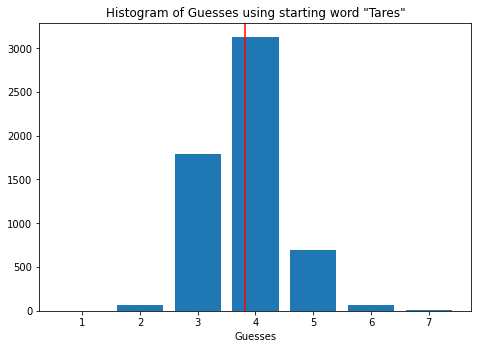

In [97]:
import matplotlib.pyplot as plt
hist = HistTares
mean = 3.812749696022234
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(range(1,len(hist))), hist[1:])
ax.set_title('Histogram of Guesses using starting word "Tares"')
ax.set_xlabel('Guesses')
plt.axvline(mean, color='red')
plt.show()

In [47]:
HistAdieu = [0.000e+00 1.000e+00 4.800e+01 1.274e+03 3.173e+03 1.112e+03 1.360e+02
 1.300e+01]

SyntaxError: invalid syntax (<ipython-input-47-50957b1b3946>, line 1)

In [ ]:
logging.getLogger().setLevel(logging.DEBUG)
game = WordlAI()
game.next_move('adieu', [0,0,0,0,0])
game.next_move('story', [0,0,1,0,2])
game.next_move('lobby', [1,2,0,0,2])
game.next_move('folly', [0,2,0,2,2])

In [101]:
game = WordlAI()
game.next_move('tares', 'byybg')

Guessed: tares  with result  byybg
5757 possible words remaining:


In [ ]:
logging.getLogger().setLevel(logging.ERROR)
game = Wordl()
game.play("coyly")

In [ ]:
a = np.array([True,False,True], dtype=bool)
b = np.array([True,True,False], dtype=bool)
a^(a&b) #equals subtract b from a

In [54]:
game=Wordl()
game.play(initial_guess="tares")

TypeError: play() got an unexpected keyword argument 'initial_guess'

In [ ]:
x = np.ones(5, dtype=bool)
a = np.zeros(5, dtype=bool)
a[2] = 1
a[4] = 1
a[0] = 1
b = np.zeros(5, dtype=bool)
b[2] = 1
b[4] = 1
print(b)
print(~b)


In [ ]:
A = np.copy(D)

In [ ]:
A.shape

In [ ]:
q = np.ones([26,5], dtype=bool)

In [ ]:
r = np.dot(q,A)

In [ ]:
r = q * a

In [ ]:
r.shape
B = A.astype(int)

In [ ]:
np.prod(B, 2, where=q)

In [ ]:
~A[0,0]

In [20]:
a = [1,5,2,4,3]

In [30]:
a.sort(reverse=True)
print(a)

[5, 4, 3, 2, 1]


In [27]:
original_mutual_information = [[6.20918105971901, 'tares'], [6.116215191246362, 'rates'], [6.098226547008154, 'tales'], [6.058014671538986, 'tears'], [6.0157916906794044, 'nares'], [6.014926571109591, 'tires'], [6.001172589138889, 'reals'], [5.993431562728116, 'dares'], [5.990309241087461, 'lores'], [5.988750781168026, 'tries'], [5.980923086210173, 'teals'], [5.980280877289999, 'saner'], [5.973770302123449, 'pares'], [5.970438490226474, 'cares'], [5.965491117705312, 'roles'], [5.96361601701184, 'aloes'], [5.956707035081766, 'lanes'], [5.951211796141858, 'taels'], [5.924579978834816, 'slate'], [5.913780659407477, 'riles'], [5.913414640233254, 'rites'], [5.906132080388072, 'earls'], [5.904492928195209, 'dales'], [5.903615853810945, 'mares'], [5.8973986820541064, 'tiles'], [5.887488564687546, 'nates'], [5.879856197133051, 'races'], [5.870510975301143, 'raise'], [5.867948552424861, 'pales'], [5.867694218304516, 'nears'], [5.8668525199795285, 'rapes'], [5.86395585881234, 'dears'], [5.862696585367539, 'dates'], [5.861304631768879, 'hares'], [5.857027859174848, 'tones'], [5.85533529184513, 'stare'], [5.851784925035841, 'leans'], [5.841386890185092, 'earns'], [5.838570314483083, 'laser'], [5.837493461614798, 'taros'], [5.8362922124611005, 'lades'], [5.832629097481754, 'pates'], [5.830322497709544, 'slier'], [5.825317975485116, 'lites'], [5.824994510449959, 'pears'], [5.8249219754775705, 'cores'], [5.8240044032368505, 'pores'], [5.822448949076515, 'bares'], [5.8200346428849, 'tapes'], [5.816266382421382, 'snare'], [5.814453339703099, 'siren'], [5.812914038235344, 'reads'], [5.809249031922406, 'tiers'], [5.804155543463904, 'antes'], [5.801307614155195, 'deals'], [5.7987793128686, 'sated'], [5.79607039560954, 'tines'], [5.794709318258696, 'stale'], [5.794661908199344, 'males'], [5.791715203322699, 'laces'], [5.789059203634985, 'tames'], [5.788851589590935, 'terns'], [5.784348985608869, 'acres'], [5.783929116735604, 'saute'], [5.7782601748919005, 'rails'], [5.777714640957188, 'dries'], [5.774629863982251, 'trues'], [5.772555524245351, 'canes'], [5.7707770716453926, 'panes'], [5.769648267345879, 'braes'], [5.766836920771701, 'reaps'], [5.761653427003226, 'tarns'], [5.760398280591264, 'aides'], [5.7601366726717025, 'peats'], [5.759635616519064, 'mores'], [5.758109565780066, 'mates'], [5.756070312961147, 'lairs'], [5.7541813363799275, 'peals'], [5.753619260209822, 'hales'], [5.752508787911226, 'tails'], [5.751859019060141, 'doles'], [5.750160143711618, 'pries'], [5.746285693573307, 'cries'], [5.743755889973624, 'lames'], [5.74324260883645, 'liers'], [5.743117110576357, 'least'], [5.742627266916301, 'reins'], [5.741795369170747, 'lines'], [5.740034085166787, 'rials'], [5.73821603052085, 'arise'], [5.735998252437053, 'leads'], [5.732598219928269, 'notes'], [5.732355791887437, 'lures'], [5.730911087553613, 'rages'], [5.73063798412434, 'sired'], [5.726194476571738, 'arose'], [5.723996785544442, 'roans'], [5.721728819486267, 'stoae'], [5.716671705679868, 'bales'], [5.716461000364957, 'reams'], [5.716444328904454, 'deans'], [5.715867490447446, 'liars'], [5.714729105208138, 'poles'], [5.713436242502514, 'hears'], [5.712282771245733, 'fares'], [5.711553440579109, 'hates'], [5.7105529158473, 'mires'], [5.71025813917716, 'dotes'], [5.709010937637416, 'ropes'], [5.708695697322421, 'rents'], [5.708313557395185, 'gales'], [5.706146989592105, 'rules'], [5.703050371942639, 'wares'], [5.701159334958288, 'rains'], [5.700682612070183, 'parse'], [5.700293555411335, 'rants'], [5.6996481403669454, 'rides'], [5.697415425257632, 'nerts'], [5.696496849070938, 'sorta'], [5.695928827334936, 'manes'], [5.693683408787002, 'meats'], [5.693319473000888, 'solar'], [5.691585021980658, 'soled'], [5.690219935170989, 'store'], [5.688352643340718, 'meals'], [5.688157849942107, 'loser'], [5.686563771685406, 'liras'], [5.6861877946236685, 'leaps'], [5.684868901912113, 'trans'], [5.681706707766673, 'darts'], [5.6802177547605845, 'bates'], [5.679994125101779, 'sarge'], [5.678293080774487, 'aisle'], [5.677646322813865, 'lodes'], [5.677202154011665, 'bores'], [5.675665784416727, 'sayer'], [5.675537783525066, 'cotes'], [5.6702731549403005, 'hires'], [5.669598600998551, 'rices'], [5.66933551895811, 'gates'], [5.669179976038237, 'doers'], [5.668584584559587, 'teams'], [5.668003188557766, 'bears'], [5.666060533094115, 'piles'], [5.665710164835265, 'orals'], [5.664855682703847, 'saber'], [5.6645641749131475, 'tides'], [5.663155399834569, 'spare'], [5.6592880604195415, 'topes'], [5.659226056835979, 'sager'], [5.659142615230844, 'gores'], [5.65846756504466, 'plies'], [5.654751200949377, 'riots'], [5.654228539046355, 'elans'], [5.653574346491078, 'gears'], [5.652719358748876, 'snore'], [5.648899603180226, 'later'], [5.648152305242713, 'moles'], [5.647737374156362, 'scare'], [5.647169023447628, 'heats'], [5.647043463046032, 'heals'], [5.644478386015843, 'share'], [5.643229486474957, 'sitar'], [5.639651121268691, 'tiros'], [5.638381923997689, 'napes'], [5.638052825095092, 'sabre'], [5.637110677364788, 'rakes'], [5.634981233299313, 'lased'], [5.632911205856746, 'tared'], [5.632498629205085, 'carts'], [5.632459882658376, 'runes'], [5.632382109846206, 'loans'], [5.629296744328382, 'spate'], [5.628317909367732, 'tomes'], [5.627690240613784, 'rimes'], [5.627539527578919, 'tesla'], [5.626048162774077, 'lopes'], [5.625155468941354, 'sonar'], [5.625126325097196, 'banes'], [5.624524919548835, 'cites'], [5.6237033044949705, 'roads'], [5.622528843204408, 'parts'], [5.621884088621521, 'cones'], [5.6192378345956975, 'ureas'], [5.617872243162977, 'raids'], [5.617867412195695, 'stole'], [5.617216986421607, 'kales'], [5.615850474157463, 'pones'], [5.613036666655933, 'roils'], [5.612949029303237, 'saint'], [5.612471150922267, 'years'], [5.612331669266854, 'lutes'], [5.612277271512444, 'yores'], [5.611505314869665, 'caste'], [5.610138464697473, 'maser'], [5.609610820170123, 'trios'], [5.60919903392372, 'aster'], [5.608230251499258, 'motes'], [5.60764555874962, 'caret'], [5.607227696204923, 'beats'], [5.607128220044678, 'stile'], [5.605283271979545, 'paste'], [5.604195488477226, 'names'], [5.604022396150247, 'roast'], [5.603755668841516, 'holes'], [5.603515470751528, 'bries'], [5.600455857334204, 'miles'], [5.59918578456598, 'sited'], [5.597556300892858, 'wales'], [5.596674293025884, 'means'], [5.596101406454188, 'tunes'], [5.595744022793204, 'paces'], [5.595000720651375, 'scale'], [5.593313620708597, 'dines'], [5.593034835509186, 'dames'], [5.592240433112046, 'liens'], [5.5913979824509585, 'darns'], [5.591103052180305, 'orate'], [5.589900377607915, 'shale'], [5.589604554464484, 'pairs'], [5.5894407565601, 'noels'], [5.58740536287368, 'toils'], [5.583659889108309, 'capes'], [5.582823979004259, 'times'], [5.582213998433057, 'tarps'], [5.581541509587325, 'robes'], [5.581063328673355, 'pleas'], [5.579466622167161, 'takes'], [5.57917908383627, 'lards'], [5.574994170854906, 'stela'], [5.574344786175197, 'piers'], [5.573229149764237, 'acnes'], [5.572953763842922, 'apers'], [5.572428328053064, 'suite'], [5.572005362464191, 'cures'], [5.57197826063518, 'alter'], [5.571532374807017, 'fates'], [5.570552877993188, 'sable'], [5.570376119555252, 'irate'], [5.569521793755966, 'nails'], [5.568907694298001, 'ceils'], [5.5682932109595615, 'safer'], [5.567981110033145, 'carte'], [5.567378300475273, 'risen'], [5.566975586176004, 'steal'], [5.566306133866779, 'shoer'], [5.564718475556476, 'toads'], [5.563023555999865, 'mites'], [5.561707498148785, 'fores'], [5.561142450988878, 'prats'], [5.5592167444482055, 'wears'], [5.559012135605619, 'fears'], [5.558614106476994, 'delis'], [5.558214230710637, 'sawer'], [5.5581636176216795, 'marts'], [5.556553319293805, 'terms'], [5.556174222158147, 'pines'], [5.554039067982338, 'diets'], [5.553602549848012, 'spier'], [5.5533476113736455, 'rheas'], [5.553307568676482, 'selah'], [5.552576829945556, 'poets'], [5.552376941947782, 'heros'], [5.551503394496916, 'tyres'], [5.549777149970623, 'lakes'], [5.54935181952064, 'dials'], [5.5490670049049085, 'coats'], [5.54780912921517, 'heirs'], [5.546800096841828, 'doser'], [5.545724986960666, 'sales'], [5.543747628437438, 'lunes'], [5.54369001529089, 'stair'], [5.542239209053571, 'altos'], [5.540874823107339, 'rated'], [5.540821145784974, 'sedan'], [5.540795320848524, 'limes'], [5.539885270533488, 'septa'], [5.53835133353244, 'shier'], [5.537284546391635, 'sidle'], [5.535700302210912, 'coals'], [5.53567968558139, 'sepal'], [5.535319780214196, 'nodes'], [5.534477192345376, 'stone'], [5.534063519347196, 'loads'], [5.533207603943094, 'aired'], [5.532034742961193, 'baser'], [5.5300233196876665, 'socle'], [5.529894924487725, 'pelts'], [5.528939502098284, 'poser'], [5.528596553375852, 'hades'], [5.526705487030004, 'spear'], [5.526059233910604, 'maces'], [5.525945069372554, 'dater'], [5.5238506595386365, 'tiler'], [5.5213723818523155, 'betas'], [5.520511842613133, 'pails'], [5.520449454156758, 'biles'], [5.520170404276885, 'rinse'], [5.5177985270094005, 'hones'], [5.51749189124674, 'traps'], [5.514650212161577, 'fires'], [5.514422164599434, 'beans'], [5.514373465561913, 'harts'], [5.514082771925413, 'shear'], [5.513388148697193, 'slant'], [5.511955763986631, 'sates'], [5.5115512174349846, 'teaks'], [5.51033607513434, 'toner'], [5.508666572121959, 'sober'], [5.50851451379113, 'marls'], [5.50782228421385, 'lapse'], [5.507173071693967, 'stied'], [5.506901908752264, 'hoers'], [5.5065879649284915, 'wanes'], [5.506353540248764, 'oared'], [5.5041016126318905, 'peons'], [5.503840272144311, 'wires'], [5.50319272708317, 'haste'], [5.500999391274873, 'sauce'], [5.500924458641161, 'coset'], [5.500734586019535, 'poset'], [5.500702451671878, 'sores'], [5.500485883191508, 'roams'], [5.500185259468263, 'salon'], [5.499415106810104, 'slide'], [5.498726663771865, 'feats'], [5.498356320360169, 'anise'], [5.497938005807019, 'spore'], [5.497378101636702, 'talus'], [5.496524061567943, 'lobes'], [5.4963621406176335, 'cater'], [5.496195318370591, 'crate'], [5.494877810399661, 'hoars'], [5.494333845747385, 'paler'], [5.493951112150101, 'arses'], [5.493028790125315, 'fries'], [5.492367828012546, 'pater'], [5.492130785873355, 'trade'], [5.491956486331727, 'weals'], [5.490974652302561, 'lyres'], [5.489947692533561, 'hairs'], [5.489098604803832, 'score'], [5.489031139306373, 'prate'], [5.488814324185217, 'sears'], [5.487463223092187, 'strep'], [5.486661268860419, 'loges'], [5.485538243028861, 'leaks'], [5.485407681600625, 'mines'], [5.4851239932762255, 'rands'], [5.484105117234121, 'shore'], [5.483146791499239, 'bites'], [5.482415869807654, 'taper'], [5.480123008295982, 'raves'], [5.479676134175199, 'spiel'], [5.47955502841079, 'toile'], [5.478743886678471, 'spire'], [5.477938117149608, 'rends'], [5.477826291717218, 'codes'], [5.477484296555883, 'moats'], [5.477428007616791, 'dents'], [5.477113737709666, 'satin'], [5.476085226650338, 'smear'], [5.475512457344875, 'liest'], [5.474018220311283, 'leant'], [5.473791967702425, 'rouse'], [5.472304425948898, 'meads'], [5.471845892927548, 'bones'], [5.47019390945106, 'iotas'], [5.468833258960103, 'slope'], [5.467682880765631, 'nerds'], [5.467123172850261, 'torus'], [5.465312737229779, 'talcs'], [5.464395762883989, 'stead'], [5.463821866992427, 'nards'], [5.462281004889374, 'shire'], [5.461913769574994, 'ports'], [5.461780658387453, 'melts'], [5.4617489733821865, 'alert'], [5.461063178792452, 'slice'], [5.460822507734615, 'dopes'], [5.460671390482313, 'trams'], [5.459360868448389, 'learn'], [5.4592287237012505, 'carne'], [5.458963426483871, 'dirts'], [5.457735129570748, 'tours'], [5.456801231776248, 'noise'], [5.456616744297773, 'goers'], [5.456443611051788, 'sires'], [5.456363361143751, 'colas'], [5.454347988415994, 'baste'], [5.451511359396385, 'boars'], [5.451010347620754, 'routs'], [5.4509608349263585, 'mails'], [5.450107019549586, 'trace'], [5.449458002427462, 'siree'], [5.449313434666678, 'osier'], [5.448540611013248, 'roids'], [5.448492009649117, 'paren'], [5.448411887532994, 'tacos'], [5.44729520954612, 'sware'], [5.446155969105606, 'pages'], [5.4460257251446045, 'liter'], [5.4451176837075055, 'hames'], [5.443536727906067, 'cased'], [5.443350415687874, 'spite'], [5.442919573664713, 'slake'], [5.44078097124124, 'lases'], [5.44062646779977, 'tamer'], [5.440345888317921, 'loins'], [5.4402276062291195, 'tends'], [5.439281383368564, 'sepia'], [5.438426568718028, 'idles'], [5.438082717711504, 'tired'], [5.437374317976157, 'alien'], [5.436989863020519, 'plats'], [5.436667070170484, 'domes'], [5.436656161161512, 'lions'], [5.436287573238867, 'leafs'], [5.4360476096751364, 'tuans'], [5.435913202531958, 'caner'], [5.435369489900213, 'cents'], [5.435244260162887, 'seats'], [5.435095708218979, 'vales'], [5.433498526542215, 'latus'], [5.433490873134659, 'cages'], [5.43107183142086, 'biers'], [5.431043547227424, 'prose'], [5.4307466894758365, 'heads'], [5.430163726532893, 'seals'], [5.429365223186003, 'dealt'], [5.428945563078631, 'tokes'], [5.428803177847162, 'malts'], [5.427485337249077, 'aider'], [5.426772339690896, 'cants'], [5.425386812423367, 'copes'], [5.423222316804623, 'cards'], [5.422704927452172, 'clues'], [5.422389442713003, 'lacer'], [5.4222994530042365, 'ogres'], [5.421990590391483, 'hails'], [5.421985351696597, 'horse'], [5.421529494562368, 'manse'], [5.420810738206859, 'loner'], [5.420284908614612, 'dices'], [5.419336384934022, 'gapes'], [5.419239462907103, 'lords'], [5.419232987467214, 'poste'], [5.4176988976163925, 'tapis'], [5.417426096575013, 'skate'], [5.416599891591979, 'slain'], [5.415479849313681, 'pains'], [5.415403458839637, 'tried'], [5.4138382275109524, 'modes'], [5.413501051217809, 'brats'], [5.413313734246649, 'oiler'], [5.412917551202592, 'prise'], [5.412499901632183, 'onset'], [5.412273433019642, 'stern'], [5.411995279944011, 'pants'], [5.4114785250151245, 'ailed'], [5.4107320800292245, 'penis'], [5.410367769984442, 'pards'], [5.410142694602036, 'snarl'], [5.409637568424498, 'litre'], [5.409140592532275, 'mater'], [5.408529544372009, 'cared'], [5.40840428729563, 'loams'], [5.408021959449891, 'saver'], [5.4078167146121405, 'miser'], [5.407493622584254, 'react'], [5.406698031349024, 'weans'], [5.405861858996006, 'slime'], [5.404391787661991, 'narcs'], [5.402997152972935, 'oaten'], [5.402181675349425, 'deist'], [5.401713665692826, 'poise'], [5.40159005155259, 'saith'], [5.40131468999266, 'lends'], [5.400986480196924, 'files'], [5.400108897208533, 'smote'], [5.399954228908219, 'floes'], [5.399469212967228, 'resin'], [5.399155306652284, 'pared'], [5.397665958478743, 'morts'], [5.397316941248771, 'wiles'], [5.396984545160402, 'dunes'], [5.396947857360836, 'leash'], [5.396542856181659, 'aegis'], [5.396112411399092, 'boats'], [5.395741726592622, 'sower'], [5.3953791675550775, 'comes'], [5.395310269326879, 'slued'], [5.395108151099575, 'slyer'], [5.39443399353565, 'soles'], [5.394386262742108, 'tread'], [5.394152599174098, 'laves'], [5.393780999823101, 'dolts'], [5.393385236631725, 'alder'], [5.393196893355177, 'resay'], [5.391849491280629, 'beast'], [5.391637492251198, 'irons'], [5.391550891017327, 'baits'], [5.391304471977626, 'snort'], [5.390662290292361, 'halts'], [5.389796249015221, 'smite'], [5.389400329220697, 'mules'], [5.388861259699667, 'dimes'], [5.388714865604451, 'trees'], [5.388482967266773, 'super'], [5.388391457989209, 'salty'], [5.388326117458166, 'weirs'], [5.388148086102299, 'games'], [5.388056057907134, 'haler'], [5.387142619095117, 'flies'], [5.387097986124928, 'gaols'], [5.386202351647865, 'lands'], [5.385968438855869, 'hater'], [5.385407538188434, 'belts'], [5.38529667444686, 'beads'], [5.3843560451309385, 'islet'], [5.384002437383571, 'goats'], [5.383949311319556, 'stage'], [5.383922008631438, 'gaits'], [5.383540917501424, 'renal'], [5.383392854487632, 'louse'], [5.383383991291416, 'crane'], [5.383113741558946, 'spade'], [5.3825613316399625, 'raths'], [5.381864039144525, 'trays'], [5.3814732263640135, 'noire'], [5.3806945347049275, 'heaps'], [5.380072982934765, 'sprat'], [5.379566366413976, 'tikes'], [5.379061759401325, 'lapis'], [5.3786753113396255, 'since'], [5.377839410223036, 'noter'], [5.377640487784027, 'molas'], [5.375970164889864, 'ideas'], [5.375808088043355, 'fades'], [5.375772816448073, 'moans'], [5.375750770996877, 'kites'], [5.375193802637433, 'halos'], [5.374721090984602, 'pitas'], [5.373961809872433, 'doest'], [5.373492559414172, 'wades'], [5.3730688942984735, 'doter'], [5.372618840708626, 'bails'], [5.372512181358156, 'goals'], [5.372385012942914, 'barns'], [5.3719268451396855, 'orcas'], [5.371511862418624, 'crits'], [5.371115968715287, 'cause'], [5.3711115522998485, 'roses'], [5.369728488957402, 'pause'], [5.368283515089121, 'shade'], [5.368165150547315, 'teary'], [5.367396090395635, 'smile'], [5.3672518142175845, 'farts'], [5.364367672355748, 'corns'], [5.364074605779583, 'alone'], [5.3630960267919034, 'antis'], [5.362632490381096, 'steno'], [5.362211958348428, 'warts'], [5.361337267115094, 'liner'], [5.3609337030080555, 'heart'], [5.360579097102731, 'inset'], [5.3600730148396805, 'lamer'], [5.35874504207733, 'pearl'], [5.358506414418348, 'snide'], [5.357938792792081, 'lints'], [5.357752337106012, 'coils'], [5.357454572571343, 'snail'], [5.356494689195204, 'plate'], [5.3561333092617485, 'shred'], [5.355744543148256, 'tenor'], [5.355706068068103, 'carps'], [5.35400170997695, 'skier'], [5.352942640271203, 'abets'], [5.352933453567412, 'likes'], [5.352329626633721, 'mopes'], [5.352054844170051, 'yarns'], [5.352003546393017, 'autos'], [5.351915829313794, 'tunas'], [5.351440650774463, 'louts'], [5.351269689409568, 'sutra'], [5.350386352513012, 'mains'], [5.350201020113873, 'yeast'], [5.350162978957279, 'duals'], [5.349514341802322, 'satyr'], [5.349416995093125, 'gorse'], [5.349291971570716, 'acmes'], [5.348980029868893, 'mutes'], [5.3487315069899495, 'cafes'], [5.348455544342079, 'stein'], [5.346578032758003, 'amens'], [5.346281185254253, 'vanes'], [5.344540803496536, 'nosed'], [5.343754707949263, 'poler'], [5.343070764695044, 'treys'], [5.342506400006378, 'duels'], [5.342312526183906, 'waste'], [5.342233525562118, 'sloes'], [5.341879810930862, 'baler'], [5.341854837531304, 'colts'], [5.341232300227369, 'slept'], [5.340535462062559, 'riled'], [5.339744434426032, 'cakes'], [5.338836137349737, 'oases'], [5.338701282787053, 'space'], [5.3386255453576075, 'duets'], [5.338129878524582, 'miens'], [5.337676861747278, 'aunts'], [5.3373412786128345, 'vires'], [5.3364942430805, 'clans'], [5.336376651923685, 'coeds'], [5.335867728253066, 'fairs'], [5.335664175360412, 'neato'], [5.335037547620981, 'route'], [5.33479634461254, 'lotsa'], [5.333723125263897, 'torsi'], [5.3328292012324985, 'faces'], [5.332814707735488, 'hides'], [5.3327251584355, 'bodes'], [5.3318377302291715, 'smart'], [5.3313017413999, 'niter'], [5.33117006625469, 'degas'], [5.330577102412168, 'anile'], [5.330556336926523, 'beaus'], [5.329520500233446, 'doges'], [5.329260821194108, 'shape'], [5.329150075954475, 'scone'], [5.328789850263894, 'shone'], [5.328179826946279, 'rubes'], [5.328068458091521, 'aimer'], [5.327656449117858, 'close'], [5.327352562527797, 'shoed'], [5.327145006683167, 'diest'], [5.3267479076518995, 'larks'], [5.3258981862935535, 'stake'], [5.325773776355081, 'solid'], [5.325038015521345, 'pyres'], [5.324753902441347, 'false'], [5.324409771547523, 'roves'], [5.324366679367692, 'plans'], [5.324282014514709, 'rises'], [5.321983582201358, 'anole'], [5.321523318398112, 'stain'], [5.32138061158534, 'trips'], [5.321114007147796, 'hopes'], [5.320836660132224, 'herds'], [5.3200955277740425, 'toper'], [5.319800491555523, 'spied'], [5.3197058248128535, 'veals'], [5.319026893302517, 'sawed'], [5.318837844239234, 'snipe'], [5.318274304887568, 'layer'], [5.317986485691893, 'sites'], [5.317880597200008, 'grate'], [5.31733452780986, 'laden'], [5.317010859369075, 'razes'], [5.315967505676689, 'perms'], [5.315648990560725, 'spine'], [5.3155131190009905, 'coast'], [5.315483969212467, 'cauls'], [5.315048949141224, 'ousel'], [5.312796245738083, 'turns'], [5.311832488613375, 'swear'], [5.311481664518318, 'raced'], [5.311015939207364, 'fleas'], [5.31046186488311, 'prest'], [5.310334888438191, 'legos'], [5.310252309670713, 'atone'], [5.310241752974873, 'panel'], [5.31013027000765, 'arson'], [5.309650635400599, 'rears'], [5.3091221408424465, 'lauds'], [5.308753828511751, 'tiled'], [5.308036352938212, 'frats'], [5.307189510996346, 'crest'], [5.307003054508238, 'ogles'], [5.306570899722736, 'shied'], [5.3060334963434235, 'shalt'], [5.304819078493941, 'paten'], [5.304561707746746, 'leapt'], [5.304283406283409, 'salve'], [5.3042753998144665, 'cadre'], [5.303859430297052, 'spelt'], [5.303647525069914, 'icers'], [5.302874353342437, 'ileus'], [5.3024202620398375, 'bolas'], [5.30166289563704, 'snake'], [5.301409499672591, 'staid'], [5.300780889181557, 'kerns'], [5.300309897308315, 'shine'], [5.298195634083869, 'agues'], [5.297758163271817, 'large'], [5.297440994680998, 'treks'], [5.2973974998740125, 'brans'], [5.296377565225212, 'edits'], [5.294819730162423, 'polis'], [5.2944672578740954, 'fines'], [5.294253179857326, 'gules'], [5.293233169243281, 'morel'], [5.292589317177509, 'adore'], [5.292522015738988, 'loses'], [5.292485431248748, 'homes'], [5.292113082560592, 'based'], [5.290790492907182, 'ferns'], [5.290655662247419, 'bents'], [5.290309848451211, 'bides'], [5.289793949109836, 'padre'], [5.289683708022606, 'fames'], [5.2890836721117696, 'delta'], [5.2890408347853635, 'drams'], [5.2889250255869875, 'wines'], [5.2884691924585745, 'posed'], [5.288312225945349, 'craps'], [5.288177940720454, 'blats'], [5.288156888831642, 'morns'], [5.2869936893157226, 'toned'], [5.28696019351138, 'shoat'], [5.286947840145648, 'frets'], [5.286084684983002, 'canoe'], [5.285737320717031, 'rafts'], [5.285251581391711, 'steam'], [5.285030285746516, 'raped'], [5.284198319151969, 'mrads'], [5.283359057188078, 'nurse'], [5.283198998007111, 'emirs'], [5.283171702940881, 'tease'], [5.283076939097825, 'clots'], [5.282896838371608, 'feast'], [5.282760241304831, 'swore'], [5.282693947014018, 'paled'], [5.281136513307362, 'taxes'], [5.28080128240545, 'peaks'], [5.280346191329013, 'aside'], [5.279918220514696, 'lotus'], [5.279757859511547, 'beams'], [5.279724447976372, 'nudes'], [5.279567501953337, 'laths'], [5.279122572132125, 'plots'], [5.277717609692155, 'blues'], [5.277066370607939, 'opals'], [5.276866279959835, 'makes'], [5.275216350868364, 'toves'], [5.274694311262872, 'tubes'], [5.274617494036478, 'serif'], [5.273439588407369, 'waits'], [5.273383399786535, 'trail'], [5.273362430264219, 'louis'], [5.273095529525076, 'sprue'], [5.270861301074824, 'welts'], [5.27042309175177, 'lager'], [5.269898059784496, 'togas'], [5.2697948415087925, 'gents'], [5.269647076059454, 'shame'], [5.269065870283774, 'arced'], [5.269025638775597, 'felts'], [5.268921424968002, 'cored'], [5.2687701149294455, 'rives'], [5.268414707639158, 'demos'], [5.267889617060111, 'seamy'], [5.267537989257186, 'talks'], [5.2673745525982065, 'ruins'], [5.267068319147299, 'pesto'], [5.266793081385967, 'molts'], [5.266574438782248, 'bards'], [5.265566293938103, 'realm'], [5.265553084347669, 'cadet'], [5.264652739572571, 'recta'], [5.263608459061435, 'trims'], [5.2633234489638525, 'heist'], [5.263117853904528, 'pacer'], [5.262992819858307, 'foals'], [5.26161409921279, 'soars'], [5.261605694562772, 'warns'], [5.261096454845343, 'yules'], [5.2603707908035835, 'diner'], [5.2600769452910265, 'lance'], [5.2597568353777024, 'glues'], [5.259332363040443, 'cords'], [5.259315199721455, 'codas'], [5.258861909332465, 'moire'], [5.258373135737013, 'urges'], [5.25830352691949, 'those'], [5.258299763486485, 'drone'], [5.258059812766583, 'fails'], [5.258008269464781, 'maids'], [5.257946207066372, 'gains'], [5.257864723126996, 'coins'], [5.25766497360713, 'adios'], [5.257070494551461, 'horns'], [5.2566058075783, 'drape'], [5.256482959500365, 'wails'], [5.255987850494997, 'strew'], [5.2556993994080266, 'pored'], [5.255413364689754, 'clear'], [5.255011446898446, 'worse'], [5.254935842037272, 'trice'], [5.25320226269332, 'sleet'], [5.2528644759795355, 'caper'], [5.252767626298843, 'tuner'], [5.252357009076551, 'bared'], [5.252255009368709, 'aches'], [5.251957713486226, 'naves'], [5.251126329437567, 'loper'], [5.250064820256328, 'stray'], [5.250023030859571, 'strap'], [5.249529112122533, 'curse'], [5.249035755547428, 'smelt'], [5.248693852050915, 'relay'], [5.24851122684711, 'votes'], [5.248502713103945, 'namer'], [5.248493868735829, 'stand'], [5.248405044043207, 'lease'], [5.248293799014619, 'runts'], [5.246300382516437, 'splat'], [5.246163150989238, 'earth'], [5.246119293292027, 'cases'], [5.2459357735285295, 'laird'], [5.245450080079951, 'tripe'], [5.244945996623437, 'purse'], [5.244768040921828, 'sweat'], [5.244527411859071, 'harps'], [5.244421460978028, 'melds'], [5.244204381890904, 'treap'], [5.243608891149601, 'thens'], [5.243516614859863, 'lubes'], [5.243491009731874, 'areas'], [5.243346689821173, 'diems'], [5.243002599916946, 'teats'], [5.242660190278031, 'trial'], [5.242470605181301, 'sines'], [5.242449692942104, 'giros'], [5.24226171662672, 'saris'], [5.241858599803355, 'pions'], [5.2415672315921755, 'loves'], [5.241330914632486, 'blare'], [5.241191947429194, 'taker'], [5.23897848768931, 'fiats'], [5.238857114558256, 'douse'], [5.2388186526191705, 'timer'], [5.2383064698086415, 'girts'], [5.238015448705088, 'yards'], [5.237922657320013, 'holer'], [5.237828962602092, 'table'], [5.237520421149085, 'clads'], [5.237304888872779, 'serum'], [5.237089287371351, 'plane'], [5.236751485464663, 'sport'], [5.236537099957619, 'pacts'], [5.236485955838709, 'faire'], [5.235967501637873, 'trews'], [5.2351747466149705, 'rinds'], [5.234879764406838, 'mauls'], [5.2347994815851955, 'oaths'], [5.233924637677532, 'sorer'], [5.232464200681443, 'train'], [5.232248470531555, 'lazes'], [5.232122911941252, 'dints'], [5.23205777911683, 'crams'], [5.230354451052593, 'toyer'], [5.229033646361684, 'reels'], [5.228615917278111, 'ranks'], [5.228297609523669, 'glare'], [5.2279293128112645, 'anted'], [5.227390457549991, 'taped'], [5.227158787604056, 'minas'], [5.22623327189695, 'surge'], [5.226018471678779, 'water'], [5.2255190645928655, 'slave'], [5.225181440958235, 'triad'], [5.224485047077367, 'darks'], [5.224402178845386, 'sties'], [5.224320045281642, 'tangs'], [5.223382427718634, 'short'], [5.222216854999504, 'duces'], [5.22174955494906, 'astir'], [5.221576316934024, 'pours'], [5.22135271587079, 'singe'], [5.221189392435379, 'trash'], [5.219854756955415, 'outer'], [5.21948630022759, 'scant'], [5.218844226409579, 'leers'], [5.218423646886032, 'emits'], [5.218369055112586, 'poems'], [5.217604780923129, 'roust'], [5.217313104156684, 'armed'], [5.217052510082513, 'laced'], [5.217006045532746, 'ratio'], [5.216368344310377, 'miler'], [5.215675738734833, 'meant'], [5.215661250515879, 'resaw'], [5.213647268506128, 'sinew'], [5.213157734802825, 'loafs'], [5.213072817237649, 'easts'], [5.213015393795468, 'miter'], [5.21267860055934, 'oiled'], [5.211491162938443, 'drays'], [5.21108248641469, 'capos'], [5.211040020295832, 'prams'], [5.211000496869017, 'caned'], [5.210819606323017, 'spent'], [5.210189422577958, 'early'], [5.210132798542475, 'boils'], [5.208775151752713, 'drags'], [5.208759194776583, 'terse'], [5.208283636590546, 'dupes'], [5.208097244126808, 'wiser'], [5.2078803917217185, 'pends'], [5.206685241917793, 'ulnas'], [5.206057857011584, 'lefts'], [5.20463346259957, 'lathe'], [5.2044544649551945, 'tyros'], [5.203905354339232, 'hauls'], [5.2034898274461, 'forts'], [5.203270478008114, 'rayed'], [5.202627189654835, 'petal'], [5.20212034104185, 'dorms'], [5.202086968101933, 'grits'], [5.201971945754501, 'brads'], [5.2017819983334475, 'bakes'], [5.201740297821655, 'cruse'], [5.201013726967389, 'tamed'], [5.20047955646739, 'crone'], [5.200472766366225, 'tilde'], [5.200354996615615, 'drabs'], [5.200129649915958, 'shoal'], [5.199608662772473, 'worts'], [5.1995092917270345, 'muser'], [5.199340028869763, 'sails'], [5.199196485102525, 'atoms'], [5.198986550677622, 'girls'], [5.198579857968055, 'lento'], [5.197914482486442, 'turds'], [5.197199169182927, 'rosin'], [5.196428142621063, 'pokes'], [5.196353059675453, 'canst'], [5.19632472507028, 'throe'], [5.196268312178658, 'trued'], [5.195379691565048, 'harms'], [5.195269161499609, 'sprit'], [5.195133467832636, 'caves'], [5.194669602046117, 'paned'], [5.194530653306273, 'paves'], [5.194194385715229, 'hosed'], [5.1941111560372475, 'rasae'], [5.194069946546814, 'scent'], [5.193986623906679, 'phase'], [5.193646857381678, 'prods'], [5.193420139890739, 'aspen'], [5.193419051179025, 'shard'], [5.193391256756914, 'rests'], [5.192919337342141, 'cedar'], [5.192766499605571, 'range'], [5.192438509914007, 'bolts'], [5.19230503291236, 'avers'], [5.19224843538199, 'cokes'], [5.191859393173185, 'shute'], [5.191835244177394, 'opens'], [5.191588885947506, 'drops'], [5.191414597926861, 'inter'], [5.190943697722365, 'thane'], [5.190317327865064, 'cried'], [5.1900858893372, 'laude'], [5.189781074999626, 'dikes'], [5.189383405253573, 'astro'], [5.189313902164807, 'seine'], [5.189252150496453, 'reset'], [5.18837373514331, 'corps'], [5.188155863751772, 'cleat'], [5.188020960111924, 'deary'], [5.1878344769715685, 'macer'], [5.187435551435539, 'lives'], [5.1867739067276535, 'prone'], [5.1854523866096995, 'salts'], [5.185385926662676, 'yipes'], [5.1850065649679165, 'ramps'], [5.184302006893094, 'grads'], [5.183460513114996, 'nosey'], [5.183297003036351, 'calms'], [5.18266070987551, 'erase'], [5.18259949157659, 'haled'], [5.182209750479854, 'pleat'], [5.181459166269586, 'unset'], [5.181164417326085, 'heard'], [5.181154673309708, 'perks'], [5.180913574211877, 'merit'], [5.180333171110131, 'dulse'], [5.180297188527535, 'dregs'], [5.180097790633008, 'nerfs'], [5.179518054486274, 'arums'], [5.179408110180295, 'shirt'], [5.179216125878938, 'tanks'], [5.178916494707865, 'wages'], [5.1783565330070935, 'berms'], [5.177595580664512, 'honer'], [5.177196264059287, 'norms'], [5.177061605080402, 'byres'], [5.177020892885848, 'pried'], [5.176834231594284, 'older'], [5.1765361439283595, 'laker'], [5.1762467071468485, 'costa'], [5.175755660709423, 'goads'], [5.175646125870358, 'mitre'], [5.175497074810879, 'chase'], [5.175171635961958, 'inlet'], [5.175034535945583, 'taupe'], [5.17338133582836, 'flats'], [5.173367422369062, 'axles'], [5.173359849018173, 'chars'], [5.172719679345367, 'shlep'], [5.172510869164012, 'totes'], [5.172352303666485, 'sadly'], [5.172216865988859, 'tribs'], [5.171994699687468, 'cruet'], [5.169721468150374, 'hilts'], [5.169073407088173, 'claps'], [5.169025587567674, 'garde'], [5.168779481729048, 'wrens'], [5.16809518592175, 'lined'], [5.168066022801096, 'mated'], [5.166976184147503, 'germs'], [5.166809448881726, 'saved'], [5.166785972175931, 'damns'], [5.166450701229608, 'besot'], [5.16507732339333, 'raged'], [5.164888256225446, 'pints'], [5.163315826489489, 'swart'], [5.162838573357457, 'boast'], [5.162279708151785, 'sherd'], [5.162219778830208, 'sowed'], [5.161940563899301, 'rebus'], [5.161836313435969, 'steak'], [5.1618333138294945, 'glans'], [5.16160188524191, 'goest'], [5.161549196391998, 'lamed'], [5.161030630737959, 'palms'], [5.1603612461909885, 'silty'], [5.160262532638532, 'yearn'], [5.160055332968647, 'lepta'], [5.1594777662682425, 'pieta'], [5.159102986019032, 'style'], [5.159092780168989, 'talon'], [5.159038932356242, 'peril'], [5.158803555289228, 'pouts'], [5.158415018622702, 'lured'], [5.158380921451448, 'wants'], [5.157962871491157, 'abler'], [5.1573289428186815, 'noted'], [5.156647632411391, 'debts'], [5.156533614050878, 'steer'], [5.155991283442374, 'coder'], [5.155789082389307, 'limos'], [5.155650859264059, 'easel'], [5.155399534274361, 'wards'], [5.155151567593419, 'flues'], [5.155014047493533, 'payer'], [5.154882561154814, 'stoke'], [5.154697594650178, 'great'], [5.154118790223108, 'parks'], [5.15383993488599, 'types'], [5.153408332751955, 'scope'], [5.153049904717108, 'dyers'], [5.152891675848054, 'pikes'], [5.152592204763769, 'motel'], [5.152552994239813, 'helps'], [5.152347256068757, 'spice'], [5.1522835680919385, 'noses'], [5.152168739177328, 'drips'], [5.150600162966092, 'vapes'], [5.1504767028347755, 'dynes'], [5.149535836925786, 'gelds'], [5.149490550464646, 'glens'], [5.149135884567659, 'setup'], [5.148450703533686, 'zeals'], [5.147463962797326, 'comas'], [5.1467928771360585, 'balds'], [5.146621600034824, 'temps'], [5.145635908961151, 'polar'], [5.145068740263744, 'tapir'], [5.1449816882228525, 'prays'], [5.144246229961702, 'dance'], [5.143454366716378, 'tress'], [5.143449019454737, 'gnats'], [5.143033434481896, 'curls'], [5.142434829350031, 'suety'], [5.142331148993078, 'tiger'], [5.14210907874006, 'biter'], [5.142073744144695, 'ready'], [5.14181473796973, 'hated'], [5.141765060030814, 'spake'], [5.14140996215994, 'barms'], [5.141326623563301, 'veils'], [5.140506744793113, 'mired'], [5.140302798056112, 'mends'], [5.139911373590651, 'sorts'], [5.139634303783112, 'janes'], [5.13951605236997, 'scald'], [5.138881958984304, 'crabs'], [5.138670343456958, 'doses'], [5.138440150323903, 'anode'], [5.138373021541096, 'sneak'], [5.137661546450175, 'fared'], [5.137587340085704, 'harem'], [5.137492625190855, 'poled'], [5.137482011046271, 'artsy'], [5.137460993209524, 'crags'], [5.137364670884289, 'turps'], [5.1371405255384435, 'viers'], [5.136520826782111, 'loess'], [5.13648008693514, 'miner'], [5.136371717254783, 'corms'], [5.136233543704476, 'tansy'], [5.136194325737728, 'baled'], [5.135950082597473, 'penal'], [5.135702842141027, 'ripen'], [5.135493363842515, 'purls'], [5.1346935277817725, 'blots'], [5.134496079777965, 'carol'], [5.13440643030045, 'beaks'], [5.1343751816323175, 'sloth'], [5.134218426645687, 'colds'], [5.134066486176694, 'tonal'], [5.133742472534387, 'menus'], [5.133581363363495, 'omens'], [5.133390639359508, 'roped'], [5.133355695648556, 'asker'], [5.132096134746623, 'beard'], [5.131795778381843, 'pulse'], [5.131248234566351, 'trend'], [5.131109916146038, 'ruled'], [5.130754009600834, 'herbs'], [5.130549989595068, 'tamps'], [5.130467442376086, 'unate'], [5.129619388993544, 'okras'], [5.129337114947863, 'hotel'], [5.128889055910221, 'doper'], [5.128738900648594, 'sages'], [5.128161940235211, 'metal'], [5.12770656391557, 'crops'], [5.127088649605912, 'items'], [5.126317325728798, 'recto'], [5.126097303442266, 'shake'], [5.12579264494804, 'boner'], [5.125625163072396, 'reman'], [5.125339317043703, 'solve'], [5.125212505159111, 'sides'], [5.124074944505204, 'sneer'], [5.124057426281637, 'picas'], [5.123786452395154, 'spilt'], [5.123773300312274, 'teens'], [5.123354366915769, 'flare'], [5.122782244189597, 'vines'], [5.122734895407375, 'maned'], [5.12224852163686, 'forte'], [5.121775118565794, 'borne'], [5.121316475130632, 'hours'], [5.121004089545188, 'skied'], [5.118368099640214, 'mouse'], [5.117166808973906, 'idols'], [5.117031490879998, 'soapy'], [5.1168429493157, 'copse'], [5.116548848189675, 'gilts'], [5.11608857472064, 'heres'], [5.115237161926382, 'slats'], [5.115088323668976, 'bored'], [5.115056146461179, 'texas'], [5.114600924374861, 'preys'], [5.114464533184822, 'chats'], [5.113914638236555, 'stave'], [5.113874545274518, 'neath'], [5.113577654393615, 'goner'], [5.113121905053174, 'servo'], [5.113086034359788, 'ruses'], [5.112700522978767, 'story'], [5.1126554090656375, 'eland'], [5.1126393340430365, 'wipes'], [5.112003404707767, 'seams'], [5.111637689970883, 'clams'], [5.111399772015641, 'ayins'], [5.110373422087406, 'strop'], [5.110127181755047, 'helms'], [5.109968277335296, 'haute'], [5.10838337738449, 'tarts'], [5.107878187118592, 'torah'], [5.107771580634948, 'hired'], [5.107370007221183, 'taste'], [5.106927060738945, 'cider'], [5.106398151523994, 'hands'], [5.106370398399253, 'shyer'], [5.10609974512318, 'pager'], [5.105717667883013, 'snout'], [5.105604340858632, 'spree'], [5.105530442487215, 'death'], [5.1049634445257235, 'slues'], [5.104735074244894, 'riced'], [5.104146286526165, 'writs'], [5.104028744620792, 'camel'], [5.103218971382694, 'cager'], [5.103106591995421, 'savor'], [5.102437439653012, 'swine'], [5.1019383733010315, 'aimed'], [5.101832923036054, 'mints'], [5.101694712128335, 'coral'], [5.100826484353861, 'nicer'], [5.100796277506792, 'dinar'], [5.10030475529695, 'vails'], [5.1001935761496435, 'gored'], [5.099686421759188, 'roars'], [5.099671469931092, 'feist'], [5.099582847987721, 'chaos'], [5.099016200579215, 'hulas'], [5.098084402040909, 'tribe'], [5.097303384613351, 'greps'], [5.097086061992256, 'blear'], [5.096777261695414, 'state'], [5.096011801009927, 'bated'], [5.095353900626224, 'foils'], [5.095347579677005, 'bases'], [5.095130746793281, 'dicer'], [5.094915484154391, 'supra'], [5.094618090289772, 'coper'], [5.09343894735965, 'poses'], [5.0932390912108385, 'sonly'], [5.091159149072898, 'remit'], [5.090762835365849, 'draws'], [5.0906660983299155, 'loxes'], [5.090586990329761, 'roble'], [5.090513186401422, 'monte'], [5.090303828310493, 'spued'], [5.090018573449962, 'trows'], [5.089916395276256, 'gibes'], [5.08970833487429, 'techs'], [5.089491480194006, 'house'], [5.089281753344899, 'grade'], [5.089197154236304, 'stark'], [5.088889680687668, 'haves'], [5.088640395703077, 'versa'], [5.08779025109789, 'gases'], [5.087685131801866, 'cuter'], [5.087592419359094, 'gated'], [5.086503059504835, 'egads'], [5.086374128426736, 'bergs'], [5.086146953951457, 'marks'], [5.08569589636912, 'fakes'], [5.085012206367936, 'shnor'], [5.084707685935358, 'mikes'], [5.084546144215938, 'toker'], [5.084324993102754, 'lacey'], [5.084222518967422, 'tabus'], [5.084062485347609, 'lawns'], [5.084020446948595, 'place'], [5.083975534068845, 'lamps'], [5.083527700936464, 'paths'], [5.083344574690301, 'posit'], [5.082415206629858, 'sepoy'], [5.082221640106626, 'warps'], [5.08185027615043, 'seder'], [5.08163843885329, 'ashen'], [5.081455295745137, 'cairn'], [5.081013237665769, 'doves'], [5.080316241061027, 'latin'], [5.080033702414342, 'wakes'], [5.079301290671414, 'piled'], [5.079180731562824, 'tower'], [5.0790499023306825, 'sandy'], [5.07864444114667, 'urine'], [5.078581762054934, 'gaper'], [5.078143875844922, 'clods'], [5.077630658115156, 'meson'], [5.076595340850895, 'hints'], [5.0765495794091, 'caron'], [5.076539517769886, 'hurts'], [5.076199645679558, 'lasts'], [5.075716320628135, 'spina'], [5.075641200542402, 'acids'], [5.075468116596283, 'inert'], [5.0750091120078915, 'regal'], [5.074175162362594, 'toped'], [5.074169164081198, 'split'], [5.073610350067357, 'aerie'], [5.073536498021442, 'newts'], [5.073404435702987, 'scorn'], [5.07336249035022, 'sound'], [5.073092839692644, 'drain'], [5.072944217409113, 'molar'], [5.072559056656498, 'pious'], [5.071594652641044, 'plods'], [5.0715834845305094, 'amuse'], [5.071575700081341, 'glads'], [5.071256467323266, 'peaty'], [5.071143785553112, 'stoma'], [5.070614762840441, 'dazes'], [5.070531246762672, 'apses'], [5.070492437184367, 'metro'], [5.070388241004951, 'petri'], [5.069823091155435, 'anger'], [5.069335060165904, 'plied'], [5.068995454288125, 'idler'], [5.068697285543782, 'moist'], [5.068370352321068, 'shorn'], [5.067229257658906, 'strip'], [5.06632660222058, 'feral'], [5.066254984271205, 'clone'], [5.066170407665053, 'cruel'], [5.065964091879381, 'dorks'], [5.065828250108742, 'coned'], [5.065824838825812, 'bends'], [5.065776127987472, 'zetas'], [5.065623166016777, 'mosey'], [5.064637995600123, 'spoil'], [5.063471117727618, 'yelps'], [5.063047093181126, 'steel'], [5.062922821835289, 'eater'], [5.062904706231319, 'deism'], [5.06272961520715, 'omits'], [5.062614379092475, 'raked'], [5.0621972193255, 'drake'], [5.0620612156906954, 'cults'], [5.06183973094591, 'sugar'], [5.061806186396314, 'curie'], [5.061540409679671, 'asset'], [5.061125464471388, 'micas'], [5.060705871950667, 'acted'], [5.060649659103048, 'grins'], [5.060639338714433, 'upset'], [5.060486303354617, 'daisy'], [5.059904635142781, 'storm'], [5.0595252719955575, 'horde'], [5.059046020083056, 'scrod'], [5.058763967178901, 'harks'], [5.058691879164746, 'delay'], [5.058680789705943, 'brace'], [5.058480447424305, 'molds'], [5.0581994979126375, 'stars'], [5.05818051560423, 'arity'], [5.05813740307607, 'taken'], [5.05765392970844, 'laity'], [5.057642132785042, 'units'], [5.057412006508348, 'pride'], [5.057300068170543, 'cameo'], [5.057141218591411, 'comer'], [5.057036738307937, 'grams'], [5.05653221153919, 'thins'], [5.0563886294588025, 'spray'], [5.055971433945031, 'snark'], [5.0558861130016695, 'marge'], [5.055535293465602, 'bands'], [5.0551757054433955, 'after'], [5.054612749444071, 'rimed'], [5.0545888018184995, 'welds'], [5.05448765982303, 'rifts'], [5.054204730587325, 'vials'], [5.054033951475981, 'proms'], [5.0539122347379895, 'tongs'], [5.053163016013806, 'blast'], [5.052918190665382, 'peers'], [5.052735072703607, 'their'], [5.052218257617469, 'scarp'], [5.051621645343091, 'arias'], [5.050251574547269, 'dolce'], [5.050062404946053, 'hikes'], [5.0500017709613925, 'alums'], [5.049697658994892, 'wrest'], [5.0496054309990255, 'sharp'], [5.049545094051016, 'buret'], [5.049394113848607, 'maple'], [5.049150377611611, 'radio'], [5.048522397326267, 'dimer'], [5.0482145658846855, 'cited'], [5.047776343352683, 'wrote'], [5.047209302189832, 'hayer'], [5.0469973103727215, 'radon'], [5.0469001324630165, 'racks'], [5.046579565970092, 'scary'], [5.046520440435896, 'clean'], [5.046292459347367, 'screw'], [5.046010565282089, 'shrew'], [5.045728985717241, 'scrap'], [5.044455449234562, 'birds'], [5.044300805894872, 'blest'], [5.044245697914828, 'debar'], [5.0441360170813905, 'pease'], [5.0439620531727964, 'loped'], [5.0439082783453575, 'zeros'], [5.043743169830346, 'hoist'], [5.04360414027581, 'matey'], [5.043315465555266, 'nadir'], [5.043217479865474, 'slang'], [5.042870002693362, 'genus'], [5.042351070014228, 'gamer'], [5.042157176113571, 'levis'], [5.042155959964911, 'yours'], [5.041931999650879, 'isles'], [5.041896518932238, 'trike'], [5.04173545079078, 'cease'], [5.041567254564279, 'valet'], [5.041373802988678, 'cubes'], [5.041074266946944, 'coves'], [5.040937472838514, 'calks'], [5.040629686796316, 'auger'], [5.0404373960884366, 'fader'], [5.039372483936911, 'sizer'], [5.039016305516293, 'tsars'], [5.038732489892833, 'reeds'], [5.038110237454576, 'sonic'], [5.0378542614335755, 'wader'], [5.037673520275649, 'outen'], [5.0375715102453205, 'veins'], [5.036996165004576, 'reach'], [5.0369671704887065, 'waist'], [5.036758974417411, 'limns'], [5.036421285486568, 'holed'], [5.0362564806974905, 'locus'], [5.036003462757282, 'ikats'], [5.03561280943185, 'spies'], [5.035199259989389, 'stele'], [5.034584487869497, 'hurls'], [5.034329447746147, 'bleat'], [5.034104775205136, 'mason'], [5.033693505320192, 'grace'], [5.033051325995317, 'clays'], [5.032807160524544, 'pubes'], [5.032444117158146, 'proem'], [5.032170342359506, 'soils'], [5.032120332004133, 'nasty'], [5.03208134588521, 'kilos'], [5.032024813630565, 'pedal'], [5.031954481055288, 'plead'], [5.031393363575191, 'jeans'], [5.031350330779083, 'garbs'], [5.031192801062232, 'safes'], [5.0309469022076145, 'plays'], [5.030893895266583, 'shoes'], [5.030876349694141, 'mesas'], [5.02979166752194, 'truce'], [5.029361907153234, 'oldie'], [5.029192819042346, 'grape'], [5.029090892770472, 'sakes'], [5.028940106666362, 'suave'], [5.028787575696443, 'warms'], [5.028745206418266, 'spend'], [5.028693578356864, 'tabor'], [5.0285758472595825, 'farms'], [5.028441433142753, 'farce'], [5.028378118486019, 'relic'], [5.027089672987353, 'luted'], [5.026479754327421, 'ponds'], [5.026419276148493, 'rainy'], [5.02606591811169, 'girds'], [5.025941700241303, 'named'], [5.025929144240779, 'dives'], [5.0259017470846965, 'stalk'], [5.025817212027124, 'decal'], [5.025353306950869, 'tubas'], [5.025149681659645, 'ethos'], [5.024706810663815, 'bytes'], [5.024471628988163, 'loath'], [5.024340144472062, 'olden'], [5.024237536130724, 'paint'], [5.024132398620667, 'kilts'], [5.023847487327446, 'write'], [5.023814921179925, 'fuels'], [5.023646286998324, 'balms'], [5.023342640390475, 'holds'], [5.023182740903154, 'acned'], [5.022832500470049, 'sirup'], [5.022770958533692, 'craws'], [5.022491827269996, 'waled'], [5.021883718080607, 'suers'], [5.02166266126266, 'aport'], [5.0214384348282906, 'afire'], [5.021328555396502, 'tuned'], [5.021269446031873, 'cento'], [5.021264899882427, 'manor'], [5.021073755654825, 'heron'], [5.0206944000652545, 'robed'], [5.019771259770697, 'alike'], [5.019300189082856, 'filer'], [5.019227640738818, 'zones'], [5.018969189693055, 'rings'], [5.018870436310241, 'paced'], [5.018200542066273, 'moral'], [5.018129574113221, 'maths'], [5.018105958033058, 'wraps'], [5.017732315528771, 'basil'], [5.017642178218454, 'eased'], [5.017222478502814, 'bread'], [5.016469842993685, 'penes'], [5.016358487115108, 'recap'], [5.016135750612602, 'beano'], [5.0161137665197, 'laver'], [5.015737500724076, 'straw'], [5.014376804643936, 'scour'], [5.0143025246060615, 'amine'], [5.014288428223709, 'agile'], [5.013994075219466, 'vents'], [5.013841064336805, 'romps'], [5.013782514323757, 'lofts'], [5.013775446407487, 'dream'], [5.013420629329064, 'passe'], [5.013253208115557, 'cable'], [5.013230981279491, 'shies'], [5.013001570061325, 'price'], [5.012820484717965, 'prims'], [5.012521714793898, 'bouts'], [5.012464194870282, 'comet'], [5.012138675821783, 'enrol'], [5.012128980356095, 'afore'], [5.01198410040738, 'south'], [5.011837044143127, 'skoal'], [5.010481458657885, 'kelps'], [5.010172744017393, 'filet'], [5.009870641274441, 'gator'], [5.0097678735976165, 'plena'], [5.009579888008027, 'barks'], [5.009517437064226, 'wilts'], [5.008552649374114, 'cured'], [5.007752919479782, 'brine'], [5.007284428623594, 'bikes'], [5.0070521955264535, 'lower'], [5.006809734621248, 'caped'], [5.00642376534082, 'durst'], [5.006215818742061, 'fetus'], [5.005865369890497, 'dribs'], [5.005724020573163, 'clops'], [5.005209881282248, 'flier'], [5.004853625689963, 'chose'], [5.004809326117838, 'pawer'], [5.004688211709944, 'decor'], [5.004429038211637, 'opera'], [5.0044199395244995, 'hider'], [5.003947104751317, 'moper'], [5.0039055367938285, 'tense'], [5.003479490729043, 'ravel'], [5.003172282957459, 'tells'], [5.002806213120036, 'yenta'], [5.002665743137977, 'crews'], [5.00258130349734, 'longs'], [5.002385313959569, 'muter'], [5.002318675706551, 'repay'], [5.001600548963791, 'metes'], [5.000774356896504, 'yurts'], [5.000751404930272, 'epics'], [5.000745072234025, 'sperm'], [5.000706450856597, 'plait'], [5.000531847984081, 'sward'], [5.000244334820797, 'jades'], [4.999145441670621, 'nukes'], [4.99897473270725, 'verst'], [4.99894748636529, 'facer'], [4.998343833162536, 'tardy'], [4.998302897619366, 'coyer'], [4.997614554026082, 'gouts'], [4.997586364935269, 'timed'], [4.997301467256821, 'plebs'], [4.997099396454391, 'dairy'], [4.996883949061996, 'dirks'], [4.996204354581349, 'yokes'], [4.995994660426187, 'skirt'], [4.995855335593841, 'hilar'], [4.995797899719039, 'meaty'], [4.995346727233379, 'wadis'], [4.995209800082081, 'toyed'], [4.995082203643672, 'surly'], [4.9948724118213725, 'axels'], [4.994417253007925, 'porks'], [4.994295935566817, 'scram'], [4.994162850626766, 'meows'], [4.993966940832879, 'blade'], [4.9936575982535985, 'suras'], [4.993620680153664, 'words'], [4.993224619279131, 'nones'], [4.993025099733858, 'tater'], [4.992771263151265, 'fords'], [4.992252220408369, 'hoses'], [4.9921123565141095, 'fonts'], [4.991974180229191, 'poesy'], [4.99194866364898, 'eclat'], [4.991911177268399, 'acute'], [4.991890224520996, 'brays'], [4.991606441402081, 'scalp'], [4.9913428699644635, 'marsh'], [4.991205194156, 'relet'], [4.990767123708878, 'gayer'], [4.990550764128521, 'hoard'], [4.990513910864414, 'youse'], [4.990258370661671, 'sputa'], [4.989956461517575, 'corks'], [4.989806755310464, 'hoper'], [4.989367211500027, 'burls'], [4.989056589012543, 'limen'], [4.98900400728194, 'grids'], [4.988948581297203, 'flits'], [4.988508560744141, 'lieth'], [4.988482886385634, 'scold'], [4.988242728012546, 'icons'], [4.98813756612096, 'wonts'], [4.987281177746998, 'snarf'], [4.987096709828775, 'scaly'], [4.98699407792793, 'muons'], [4.986744470806101, 'brags'], [4.986264957988789, 'model'], [4.984250142509328, 'kerbs'], [4.98416869166774, 'thous'], [4.9838384957773725, 'dukes'], [4.983819705658452, 'fated'], [4.983710768479934, 'facts'], [4.9836247553652, 'tacks'], [4.982555089429908, 'teach'], [4.9823084789335494, 'groat'], [4.982223267601069, 'thine'], [4.981356687625071, 'peels'], [4.981228438579323, 'mealy'], [4.980307849889873, 'grays'], [4.979939626324999, 'pangs'], [4.97988913253977, 'souse'], [4.979687158523095, 'canto'], [4.979106380751459, 'wised'], [4.978949349240131, 'pined'], [4.978913716811803, 'surer'], [4.978874933881083, 'glade'], [4.978569086024715, 'rinks'], [4.9783478789306885, 'curds'], [4.978073397229903, 'guise'], [4.978015191081075, 'tings'], [4.977120649503512, 'moves'], [4.976965318425087, 'overs'], [4.976888549842324, 'speak'], [4.97679183949827, 'barge'], [4.976608490039062, 'eared'], [4.976371405165233, 'liker'], [4.9762615009149505, 'raspy'], [4.976249717984987, 'saran'], [4.976135513433427, 'rater'], [4.975505034371293, 'abuse'], [4.97468897278496, 'clips'], [4.974373717237084, 'cunts'], [4.973983824638797, 'obits'], [4.973887934500122, 'oncet'], [4.9733226870263865, 'pawls'], [4.973079454665298, 'palsy'], [4.9730481658626, 'stoas'], [4.972498290539489, 'enact'], [4.971963132491298, 'spurt'], [4.971043303534696, 'dawns'], [4.970742757930883, 'stoic'], [4.970584658770955, 'crash'], [4.970347713160025, 'worst'], [4.970264854107126, 'golds'], [4.970132167876183, 'nests'], [4.96975932128297, 'scion'], [4.969141860710101, 'spoke'], [4.9686351919692155, 'pasty'], [4.96859443042036, 'lunar'], [4.968542900018125, 'towel'], [4.968038359425878, 'tidal'], [4.96768517595938, 'lithe'], [4.966909159716826, 'medal'], [4.96687315965059, 'kepis'], [4.966861364106352, 'suets'], [4.966346573657181, 'dress'], [4.965052733465085, 'bahts'], [4.96490297183437, 'lifer'], [4.964801315079362, 'party'], [4.964501785856889, 'mazes'], [4.964181700162451, 'mused'], [4.96377038723894, 'hadst'], [4.963002557412514, 'beths'], [4.9626838273569005, 'fours'], [4.962561070164503, 'grabs'], [4.961680920266716, 'stony'], [4.961669275089038, 'narco'], [4.9615543342017085, 'coati'], [4.96092564230122, 'cream'], [4.960700888218964, 'bauds'], [4.96049368745244, 'wends'], [4.960077605159943, 'silts'], [4.959606528520477, 'damps'], [4.959463799039027, 'serge'], [4.959227384914961, 'riser'], [4.9589883434672934, 'thees'], [4.958934803832496, 'punts'], [4.958852131723408, 'towns'], [4.958812103133797, 'deads'], [4.958512152637335, 'diary'], [4.9580574236665855, 'angel'], [4.9576432247102, 'fauns'], [4.957613250844992, 'dirge'], [4.957325928964941, 'silos'], [4.957196013192914, 'raven'], [4.956807189327796, 'bider'], [4.956571003299979, 'honed'], [4.956444205215, 'daubs'], [4.956003516928013, 'airer'], [4.955983138189915, 'slots'], [4.955680075687287, 'lifts'], [4.955269084751222, 'limed'], [4.955122812553791, 'grist'], [4.955058337207537, 'yikes'], [4.954681315285991, 'remap'], [4.954648453421357, 'reuse'], [4.954346917699533, 'rapid'], [4.953700456909551, 'actor'], [4.953674057834675, 'beaut'], [4.953592000365782, 'sheer'], [4.95357391515468, 'abled'], [4.953503659431147, 'skein'], [4.953123722931682, 'spike'], [4.952950989027131, 'lacks'], [4.952674074179417, 'vices'], [4.952455550573202, 'labor'], [4.951264930565889, 'verso'], [4.9510643522527324, 'fends'], [4.950868152609189, 'maced'], [4.950485824999253, 'facet'], [4.950045778325184, 'homer'], [4.950027632480579, 'crime'], [4.949867232215181, 'barfs'], [4.9487760135365475, 'sleep'], [4.948745486734743, 'cruds'], [4.9484857276977845, 'greys'], [4.948210133063027, 'wands'], [4.948002891670864, 'finer'], [4.947824969877051, 'unite'], [4.947758211145647, 'weald'], [4.947696939897584, 'board'], [4.947334938690343, 'lucre'], [4.946315211494588, 'vitas'], [4.946223578815, 'patsy'], [4.945753595817777, 'foams'], [4.94481550189168, 'pukes'], [4.944633479799174, 'tuber'], [4.944429765758233, 'roots'], [4.944384949175327, 'stork'], [4.943689361771736, 'torts'], [4.943227915232025, 'masse'], [4.94282964919243, 'nuder'], [4.942723755644989, 'lambs'], [4.9426383162358505, 'other'], [4.9426292986188045, 'deity'], [4.942612686335402, 'sects'], [4.942599341134342, 'leach'], [4.942505748002909, 'fired'], [4.941865597747752, 'taxer'], [4.941607717506602, 'salvo'], [4.941355978363295, 'utero'], [4.940881642968807, 'waned'], [4.94015743166437, 'krone'], [4.939657914219635, 'cukes'], [4.939446591783816, 'ogler'], [4.939376373330316, 'credo'], [4.939328266997509, 'spout'], [4.938985865729987, 'wired'], [4.938890487979862, 'prune'], [4.938598752163925, 'stove'], [4.937998780532234, 'splay'], [4.9379783214465505, 'abuts'], [4.937117322565662, 'swipe'], [4.936994815358758, 'stank'], [4.93698929344967, 'nitro'], [4.936681173677263, 'baths'], [4.936335758586228, 'fetal'], [4.936320908434416, 'basin'], [4.936209412248018, 'prime'], [4.93614937347411, 'paras'], [4.935806003576842, 'prigs'], [4.935163054446053, 'chore'], [4.934928593266058, 'slits'], [4.934855254975336, 'scout'], [4.933988180247228, 'elate'], [4.933913563105252, 'inure'], [4.933727272314364, 'cribs'], [4.9336704699669465, 'lobar'], [4.933493910622753, 'sodas'], [4.932834408371329, 'shout'], [4.932697490763537, 'roily'], [4.932127458587917, 'solum'], [4.93186962247879, 'soaps'], [4.931661612182427, 'lardy'], [4.931645610429744, 'alias'], [4.931464881764394, 'fatso'], [4.931207014710003, 'maker'], [4.930398390990006, 'sheet'], [4.930074350602219, 'nines'], [4.929550185964397, 'coney'], [4.928740817851517, 'rifle'], [4.928739110669263, 'dowse'], [4.928691112374972, 'ascot'], [4.928172371726605, 'toric'], [4.9275450246901915, 'ulcer'], [4.927519900663717, 'lobed'], [4.927496626614082, 'largo'], [4.927087880244897, 'lings'], [4.92693861829957, 'waves'], [4.926887890766969, 'ukase'], [4.9262116755194, 'crass'], [4.9253997027364465, 'slurp'], [4.924891420019795, 'brant'], [4.924466389318545, 'burns'], [4.924276697006388, 'hazes'], [4.9241209585089205, 'argue'], [4.923870442308495, 'tents'], [4.92370694725181, 'plant'], [4.923705036951315, 'tykes'], [4.922683374923923, 'fried'], [4.922585585395686, 'adieu'], [4.922583693542651, 'tufas'], [4.922527007258339, 'oasis'], [4.922400129272708, 'reign'], [4.922260140836749, 'ideal'], [4.921631575180033, 'crust'], [4.921483836107157, 'velar'], [4.920580563962326, 'agone'], [4.9201778246940195, 'viols'], [4.920107147648021, 'recut'], [4.919714157393949, 'smoke'], [4.91957878220585, 'oleos'], [4.919205603599842, 'volts'], [4.918976831516934, 'fetor'], [4.917256536105597, 'brute'], [4.917098373584609, 'chits'], [4.916818253208046, 'payed'], [4.916469830853628, 'cress'], [4.915912404777139, 'bairn'], [4.9158264619641265, 'cutie'], [4.9158231000855315, 'kilns'], [4.9157678372075555, 'bride'], [4.915417174207922, 'bidet'], [4.91527826187681, 'clasp'], [4.915078088155979, 'oaken'], [4.915034733978628, 'daily'], [4.914816436386469, 'depot'], [4.914359909320268, 'dozes'], [4.914208679193728, 'feuar'], [4.9140166400021155, 'amide'], [4.913542575817783, 'grips'], [4.9132853552464795, 'pesos'], [4.912898760099959, 'royal'], [4.912447750485599, 'mined'], [4.912356850494316, 'baron'], [4.911905101014196, 'press'], [4.911844181611082, 'first'], [4.91149298333844, 'tzars'], [4.911288050625003, 'blurs'], [4.911074980106477, 'orbed'], [4.910487365584497, 'yodel'], [4.9102113599963415, 'ovals'], [4.909823801454107, 'tuple'], [4.909457019376887, 'meets'], [4.908866980697465, 'pests'], [4.908823664224807, 'saucy'], [4.908641906654671, 'ahoys'], [4.908616047799702, 'adorn'], [4.908376373917871, 'brent'], [4.907903812989684, 'winos'], [4.907788614223364, 'toady'], [4.90736969031575, 'boned'], [4.9073231907348, 'swain'], [4.907121740161589, 'shave'], [4.907072713764927, 'gilds'], [4.907052489611913, 'staph'], [4.906986691165753, 'frost'], [4.906299763515933, 'rouge'], [4.906134643826036, 'clefs'], [4.90518491920901, 'holey'], [4.905018010855694, 'angle'], [4.90473390125884, 'hefts'], [4.9044260516465075, 'merse'], [4.904376449023836, 'patio'], [4.9043565787768495, 'raved'], [4.90401465803715, 'sedum'], [4.9037012849691735, 'grant'], [4.903496543622455, 'beers'], [4.903154940142359, 'steed'], [4.902543314367597, 'spark'], [4.902167256932649, 'voter'], [4.901336543651, 'doeth'], [4.901308764413997, 'camps'], [4.901090256931049, 'sheaf'], [4.901082311258507, 'rowed'], [4.901055870785365, 'rasps'], [4.900976207295976, 'frees'], [4.900293383078761, 'blahs'], [4.899929636282501, 'claws'], [4.89964147958363, 'knots'], [4.899494355922858, 'sends'], [4.898936588126856, 'email'], [4.898329068035504, 'token'], [4.898069860672674, 'bluer'], [4.89709076310707, 'daunt'], [4.896365239590497, 'casts'], [4.896364976990314, 'balks'], [4.895735234759249, 'tepid'], [4.895370058528895, 'sleds'], [4.894986196228194, 'asked'], [4.894689648472861, 'hangs'], [4.894682266730384, 'rivet'], [4.8937526896110946, 'loose'], [4.893569986015153, 'inode'], [4.893529671419283, 'gruel'], [4.893512190485766, 'tinge'], [4.893452325461115, 'pecan'], [4.893252823250354, 'nixes'], [4.893183085982939, 'crept'], [4.893078285358631, 'pawns'], [4.8928451323717885, 'melon'], [4.892026155947783, 'glees'], [4.891994880466776, 'peens'], [4.891931486784914, 'neons'], [4.891750277186009, 'trots'], [4.890817406333218, 'dower'], [4.890555518818338, 'coxes'], [4.8901921499715195, 'redip'], [4.8900302917029075, 'clews'], [4.889925190761607, 'meany'], [4.8895704666847655, 'evils'], [4.88956871902849, 'kerfs'], [4.889212601949764, 'links'], [4.889198206837245, 'legit'], [4.889151072152902, 'refit'], [4.889105549091796, 'poxes'], [4.888841121683531, 'turfs'], [4.888692040358295, 'bonds'], [4.8883223060565735, 'frays'], [4.888268509603435, 'sands'], [4.887875613532249, 'rayon'], [4.887745219529088, 'guest'], [4.887638991977317, 'minds'], [4.8869782001570865, 'hives'], [4.886134337061474, 'pansy'], [4.886050026907111, 'flaps'], [4.885861867892108, 'eaten'], [4.885829795267466, 'intra'], [4.885817752179811, 'roman'], [4.885597429767511, 'media'], [4.885412076943553, 'jails'], [4.8847409068624295, 'sours'], [4.884464682682606, 'ashes'], [4.884409738472385, 'koine'], [4.884322055112797, 'shark'], [4.883705491813963, 'argot'], [4.88369063821448, 'rente'], [4.88344625231241, 'hafts'], [4.883415214706018, 'gluer'], [4.883088705701231, 'torte'], [4.883021557821097, 'teems'], [4.8826784928691085, 'rumen'], [4.882251000238277, 'opine'], [4.882104191350332, 'lurks'], [4.8811407103018185, 'sisal'], [4.8810849766636055, 'bused'], [4.880464887080021, 'vireo'], [4.879936528227966, 'stirs'], [4.879637734016114, 'noisy'], [4.879374925852036, 'usage'], [4.879334817976487, 'velds'], [4.87917648984699, 'auras'], [4.879020697465073, 'foist'], [4.87900359104843, 'cloys'], [4.878860292913221, 'semis'], [4.878788966394134, 'fouls'], [4.878648094131766, 'antsy'], [4.877616594852298, 'drums'], [4.877593605328114, 'taxis'], [4.877576795353888, 'grail'], [4.877380971713465, 'coups'], [4.877247495561206, 'pasts'], [4.877135907300758, 'pilot'], [4.876357225542254, 'ploys'], [4.875936986658134, 'duper'], [4.875926629882271, 'cheat'], [4.875442559756651, 'cedes'], [4.87531755800972, 'swirl'], [4.874973626293085, 'ulnar'], [4.8746211606503, 'plein'], [4.874520547745715, 'saves'], [4.874211699475115, 'frame'], [4.874138618049422, 'brims'], [4.874027765226147, 'furls'], [4.873828896325151, 'tools'], [4.873163240812744, 'darer'], [4.8729583549212085, 'doyen'], [4.872351169529242, 'rocks'], [4.872203934960516, 'bonus'], [4.872196204275048, 'pumas'], [4.871825785212069, 'heels'], [4.8717076679322755, 'glean'], [4.871395657336162, 'terra'], [4.870936776622574, 'tuxes'], [4.870849096378446, 'carny'], [4.870198592249018, 'hunts'], [4.8698966940772745, 'feuds'], [4.869774510258944, 'gazes'], [4.869675842565352, 'acorn'], [4.869627293930291, 'profs'], [4.869488127816766, 'carve'], [4.869472296398422, 'laxer'], [4.869295307546869, 'plaid'], [4.86928046552505, 'caged'], [4.8690192038762055, 'wolds'], [4.868475839903676, 'folds'], [4.868300572056372, 'fumes'], [4.8682957766695925, 'broad'], [4.868185061287659, 'redly'], [4.867417486896205, 'boule'], [4.867227752555743, 'prosy'], [4.866886814466272, 'plash'], [4.86660825351219, 'worms'], [4.866560810232317, 'spars'], [4.866298666979644, 'forms'], [4.866238896188038, 'oinks'], [4.866148487109368, 'yogas'], [4.866057843164076, 'sworn'], [4.8659899511731055, 'wrist'], [4.865606780390753, 'paged'], [4.865462552535992, 'hasty'], [4.865256934408337, 'hinds'], [4.865029835667322, 'noble'], [4.864979251204098, 'amber'], [4.864941269033341, 'ultra'], [4.864708457382505, 'plyer'], [4.8646299360706395, 'weary'], [4.8644192896489455, 'bathe'], [4.864120971825014, 'trier'], [4.864084377130837, 'owlet'], [4.863576005664208, 'lover'], [4.863532803919314, 'lochs'], [4.863526774945584, 'blame'], [4.8634825875473595, 'piano'], [4.862946390881464, 'start'], [4.862547995241294, 'point'], [4.861831063008699, 'sword'], [4.861583890184451, 'baker'], [4.861402799374099, 'probe'], [4.860796401473224, 'gluts'], [4.860638615401062, 'novas'], [4.860605452397972, 'clogs'], [4.86043162558695, 'bloat'], [4.860357696800405, 'carom'], [4.859964098542431, 'piney'], [4.859769734777392, 'abort'], [4.859549692824754, 'whats'], [4.859338125249454, 'limps'], [4.85920662394687, 'chest'], [4.85868686359631, 'scrip'], [4.857996393019213, 'clash'], [4.857778198678418, 'minus'], [4.857485335048494, 'blocs'], [4.857391303951507, 'adept'], [4.857321643870121, 'brews'], [4.857248571884953, 'braid'], [4.8565843218028535, 'brake'], [4.856559465885145, 'opted'], [4.856297531253597, 'admen'], [4.856141020914241, 'coped'], [4.855999995968946, 'court'], [4.855835767879529, 'lists'], [4.8555505027523465, 'scars'], [4.855499239973065, 'crows'], [4.855456290568546, 'stamp'], [4.855452867304541, 'moths'], [4.85543812716705, 'demit'], [4.855398581962958, 'supes'], [4.855325303181256, 'rogue'], [4.854686327797726, 'adzes'], [4.853812286177078, 'apron'], [4.853796997979229, 'hanks'], [4.853542959765404, 'grasp'], [4.853522479261215, 'poker'], [4.8532154437398445, 'dieth'], [4.852798609365836, 'knits'], [4.852574119500487, 'slack'], [4.85194020141732, 'untie'], [4.851885788388519, 'twins'], [4.851579241814387, 'prows'], [4.85149919053348, 'agent'], [4.851485926206508, 'piths'], [4.851459258147724, 'assed'], [4.851397954753927, 'ridge'], [4.8513645204777385, 'spume'], [4.851222412547485, 'ligne'], [4.851201883940535, 'loots'], [4.8510207672011845, 'crude'], [4.850975726095675, 'iambs'], [4.850566610569226, 'cower'], [4.850524784862081, 'paver'], [4.849755468860021, 'kayos'], [4.849485883663043, 'bagel'], [4.849100793519531, 'absit'], [4.848929559604124, 'genes'], [4.848827352167703, 'force'], [4.848480712159332, 'viler'], [4.848379909921002, 'print'], [4.848117773258337, 'money'], [4.848012617915459, 'plasm'], [4.84754403367313, 'salad'], [4.8470327165057805, 'nodal'], [4.846973111237576, 'acrid'], [4.846565725866526, 'ducts'], [4.846374544609289, 'grope'], [4.846218901140378, 'semen'], [4.8453273073034175, 'randy'], [4.844803758460159, 'pruta'], [4.844696209026452, 'gloat'], [4.844432812210961, 'seeth'], [4.844269030360848, 'clued'], [4.844238162553716, 'lemon'], [4.8442191325639685, 'trove'], [4.843885941906519, 'towed'], [4.843300939791896, 'toked'], [4.842290572450277, 'power'], [4.841412375118875, 'wager'], [4.841373544065514, 'belay'], [4.840996456768397, 'weird'], [4.840678296847341, 'coifs'], [4.840658548376892, 'musta'], [4.840628904372333, 'gable'], [4.840482595829555, 'slaps'], [4.839872055134766, 'plain'], [4.839413979677294, 'modus'], [4.839243976778028, 'ocean'], [4.839222581111084, 'chaps'], [4.839172822663524, 'rolls'], [4.838276527650293, 'uteri'], [4.837671841787549, 'dross'], [4.837436195237738, 'luxes'], [4.837047494720846, 'prude'], [4.836851361616925, 'bangs'], [4.836641134831031, 'gaped'], [4.83657271043788, 'moray'], [4.836545618155821, 'usher'], [4.836007314962891, 'giant'], [4.835352541662323, 'wider'], [4.8352242151949785, 'sling'], [4.835076073839574, 'brain'], [4.834522366061385, 'creak'], [4.834493473526945, 'estop'], [4.834480833705373, 'carer'], [4.834355067769943, 'whets'], [4.834222793232727, 'owest'], [4.834043992864421, 'toter'], [4.833697028330188, 'lasso'], [4.833339734599262, 'flams'], [4.8331766267951375, 'russe'], [4.833116164730502, 'faery'], [4.832771613842879, 'whoas'], [4.8324286306549, 'rabid'], [4.832387231843196, 'treat'], [4.832383092735119, 'ample'], [4.83234165040055, 'limey'], [4.8319119659801, 'lapin'], [4.831670699673142, 'mayst'], [4.831492759016937, 'beets'], [4.831423773599123, 'dogie'], [4.831191839270971, 'hoary'], [4.830852466611002, 'naked'], [4.830826402015673, 'brash'], [4.830422104065122, 'gripe'], [4.829968363704949, 'bawls'], [4.829438382083765, 'under'], [4.829235329605963, 'facie'], [4.829151974197506, 'parer'], [4.829121804284726, 'amyls'], [4.82882445463439, 'clime'], [4.82833927785389, 'vitae'], [4.828205555528112, 'rebid'], [4.8281399952509405, 'groan'], [4.827585257406825, 'mynas'], [4.82731653669589, 'gives'], [4.827164027179985, 'ankle'], [4.8270095507064275, 'dells'], [4.826911729128242, 'slink'], [4.826413667894548, 'lemur'], [4.826148981383273, 'posse'], [4.826044789213326, 'snots'], [4.825949339210152, 'treed'], [4.825890530113677, 'skies'], [4.825774038899067, 'round'], [4.825752202091252, 'chile'], [4.825706718097938, 'crisp'], [4.824776346466975, 'lisle'], [4.8242617141502455, 'mange'], [4.823582624891234, 'filar'], [4.823458645577332, 'abide'], [4.823114987882609, 'epact'], [4.823061170527404, 'necks'], [4.822936254496961, 'abode'], [4.822883810904962, 'dared'], [4.822583582589526, 'honey'], [4.822530973033093, 'agley'], [4.82207097305462, 'wiled'], [4.82111414163984, 'steep'], [4.820657638593383, 'thaws'], [4.820657346191289, 'feint'], [4.820651929817095, 'somas'], [4.820614565173644, 'skint'], [4.820509122801819, 'hemps'], [4.8201150533915715, 'ester'], [4.819805889651708, 'class'], [4.8196717805513725, 'needs'], [4.819441691249817, 'spats'], [4.81939411054658, 'geoid'], [4.81918004134294, 'popes'], [4.8190577268540755, 'toast'], [4.819005086229009, 'grain'], [4.818983310537447, 'roach'], [4.8188768502718595, 'scarf'], [4.818041512183992, 'swept'], [4.817857268319949, 'serfs'], [4.8177966588483665, 'guile'], [4.817189536109014, 'ovens'], [4.816913644587261, 'eases'], [4.816881154955545, 'aphis'], [4.816872849232825, 'vibes'], [4.816758791626933, 'bunts'], [4.8167010591321295, 'piety'], [4.816617273289625, 'rungs'], [4.8162844733978805, 'hairy'], [4.816228236032961, 'filed'], [4.816196661893157, 'lodge'], [4.815861017988747, 'decks'], [4.81565949169296, 'vases'], [4.815117839062214, 'horsy'], [4.814856449627491, 'divas'], [4.814710886167089, 'eruct'], [4.814487593699411, 'aloud'], [4.814337445644748, 'today'], [4.814303938074265, 'owner'], [4.814257177163862, 'fetes'], [4.8141875133885, 'tombs'], [4.8141337789088725, 'souls'], [4.813928575879122, 'spurn'], [4.813824194835282, 'masts'], [4.813290020156549, 'lousy'], [4.8132115803118385, 'gamed'], [4.81308555090909, 'latex'], [4.8129706216968735, 'atlas'], [4.812918062892515, 'hypes'], [4.812878153299768, 'chart'], [4.812538281133047, 'hayed'], [4.811921609800952, 'dings'], [4.811870206841252, 'aleph'], [4.81147239042156, 'blips'], [4.811356432071445, 'laved'], [4.811300365860528, 'lurid'], [4.811295558723064, 'stoup'], [4.811075428245141, 'avert'], [4.811019688627364, 'sewer'], [4.81069175612376, 'binds'], [4.810521699048541, 'yield'], [4.80981106355192, 'liken'], [4.809738747853572, 'tolls'], [4.809606451477, 'flair'], [4.80944531557497, 'gyros'], [4.809368623176878, 'ruble'], [4.809361214007694, 'golem'], [4.809036739166795, 'yawls'], [4.80868869219411, 'scats'], [4.808612949516729, 'siege'], [4.807861412200064, 'chins'], [4.807702202950607, 'liver'], [4.8076602756699565, 'dense'], [4.807165305498052, 'minor'], [4.807142132489435, 'scrim'], [4.806865610246133, 'lowed'], [4.8059892490419625, 'vised'], [4.805739549285425, 'piker'], [4.805258290872492, 'amend'], [4.805071622830942, 'sized'], [4.805039172312617, 'peony'], [4.804857543202087, 'north'], [4.804496823446141, 'erupt'], [4.804421122879039, 'dirty'], [4.804257459113511, 'copra'], [4.803112736904298, 'cowls'], [4.803064601466749, 'shunt'], [4.801901922913501, 'rusty'], [4.801837204892624, 'typos'], [4.801635834056541, 'voile'], [4.8015122168205115, 'echos'], [4.801219233692728, 'flied'], [4.801159933622715, 'nerdy'], [4.801099777247586, 'wilds'], [4.8008132066591385, 'reeks'], [4.800583087813631, 'negro'], [4.80056268825957, 'firms'], [4.800545502595318, 'burst'], [4.800340845615497, 'disco'], [4.799974582334654, 'verbs'], [4.799905281555175, 'mohel'], [4.799770908448414, 'bream'], [4.799684226734034, 'drugs'], [4.7996240982809875, 'strum'], [4.799323053224973, 'slimy'], [4.798978487675097, 'banks'], [4.798324091584121, 'chair'], [4.797984964549767, 'synod'], [4.797935900705315, 'thews'], [4.797810845529909, 'sided'], [4.797670914595136, 'cadge'], [4.797508680701514, 'babes'], [4.796837853050387, 'sheik'], [4.796516680550956, 'gages'], [4.796231543403204, 'toons'], [4.795658493827809, 'adobe'], [4.795513856296747, 'trite'], [4.7953734809756945, 'sheen'], [4.795335176329806, 'nurbs'], [4.795214771032414, 'crave'], [4.79460735905289, 'reply'], [4.79457453924588, 'dowel'], [4.794396254313674, 'downs'], [4.793723249610617, 'ikons'], [4.793677460730405, 'shaft'], [4.793526423250926, 'berth'], [4.79307347616944, 'snits'], [4.792837819454561, 'terce'], [4.792588607700978, 'chert'], [4.792110972819908, 'suits'], [4.791627006050145, 'shako'], [4.7911550587406975, 'doors'], [4.791067811166684, 'donee'], [4.791024463488297, 'brigs'], [4.790815481141409, 'stagy'], [4.790467319556099, 'sulfa'], [4.79044375154911, 'brand'], [4.790292934032648, 'swarm'], [4.790071064424779, 'titer'], [4.78954984704177, 'flees'], [4.789495039634418, 'drubs'], [4.789473462548912, 'dipso'], [4.789264050894056, 'yerba'], [4.789194916110466, 'ovate'], [4.788976991569008, 'tetra'], [4.788908429519776, 'shady'], [4.788337432298661, 'kited'], [4.788129595417933, 'alive'], [4.7873781053174165, 'gloms'], [4.786856537326068, 'vends'], [4.786566508634717, 'navel'], [4.78639399524948, 'leaky'], [4.785352053469506, 'naive'], [4.784764963278989, 'curia'], [4.783956354156751, 'nudie'], [4.783722769592294, 'rebut'], [4.783696875682789, 'jutes'], [4.783478526671322, 'faxes'], [4.783110734724556, 'khans'], [4.782300194204181, 'locks'], [4.7819350257183935, 'suede'], [4.781600631624263, 'wises'], [4.781345428601395, 'ahold'], [4.781032396118375, 'cells'], [4.780897753085271, 'deter'], [4.780884516701233, 'glide'], [4.780762878416459, 'slams'], [4.780569587441386, 'larch'], [4.780378818585123, 'macro'], [4.7792971633107895, 'walks'], [4.779073497468685, 'reran'], [4.77838097413925, 'swath'], [4.778269302664956, 'twine'], [4.778040564256849, 'rills'], [4.777750892779879, 'monad'], [4.777715272823423, 'decay'], [4.776754345463758, 'waxes'], [4.776722045800405, 'mixes'], [4.7762716018525415, 'lumen'], [4.776153243693741, 'aurae'], [4.775866397922601, 'sprog'], [4.775777210507115, 'sahib'], [4.775686257891088, 'libra'], [4.775008142473378, 'grand'], [4.774295472798735, 'cawed'], [4.774020502218633, 'pipes'], [4.77399474730459, 'lordy'], [4.773801817126135, 'three'], [4.773677407163125, 'caked'], [4.7736298452650825, 'mayor'], [4.773552803070785, 'stoat'], [4.773535514554603, 'dopey'], [4.773179315784101, 'magus'], [4.773038435256183, 'grime'], [4.772963721025301, 'frail'], [4.772704734194223, 'sleek'], [4.77253723001989, 'vaned'], [4.7721608183798105, 'intro'], [4.771994896672964, 'wiper'], [4.771385893710322, 'brass'], [4.771099070060051, 'conks'], [4.770935323543923, 'faint'], [4.770696413080619, 'groks'], [4.769887425627397, 'angst'], [4.769673283640926, 'dinks'], [4.769604137989255, 'mower'], [4.769427914850208, 'fazes'], [4.769024839629482, 'bayed'], [4.768823131572882, 'moped'], [4.768805667871813, 'retch'], [4.768789056920857, 'muses'], [4.768751870338579, 'liked'], [4.768122379212167, 'yanks'], [4.768112953171989, 'cross'], [4.766982071284051, 'baton'], [4.766562889133514, 'livre'], [4.766453796212095, 'trawl'], [4.766006552204013, 'phone'], [4.765673665026049, 'carob'], [4.765612678271766, 'sigma'], [4.765370882034883, 'tango'], [4.765002220972388, 'fused'], [4.764573342909669, 'smith'], [4.763871916180314, 'midst'], [4.76348773085481, 'prism'], [4.763170968016578, 'styes'], [4.763149440582309, 'eaves'], [4.763069478699219, 'muted'], [4.763033036340077, 'pawed'], [4.762520268241787, 'debit'], [4.762408385533115, 'pecks'], [4.762350539661691, 'irked'], [4.762170053288283, 'areal'], [4.762080793696081, 'bract'], [4.762025485657946, 'bests'], [4.761897028289728, 'cargo'], [4.761606006537243, 'styli'], [4.761345928590943, 'tilts'], [4.760502245061386, 'flays'], [4.76005283902239, 'users'], [4.759834426588584, 'mural'], [4.7593186547251545, 'beset'], [4.75824906371431, 'goths'], [4.758060134712887, 'ounce'], [4.757744352480552, 'exits'], [4.756866867569747, 'letup'], [4.756557165606334, 'faced'], [4.756014195538558, 'flags'], [4.755815078424118, 'giber'], [4.7553442805732535, 'titre'], [4.755204772642383, 'whale'], [4.755011701646128, 'deeps'], [4.7549488222064555, 'calls'], [4.754841453548778, 'bison'], [4.754626122817473, 'grass'], [4.754256222512251, 'lilts'], [4.754133494913022, 'curbs'], [4.753952571580482, 'tramp'], [4.752991840227409, 'thorn'], [4.752886530819036, 'roved'], [4.75284504448342, 'malty'], [4.75238556305021, 'heady'], [4.752370047926172, 'perdu'], [4.751848702089877, 'wefts'], [4.75146742268012, 'elite'], [4.751319181069518, 'coupe'], [4.75120814655751, 'sedgy'], [4.749781095811124, 'reefs'], [4.749674913084308, 'torso'], [4.749601544161701, 'whose'], [4.749092791119548, 'doily'], [4.748935471622058, 'dicta'], [4.748700906227228, 'shelf'], [4.7486244885627, 'truss'], [4.748155468360691, 'packs'], [4.7481419939038165, 'soaks'], [4.747777205066131, 'spang'], [4.747588270537837, 'tills'], [4.747568498435107, 'hoped'], [4.747439444544894, 'valor'], [4.746829078786328, 'audit'], [4.746065740216858, 'peter'], [4.745977447329369, 'spank'], [4.745965545865718, 'soyas'], [4.745845437734013, 'ticks'], [4.745812029423975, 'amped'], [4.7457859763215975, 'panty'], [4.7456251362136, 'calve'], [4.745443418132741, 'riven'], [4.745336660966449, 'whens'], [4.745011150499326, 'noose'], [4.744637310349022, 'racer'], [4.744598680089886, 'agree'], [4.744206288729246, 'razed'], [4.744165587721779, 'mince'], [4.744116290845983, 'sumac'], [4.744112773275014, 'faker'], [4.744066740429157, 'broil'], [4.743524761263268, 'waifs'], [4.742401650765857, 'loons'], [4.742372055068017, 'scene'], [4.742283141652949, 'wafer'], [4.74203353244156, 'relax'], [4.741956242275577, 'skeet'], [4.741544789233559, 'boxes'], [4.741536446286397, 'milks'], [4.741369464276082, 'voids'], [4.7410569296790674, 'waker'], [4.740965603059912, 'flame'], [4.740652454514275, 'palls'], [4.740601517353194, 'gimel'], [4.740567740246707, 'stack'], [4.740003089004993, 'rehab'], [4.739816073160722, 'peach'], [4.739393028627536, 'olios'], [4.7389397570507805, 'duple'], [4.738123008207629, 'flabs'], [4.737784521723428, 'burps'], [4.737485769486128, 'shove'], [4.737303987622745, 'float'], [4.737230986591486, 'works'], [4.737222907757379, 'apish'], [4.7372186218431915, 'yawns'], [4.737008205323839, 'demon'], [4.736896990013216, 'denim'], [4.736880429592164, 'forks'], [4.736678360667111, 'dykes'], [4.7366170149340405, 'sting'], [4.7356818342585045, 'cagey'], [4.735648512403995, 'ioctl'], [4.735218973675032, 'ogled'], [4.7350599730782275, 'leafy'], [4.734931673680271, 'pinto'], [4.734241567969199, 'thuds'], [4.734130379238922, 'soupy'], [4.734041732665147, 'dicey'], [4.733957877420413, 'shank'], [4.733791086926409, 'biome'], [4.733783936723639, 'roods'], [4.733350895591304, 'axons'], [4.73327834885555, 'mavis'], [4.732926434020716, 'tarot'], [4.732784797166224, 'pings'], [4.732738133765241, 'spacy'], [4.732322757274298, 'keels'], [4.732164272109927, 'begat'], [4.7317069940552665, 'fable'], [4.73125885309761, 'loamy'], [4.730819165700934, 'draft'], [4.730379624626075, 'rumps'], [4.730314261809548, 'costs'], [4.7302596947721245, 'tacet'], [4.729548738052365, 'hocus'], [4.729359784412843, 'plows'], [4.729166514872349, 'haunt'], [4.7289035374174055, 'demur'], [4.728612031144434, 'flops'], [4.728481309330569, 'foyer'], [4.728090906438707, 'sprig'], [4.727620310027908, 'wafts'], [4.727594381784907, 'tacts'], [4.727405180811849, 'comps'], [4.727176746589, 'inept'], [4.726858574262286, 'argon'], [4.72670936587041, 'melba'], [4.726682318756139, 'beret'], [4.726253697272255, 'saxes'], [4.726235161901478, 'stink'], [4.72599254461593, 'rusts'], [4.725765682207736, 'inapt'], [4.725453482900807, 'fives'], [4.725359350437945, 'slurs'], [4.725299258602128, 'basic'], [4.724868487203196, 'raper'], [4.724812302405048, 'sweet'], [4.724385055481706, 'fangs'], [4.72437748705058, 'chine'], [4.724147644718395, 'modal'], [4.723667475888175, 'irony'], [4.722897510007052, 'drily'], [4.722589413099511, 'lungs'], [4.722538524888963, 'seers'], [4.722359024579991, 'wined'], [4.722300191257969, 'whirs'], [4.722269186174503, 'entry'], [4.721441138173819, 'fined'], [4.7207125639118255, 'novae'], [4.720520403396377, 'threw'], [4.720400248208195, 'virus'], [4.720116545922384, 'leeks'], [4.720080742522431, 'visor'], [4.7200762790265625, 'krona'], [4.7199405742490175, 'homed'], [4.7199240374280995, 'ocher'], [4.719567830358099, 'frogs'], [4.718690637795114, 'mimes'], [4.718231016053751, 'abend'], [4.718181201286551, 'licks'], [4.717358887078553, 'wives'], [4.717203386781946, 'dosed'], [4.717169035029208, 'speed'], [4.717093629599259, 'flora'], [4.716367203391041, 'limbs'], [4.716049462047549, 'blash'], [4.715740181786254, 'feels'], [4.714748511224494, 'cuber'], [4.71466152848614, 'tonic'], [4.714489990108007, 'posts'], [4.714412565086035, 'spans'], [4.7143310454997565, 'roost'], [4.713700447138123, 'dados'], [4.713613770575069, 'obeys'], [4.7133200993789846, 'steps'], [4.713054785957194, 'adult'], [4.712929495223033, 'auric'], [4.712867494673778, 'tempo'], [4.712617163735245, 'third'], [4.712550993048615, 'snack'], [4.712406604506348, 'deems'], [4.711678155972084, 'henry'], [4.7112506098185465, 'psoas'], [4.7110948898902025, 'inker'], [4.711075812753281, 'jakes'], [4.710867952171559, 'kinds'], [4.7107063433606156, 'value'], [4.710267461332062, 'flics'], [4.7102590802314035, 'hiker'], [4.710169765774821, 'lusty'], [4.709210695281074, 'infer'], [4.709194894053613, 'deign'], [4.70877439661525, 'spiny'], [4.708694194828053, 'flaks'], [4.708039581188154, 'scans'], [4.707909728876344, 'altho'], [4.707857313614712, 'fresh'], [4.707806806384955, 'beady'], [4.707731219724834, 'donut'], [4.7075244794056115, 'octal'], [4.706580286122403, 'psalm'], [4.7064662179036025, 'famed'], [4.70626289797717, 'cigar'], [4.706037072234722, 'amble'], [4.705813264491658, 'welsh'], [4.705754124358637, 'tumor'], [4.705332575360756, 'sluts'], [4.705077018879915, 'cover'], [4.704935082863758, 'venal'], [4.70489459665664, 'corny'], [4.704865033492332, 'snaky'], [4.704782239782307, 'amour'], [4.704473306350732, 'brows'], [4.704080119216807, 'piton'], [4.703481764637527, 'slays'], [4.703207314789799, 'monks'], [4.7028340996439, 'stall'], [4.702749327987593, 'felon'], [4.702662822893179, 'tipsy'], [4.702485253537437, 'slags'], [4.702369209004754, 'stomp'], [4.701872224654794, 'jolts'], [4.701430743789832, 'creel'], [4.701351192912728, 'rille'], [4.7013182433089264, 'selfs'], [4.701296279148967, 'gnarl'], [4.700253669493124, 'warty'], [4.7000120285957365, 'yogis'], [4.698757537308211, 'flips'], [4.6987526237479464, 'snaps'], [4.698578218550395, 'curio'], [4.69852604684332, 'tubed'], [4.698397358569207, 'mesne'], [4.69828335905652, 'arena'], [4.698261848820092, 'winds'], [4.698157280700996, 'taxed'], [4.698084074737111, 'suing'], [4.697934072325005, 'buena'], [4.697429520858256, 'finds'], [4.697027012260178, 'bower'], [4.696235186884208, 'wield'], [4.695924431243188, 'lamas'], [4.695706917175025, 'howls'], [4.6955977332687695, 'field'], [4.69507776271084, 'urged'], [4.695045265206531, 'gonad'], [4.694493805419104, 'fecal'], [4.694306556120293, 'prima'], [4.694285368252359, 'shiny'], [4.694159825211974, 'situs'], [4.694039795803208, 'ached'], [4.6937441340392425, 'shawl'], [4.69350557760923, 'pinks'], [4.6935004012908115, 'blued'], [4.6934688449855155, 'brief'], [4.693087629274314, 'slash'], [4.692735975558083, 'yolks'], [4.69266054554819, 'rived'], [4.692634782896851, 'serve'], [4.692017850578961, 'sebum'], [4.6919908098151, 'puree'], [4.6917922466626605, 'ganef'], [4.6911130903862395, 'softy'], [4.690842961706479, 'vista'], [4.690795746811408, 'carpy'], [4.6907278234191585, 'unmet'], [4.69053086578438, 'corer'], [4.690476226843552, 'gofer'], [4.690397944282653, 'ranch'], [4.689848355199918, 'decry'], [4.689227019526644, 'break'], [4.689175194885146, 'kraut'], [4.689072909411296, 'honks'], [4.6888952698138615, 'shirk'], [4.688873227568327, 'globs'], [4.688816345544132, 'aloft'], [4.688282746222536, 'cornu'], [4.6875543160245305, 'diver'], [4.687090946136466, 'orbit'], [4.686862602394774, 'grows'], [4.6867487747088825, 'oboes'], [4.686716944954457, 'forge'], [4.686156172472699, 'dicot'], [4.685647946902501, 'podia'], [4.685264678793761, 'torch'], [4.685068721833293, 'frigs'], [4.685052532169216, 'tiara'], [4.684639042362309, 'buses'], [4.684574441096486, 'linty'], [4.684401483489973, 'basis'], [4.684398054886503, 'baric'], [4.683834107307636, 'broke'], [4.683566388153761, 'eider'], [4.683232222361271, 'dunce'], [4.682828903382195, 'films'], [4.68277067199611, 'gamey'], [4.68222037312491, 'adopt'], [4.68163919948966, 'aorta'], [4.681353130219065, 'slabs'], [4.681183213071663, 'chops'], [4.680994351615835, 'glued'], [4.680861109837588, 'organ'], [4.680196320196816, 'goeth'], [4.67991009917322, 'slops'], [4.679708556485402, 'muley'], [4.6794158011141445, 'skyed'], [4.679308426997549, 'direr'], [4.679036298074575, 'czars'], [4.678826994416181, 'grief'], [4.67875127243168, 'rowan'], [4.678225325036157, 'count'], [4.67790518300729, 'wurst'], [4.677884504944684, 'gaily'], [4.677036908860817, 'eager'], [4.676722383604172, 'barer'], [4.676566155553681, 'guard'], [4.676335129434672, 'hells'], [4.6762084091631415, 'silky'], [4.6757023143815655, 'nomad'], [4.675648377546852, 'unsee'], [4.673878337619682, 'purge'], [4.67303543156933, 'dated'], [4.672806027913836, 'craft'], [4.672762357732423, 'cobra'], [4.672570327302214, 'actin'], [4.672408724597789, 'capon'], [4.6723687961761895, 'pseud'], [4.672098435782493, 'rhino'], [4.672046267401413, 'delft'], [4.671878032643719, 'ladle'], [4.6717285837601725, 'drank'], [4.67172097755557, 'chard'], [4.671156226926725, 'whore'], [4.671079748954729, 'plums'], [4.670837870201063, 'eyers'], [4.670789907144366, 'bless'], [4.670510770331627, 'malls'], [4.6703731042421115, 'clave'], [4.669854891429938, 'therm'], [4.669781398011724, 'nicad'], [4.669442700531571, 'moult'], [4.669313415364367, 'drier'], [4.669005720062735, 'drove'], [4.668608453423096, 'bilks'], [4.668253203484001, 'croak'], [4.667896212949209, 'misty'], [4.667826160130075, 'meter'], [4.667736705051034, 'hardy'], [4.667277879402794, 'bongs'], [4.667137745104875, 'voted'], [4.666726985698956, 'slick'], [4.666089744565772, 'groin'], [4.6660841649408304, 'pismo'], [4.6659125151661645, 'widen'], [4.664832164809519, 'spots'], [4.664616965876696, 'metre'], [4.664079403553933, 'preps'], [4.663485273215003, 'rodeo'], [4.663354977609099, 'okays'], [4.66333980961724, 'idyls'], [4.662992966575982, 'flute'], [4.6627528003505985, 'truly'], [4.662685911097976, 'galas'], [4.662671823632682, 'scudo'], [4.662497622496173, 'sever'], [4.662473932510332, 'loved'], [4.662450516444204, 'sauna'], [4.662341761514769, 'erode'], [4.6620281991146975, 'title'], [4.661897672106896, 'these'], [4.661725698393721, 'biker'], [4.661260358547448, 'hawed'], [4.660717391338825, 'coots'], [4.660670626271128, 'leper'], [4.660659623723084, 'gleam'], [4.660588976467831, 'clout'], [4.660585032716156, 'stems'], [4.6600531258859235, 'choir'], [4.659664261973898, 'whits'], [4.659462894637755, 'glass'], [4.659101810846674, 'enter'], [4.6590678075901915, 'tints'], [4.658206096582679, 'gaunt'], [4.6580684934306875, 'aleck'], [4.657594568836974, 'tench'], [4.657505777497759, 'fetid'], [4.65739588009737, 'xored'], [4.657236196528321, 'covet'], [4.656771167077874, 'casus'], [4.656165776519837, 'golfs'], [4.656120253676349, 'tasks'], [4.656005777251778, 'ochre'], [4.655915334315964, 'sicko'], [4.655633533239078, 'slips'], [4.655461597113301, 'heeds'], [4.655365057293288, 'knees'], [4.655181572122476, 'smirk'], [4.654719965338113, 'wests'], [4.65471736768906, 'proud'], [4.654499583838086, 'drear'], [4.654204110441339, 'bland'], [4.654029316960606, 'front'], [4.653686305515335, 'scamp'], [4.653229140739469, 'sight'], [4.652949211596649, 'fairy'], [4.652601739608401, 'often'], [4.652600583354723, 'beryl'], [4.652382148939179, 'trait'], [4.651384621855458, 'bowls'], [4.650661838598627, 'moors'], [4.650502879054009, 'mosts'], [4.65036835416454, 'dudes'], [4.650288566173636, 'lazed'], [4.649988211875997, 'track'], [4.649887154839149, 'craze'], [4.649818259724535, 'thief'], [4.649687588896459, 'fiber'], [4.649486253909862, 'fiord'], [4.649403867445822, 'dolls'], [4.649126845594532, 'image'], [4.648397421166277, 'preen'], [4.647378513976621, 'badge'], [4.646955571856356, 'docks'], [4.646738665679481, 'gland'], [4.646690186031728, 'gusto'], [4.646611838031496, 'shots'], [4.646373371920743, 'surds'], [4.646078540608559, 'drive'], [4.6460072012874445, 'cools'], [4.6458386388784625, 'dashy'], [4.645562012395119, 'claim'], [4.644811689866237, 'world'], [4.644629917700752, 'chant'], [4.644588505478014, 'crony'], [4.644258705878888, 'liven'], [4.644216055976876, 'repel'], [4.644192056078271, 'truer'], [4.644138741095035, 'halls'], [4.64408057849612, 'glary'], [4.643816541430246, 'touts'], [4.643741448946623, 'laded'], [4.642320623168974, 'foray'], [4.642260270248384, 'hacks'], [4.642032847973798, 'along'], [4.641837774145104, 'reify'], [4.641740106598299, 'solon'], [4.641498637736432, 'snafu'], [4.640965107439769, 'fault'], [4.640851582923823, 'jilts'], [4.640768719010827, 'apsos'], [4.640738354689691, 'epsom'], [4.640404314228191, 'edict'], [4.640269356649924, 'robin'], [4.639944299430141, 'mylar'], [4.639907198780371, 'spawn'], [4.639827402163043, 'paper'], [4.639815457673565, 'pools'], [4.639807078297567, 'keens'], [4.639598499877708, 'retro'], [4.638916324704783, 'perch'], [4.638751368401963, 'resew'], [4.638397051042781, 'novel'], [4.638352848075107, 'latch'], [4.638346863649708, 'knead'], [4.637982749396807, 'chips'], [4.637430516078852, 'fawns'], [4.637073029721155, 'lumps'], [4.636213019292771, 'pilau'], [4.636106903839567, 'murks'], [4.635473039177299, 'biped'], [4.634981798398625, 'manly'], [4.6342127750019335, 'bells'], [4.633817695139111, 'halve'], [4.633760526294564, 'lusts'], [4.632706115999322, 'stogy'], [4.632378137888517, 'spits'], [4.632210445067637, 'brave'], [4.631711831649451, 'lunge'], [4.63098162395795, 'align'], [4.6309597647528795, 'flirt'], [4.630855780676417, 'bonks'], [4.630176943098778, 'moose'], [4.628652195895475, 'mirth'], [4.628533306775335, 'tempi'], [4.62829876373659, 'yowls'], [4.62805992906217, 'coked'], [4.627570105215357, 'kudos'], [4.62745118037807, 'greet'], [4.627138959927928, 'flaws'], [4.627034923478987, 'minks'], [4.627022169989787, 'could'], [4.626840151446461, 'foxes'], [4.626780572340768, 'fasts'], [4.626558519169552, 'mover'], [4.626255073920783, 'mercy'], [4.625765354665998, 'impel'], [4.624882658040438, 'crier'], [4.624792860412394, 'chide'], [4.624614817585191, 'slung'], [4.62418906179938, 'lapel'], [4.622808415592158, 'bogie'], [4.622711447947118, 'chute'], [4.622278161978235, 'phage'], [4.622206649492356, 'poufs'], [4.622028220949306, 'caved'], [4.621432265770171, 'baked'], [4.6213671102984515, 'sheep'], [4.621232943372918, 'grout'], [4.6212069021668745, 'exams'], [4.6211699293924156, 'prier'], [4.621034905186145, 'panic'], [4.6210025344489365, 'blend'], [4.620904131357577, 'folia'], [4.620696464307235, 'unsew'], [4.6206352262464785, 'kyrie'], [4.6206117138874925, 'ousts'], [4.62053882418172, 'cowed'], [4.620183449502716, 'snoot'], [4.619637343979979, 'antic'], [4.619400938724109, 'peace'], [4.61938915298119, 'joins'], [4.619111866996364, 'bilge'], [4.618610138270924, 'unary'], [4.618176123289643, 'becks'], [4.618007566016277, 'folks'], [4.617765959555402, 'vises'], [4.617708331444646, 'fiery'], [4.617280765259292, 'polos'], [4.617214603041867, 'yawed'], [4.616729179104345, 'gulps'], [4.616648856004769, 'amiss'], [4.6162505811703705, 'grave'], [4.616232981768485, 'jibes'], [4.615749152960778, 'sedge'], [4.61568371777185, 'mourn'], [4.615571075088374, 'sally'], [4.615347180155297, 'slunk'], [4.615329845864104, 'uncle'], [4.615248246773401, 'hosts'], [4.614874100462387, 'poked'], [4.614475964435363, 'mazer'], [4.614167241547787, 'swami'], [4.6140737488776535, 'swarf'], [4.614060340329268, 'knops'], [4.613984422967092, 'wheat'], [4.613887012213107, 'cordy'], [4.613551014111399, 'twice'], [4.613484573906788, 'drawl'], [4.612969821233238, 'inlay'], [4.612959585019909, 'sinus'], [4.612646720006307, 'syrup'], [4.612523969191282, 'shits'], [4.6124272320016315, 'guide'], [4.612396637805454, 'parch'], [4.612147609903582, 'veers'], [4.612124490562814, 'picot'], [4.611589529530505, 'litho'], [4.611516283881017, 'ducat'], [4.609761417657694, 'flake'], [4.609555705719395, 'waged'], [4.608995686083531, 'unsay'], [4.608947338194006, 'thats'], [4.608392976134093, 'sofas'], [4.608081423175151, 'paved'], [4.607826056177531, 'kiths'], [4.607728571059392, 'rooms'], [4.607576121736586, 'viral'], [4.607440773436881, 'nisei'], [4.607314678159651, 'yokel'], [4.607291288342852, 'dried'], [4.607013782824531, 'stilt'], [4.606599109625186, 'burgs'], [4.60626364429757, 'phial'], [4.606096265474964, 'seedy'], [4.606073536560069, 'decoy'], [4.6058690689012955, 'rangy'], [4.605850241417683, 'dungs'], [4.605835696987622, 'knelt'], [4.605024875401605, 'toted'], [4.60490082842747, 'bunds'], [4.604498047052608, 'creed'], [4.6041322223410965, 'backs'], [4.603825410529019, 'amino'], [4.603369823924184, 'matte'], [4.603267524029003, 'plugs'], [4.602797536218207, 'prove'], [4.602004156247478, 'gifts'], [4.601843011566804, 'typed'], [4.60164374647725, 'lived'], [4.601362501578105, 'gnaws'], [4.601257003772491, 'pubis'], [4.601057132617432, 'swats'], [4.600923706951776, 'hover'], [4.599996802794186, 'sabra'], [4.599689673438247, 'viper'], [4.599601787353378, 'flash'], [4.599113543310194, 'fiend'], [4.5989283193227175, 'derby'], [4.598325391865121, 'flogs'], [4.598220182826613, 'fibre'], [4.597685611636992, 'axled'], [4.597660035643932, 'civet'], [4.597633881772758, 'slims'], [4.597467227961125, 'clerk'], [4.597462585794919, 'pewit'], [4.597048398711962, 'horny'], [4.596981301969251, 'shift'], [4.596697643398294, 'bosun'], [4.596671894304638, 'gross'], [4.59655431193307, 'elder'], [4.596509374470412, 'huger'], [4.596332568161408, 'clubs'], [4.596225629486027, 'scrum'], [4.5960239303119295, 'luaus'], [4.595814503882082, 'owned'], [4.595653421752699, 'winey'], [4.595371775719616, 'otter'], [4.595326005397705, 'stays'], [4.595015741123349, 'abase'], [4.5949676019991745, 'women'], [4.594802363456644, 'scads'], [4.594760333492839, 'began'], [4.594702766763345, 'ferny'], [4.594239498168742, 'overt'], [4.594178363911366, 'balls'], [4.59411711357647, 'flyer'], [4.593745677456003, 'buyer'], [4.59311256082857, 'ruche'], [4.592569791990086, 'shads'], [4.592134755012694, 'talky'], [4.5919677638200636, 'bowel'], [4.591475261275114, 'wrath'], [4.59125959615785, 'flesh'], [4.591167052497886, 'tromp'], [4.591065222264615, 'memos'], [4.5900470259325274, 'segue'], [4.589709563189259, 'mists'], [4.589633024738399, 'ombre'], [4.58917921664401, 'bruit'], [4.589094816752856, 'withs'], [4.588766104661569, 'stags'], [4.588732496684973, 'agars'], [4.588320940367029, 'galls'], [4.588084843748776, 'hazer'], [4.587843326149851, 'sibyl'], [4.587807305041483, 'mount'], [4.58753393662937, 'twain'], [4.587399668473308, 'moots'], [4.5869479533302355, 'crank'], [4.58693080693557, 'maven'], [4.586775181754744, 'lisps'], [4.58658663400882, 'gavel'], [4.5862775410409435, 'waver'], [4.586166886950424, 'stock'], [4.585839637683388, 'rider'], [4.585706505771616, 'homey'], [4.58542360960903, 'dread'], [4.585405293044696, 'olive'], [4.585223532959985, 'lurer'], [4.585123876741858, 'combs'], [4.584137224646907, 'white'], [4.584090544236198, 'dills'], [4.583535041345009, 'beach'], [4.583392752829251, 'harpy'], [4.583209654566723, 'prank'], [4.583098887149529, 'there'], [4.583066170362655, 'runty'], [4.583066019801413, 'primo'], [4.582594996845549, 'yells'], [4.5821663160278305, 'peaky'], [4.582157419475287, 'bueno'], [4.5821531780817555, 'dicks'], [4.581414540187324, 'blows'], [4.581085592444094, 'buoys'], [4.580958461690337, 'focus'], [4.58085966048693, 'globe'], [4.580753354024801, 'dozer'], [4.5804757941059435, 'payee'], [4.579963957528305, 'depth'], [4.579659013071564, 'carat'], [4.579642038109925, 'whole'], [4.579062177263866, 'maims'], [4.578914826708532, 'drawn'], [4.5788906253814545, 'polls'], [4.57848931861476, 'acked'], [4.578151545351398, 'pocks'], [4.577715712146612, 'hyena'], [4.5776537479100545, 'unarc'], [4.577110202842755, 'fixes'], [4.577066835024984, 'stash'], [4.576711377246685, 'sorry'], [4.575994829405313, 'beamy'], [4.575330650172264, 'rupee'], [4.57509527911067, 'freak'], [4.574615580484323, 'ankhs'], [4.574379283324352, 'rearm'], [4.5739600647054255, 'fuses'], [4.573840252910355, 'sewed'], [4.573648556897071, 'altar'], [4.573408427410743, 'aided'], [4.573373876767547, 'dusty'], [4.5733234808555165, 'micro'], [4.573261250526899, 'slaws'], [4.57323588655049, 'nasal'], [4.573233729363314, 'topos'], [4.572873633659828, 'slews'], [4.5728557092885715, 'stool'], [4.572823979828299, 'wreak'], [4.572779676943401, 'nicks'], [4.572765485364594, 'ghost'], [4.572694403463608, 'scuse'], [4.572490477955712, 'niche'], [4.572463932373315, 'stops'], [4.571777292378045, 'pengo'], [4.571542215737072, 'stabs'], [4.571541676898417, 'plume'], [4.571536757224659, 'maxis'], [4.571359320667099, 'gnash'], [4.570982378055174, 'chefs'], [4.570980588290299, 'study'], [4.5709339068997945, 'sheds'], [4.570714872336446, 'turbo'], [4.570558726919129, 'haven'], [4.570411663669961, 'quals'], [4.570390298232227, 'cocas'], [4.570298946683802, 'boors'], [4.570255490412672, 'loops'], [4.57013887781307, 'glows'], [4.569932994916804, 'unlit'], [4.569794470685006, 'muxes'], [4.569689342177283, 'feces'], [4.569330507278243, 'roper'], [4.569026654249623, 'crush'], [4.568834036938825, 'aitch'], [4.568779993991968, 'chaws'], [4.5686031090721, 'begot'], [4.568573764148981, 'doled'], [4.568478252335857, 'eagle'], [4.568254986964615, 'odors'], [4.568070891221886, 'lubra'], [4.567370308380271, 'candy'], [4.566687024225565, 'sense'], [4.566420045513416, 'darky'], [4.565662960468143, 'amity'], [4.565632836938997, 'dunks'], [4.565562675795909, 'faith'], [4.565128070321822, 'dwelt'], [4.5650496022995535, 'frosh'], [4.565047896319062, 'ceder'], [4.564964549579219, 'unapt'], [4.5648523768424365, 'coons'], [4.5645887634534255, 'bitsy'], [4.563750654480338, 'jokes'], [4.563669335038432, 'tulip'], [4.563505906034412, 'aptly'], [4.563472617827449, 'fosse'], [4.563358249567117, 'yourn'], [4.563270750094978, 'seest'], [4.562449781112695, 'audio'], [4.562218940657183, 'hinge'], [4.560900867052162, 'bloke'], [4.560781070364619, 'habit'], [4.560291173392043, 'ruler'], [4.5600737572489285, 'tubal'], [4.559295833054718, 'cheap'], [4.5586682994175876, 'rawly'], [4.558371873167655, 'alley'], [4.558312074845135, 'gowns'], [4.558201442104776, 'bleak'], [4.5581078588026545, 'while'], [4.557939149171723, 'grind'], [4.557924083074226, 'final'], [4.557906863251175, 'algin'], [4.557385118758613, 'gluey'], [4.557249171870044, 'decaf'], [4.5566476941998895, 'snags'], [4.556286038275862, 'tangy'], [4.554251378132027, 'refly'], [4.554111307497009, 'askew'], [4.553963133608111, 'waken'], [4.553671636465063, 'scudi'], [4.553280492035428, 'houri'], [4.553187581801317, 'nutsy'], [4.552979726299347, 'exalt'], [4.552975211175629, 'klieg'], [4.552903988319675, 'gourd'], [4.552548606661388, 'soups'], [4.551838498353755, 'pasta'], [4.551579243555107, 'chain'], [4.5514397510832545, 'hoots'], [4.5510778102218685, 'grubs'], [4.55066585023731, 'azine'], [4.55028466896598, 'vined'], [4.549839067684043, 'turdy'], [4.549814001028131, 'glint'], [4.549634977952345, 'slump'], [4.549213397015837, 'voice'], [4.54884957421866, 'manic'], [4.548813444347757, 'birth'], [4.548700879818648, 'wince'], [4.548544671883326, 'locos'], [4.548262191782794, 'video'], [4.548234915909703, 'hiver'], [4.548109118439305, 'maybe'], [4.548085937473242, 'beeps'], [4.548024526316566, 'taint'], [4.547836767678815, 'madly'], [4.546974717798221, 'chews'], [4.546941026529902, 'ducal'], [4.546910763624412, 'admit'], [4.546756973413601, 'twirl'], [4.546591221288807, 'built'], [4.546498729162679, 'debut'], [4.546125737800879, 'guano'], [4.546085634717725, 'barbs'], [4.545884725101637, 'fraud'], [4.545718607612101, 'burnt'], [4.545548126859937, 'stick'], [4.545476109620782, 'jerks'], [4.545115121642426, 'mould'], [4.544440704589427, 'oring'], [4.5441315430360225, 'march'], [4.543646566193389, 'broth'], [4.5431350008134554, 'crawl'], [4.543052023894448, 'mousy'], [4.542775655397945, 'spicy'], [4.542383162585299, 'cloth'], [4.542338590373144, 'slogs'], [4.542007834135912, 'scowl'], [4.541335783855673, 'mowed'], [4.540830155942718, 'datum'], [4.54074384368062, 'twigs'], [4.540729872814604, 'rival'], [4.5403899907420495, 'bogus'], [4.539024171540428, 'fermi'], [4.5386761747388755, 'chasm'], [4.538249705977673, 'fowls'], [4.537550202117402, 'yawps'], [4.537458660768777, 'gauss'], [4.537453240643098, 'risky'], [4.5371748800095, 'slosh'], [4.537160237506907, 'forty'], [4.53650357759525, 'ricer'], [4.535958926351237, 'lycra'], [4.535635612919778, 'hirer'], [4.535198558131158, 'secco'], [4.535114670311657, 'guilt'], [4.535076178284375, 'swank'], [4.535065536919466, 'linen'], [4.535032593658529, 'borer'], [4.534978449592334, 'specs'], [4.534957541334381, 'speck'], [4.534669512123631, 'tucks'], [4.534650040437292, 'views'], [4.534489900980018, 'leery'], [4.5341907276300795, 'cloak'], [4.53418278109228, 'cloud'], [4.533682893797897, 'verse'], [4.533510187826362, 'spoor'], [4.533466316220458, 'girth'], [4.533207000553269, 'facto'], [4.533072613336366, 'wiped'], [4.532698595364551, 'gnome'], [4.532404425082172, 'boric'], [4.532221950194734, 'nexus'], [4.531989092977385, 'polka'], [4.531111246073375, 'shaky'], [4.5305638560336625, 'unarm'], [4.530379292026515, 'ileum'], [4.53011912995086, 'whams'], [4.530077870400157, 'gesso'], [4.529645078283554, 'cabin'], [4.529611617615838, 'sieve'], [4.529530110563246, 'drift'], [4.529372784314011, 'order'], [4.528969072779005, 'wheal'], [4.527991429928916, 'wetly'], [4.527783083322706, 'thugs'], [4.527140332571963, 'sixes'], [4.527049489436757, 'login'], [4.527015464945282, 'scuba'], [4.526964127235629, 'doted'], [4.5268346369910555, 'cramp'], [4.526618755707124, 'elves'], [4.526598669696731, 'gazer'], [4.52578274501615, 'adder'], [4.5256874052015315, 'chord'], [4.525684107414435, 'slobs'], [4.524895991063649, 'forma'], [4.524876961048065, 'goose'], [4.524849323993893, 'elide'], [4.524802616574598, 'cills'], [4.5247498934465105, 'stung'], [4.524692122306498, 'voila'], [4.524011850253437, 'shrug'], [4.5239695570003695, 'frond'], [4.52392986261736, 'pound'], [4.523430631949245, 'bacon'], [4.523212101303021, 'rebel'], [4.523194339932225, 'harum'], [4.5230754998792, 'hotly'], [4.523025567399844, 'exist'], [4.522298207047548, 'riper'], [4.52146455254786, 'girly'], [4.5210212514186425, 'gibed'], [4.520892522861911, 'crocs'], [4.520876829246332, 'fumer'], [4.520633625566568, 'stunk'], [4.5205859147021945, 'hyper'], [4.519984392933934, 'wonks'], [4.519445088016691, 'props'], [4.519355216399883, 'deice'], [4.519353124661382, 'wells'], [4.519304798655977, 'coven'], [4.518970274801116, 'chary'], [4.518848446658195, 'fells'], [4.518553131551724, 'azure'], [4.518461128524012, 'spell'], [4.518344410511595, 'twerp'], [4.518312039664319, 'looms'], [4.518138352374366, 'pills'], [4.518009917066689, 'aspic'], [4.516452475522353, 'shack'], [4.516307562866148, 'poach'], [4.516013904546814, 'blurt'], [4.515810034621965, 'gismo'], [4.51555538445592, 'topic'], [4.515169600242922, 'still'], [4.5151299171430495, 'sizes'], [4.514982262805486, 'hasps'], [4.514954441712264, 'sooty'], [4.514497302776889, 'peeks'], [4.5142713311716305, 'fatly'], [4.514135108991641, 'valid'], [4.513825025561346, 'maize'], [4.513324187708923, 'brisk'], [4.512536326891837, 'swive'], [4.5122540149059365, 'bowie'], [4.5118522429735455, 'guess'], [4.511796314398096, 'picks'], [4.511362454701471, 'molls'], [4.5113184387761205, 'mocks'], [4.511298716873912, 'natch'], [4.5112960965948865, 'purty'], [4.51107855558387, 'didos'], [4.510926385034504, 'typal'], [4.51071829366886, 'lefty'], [4.5105751445651325, 'paean'], [4.510371006579345, 'sooth'], [4.509814935896461, 'mashy'], [4.509085324504995, 'corgi'], [4.509036496426976, 'chafe'], [4.508870966110539, 'dumps'], [4.50867159603609, 'spins'], [4.508530274244861, 'belie'], [4.508074175170687, 'lucks'], [4.5080545993895695, 'stint'], [4.507798355535461, 'croft'], [4.507500041079277, 'boots'], [4.507388561478859, 'snips'], [4.507299964292457, 'swans'], [4.506473600527843, 'waked'], [4.5064226976397945, 'desks'], [4.505565671781555, 'shall'], [4.504753083554838, 'genre'], [4.504394044208183, 'viola'], [4.504375652515606, 'shrub'], [4.504066077695274, 'juste'], [4.503718805294638, 'cleft'], [4.503144392543928, 'joist'], [4.502479711969548, 'binge'], [4.5023292867414435, 'faked'], [4.502209076151219, 'chime'], [4.502139335091608, 'miked'], [4.501956797112501, 'gists'], [4.50176572191616, 'shell'], [4.501067201545669, 'scrub'], [4.5008052622568195, 'newsy'], [4.500018091318665, 'dhows'], [4.499478635289005, 'smack'], [4.499240795946154, 'dusts'], [4.49921807982317, 'obeah'], [4.499132678955022, 'weeds'], [4.499093172415913, 'seven'], [4.4983826910849976, 'feeds'], [4.498174038069829, 'brunt'], [4.498092362263554, 'gimps'], [4.498020644495727, 'motet'], [4.497890130419897, 'softs'], [4.497824106085306, 'awoke'], [4.497562510114619, 'blond'], [4.497348614676523, 'label'], [4.497321464565943, 'about'], [4.497179802260251, 'hulks'], [4.497036232494517, 'inane'], [4.4967565137558285, 'gloss'], [4.496706241073451, 'tecum'], [4.496647360745566, 'hovel'], [4.496517833705441, 'songs'], [4.496091501622043, 'raker'], [4.495758285618103, 'shins'], [4.495220336411605, 'silks'], [4.4941991452740595, 'vapor'], [4.493861716601551, 'graft'], [4.493420973417734, 'kivas'], [4.493390357947544, 'anent'], [4.493387683102559, 'funds'], [4.493060760643772, 'weest'], [4.49268838840575, 'glory'], [4.492484197737701, 'neigh'], [4.492479422652241, 'veldt'], [4.492374793506442, 'forth'], [4.492070566528864, 'medic'], [4.491805005147829, 'lingo'], [4.491785118625462, 'urban'], [4.49128924550744, 'kings'], [4.490564533271898, 'stuns'], [4.490119920244757, 'ensue'], [4.489997587906708, 'baldy'], [4.489742286637899, 'creep'], [4.48959168737185, 'pokey'], [4.489399355500593, 'basso'], [4.4893542183925215, 'until'], [4.489319267073056, 'conga'], [4.488900500280241, 'oodle'], [4.48873506582578, 'china'], [4.48840421719056, 'moons'], [4.488389346906205, 'perky'], [4.488011871343719, 'snowy'], [4.4877909244206755, 'rawer'], [4.487635127323534, 'braze'], [4.4875843458564235, 'punks'], [4.486524063477747, 'vests'], [4.486523868083621, 'worth'], [4.486380747217379, 'clove'], [4.485733940327707, 'giver'], [4.48542814405159, 'runic'], [4.485077943321817, 'betel'], [4.484622950827153, 'franc'], [4.4842903483644205, 'rimer'], [4.484104672462181, 'palmy'], [4.484096963046001, 'watts'], [4.484031347139379, 'inked'], [4.483049347474823, 'fruit'], [4.483023087548836, 'green'], [4.482627592304714, 'prawn'], [4.4819300955525945, 'risks'], [4.481728431577984, 'bliss'], [4.4814749799848395, 'genet'], [4.480010363156665, 'davit'], [4.479820765374287, 'grunt'], [4.479775184446544, 'tided'], [4.479329040375742, 'pesky'], [4.479121604084419, 'badly'], [4.478910115590613, 'croup'], [4.478015757042836, 'falls'], [4.477675751184348, 'wings'], [4.477543437944041, 'walls'], [4.477404883949148, 'hazel'], [4.477001824368475, 'doing'], [4.476547005077628, 'cubed'], [4.476487640440834, 'stood'], [4.476446201635702, 'hiked'], [4.475993376927244, 'chess'], [4.4759745623981875, 'ender'], [4.475711639768406, 'rooks'], [4.475235762013511, 'fisty'], [4.475193011637635, 'quais'], [4.475190700013148, 'elope'], [4.474595405055128, 'vault'], [4.474577953275386, 'flask'], [4.473957899103223, 'scams'], [4.473804312310105, 'hocks'], [4.473307064840019, 'vamps'], [4.472587100246925, 'firma'], [4.472309413488811, 'shams'], [4.472173014663461, 'edges'], [4.472041680247733, 'brier'], [4.471967630433683, 'yoked'], [4.471920631579521, 'apnea'], [4.47158179012835, 'vital'], [4.471441309025149, 'hypos'], [4.471239552582992, 'knobs'], [4.471023842740843, 'barmy'], [4.470852861223036, 'bolos'], [4.470610787982004, 'bodge'], [4.470296366157278, 'total'], [4.470044401654837, 'graze'], [4.469898910554687, 'strut'], [4.469620234053048, 'fusee'], [4.469463109266158, 'egret'], [4.469286222297099, 'clang'], [4.4687692751734085, 'joeys'], [4.4682395334594025, 'curly'], [4.4675102631897925, 'tasty'], [4.466573945119223, 'erect'], [4.466556527609267, 'smell'], [4.46637242601578, 'shown'], [4.466327725392833, 'fifes'], [4.4653235942638485, 'sells'], [4.465295966130085, 'flows'], [4.4649524301650985, 'bowed'], [4.464479892970872, 'dreck'], [4.46406328165018, 'culpa'], [4.4637898952016375, 'vitro'], [4.463672209724165, 'flour'], [4.463670650530975, 'rebar'], [4.463245061936275, 'abate'], [4.463107091108168, 'small'], [4.462683404207814, 'terry'], [4.462485025920127, 'month'], [4.462059844472967, 'drink'], [4.46108854043537, 'snood'], [4.460431031799768, 'whine'], [4.460028435806468, 'discs'], [4.459789747355802, 'kikes'], [4.459768968915182, 'mungs'], [4.459253700108792, 'devil'], [4.458264758310061, 'mound'], [4.458228283652735, 'keeps'], [4.458223064829138, 'clank'], [4.458209923139551, 'tawny'], [4.458133680476434, 'tenon'], [4.457929480781063, 'tarry'], [4.457487118770487, 'cooed'], [4.457245392334049, 'banns'], [4.456642550972502, 'focal'], [4.456328179959178, 'plush'], [4.4562191665116035, 'inner'], [4.456117768123008, 'spurs'], [4.455955674845353, 'handy'], [4.455786754854359, 'seize'], [4.455614212860232, 'sulky'], [4.455501833852844, 'plank'], [4.455057006274686, 'stews'], [4.455052104853577, 'lanky'], [4.454061107995962, 'testy'], [4.4539204967704515, 'aware'], [4.453752823884891, 'pilaf'], [4.453678535129813, 'gasps'], [4.453177928728376, 'zoned'], [4.453052926776562, 'waive'], [4.452961072577246, 'atria'], [4.452950172424753, 'niece'], [4.452756381625118, 'being'], [4.452749627690354, 'trick'], [4.451751690662508, 'obese'], [4.451582165253043, 'mills'], [4.450843747477627, 'mitts'], [4.450622774297877, 'grapy'], [4.4498714482383255, 'unbar'], [4.449729409950623, 'wanly'], [4.449108411535626, 'tulle'], [4.449099922539593, 'upend'], [4.448930167259267, 'movie'], [4.448631465238661, 'flint'], [4.448467435834197, 'breed'], [4.448358424630852, 'swamp'], [4.4481732452149165, 'patch'], [4.4481589099983125, 'scoot'], [4.447914867486659, 'extra'], [4.447830275941713, 'umber'], [4.44756298707972, 'eyrie'], [4.447512918907306, 'omega'], [4.447357503930349, 'sifts'], [4.447138419233963, 'bulks'], [4.447004517994841, 'micks'], [4.446730463539275, 'shirr'], [4.4466567158424395, 'porch'], [4.446515620855947, 'elfin'], [4.446438639972549, 'musty'], [4.446345572408994, 'lotta'], [4.445722696207158, 'seeds'], [4.445489409494998, 'bogey'], [4.44545973380914, 'agate'], [4.445292951216904, 'shoot'], [4.445232928713121, 'crepe'], [4.44472312378551, 'purrs'], [4.4431102307844395, 'befit'], [4.4428620689122695, 'taxol'], [4.442712116169014, 'mango'], [4.442119203592708, 'issue'], [4.442006715504696, 'allot'], [4.441995911813544, 'lucid'], [4.441807185614355, 'duvet'], [4.441762496541608, 'tunic'], [4.441209189904532, 'winks'], [4.441202714521063, 'faxer'], [4.441029504377742, 'blind'], [4.440987951798643, 'nacho'], [4.440643120729251, 'weeps'], [4.440551099606248, 'viand'], [4.4405192480353, 'liege'], [4.440103037082178, 'charm'], [4.439923189023441, 'diode'], [4.439500789584462, 'finks'], [4.43946773959452, 'bossa'], [4.43938675475564, 'haply'], [4.439363017618534, 'caulk'], [4.439136357549355, 'roger'], [4.438688953613468, 'hound'], [4.438495693292374, 'prize'], [4.438337379484584, 'sacks'], [4.438074103493948, 'gamin'], [4.438072567878505, 'baize'], [4.438064479094426, 'herby'], [4.437574310155732, 'squat'], [4.437187127360468, 'grove'], [4.436476824588474, 'waxer'], [4.435891218934184, 'signs'], [4.435643306411666, 'teeny'], [4.435354350344287, 'dicut'], [4.434917920333139, 'beaky'], [4.4348032579934555, 'piper'], [4.434615424180569, 'nouns'], [4.4344513765799345, 'firth'], [4.43431033642462, 'asses'], [4.434218609845466, 'throb'], [4.434032368696852, 'bronc'], [4.43402267970067, 'stump'], [4.433867200224589, 'sloop'], [4.433858953047503, 'bolls'], [4.433801099679726, 'curer'], [4.433642429926848, 'below'], [4.4334278013322335, 'bruin'], [4.433271701362066, 'totem'], [4.433170722192498, 'greed'], [4.432176942825516, 'wroth'], [4.431932940542674, 'campo'], [4.43179105943943, 'froth'], [4.43138536371645, 'kefir'], [4.431324653157705, 'bocks'], [4.4312113310577095, 'fakir'], [4.431157151373049, 'kenaf'], [4.4301530260340165, 'mixer'], [4.429705068677756, 'mauve'], [4.429129556798641, 'bhoys'], [4.429082750135723, 'doxie'], [4.427888755492375, 'whops'], [4.427728299653903, 'hawks'], [4.427715374382345, 'tract'], [4.427256733460076, 'purer'], [4.427161690085627, 'meted'], [4.426801738725938, 'couth'], [4.426681692476253, 'prong'], [4.4266285437883806, 'anded'], [4.426439129716921, 'casks'], [4.4262090489817965, 'biked'], [4.4256495323876965, 'sings'], [4.425180431790281, 'brush'], [4.425169589863733, 'vicar'], [4.424390778391434, 'waspy'], [4.424380989285395, 'tweak'], [4.42353663911061, 'nuked'], [4.4230755801765484, 'whist'], [4.423038536326675, 'gouda'], [4.422448648167148, 'skits'], [4.422123990396664, 'stout'], [4.421924408238874, 'hills'], [4.421368181542828, 'trust'], [4.421196598812422, 'build'], [4.420841162734159, 'batik'], [4.420721483919576, 'vagus'], [4.420695192542312, 'rheum'], [4.419678382934395, 'adlib'], [4.41955853794912, 'expos'], [4.419161071343875, 'sylph'], [4.418280157406907, 'troll'], [4.417916622623606, 'deify'], [4.416980696448188, 'roofs'], [4.416904630540847, 'abhor'], [4.416270978808214, 'guild'], [4.415467213338595, 'briny'], [4.415091834140958, 'sweep'], [4.414308277300947, 'lossy'], [4.414123629536698, 'curve'], [4.413879967222056, 'wheys'], [4.412369515189203, 'dined'], [4.412324713597002, 'ruing'], [4.412271015036687, 'harsh'], [4.412186313788487, 'scurf'], [4.411496265732141, 'ardor'], [4.410568893783998, 'swede'], [4.410262963364453, 'vower'], [4.41016401933955, 'jeers'], [4.4097223720790035, 'slows'], [4.409575521862574, 'emote'], [4.409122247407967, 'avows'], [4.408951229979886, 'atilt'], [4.408853518561492, 'wooer'], [4.408639108537473, 'hicks'], [4.4084227347395855, 'dishy'], [4.408049922088193, 'drown'], [4.407893225632061, 'hunks'], [4.407708964932118, 'dozen'], [4.407429403269819, 'thank'], [4.407200334680376, 'bandy'], [4.407075404675684, 'heerd'], [4.4070489040874525, 'hogan'], [4.4068023095578495, 'spays'], [4.406232798192328, 'twats'], [4.405492050442494, 'bassi'], [4.405471358239413, 'rhyme'], [4.405394764093732, 'doubt'], [4.405324187034278, 'trunk'], [4.40530183206854, 'woken'], [4.405087833575441, 'essay'], [4.405052466610326, 'herem'], [4.404773123573192, 'algae'], [4.404691691806681, 'kinda'], [4.404215420830833, 'boons'], [4.404117483271276, 'quits'], [4.4040809903020515, 'chows'], [4.403792706922037, 'dorky'], [4.403315926548978, 'angry'], [4.402984585817241, 'shawm'], [4.402890497976846, 'layup'], [4.402681239011247, 'logos'], [4.402395556532772, 'genie'], [4.401976527138319, 'cheer'], [4.401682183035206, 'frisk'], [4.401187224503897, 'bedim'], [4.401090967196346, 'lawny'], [4.4009653938839985, 'moldy'], [4.400805847766902, 'fists'], [4.400509629391247, 'fagot'], [4.400441517533314, 'lyric'], [4.400265093584722, 'fovea'], [4.400140594225354, 'fount'], [4.400052502495221, 'plops'], [4.399613994283656, 'boxer'], [4.399482513043904, 'fleet'], [4.399026213427407, 'getup'], [4.398788690410446, 'naiad'], [4.398756867250173, 'tests'], [4.39819744731766, 'utter'], [4.3972530842348805, 'pipet'], [4.397221345548104, 'redox'], [4.397195594256735, 'moved'], [4.3968405839279665, 'piece'], [4.396598269824045, 'begin'], [4.396385203425455, 'foots'], [4.396203464734315, 'redid'], [4.396070481727338, 'aural'], [4.395751462724061, 'balsa'], [4.395670175222884, 'bulge'], [4.395572788405127, 'vaunt'], [4.395376655481557, 'heath'], [4.395249508507071, 'graph'], [4.395182159184156, 'leave'], [4.395114874061902, 'pixel'], [4.395054743570415, 'agony'], [4.394778847846146, 'femur'], [4.394461206572253, 'dooms'], [4.39432736603939, 'eight'], [4.393657817711166, 'chief'], [4.393093349345295, 'dovey'], [4.39304758223676, 'clamp'], [4.393043809916543, 'seeps'], [4.392749069076604, 'morph'], [4.3924872298147495, 'swift'], [4.39248410313877, 'wimps'], [4.392362936580359, 'dingo'], [4.39227261121999, 'techy'], [4.392246041453655, 'shays'], [4.392198423434551, 'hokey'], [4.391910922211447, 'wists'], [4.391777093423057, 'shuts'], [4.391339692352238, 'goons'], [4.390802984163793, 'monic'], [4.390786096297391, 'addle'], [4.3902067469321, 'grody'], [4.390150742228888, 'snobs'], [4.389836976090705, 'miaow'], [4.3896779719181955, 'quiet'], [4.389555061904739, 'looks'], [4.38949088971143, 'floss'], [4.389162989628506, 'dolor'], [4.388861449024175, 'apart'], [4.388853516811848, 'nudge'], [4.388250168436543, 'silly'], [4.388178654158046, 'child'], [4.387863112331162, 'musos'], [4.387830629354478, 'shags'], [4.387352439968056, 'creme'], [4.386242428643668, 'brawl'], [4.386216866601826, 'choke'], [4.385724358182533, 'infra'], [4.385323699373888, 'humor'], [4.384804869127111, 'spool'], [4.384665744009196, 'repro'], [4.3842644889477, 'sinks'], [4.38402536514799, 'bugle'], [4.3833589501796, 'music'], [4.383202008804972, 'slomo'], [4.383162597321862, 'renew'], [4.382772984504715, 'maria'], [4.382435122636957, 'unity'], [4.382126246836504, 'mooed'], [4.381719173035908, 'mazed'], [4.381654059019704, 'ratty'], [4.381357657491814, 'ovule'], [4.381342598419406, 'flout'], [4.381332863506832, 'gamut'], [4.381200231803417, 'bound'], [4.381124962696332, 'bungs'], [4.379883051442489, 'fools'], [4.379240271160211, 'fiver'], [4.379083334128632, 'whips'], [4.378572383179971, 'ruder'], [4.378444883181454, 'gyves'], [4.377444584817449, 'basal'], [4.376811164255881, 'match'], [4.376800690182884, 'natal'], [4.376740331147621, 'moods'], [4.376304690654584, 'scops'], [4.376207041514922, 'trill'], [4.375723981037303, 'wools'], [4.375000644492332, 'studs'], [4.374874385705978, 'reedy'], [4.374564529964415, 'coops'], [4.374239563481528, 'incur'], [4.374217305351903, 'rerun'], [4.373848373565427, 'chino'], [4.3731813859515505, 'petit'], [4.373133926924581, 'lanai'], [4.373038704117396, 'imbed'], [4.3728248048592535, 'gulfs'], [4.3727440753621085, 'feign'], [4.372372861041623, 'joule'], [4.372058207803228, 'salsa'], [4.37171207454558, 'quads'], [4.371490309663247, 'crink'], [4.371436243346388, 'chums'], [4.371292921312851, 'porgy'], [4.37097676940644, 'ducks'], [4.370849042835617, 'bills'], [4.370846197581685, 'shops'], [4.370833941346851, 'dictu'], [4.370182074095931, 'spasm'], [4.369743723553604, 'mouth'], [4.369648056266417, 'right'], [4.369571777348714, 'dulls'], [4.369270144489828, 'laugh'], [4.369233662566873, 'mimer'], [4.369175192898655, 'touch'], [4.368765100874481, 'smurf'], [4.368730920302531, 'icier'], [4.368565077640251, 'taxon'], [4.368283496347891, 'firer'], [4.368283376536331, 'musts'], [4.36804091160756, 'retry'], [4.367644607696152, 'prink'], [4.3671551044112995, 'slums'], [4.36710157678616, 'gawks'], [4.366298811421535, 'shock'], [4.3662420540156255, 'scabs'], [4.365751737908941, 'lavas'], [4.365102643177065, 'ebony'], [4.36500480342704, 'hurly'], [4.3648636352792325, 'busty'], [4.36468674897012, 'prowl'], [4.364683986211734, 'slily'], [4.364628839070812, 'blaze'], [4.363177482484266, 'gills'], [4.363135163173636, 'wirer'], [4.3631302563511225, 'munge'], [4.3623147227537356, 'gwine'], [4.362269702807803, 'blebs'], [4.362147126277022, 'visas'], [4.3609955136845, 'blabs'], [4.36032714986685, 'ftped'], [4.359964629576576, 'arras'], [4.359877035838724, 'radix'], [4.359807550131462, 'cavil'], [4.359618296280833, 'ether'], [4.358408815536828, 'titan'], [4.358307818482532, 'frier'], [4.357991073641885, 'oweth'], [4.35776816473618, 'unsex'], [4.357662068013135, 'fuzes'], [4.356615806826053, 'quire'], [4.355942804848601, 'puked'], [4.355640049280757, 'cozen'], [4.3553023001854285, 'hertz'], [4.355182121798327, 'hoagy'], [4.355180845638296, 'revet'], [4.353835956169965, 'knows'], [4.353797169762815, 'geode'], [4.353341362674018, 'glaze'], [4.353336262293855, 'smuts'], [4.353101221093734, 'spics'], [4.352775301316422, 'gusty'], [4.352765371849808, 'ambit'], [4.352717908818527, 'geeks'], [4.352356968763147, 'kilty'], [4.352037698679852, 'belch'], [4.3519948649782325, 'waved'], [4.351962893352155, 'masks'], [4.35137909289194, 'wrier'], [4.350911733578855, 'jives'], [4.350794047951756, 'numbs'], [4.350387388652749, 'hazed'], [4.3502110908164555, 'zesty'], [4.349995904885776, 'blunt'], [4.349788316846226, 'guyed'], [4.349494437399469, 'ingot'], [4.349237503401721, 'crowd'], [4.34870176526929, 'smock'], [4.347600010888746, 'quest'], [4.347348591128338, 'cello'], [4.347312151100594, 'smash'], [4.346858568637852, 'wasps'], [4.346652093256696, 'humps'], [4.346111698229989, 'sixty'], [4.345747316706023, 'babel'], [4.344924299150581, 'bunks'], [4.344799215851901, 'nulls'], [4.344753933615418, 'hoods'], [4.344345844922596, 'apace'], [4.343836018239742, 'spiky'], [4.34378698253796, 'hydra'], [4.343762825982761, 'balmy'], [4.34355552711363, 'wordy'], [4.343228617374068, 'dimly'], [4.342623853255575, 'ammos'], [4.342072656950837, 'seems'], [4.341311503376301, 'thyme'], [4.340678091654577, 'brawn'], [4.340490386402307, 'umbel'], [4.340207886678308, 'notch'], [4.340154874512219, 'barky'], [4.339161991815461, 'lofty'], [4.339006506341752, 'atoll'], [4.338638514672991, 'would'], [4.337907164157963, 'afoul'], [4.3367114149146895, 'taunt'], [4.335939692880747, 'smoky'], [4.335936331910202, 'apple'], [4.33574983163983, 'covey'], [4.335701928777393, 'lurch'], [4.335465199669994, 'freed'], [4.335249039999564, 'sixth'], [4.334584503508193, 'throw'], [4.334538124419089, 'raver'], [4.3344562749954445, 'ichor'], [4.3341242412144325, 'newly'], [4.33334275258267, 'kaput'], [4.332683760808889, 'curdy'], [4.33267695437727, 'bleed'], [4.332523270304263, 'gutsy'], [4.3317474764491575, 'ships'], [4.331482567332972, 'theta'], [4.331333794142984, 'stuck'], [4.330771614279917, 'whims'], [4.330651078797248, 'umped'], [4.330526086179675, 'above'], [4.330463800760878, 'gangs'], [4.330305548330473, 'pence'], [4.330216524160808, 'spunk'], [4.329995627301137, 'gigas'], [4.329967968265826, 'twirp'], [4.329712505391363, 'frank'], [4.329310146095028, 'soots'], [4.329241950182023, 'crown'], [4.329006714952169, 'merge'], [4.32859810208598, 'donor'], [4.328499350013159, 'surfs'], [4.328314167173695, 'logic'], [4.328311743634657, 'trump'], [4.328194191368968, 'woman'], [4.328101888117244, 'nervy'], [4.328065971295073, 'rower'], [4.327865768440004, 'spill'], [4.327771819219389, 'gluon'], [4.32732495794948, 'rally'], [4.327314093277266, 'coxed'], [4.32717558009758, 'elect'], [4.326905966050239, 'gunks'], [4.326299942136423, 'myths'], [4.326204097827923, 'veiny'], [4.325863189334178, 'swing'], [4.325799042046254, 'stoop'], [4.32553628274453, 'fossa'], [4.324696962337764, 'grogs'], [4.324244703600371, 'rural'], [4.324145489147809, 'corky'], [4.323729846903804, 'pupas'], [4.323724581251281, 'ivies'], [4.323392115812263, 'flubs'], [4.323317516787992, 'crimp'], [4.322751326104621, 'swaps'], [4.322527014147313, 'fogey'], [4.322510964373935, 'nixed'], [4.322423590152485, 'yella'], [4.3220214793600835, 'porky'], [4.321847892392992, 'dogma'], [4.321424692337418, 'oozes'], [4.32123578273155, 'avoid'], [4.321152842711825, 'octet'], [4.321020382712638, 'pylon'], [4.320600457193892, 'axmen'], [4.320284529023586, 'gouty'], [4.318252145455621, 'yacht'], [4.318182757221734, 'aping'], [4.3177828476160505, 'mulct'], [4.316995465337414, 'color'], [4.316885445481636, 'aioli'], [4.31677792498194, 'tacit'], [4.316257527659488, 'glove'], [4.315941068443229, 'messy'], [4.315718077578415, 'wombs'], [4.315583622016775, 'rough'], [4.314563617888897, 'bigot'], [4.314254557651002, 'washy'], [4.313905533517246, 'poxed'], [4.313723397254803, 'pooey'], [4.313649669474044, 'odder'], [4.313545371898034, 'defun'], [4.313351526047984, 'blank'], [4.3128184036752435, 'schmo'], [4.312652790908656, 'hived'], [4.312625232758727, 'shill'], [4.312254682109652, 'zests'], [4.3121245969846225, 'ouzel'], [4.311957948416598, 'culls'], [4.311937858001829, 'legal'], [4.311852591895045, 'quote'], [4.3117408198031315, 'beefs'], [4.311484295024797, 'youth'], [4.311345275123706, 'creek'], [4.311214375677086, 'karat'], [4.311190199113926, 'acing'], [4.310717812903429, 'newer'], [4.3106651422562186, 'imams'], [4.310195506602455, 'sonny'], [4.309692587374945, 'burly'], [4.309475818134709, 'crypt'], [4.309372308034262, 'bipod'], [4.3087077859224, 'vowel'], [4.308702792459609, 'skins'], [4.308421330836934, 'vegan'], [4.3082086495701795, 'hymns'], [4.307725825016668, 'unfed'], [4.30755164068768, 'defer'], [4.307340355967284, 'tacky'], [4.306910893945072, 'stows'], [4.306829705045977, 'macho'], [4.306707056174996, 'impro'], [4.306306200353766, 'fiefs'], [4.30609198511665, 'vocal'], [4.305961712683835, 'ovary'], [4.305929560191301, 'telly'], [4.305756519944073, 'libel'], [4.305570819819262, 'kelpy'], [4.3051245912923, 'flume'], [4.304883205253072, 'coded'], [4.304840921056785, 'rewed'], [4.3046486398192325, 'jukes'], [4.304090647848802, 'blush'], [4.3027130415670625, 'codex'], [4.302538068888627, 'spitz'], [4.302331638256777, 'swell'], [4.302146773615842, 'booed'], [4.3009128378699035, 'pulls'], [4.300819697903963, 'group'], [4.300792334623347, 'yeses'], [4.300392321298665, 'divot'], [4.300278531019542, 'snoop'], [4.300104523099927, 'among'], [4.300077756971908, 'pucks'], [4.300040880113166, 'showy'], [4.299943863222182, 'elude'], [4.299761222835966, 'deuce'], [4.299448450713682, 'hymen'], [4.299414950438571, 'aphid'], [4.299078001012979, 'noway'], [4.298968941013282, 'godly'], [4.298919176260651, 'spoon'], [4.298466330757652, 'gorge'], [4.298237035671354, 'amigo'], [4.298142188094061, 'given'], [4.297998053007596, 'quite'], [4.297871471883275, 'brusk'], [4.2978607697656415, 'trout'], [4.29759826221754, 'gipsy'], [4.297364914173335, 'burrs'], [4.297320083355063, 'snuck'], [4.296740060069331, 'solos'], [4.29642770154221, 'grata'], [4.296272528525022, 'tally'], [4.296063507661826, 'moxie'], [4.29497627679122, 'churl'], [4.2946118148165295, 'synch'], [4.294384043869044, 'stunt'], [4.294327553310003, 'wilco'], [4.293445027444543, 'putts'], [4.2932773506280135, 'gazed'], [4.293154840315917, 'whorl'], [4.2931213177221785, 'toque'], [4.2930982067113534, 'folic'], [4.29296062221883, 'unwed'], [4.29287442229982, 'batch'], [4.2920159138431755, 'zonal'], [4.291973866652234, 'knish'], [4.291620975877648, 'chirp'], [4.290915895976017, 'dowry'], [4.290773016206732, 'divan'], [4.290713386252425, 'gaudy'], [4.290044347930961, 'zebra'], [4.289864759528582, 'filth'], [4.289838512500092, 'epoch'], [4.289404460682638, 'slugs'], [4.289394242982407, 'fumed'], [4.289263116410181, 'shuns'], [4.288677202301364, 'bravo'], [4.288640780528043, 'exact'], [4.288417335148261, 'drool'], [4.288308384671518, 'plonk'], [4.28797204920539, 'grift'], [4.287744196518142, 'rifer'], [4.287694279724073, 'stats'], [4.287680268447643, 'baulk'], [4.287553059195627, 'zincs'], [4.287401709310864, 'armor'], [4.286899783797693, 'fitly'], [4.286757440623723, 'ridgy'], [4.286277823902546, 'vague'], [4.285455059314027, 'droid'], [4.285314762589018, 'ditch'], [4.284944991968614, 'joust'], [4.284684352063939, 'busts'], [4.284552173475349, 'optic'], [4.2840533535365, 'ephod'], [4.283654816403858, 'goods'], [4.283464477362045, 'ghoti'], [4.283116728354848, 'dyads'], [4.283111629138816, 'tithe'], [4.283006023838373, 'slush'], [4.282464772222937, 'chugs'], [4.2816667625186176, 'minis'], [4.281251183182504, 'nobly'], [4.280609017220997, 'ahead'], [4.280339248593448, 'jests'], [4.279905831442192, 'shims'], [4.279536365144214, 'radii'], [4.279058967931726, 'favor'], [4.278437502882509, 'snows'], [4.278286038795812, 'canal'], [4.277821196439667, 'rooty'], [4.277717206839763, 'gusts'], [4.277685533050174, 'prior'], [4.277514248939164, 'basks'], [4.277123346888891, 'barfy'], [4.27587172159663, 'boost'], [4.2754520191235015, 'hyped'], [4.275286835576649, 'skimp'], [4.274576338041607, 'sulks'], [4.274538645892997, 'heavy'], [4.273807674626952, 'jiber'], [4.273737355636187, 'stets'], [4.273657481981382, 'kills'], [4.273259602200867, 'celeb'], [4.273208427296929, 'lever'], [4.272935556418688, 'doped'], [4.27283083963528, 'tusky'], [4.272444984535368, 'motif'], [4.272245662818315, 'aroma'], [4.272220470982609, 'idled'], [4.272119329691221, 'hoops'], [4.272115037479543, 'zebus'], [4.271181564431706, 'knave'], [4.270837616566351, 'alarm'], [4.27068345660055, 'veeps'], [4.270229136147087, 'sexed'], [4.270105667768383, 'droll'], [4.269726569682366, 'nonce'], [4.269178431593787, 'tutor'], [4.268798619846841, 'disks'], [4.268662593653248, 'spews'], [4.267844250447716, 'didst'], [4.267776853533519, 'ethic'], [4.2675978969989625, 'rumba'], [4.267056991130505, 'bumps'], [4.267041120968447, 'squad'], [4.267015695573109, 'limbo'], [4.266838943594605, 'thrum'], [4.2664115894539165, 'poohs'], [4.266108684143702, 'briar'], [4.266048618824823, 'cotta'], [4.265579850370331, 'found'], [4.264928694379042, 'anvil'], [4.264572049953026, 'socks'], [4.264269966530903, 'bench'], [4.262993769571921, 'rusks'], [4.262733769535311, 'brack'], [4.262643365928083, 'foamy'], [4.2621110170076095, 'knout'], [4.261650025988816, 'watsa'], [4.26107306334851, 'mocha'], [4.260038490265463, 'gronk'], [4.259849946029296, 'light'], [4.259012407956173, 'unpeg'], [4.258856080224849, 'quart'], [4.258049718323904, 'wound'], [4.258005843254654, 'remix'], [4.25787895048479, 'pinko'], [4.257715328705054, 'human'], [4.25729491271283, 'revel'], [4.256283696729187, 'oxide'], [4.255862098455871, 'calix'], [4.255711992452284, 'ledge'], [4.25567294111513, 'churn'], [4.255645873781884, 'spumy'], [4.255360116268742, 'fusty'], [4.255100237858125, 'thong'], [4.2546729310147375, 'weeks'], [4.254402742578636, 'fills'], [4.254377349790431, 'drunk'], [4.253416221807427, 'amahs'], [4.252384876711592, 'henna'], [4.252148361240886, 'waxen'], [4.251885510531033, 'wicks'], [4.251375212962418, 'dryer'], [4.25122620534535, 'wills'], [4.251100962806816, 'fiche'], [4.250785956651316, 'tough'], [4.250160851826526, 'major'], [4.250154211893881, 'venom'], [4.250024510159935, 'choos'], [4.2499410180357975, 'input'], [4.249561711120362, 'wagon'], [4.248655704660097, 'using'], [4.248647603005964, 'kluge'], [4.24794171869804, 'cruft'], [4.247207679712827, 'woven'], [4.247152616911907, 'futon'], [4.247045832887854, 'domed'], [4.246915157962451, 'nooks'], [4.245570326159343, 'hello'], [4.245519890045118, 'cling'], [4.2441092912964065, 'imago'], [4.243969958592173, 'knife'], [4.243667630002086, 'orlon'], [4.243336693834855, 'chalk'], [4.242892611231149, 'rowdy'], [4.242589591541789, 'rajas'], [4.242466353190557, 'eying'], [4.241969967204338, 'shews'], [4.241442129948549, 'clink'], [4.24126983145154, 'unrig'], [4.241124426772566, 'whirl'], [4.2409338420321125, 'welch'], [4.24016366182784, 'feted'], [4.239761331244324, 'diced'], [4.239648702852264, 'plink'], [4.23962422574398, 'mimeo'], [4.238578305298791, 'cuspy'], [4.238022209325574, 'hydro'], [4.237599748398016, 'cupid'], [4.237051401131928, 'endow'], [4.236650950238705, 'hexad'], [4.236470988544473, 'bayou'], [4.236337000415886, 'porno'], [4.2356877824323735, 'truck'], [4.23547297639993, 'mangy'], [4.235006880351093, 'motor'], [4.2342959860957805, 'fixer'], [4.234232484319727, 'funks'], [4.234000741512074, 'sappy'], [4.233754016721152, 'judos'], [4.233205886613766, 'amply'], [4.232981512584329, 'joint'], [4.232752587354971, 'mucks'], [4.23256721584399, 'mulls'], [4.232512113759324, 'kirks'], [4.232457595615675, 'evict'], [4.23184846429595, 'clomp'], [4.23145980828822, 'cubit'], [4.23112549241754, 'birch'], [4.2305567392959205, 'phyla'], [4.23011848063677, 'lorry'], [4.229956578184374, 'defog'], [4.229693079766701, 'carry'], [4.22946717609734, 'tenth'], [4.228928291792203, 'haiku'], [4.228888748265209, 'borax'], [4.227262983393484, 'lemma'], [4.227150749661438, 'local'], [4.227131949536627, 'mutts'], [4.226864695835817, 'gassy'], [4.2265090568671715, 'cohos'], [4.226431417349232, 'brink'], [4.2258958631461665, 'troop'], [4.2258295137083515, 'extol'], [4.225508860458161, 'drill'], [4.225441021197758, 'vapid'], [4.224656502164073, 'evens'], [4.224271219119915, 'campy'], [4.2233401201172835, 'gamic'], [4.223193335758042, 'bring'], [4.222638456890728, 'manta'], [4.2216259125275455, 'hence'], [4.220695321328843, 'hefty'], [4.220137040363612, 'pivot'], [4.220015460153315, 'casas'], [4.219866229632609, 'rondo'], [4.218446700257469, 'johns'], [4.218407026410158, 'turfy'], [4.217459631989545, 'moola'], [4.216847191225009, 'balky'], [4.216790273752569, 'diazo'], [4.216584218585136, 'etude'], [4.216199282008258, 'parry'], [4.215829388020903, 'pitch'], [4.214652760364506, 'twits'], [4.214029378108395, 'adage'], [4.213441447966935, 'cowry'], [4.213283005380104, 'beery'], [4.2131738249802995, 'aught'], [4.2129848636214575, 'prick'], [4.212871169171429, 'pupae'], [4.212287721341658, 'joker'], [4.211919954225686, 'magic'], [4.211679683879105, 'skids'], [4.211017309413867, 'schwa'], [4.211004270554409, 'homos'], [4.210530258850686, 'hooey'], [4.210358218401741, 'fancy'], [4.209935312936815, 'pryer'], [4.209277420583709, 'tikis'], [4.208262576834365, 'fella'], [4.208195321672836, 'kneel'], [4.207742055523618, 'phony'], [4.20688652816396, 'blobs'], [4.20606268946963, 'tryst'], [4.20562957647049, 'bonne'], [4.205229783259492, 'tusks'], [4.205166105043324, 'bribe'], [4.2045920002062465, 'hulls'], [4.204267362392341, 'growl'], [4.204166388713893, 'waxed'], [4.202803934674369, 'ketch'], [4.202735120595879, 'fetch'], [4.202613769962012, 'fluid'], [4.202387308355513, 'twang'], [4.202157697623618, 'sicks'], [4.2020748621415756, 'faxed'], [4.20201621971283, 'forum'], [4.201401612358729, 'circa'], [4.199733977071464, 'sills'], [4.199701033721713, 'seeks'], [4.199456020265676, 'mixed'], [4.198120601525044, 'gauze'], [4.197980175655372, 'enema'], [4.197831159279822, 'rocky'], [4.197442404665345, 'recur'], [4.1963981797068834, 'expat'], [4.196165813618613, 'helix'], [4.195936970386513, 'piped'], [4.195256731578391, 'alkyd'], [4.195082232969622, 'samba'], [4.194674762296416, 'newel'], [4.194483495263549, 'troth'], [4.194041157810417, 'smogs'], [4.193994802625738, 'okapi'], [4.193375690272862, 'texts'], [4.192807814400482, 'knurl'], [4.192490017947656, 'froze'], [4.192031256122559, 'imbue'], [4.1920181270945305, 'think'], [4.191726627709689, 'spuds'], [4.191358600891645, 'arbor'], [4.191285767188013, 'wormy'], [4.19128201820492, 'sways'], [4.191244814324098, 'cysts'], [4.1909866380438, 'ethyl'], [4.190696573970958, 'clown'], [4.190617261133677, 'grimy'], [4.190299089738133, 'flank'], [4.18987403503611, 'midis'], [4.189474527784305, 'wispy'], [4.189026584972459, 'tweed'], [4.188976061858692, 'flush'], [4.188828350714337, 'unhit'], [4.188773413335472, 'toxin'], [4.188747444298093, 'donna'], [4.188352314635383, 'drama'], [4.188061503888039, 'budge'], [4.187663907187987, 'quids'], [4.187521936612702, 'molal'], [4.1874984372963615, 'thing'], [4.187022570184879, 'hallo'], [4.186195923953338, 'swags'], [4.185692456191678, 'fazed'], [4.185525184751153, 'wooed'], [4.18547080595685, 'rarer'], [4.18501699311356, 'rebox'], [4.1847587305462195, 'begun'], [4.184678567156318, 'scuds'], [4.184249545688936, 'fluke'], [4.183865143002496, 'oinky'], [4.1827776487254855, 'deeds'], [4.182743251878216, 'waded'], [4.1823422239523635, 'woods'], [4.182066003099067, 'milch'], [4.181513848486037, 'empty'], [4.181488386285131, 'jaunt'], [4.181254582283318, 'rover'], [4.1812470547827605, 'foods'], [4.18117694998821, 'watch'], [4.181165779978118, 'vowed'], [4.180525701130091, 'faded'], [4.180184265426301, 'vitam'], [4.17988752642363, 'swash'], [4.179707962082124, 'cumin'], [4.1794898083574905, 'cooks'], [4.179190446648575, 'zonks'], [4.17904659117739, 'hanky'], [4.177897851132066, 'theme'], [4.177835484991003, 'twiny'], [4.177484725410641, 'pithy'], [4.177133266133367, 'hexes'], [4.176606167153914, 'nerve'], [4.176525699075425, 'degum'], [4.175864852221051, 'hilum'], [4.175033214703451, 'canon'], [4.174478998856472, 'wifey'], [4.17433592020692, 'pulps'], [4.173728739804244, 'taboo'], [4.173081861011442, 'weigh'], [4.172928160675834, 'topaz'], [4.172840034162609, 'wrong'], [4.1723084319794514, 'tying'], [4.172287131400102, 'boxed'], [4.172274542424706, 'razer'], [4.172232568774537, 'cusps'], [4.171836472628167, 'mothy'], [4.170691905201138, 'sully'], [4.170314981549168, 'farad'], [4.170006157457207, 'bosky'], [4.169439292246302, 'leech'], [4.167978726635515, 'polio'], [4.167783670001332, 'gecko'], [4.167105416638469, 'elbow'], [4.167025445978063, 'booms'], [4.167016853621539, 'mania'], [4.166582697335356, 'swabs'], [4.166408915496666, 'ditto'], [4.166236287468345, 'tenet'], [4.166204699472337, 'croon'], [4.16617570180976, 'uncap'], [4.165836936413863, 'brown'], [4.164701076855677, 'pasha'], [4.164414697395978, 'mogul'], [4.161214005519648, 'vomit'], [4.160884064150266, 'gongs'], [4.160736862426492, 'anion'], [4.1607086358349905, 'never'], [4.160612654983062, 'beget'], [4.160454287434001, 'redux'], [4.1599739373909586, 'jowls'], [4.158726118695441, 'friar'], [4.158060569551021, 'wench'], [4.157990248471808, 'pekoe'], [4.157527431872878, 'memes'], [4.156070627613347, 'keyer'], [4.155840011806496, 'koala'], [4.15576443231938, 'merry'], [4.155569070994001, 'cache'], [4.155501830915563, 'envoi'], [4.155243107425253, 'agape'], [4.155086850152325, 'stubs'], [4.154015707241556, 'index'], [4.153421796236942, 'bingo'], [4.153098099392092, 'gooey'], [4.153031926837749, 'album'], [4.152965019095621, 'sighs'], [4.1529605616694925, 'wrack'], [4.15241391632131, 'honor'], [4.152086413569735, 'bucks'], [4.15191872646867, 'alloy'], [4.151869398563898, 'boded'], [4.1515909961402135, 'hewer'], [4.151584518161096, 'bulls'], [4.151087644828496, 'vigor'], [4.151058773795289, 'quasi'], [4.150921857189347, 'plebe'], [4.150694028416889, 'quays'], [4.149485525132717, 'sudsy'], [4.149427162160442, 'kraal'], [4.148785410881558, 'dingy'], [4.148586975585436, 'grown'], [4.148581130424272, 'modem'], [4.147546934459485, 'beige'], [4.147160569726244, 'butts'], [4.146550351147208, 'greek'], [4.145922467062434, 'skips'], [4.144693582563369, 'mossy'], [4.144125335440695, 'nifty'], [4.1438378634835145, 'molto'], [4.143716287509784, 'marry'], [4.143675736869183, 'needy'], [4.143446119608383, 'loyal'], [4.14328968331958, 'snook'], [4.142886371384251, 'pinch'], [4.142439104237428, 'vinca'], [4.142227528562394, 'gulls'], [4.14217630484174, 'mynah'], [4.14140070050767, 'mimed'], [4.141307134531681, 'jells'], [4.141285767793674, 'dwarf'], [4.141114332728187, 'edger'], [4.141035709824915, 'toots'], [4.140767896800498, 'natty'], [4.139984487212687, 'dally'], [4.139245641282916, 'zings'], [4.1379292600889235, 'wreck'], [4.1378755348498615, 'aglow'], [4.137644984865469, 'chive'], [4.136329180221026, 'lilac'], [4.135051553330584, 'black'], [4.134902254641661, 'lunch'], [4.1337279922068575, 'snugs'], [4.133710583615879, 'telex'], [4.132634144489062, 'ghoul'], [4.132417553431028, 'whelp'], [4.131235789837168, 'umbra'], [4.131179538591318, 'odium'], [4.130978029501336, 'pushy'], [4.128651448159843, 'syncs'], [4.128544715687619, 'skill'], [4.128358948826899, 'cushy'], [4.127242183724511, 'abyss'], [4.127071490310165, 'downy'], [4.1267204394807955, 'pouch'], [4.126144615945186, 'urger'], [4.125986627528795, 'lying'], [4.125675360707521, 'jawed'], [4.125670703123798, 'scoop'], [4.125480281656999, 'didot'], [4.12542151773649, 'river'], [4.125343433664671, 'vogue'], [4.1250167008783825, 'botch'], [4.124292336057448, 'moron'], [4.124203439434527, 'joyed'], [4.12394198451077, 'desex'], [4.12379986674713, 'shoji'], [4.1233587034727, 'sumps'], [4.123254921031102, 'cilia'], [4.122281109737833, 'toffs'], [4.122133217715165, 'gauge'], [4.120443501687154, 'beaux'], [4.120395011835797, 'night'], [4.119962044849089, 'pomps'], [4.119939846720411, 'snubs'], [4.11931588382263, 'exult'], [4.119003326977594, 'labia'], [4.118518818008107, 'grebe'], [4.118367731677543, 'harry'], [4.118309002821028, 'cuing'], [4.118156154353599, 'wisps'], [4.117173148076074, 'bible'], [4.1169855419709025, 'oakum'], [4.116853879919056, 'hempy'], [4.116771288571541, 'robot'], [4.116603709338681, 'eerie'], [4.116400838115406, 'bunco'], [4.116325456263647, 'jacks'], [4.1153560601091845, 'endue'], [4.1145539826333355, 'hayey'], [4.114538930403958, 'shuck'], [4.114400966941027, 'gurus'], [4.114301413580162, 'udder'], [4.113091903374984, 'quips'], [4.113072367519008, 'hobos'], [4.112722271666704, 'jambs'], [4.112204336859988, 'banal'], [4.111818988859937, 'reeky'], [4.110750394793044, 'apian'], [4.110498961301848, 'julep'], [4.109979371359753, 'ivory'], [4.109125565565578, 'swill'], [4.108688825510808, 'weber'], [4.107598246091002, 'swung'], [4.1066784062592765, 'wring'], [4.1064500355239835, 'belli'], [4.1061916039074395, 'summa'], [4.105856850111545, 'dusky'], [4.105702069074585, 'jings'], [4.105674306998419, 'debug'], [4.104662807049067, 'fondu'], [4.104512256368699, 'scows'], [4.103961124639777, 'cacti'], [4.103781549987124, 'unmap'], [4.103223750579441, 'outta'], [4.103184479758768, 'peeps'], [4.102552323780592, 'dinky'], [4.101790038299049, 'boson'], [4.101576484466657, 'scull'], [4.101153225000556, 'humid'], [4.101074967006572, 'indie'], [4.100724648844269, 'feued'], [4.10035111483425, 'bided'], [4.100204723701072, 'blink'], [4.099892614847256, 'crump'], [4.099692940242321, 'agora'], [4.099125617635947, 'dough'], [4.099012857124684, 'sushi'], [4.098689305294349, 'epees'], [4.098407409917309, 'awing'], [4.096450839306921, 'heave'], [4.095964533554337, 'shows'], [4.09552212986581, 'squid'], [4.094664145877796, 'matzo'], [4.094202386937386, 'hooks'], [4.093563460045824, 'panda'], [4.093350660074285, 'gotta'], [4.09178150139729, 'dildo'], [4.091627715734217, 'aloha'], [4.0910625894846575, 'catty'], [4.090973038352599, 'avast'], [4.090287732626815, 'finis'], [4.089907055279431, 'swoon'], [4.087350885422881, 'missy'], [4.087236909411584, 'skims'], [4.087204744210499, 'eking'], [4.086964861147903, 'width'], [4.086950568191305, 'kneed'], [4.086800538115207, 'sagas'], [4.084371958402089, 'juice'], [4.083695498116566, 'lupus'], [4.083107497956068, 'edify'], [4.082452939555742, 'quirt'], [4.082369746526754, 'opium'], [4.080564565638216, 'fishy'], [4.078934359987297, 'whelm'], [4.07873325869895, 'lilty'], [4.07837792389441, 'colon'], [4.078355180886958, 'petty'], [4.078010576353882, 'henge'], [4.077196719279758, 'champ'], [4.075991127742096, 'edema'], [4.075059846227473, 'swims'], [4.074724184892036, 'patty'], [4.074126997779716, 'berry'], [4.073518784749916, 'upper'], [4.0728600681412805, 'butte'], [4.072792987679463, 'thanx'], [4.072746789765115, 'fudge'], [4.072599864850152, 'equal'], [4.072165212374175, 'dutch'], [4.071374245391454, 'umiak'], [4.071308538800207, 'fence'], [4.071222237485774, 'vacuo'], [4.070607339879008, 'droop'], [4.0701951356636465, 'ember'], [4.070167753193903, 'skews'], [4.070104312456999, 'where'], [4.0698169912423605, 'jeeps'], [4.069109048659476, 'arrow'], [4.0680508431019655, 'loony'], [4.066734561503147, 'bossy'], [4.066516363267722, 'rigor'], [4.066412463586626, 'brick'], [4.065942226869602, 'jinks'], [4.06562420756619, 'crazy'], [4.06355948298631, 'fatal'], [4.062896061759269, 'aways'], [4.061533016896006, 'bitch'], [4.0612973609415945, 'adapt'], [4.061183317559673, 'young'], [4.060660787647746, 'shmoo'], [4.060552903374162, 'quota'], [4.06000106472862, 'tiffs'], [4.059481125746005, 'unfit'], [4.059140768634449, 'mushy'], [4.058548213936192, 'delve'], [4.0583719344084335, 'pally'], [4.057433853968926, 'forky'], [4.057010820935773, 'tilth'], [4.0568930885497005, 'scums'], [4.056138950739513, 'soppy'], [4.055287892966091, 'revue'], [4.055243612805581, 'gravy'], [4.055017616287558, 'zowie'], [4.054953514255252, 'milky'], [4.054947285087375, 'thwap'], [4.054903774746807, 'pimps'], [4.0547038214170845, 'butyl'], [4.054389548928086, 'climb'], [4.054154395904796, 'frown'], [4.051981778259764, 'boron'], [4.051421537431166, 'refix'], [4.051188037915109, 'foxed'], [4.051124878881321, 'pshaw'], [4.049221919873833, 'dusks'], [4.048794629187443, 'dodge'], [4.0484868126972415, 'usual'], [4.047914601079207, 'fugal'], [4.045471018612712, 'dryad'], [4.045154981866968, 'staff'], [4.043150125717968, 'podgy'], [4.04308180913739, 'parka'], [4.042686939301671, 'vetch'], [4.041617505201687, 'jibed'], [4.041407472043389, 'fucks'], [4.040384035679929, 'erred'], [4.040190421394557, 'await'], [4.039336234568069, 'windy'], [4.038527720629675, 'fulls'], [4.037880074436207, 'wanta'], [4.037765211454582, 'cheep'], [4.037368667080075, 'books'], [4.036824767919482, 'evade'], [4.035996470383291, 'clung'], [4.035806092348045, 'socko'], [4.034916789031293, 'wizen'], [4.033961994286462, 'mecca'], [4.033958862484115, 'tempt'], [4.033826950421515, 'sunny'], [4.0335725276788015, 'limby'], [4.033481875637537, 'goyim'], [4.032967342395714, 'druid'], [4.0326130846279025, 'hoofs'], [4.031846484832623, 'bilgy'], [4.031464965726846, 'ritzy'], [4.031391470595533, 'quail'], [4.031373919399535, 'flaky'], [4.031328766277051, 'award'], [4.031137785128154, 'blown'], [4.030793870492719, 'brood'], [4.028032171737084, 'aargh'], [4.027320254655381, 'topoi'], [4.0263299019347745, 'ought'], [4.02596319546315, 'clunk'], [4.0257233877298475, 'varia'], [4.024795316884059, 'blimp'], [4.024785494145824, 'wacko'], [4.023241004186132, 'teddy'], [4.022914510101123, 'gooks'], [4.022788361135285, 'plunk'], [4.0224660655603826, 'prexy'], [4.020683853248847, 'wheel'], [4.020190282703568, 'brung'], [4.019796413893554, 'bhang'], [4.019548681815085, 'coypu'], [4.018936263677412, 'bigly'], [4.018674209058648, 'tufts'], [4.018005361648863, 'flack'], [4.016739244137066, 'dying'], [4.016276105998301, 'quash'], [4.016064686904147, 'voxel'], [4.016011122119155, 'valve'], [4.015871370497463, 'vivas'], [4.015835436808443, 'emery'], [4.015814824651977, 'envoy'], [4.015230213297101, 'amass'], [4.014286127238966, 'junta'], [4.013847326426424, 'pinky'], [4.012959674749276, 'honky'], [4.012471120928786, 'duped'], [4.008235436765752, 'befog'], [4.007368919931315, 'zloty'], [4.006228545023013, 'waltz'], [4.00508597793473, 'kinks'], [4.005013564644054, 'privy'], [4.0040238943584585, 'fleck'], [4.002309887765001, 'hodad'], [4.001069247540709, 'havoc'], [3.9997452901560466, 'cough'], [3.9996769116717337, 'twist'], [3.9994753626666686, 'fixed'], [3.9993771218123397, 'nabla'], [3.9993418946457795, 'glebe'], [3.999004664382956, 'qophs'], [3.998564486079797, 'frock'], [3.998485499378825, 'ortho'], [3.998108657681113, 'annas'], [3.9965640377678424, 'iliac'], [3.996348186031937, 'might'], [3.995745135270852, 'thick'], [3.9955551009186454, 'diked'], [3.994862994594215, 'larva'], [3.9946428609818603, 'ville'], [3.994467347851598, 'fewer'], [3.994462861058533, 'wharf'], [3.994300113710766, 'swigs'], [3.9942767819721974, 'filmy'], [3.9915320434915387, 'yogic'], [3.9907675136272087, 'whipt'], [3.9907619669640475, 'furze'], [3.990509981703975, 'emend'], [3.9904432666594727, 'dandy'], [3.988722508123673, 'plumy'], [3.9885979931660684, 'licit'], [3.98836011971258, 'sucks'], [3.987974733802912, 'twink'], [3.9861507163348904, 'odour'], [3.986044604361706, 'swish'], [3.98597418466738, 'anima'], [3.985906257430688, 'quilt'], [3.9856589871887826, 'himbo'], [3.984844069424948, 'thunk'], [3.9829956888300164, 'joked'], [3.9826059102834424, 'dotty'], [3.982552533818651, 'filch'], [3.9824504324204404, 'grill'], [3.9821358332481567, 'quake'], [3.9812936601340416, 'dolly'], [3.9803331900559678, 'educe'], [3.979019550500625, 'pique'], [3.9789516570242385, 'bulbs'], [3.9787956663348756, 'floor'], [3.9782719070667953, 'colic'], [3.977320650292564, 'bushy'], [3.977030575515653, 'toyon'], [3.976692545138788, 'leggo'], [3.9760185752444426, 'spook'], [3.9760129397943333, 'imply'], [3.975781999500262, 'toxic'], [3.9755097553912644, 'fling'], [3.974411509769556, 'block'], [3.9732967530638206, 'quoit'], [3.972896956959576, 'abash'], [3.9717634176817844, 'ohmic'], [3.9712965320485942, 'holon'], [3.9710183738777536, 'whelk'], [3.9709306576729833, 'cocks'], [3.970577423333169, 'sexes'], [3.96914288893064, 'shook'], [3.969116883191349, 'zayin'], [3.968458134392941, 'whisk'], [3.9684471662386995, 'gushy'], [3.9682612141140083, 'bocce'], [3.9675327263612217, 'bawdy'], [3.9662458227514987, 'flail'], [3.9658099763563968, 'kiosk'], [3.9656678620678467, 'genii'], [3.9643338196318423, 'verge'], [3.963834944377944, 'goofs'], [3.9637995480344386, 'musky'], [3.963511658914186, 'cabal'], [3.962711325115072, 'hedge'], [3.9624008630767458, 'crumb'], [3.9623323791624543, 'mulch'], [3.9620871914229765, 'doffs'], [3.961029564424204, 'attic'], [3.959782104219776, 'clump'], [3.9588047501864794, 'murky'], [3.958743022628397, 'offer'], [3.958448173094389, 'annoy'], [3.9575901172796444, 'ferry'], [3.9571111843494737, 'rumor'], [3.95628697344819, 'afoot'], [3.955225928517308, 'homme'], [3.953900673404925, 'wedgy'], [3.9531137299979275, 'mewed'], [3.952749959508381, 'again'], [3.9526256695967628, 'condo'], [3.95225738162687, 'axiom'], [3.9519839728960844, 'fugit'], [3.951233566402354, 'tagua'], [3.9509749304663053, 'gouge'], [3.9508278021551084, 'squab'], [3.950650126541738, 'idiot'], [3.9502599725758234, 'tibia'], [3.9494066338427545, 'goosy'], [3.949258620473342, 'fawny'], [3.9492212939293254, 'lumpy'], [3.9492120024577635, 'dewey'], [3.948159359645166, 'query'], [3.948149440638408, 'husky'], [3.9479476006472187, 'annul'], [3.9478729020959515, 'canny'], [3.9476580288578162, 'wryer'], [3.946694876578317, 'playa'], [3.945521847663821, 'halma'], [3.945357881403365, 'aloof'], [3.9449842906243147, 'jocks'], [3.9449414373035188, 'dungy'], [3.944721866674659, 'fryer'], [3.944024945114591, 'witch'], [3.9438741762731198, 'gonna'], [3.942185940898055, 'bronx'], [3.9418433935064288, 'mufti'], [3.9413728635213396, 'punch'], [3.940976249096999, 'spivs'], [3.940554620101632, 'papas'], [3.9395470531986176, 'truth'], [3.9376193780581614, 'lolls'], [3.9375484204871563, 'sunup'], [3.9374643821701842, 'noons'], [3.935436043733456, 'penny'], [3.9351793324673845, 'abbey'], [3.9342255771628, 'roomy'], [3.9336597469280505, 'weeny'], [3.932886493955605, 'shoos'], [3.932712898273886, 'folky'], [3.9326195404291524, 'pussy'], [3.931660117841524, 'limit'], [3.931207023226532, 'bombs'], [3.93094680640348, 'batty'], [3.9306030005534365, 'chink'], [3.9304636759502984, 'calyx'], [3.929860444015779, 'tinny'], [3.9297089485831953, 'azoic'], [3.9287606870823253, 'lynch'], [3.9274112141682402, 'rutty'], [3.9260745310577314, 'weave'], [3.9258044160436425, 'belly'], [3.9250053987341396, 'rabbi'], [3.9241625974047234, 'grump'], [3.9232751868976568, 'bylaw'], [3.9232166579909222, 'promo'], [3.9229593672212504, 'swoop'], [3.9217793510492145, 'keyed'], [3.92149166830036, 'bunko'], [3.920737217437048, 'chomp'], [3.9202033484756313, 'vodka'], [3.919406303006151, 'venue'], [3.9189609414449684, 'karma'], [3.918471547146575, 'wowed'], [3.916827554452832, 'ditty'], [3.91600086172453, 'hewed'], [3.915375808516473, 'awash'], [3.914971383586048, 'awake'], [3.9145318945005276, 'exeat'], [3.9139199371822353, 'bight'], [3.9137833697798197, 'bally'], [3.913333549837931, 'banjo'], [3.912609093964641, 'flown'], [3.9123878769694387, 'pyxie'], [3.911799017967064, 'dilly'], [3.9110565185873827, 'skull'], [3.9106920411230606, 'dicky'], [3.9105508714274833, 'vinyl'], [3.9105196144412657, 'vocab'], [3.9104216204435516, 'coach'], [3.9097392182532773, 'potty'], [3.9097308411736114, 'abeam'], [3.9089562073059225, 'folio'], [3.9081272767555904, 'owing'], [3.9076228079497004, 'codon'], [3.905686840792622, 'exile'], [3.905253146167062, 'nitty'], [3.905224639759364, 'sassy'], [3.904628382530911, 'outdo'], [3.902823491200738, 'gaffs'], [3.9027732322258437, 'musks'], [3.902420987063367, 'blowy'], [3.9019746447943837, 'ruffs'], [3.90172235101845, 'whang'], [3.901581747379145, 'execs'], [3.901330878506217, 'pocky'], [3.90093165475042, 'xylem'], [3.898117037562136, 'polly'], [3.8976810069182024, 'elegy'], [3.8976541857578666, 'krill'], [3.897262474539652, 'luvya'], [3.8963007253263493, 'mucho'], [3.895968974321404, 'excon'], [3.89536777464739, 'wrung'], [3.894291663567742, 'blood'], [3.893445211318658, 'proxy'], [3.892707321245841, 'thump'], [3.8922105122362, 'geese'], [3.891528239287132, 'conic'], [3.8909505482276088, 'spoof'], [3.890938539570653, 'loopy'], [3.888928634044545, 'soggy'], [3.887438047321815, 'bosom'], [3.8859962531198717, 'itchy'], [3.8853293039267145, 'husks'], [3.885236230147717, 'fanin'], [3.8844168849204093, 'quint'], [3.8836081018409656, 'burro'], [3.8828231487197282, 'whews'], [3.881954776346983, 'frill'], [3.8813649357222237, 'ixnay'], [3.880745674333079, 'finch'], [3.8806085897350897, 'allow'], [3.877708741937582, 'vixen'], [3.877513214326262, 'alibi'], [3.8771917652719146, 'winch'], [3.8764426614456906, 'chimp'], [3.8749630209071086, 'shahs'], [3.8749549565220507, 'ameba'], [3.8733444166312894, 'dazed'], [3.8732468155396362, 'kopek'], [3.872706461579929, 'amuck'], [3.872062242912639, 'munch'], [3.8707095066150465, 'blitz'], [3.87050137473768, 'mamas'], [3.8697469467312886, 'cycle'], [3.869352811091523, 'breve'], [3.868825769924096, 'toddy'], [3.868777872848669, 'whiny'], [3.8682642720328584, 'chewy'], [3.8681345533800022, 'tepee'], [3.8680601639069128, 'gulch'], [3.867657251747941, 'unhip'], [3.8668568483145895, 'refry'], [3.865013980722431, 'vivre'], [3.8644871117103863, 'queer'], [3.8644284613003417, 'mussy'], [3.864358713483376, 'pagan'], [3.863793311521994, 'bough'], [3.8630137260968644, 'woofs'], [3.861826675245735, 'ouija'], [3.8607624715626767, 'cheek'], [3.8599711064327167, 'squaw'], [3.859550728501428, 'pluck'], [3.8590085280238062, 'annex'], [3.8587271342788125, 'pupal'], [3.8584259770471285, 'junks'], [3.857807113660925, 'dodos'], [3.857358437920324, 'exert'], [3.8573347941404803, 'mondo'], [3.8566176399710455, 'umpty'], [3.856590493008054, 'glitz'], [3.8561159104736578, 'hexer'], [3.855499172385691, 'flock'], [3.854207703855865, 'stiff'], [3.854111338724893, 'photo'], [3.8531563255929373, 'pubic'], [3.8518323146749247, 'bevel'], [3.851582757487554, 'panga'], [3.8514695835994015, 'razor'], [3.849142960045983, 'catch'], [3.847255273054904, 'lipid'], [3.846412539154618, 'vexes'], [3.84637068104983, 'timid'], [3.8459885308522943, 'fungo'], [3.8444145580402247, 'melee'], [3.844275762803352, 'butch'], [3.8436314677484744, 'fever'], [3.843594913616109, 'bombe'], [3.8432963842807797, 'jerky'], [3.8430577633384284, 'avant'], [3.8417411837985167, 'hying'], [3.841153535525376, 'wonky'], [3.840876182313698, 'gyved'], [3.8405660398926806, 'hussy'], [3.839607163493535, 'alack'], [3.8394137154601204, 'howdy'], [3.838875659986573, 'gigue'], [3.8379263092745037, 'unify'], [3.837473354000021, 'knell'], [3.8374686983807242, 'jihad'], [3.83718825506319, 'furor'], [3.837062555604027, 'radar'], [3.836929383675548, 'curvy'], [3.836045225640642, 'dumpy'], [3.836009822535588, 'pawky'], [3.835654433183608, 'ninth'], [3.8355404367597554, 'pigmy'], [3.8351876652185752, 'booty'], [3.835074541986744, 'rugby'], [3.832925003209618, 'pumps'], [3.8316341172821407, 'dived'], [3.8313340437187695, 'embed'], [3.8309217967139144, 'gutta'], [3.8307394781342894, 'crook'], [3.8305904624962386, 'oxlip'], [3.8304296951800247, 'picky'], [3.8300267623357036, 'gimme'], [3.8296432971082996, 'quoin'], [3.828546547872617, 'psych'], [3.828404820163675, 'upped'], [3.8269312317772237, 'highs'], [3.8269150890542174, 'molly'], [3.8264096917304458, 'enemy'], [3.8259918605257575, 'sniff'], [3.8252917335508045, 'flick'], [3.8252432191532133, 'busks'], [3.8247239876287185, 'ennui'], [3.824722687668254, 'rigid'], [3.8244989425898916, 'undue'], [3.824372073876792, 'bedew'], [3.8239672151604562, 'avail'], [3.823000026908671, 'woosh'], [3.8226969846256, 'assai'], [3.8221231759421013, 'event'], [3.822033844331303, 'kelly'], [3.8219965480628475, 'augur'], [3.821590241881552, 'lucky'], [3.82111530233902, 'caddy'], [3.820050899418756, 'mucus'], [3.819556877332382, 'awful'], [3.819455722589579, 'weedy'], [3.818238802180103, 'dunno'], [3.8181203073686705, 'abbot'], [3.8180185803875073, 'lulab'], [3.8177611737511095, 'rhumb'], [3.8174923432008523, 'gaffe'], [3.8174355717187045, 'fauna'], [3.8173921911002022, 'kicks'], [3.8173428554522717, 'yahoo'], [3.8172835323161887, 'comfy'], [3.816716471496483, 'gimpy'], [3.816187660269134, 'ionic'], [3.8159887628193667, 'visit'], [3.8155084440468765, 'attar'], [3.8153367617311726, 'fatty'], [3.8131190706860623, 'frump'], [3.8124216037398724, 'hulky'], [3.8104957753760247, 'beech'], [3.8099692533655856, 'union'], [3.809815389334778, 'axing'], [3.8097930041205643, 'bulgy'], [3.809169891086357, 'moony'], [3.8075266144408246, 'punky'], [3.8046513682896945, 'mumps'], [3.8036947171885136, 'holly'], [3.803435318516314, 'crack'], [3.8033034410953017, 'paddy'], [3.8031939937853156, 'wacky'], [3.8018918798441206, 'jaded'], [3.8010058134959968, 'adman'], [3.8007882062481864, 'qualm'], [3.8005973499244874, 'fight'], [3.799827922923337, 'enjoy'], [3.799586840162113, 'rooky'], [3.7982349304441696, 'mimsy'], [3.798047296445572, 'jumps'], [3.797547358718086, 'rotor'], [3.7973313965335826, 'dwell'], [3.796520626594944, 'comma'], [3.795541788757178, 'booth'], [3.795323825130114, 'shyly'], [3.794490149061246, 'wedge'], [3.793079762072079, 'skulk'], [3.792992732614517, 'worry'], [3.7923340158057854, 'nabob'], [3.7917576132195716, 'aquas'], [3.7905572236059446, 'hatch'], [3.7896430679539512, 'bunch'], [3.7891708571719307, 'heigh'], [3.788849846171731, 'dacha'], [3.7886380030089835, 'plumb'], [3.7882983382137745, 'duchy'], [3.7848433184703474, 'magna'], [3.7840240109893064, 'curry'], [3.7830686513912757, 'hullo'], [3.7816312383308883, 'mungy'], [3.7811028074766955, 'broom'], [3.7806114840734075, 'alpha'], [3.778182092050465, 'belle'], [3.7777830150243323, 'teeth'], [3.7761968675532396, 'bromo'], [3.7758184956548937, 'quark'], [3.775723069129078, 'squib'], [3.7756167299003276, 'fuzed'], [3.775224275747956, 'hafta'], [3.773601541582063, 'offen'], [3.7710786587789733, 'freer'], [3.7690058364821692, 'jived'], [3.7686952866151047, 'flood'], [3.768644270888406, 'runny'], [3.7685869505364287, 'groom'], [3.76766168791759, 'hokum'], [3.765919018363469, 'epoxy'], [3.7652061621056796, 'shiki'], [3.764834234887552, 'flung'], [3.7647585604026417, 'poops'], [3.7627788865682668, 'twill'], [3.7610214613087596, 'flunk'], [3.7603704344857363, 'miffs'], [3.7594640834098896, 'pudgy'], [3.7586425398791734, 'savvy'], [3.7565674114693186, 'bulky'], [3.755632184244164, 'going'], [3.750771133604227, 'oozed'], [3.7506340837519363, 'proof'], [3.7500922689686385, 'dweeb'], [3.7500741115556817, 'duomo'], [3.7500512347600186, 'naval'], [3.7484149653019196, 'thumb'], [3.7476382201882608, 'villa'], [3.747386855218734, 'humus'], [3.7455422436981634, 'golly'], [3.745071600190259, 'ivied'], [3.7443849986106263, 'weepy'], [3.7434738396130416, 'usurp'], [3.743309888444428, 'sluff'], [3.742668440037942, 'cocos'], [3.7425903876426716, 'exurb'], [3.7423390174549405, 'hilly'], [3.739648645875878, 'bebop'], [3.739411963170655, 'usury'], [3.737774055903475, 'whoso'], [3.7375653220723395, 'tabby'], [3.736792872822576, 'boffs'], [3.7363464184752426, 'dryly'], [3.73574012125025, 'vizor'], [3.73513332822114, 'fungi'], [3.7344448404361152, 'agave'], [3.7342200623798583, 'chill'], [3.7338115498989795, 'refer'], [3.7336466403068957, 'mafia'], [3.7332842501406125, 'admix'], [3.7332594211869714, 'nappy'], [3.7319358819236945, 'primp'], [3.7316840036820653, 'igloo'], [3.7316486179604795, 'avian'], [3.7311400845172393, 'quoth'], [3.7282492567914347, 'chunk'], [3.72778981426597, 'apply'], [3.727528088610725, 'offed'], [3.727051477808754, 'ephah'], [3.7251796379880844, 'hunky'], [3.724792338741795, 'dozed'], [3.724088526086543, 'occur'], [3.7226938096322826, 'jinns'], [3.7213155569459078, 'tunny'], [3.7197608069242953, 'alway'], [3.71872708857126, 'gulag'], [3.7176675384414772, 'error'], [3.71609395346507, 'abaci'], [3.7156681438377137, 'achoo'], [3.715261261994246, 'zooms'], [3.7150762893192995, 'fjord'], [3.7149993300391055, 'digit'], [3.714903415242345, 'moody'], [3.713684763989143, 'goony'], [3.713327055601298, 'gayly'], [3.7120145796810653, 'nylon'], [3.711948262748375, 'leggy'], [3.711264354785739, 'ceded'], [3.710939207313398, 'iodic'], [3.7104896682517388, 'pupil'], [3.710394092565238, 'wimpy'], [3.709938522939562, 'coyly'], [3.709805058661434, 'ozone'], [3.7071496891781988, 'theft'], [3.7069713679855916, 'wassa'], [3.70642355243384, 'vouch'], [3.7061779030579394, 'looky'], [3.7031724973889033, 'loppy'], [3.7023701873623556, 'lymph'], [3.7001587145123103, 'kebab'], [3.700108468959338, 'gumbo'], [3.700039830352722, 'zooey'], [3.6992474157112887, 'noddy'], [3.698694547356064, 'bitty'], [3.698610077010378, 'knoll'], [3.6975424197709845, 'skunk'], [3.6973963175025872, 'array'], [3.697193415256399, 'jello'], [3.696802816230891, 'phlox'], [3.6960900882074523, 'amaze'], [3.696065309688485, 'ducky'], [3.6956890679856707, 'judge'], [3.6943327775827406, 'dully'], [3.6921383056139048, 'tommy'], [3.690799961887076, 'every'], [3.690121756343921, 'wooly'], [3.689828582201481, 'kiwis'], [3.6886182820710776, 'bezel'], [3.6879212338682708, 'scoff'], [3.6859410728526445, 'nutty'], [3.685710394872426, 'billy'], [3.6854773198001047, 'whack'], [3.6847504506517903, 'tippy'], [3.682739581036618, 'duffs'], [3.682095840907816, 'aging'], [3.6819293650892644, 'brook'], [3.6819004870361787, 'xerox'], [3.681605287718014, 'queen'], [3.681505252773705, 'polyp'], [3.679777143715519, 'lemme'], [3.679734907898212, 'gawky'], [3.6795753457227294, 'glyph'], [3.677636342386358, 'clack'], [3.6763618478515236, 'blini'], [3.676010024649718, 'hurry'], [3.675703164374709, 'klugy'], [3.67444242365512, 'sissy'], [3.674222850760509, 'outgo'], [3.673334874092402, 'biffs'], [3.669669085797944, 'aquae'], [3.668190415601529, 'fussy'], [3.66810897365743, 'fenny'], [3.6662035774124817, 'wahoo'], [3.6646983116204574, 'lulls'], [3.664118082591567, 'fanny'], [3.6636095011801943, 'equip'], [3.6627569598298537, 'axial'], [3.662756661359353, 'lotto'], [3.66273499516531, 'jingo'], [3.6611241922339746, 'baddy'], [3.6608462464716385, 'grook'], [3.660773913957257, 'humpy'], [3.6604216119571418, 'tweet'], [3.65896263075507, 'forgo'], [3.658593636412032, 'mahua'], [3.6581594732108416, 'ruddy'], [3.657961421288375, 'assay'], [3.656628373332217, 'asana'], [3.6558933526757915, 'lawzy'], [3.655494705601592, 'nihil'], [3.654197400739475, 'comic'], [3.652041556096896, 'zilch'], [3.651527247275924, 'whomp'], [3.650953950937372, 'chump'], [3.650261577734359, 'mecum'], [3.6492898718345286, 'bloom'], [3.647806110675482, 'spiff'], [3.647404174004033, 'excel'], [3.6460918718269837, 'gunky'], [3.643937430302763, 'mambo'], [3.643529736766219, 'crock'], [3.6421757858377934, 'lippy'], [3.6414089992885956, 'annum'], [3.640972660492251, 'lulus'], [3.639578697713864, 'gloom'], [3.639325008977171, 'pinup'], [3.639207045995969, 'bozos'], [3.6385012466057436, 'kapok'], [3.637974225961985, 'esses'], [3.635492053960606, 'folly'], [3.6348224539182867, 'kulak'], [3.6333394428993784, 'whirr'], [3.63204873922112, 'gauzy'], [3.631871583115936, 'tutus'], [3.6315359760343333, 'junco'], [3.6312879893825563, 'pooch'], [3.631206256651995, 'pavan'], [3.630283836801659, 'stuff'], [3.6290293245830005, 'conch'], [3.6288473878455796, 'ended'], [3.626019520398704, 'expel'], [3.6259387610054925, 'calla'], [3.6258797531640705, 'shish'], [3.6247796041209415, 'goody'], [3.62286123776373, 'cycad'], [3.6215794102657144, 'fichu'], [3.6209842073830747, 'putty'], [3.6206268359045826, 'hexed'], [3.6202767607092206, 'chili'], [3.620187574388436, 'abaft'], [3.6200204100710733, 'burry'], [3.617093449058368, 'brava'], [3.615889100151965, 'undid'], [3.6153272502434293, 'taffy'], [3.6144178089874037, 'cuffs'], [3.613713080455191, 'bonny'], [3.6135509029379587, 'unman'], [3.613191393788982, 'added'], [3.612895763667896, 'beefy'], [3.610362660973503, 'xenon'], [3.6098897348462375, 'evoke'], [3.6080459137977883, 'oddly'], [3.606672668784411, 'nixie'], [3.6058093728448317, 'hippo'], [3.6048688016141424, 'icily'], [3.604749559170467, 'fluky'], [3.6026416449494914, 'crick'], [3.6010397513746484, 'puffs'], [3.5991192547147146, 'snuff'], [3.597551441400524, 'quirk'], [3.59656150764052, 'kitty'], [3.5953950938199877, 'cuppa'], [3.592583373593468, 'ilium'], [3.5908594100008666, 'coqui'], [3.584710345102419, 'idiom'], [3.5830880728245798, 'bumpy'], [3.5822328362060283, 'happy'], [3.582050509956442, 'zooks'], [3.5819666523876625, 'blurb'], [3.578887844795526, 'wowee'], [3.578481783021506, 'tight'], [3.5781080541476054, 'witty'], [3.5771327866646847, 'jerry'], [3.5757602696893653, 'lowly'], [3.571534487739736, 'kiddo'], [3.5702474677237315, 'boobs'], [3.5668804771398417, 'filly'], [3.565892332116616, 'mooch'], [3.564194576193736, 'nooky'], [3.563500836842594, 'alkyl'], [3.5627040613064804, 'hitch'], [3.5613345476209934, 'offal'], [3.559920085851243, 'nymph'], [3.5592464082970547, 'bazar'], [3.558905490434713, 'deque'], [3.5579390461552594, 'ribby'], [3.5523444021137505, 'bwana'], [3.548346989324226, 'pixie'], [3.5471086856981238, 'funky'], [3.5466644795002833, 'mucky'], [3.5462714203791, 'booze'], [3.5434483684394964, 'fatwa'], [3.543309224094843, 'cinch'], [3.543160258273646, 'bongo'], [3.541855374099364, 'muffs'], [3.5412850458423155, 'faddy'], [3.5409067613878316, 'bumph'], [3.5390568104817537, 'whish'], [3.5360493499377545, 'oxeye'], [3.534403041343712, 'loggy'], [3.5341319969797764, 'klutz'], [3.5319753140187142, 'hammy'], [3.5311932475931607, 'kebob'], [3.5309133462510203, 'yoyos'], [3.527724078434266, 'ovoid'], [3.527112067698543, 'goopy'], [3.5262618900511438, 'macaw'], [3.5256194235203564, 'unban'], [3.525419606582691, 'lobby'], [3.524549143265494, 'rajah'], [3.522744729805936, 'idyll'], [3.522642459361056, 'dippy'], [3.5217024291593355, 'woody'], [3.5212145806100046, 'ginny'], [3.520069318686801, 'couch'], [3.517163487509469, 'gappy'], [3.51701844864442, 'huffs'], [3.5128544360982015, 'clock'], [3.510806473702329, 'allay'], [3.510791117977709, 'vroom'], [3.508261403824512, 'gizmo'], [3.5075743529209547, 'cabby'], [3.50640020710262, 'furry'], [3.506153306007367, 'jewel'], [3.506102209788309, 'vying'], [3.5057829340610955, 'reeve'], [3.5049050555551786, 'cooky'], [3.504790656398571, 'middy'], [3.5028500879340783, 'bocci'], [3.5021398945469113, 'juicy'], [3.501448741963494, 'fudgy'], [3.501007683063262, 'yawny'], [3.498839296042656, 'canna'], [3.4985402273282107, 'nippy'], [3.498319304675664, 'yecch'], [3.4969942450894527, 'spazz'], [3.4960860216720024, 'unjam'], [3.492399979606348, 'level'], [3.491209810436922, 'kooks'], [3.4898612161810862, 'piing'], [3.488123570306713, 'swiss'], [3.4880547044198575, 'egger'], [3.4872822399971226, 'pulpy'], [3.4861017802489993, 'boomy'], [3.4849859204005966, 'kabob'], [3.4848219997659458, 'oomph'], [3.4843155996314388, 'cacao'], [3.4824224466817886, 'unpin'], [3.482168188735428, 'exude'], [3.4804720139610117, 'dodgy'], [3.47808870227648, 'yolky'], [3.4776109649205305, 'click'], [3.4775975252883087, 'papal'], [3.474373734899328, 'yucca'], [3.473523001276677, 'livid'], [3.4730449466876236, 'plaza'], [3.470663558415497, 'punny'], [3.4680109779456103, 'llama'], [3.4669620997514734, 'rummy'], [3.4668117244049115, 'eject'], [3.4658817443908756, 'jowly'], [3.4648018768130355, 'gutty'], [3.4647215744090003, 'thigh'], [3.463572260599741, 'uncut'], [3.462256672087424, 'bully'], [3.4604912779020003, 'skiff'], [3.458378065542644, 'gully'], [3.4580669172230913, 'zingy'], [3.457278609774315, 'combo'], [3.456099231103505, 'daffy'], [3.4551983924735694, 'gamba'], [3.454360158402201, 'knack'], [3.453795275174665, 'laxly'], [3.4536487412976467, 'buffs'], [3.453204118327105, 'juror'], [3.452587817279243, 'widow'], [3.4518090609567476, 'myrrh'], [3.450014301581796, 'tatty'], [3.448637343413402, 'tooth'], [3.446560417043979, 'dewed'], [3.443031170047409, 'toffy'], [3.4403196741908095, 'levee'], [3.44002615865981, 'pssst'], [3.437609678291572, 'jetty'], [3.4318120891767867, 'cynic'], [3.4317614667192435, 'cutup'], [3.431600181729726, 'unzip'], [3.4294693143104586, 'khaki'], [3.429427916003246, 'zombi'], [3.4289365788580146, 'jelly'], [3.427084994165631, 'vacua'], [3.426762208342606, 'biddy'], [3.4262853829216753, 'busby'], [3.4250221631311435, 'bimbo'], [3.424968448452205, 'scuff'], [3.4248115308494484, 'emcee'], [3.4236007180665493, 'quack'], [3.4218002935698912, 'doggy'], [3.4170726780010776, 'finny'], [3.4133917029475396, 'mixup'], [3.4131165554570058, 'hooky'], [3.411615289053456, 'giddy'], [3.411344372610554, 'hoppy'], [3.4097119035000616, 'shush'], [3.4069493894491036, 'verve'], [3.403255529097428, 'tummy'], [3.4021196155678024, 'fifty'], [3.401630977789187, 'manna'], [3.400157840422092, 'cirri'], [3.399697768728373, 'humpf'], [3.3960907595433483, 'quell'], [3.395608681651594, 'cocoa'], [3.393505899766849, 'wryly'], [3.3918642087257527, 'aback'], [3.391303743795599, 'pewee'], [3.389902319000206, 'motto'], [3.3880057228547034, 'unbox'], [3.382414916349554, 'nobby'], [3.3796794970679906, 'cliff'], [3.378070595298555, 'slyly'], [3.375800213978889, 'dowdy'], [3.3751541532130966, 'fugue'], [3.373677960051447, 'bebug'], [3.373413204691203, 'onion'], [3.3687991678818996, 'japan'], [3.368752412960335, 'plump'], [3.3677780835160296, 'whump'], [3.360891956044069, 'fifth'], [3.3551998814362936, 'civil'], [3.3551980096546865, 'baggy'], [3.3548793419217584, 'hippy'], [3.3548180322530916, 'booky'], [3.353332989873796, 'tufty'], [3.351407272094957, 'hutch'], [3.3485818959927913, 'fully'], [3.3395076816313587, 'gooky'], [3.3382402071674884, 'gabby'], [3.337003083547776, 'pukka'], [3.335270267981466, 'klunk'], [3.332693653397448, 'nohow'], [3.3307011698594318, 'vulva'], [3.3291549785477668, 'uvula'], [3.3280854086313116, 'buxom'], [3.326714931844593, 'algal'], [3.324634575168568, 'kinky'], [3.322681590035179, 'check'], [3.322493713535482, 'bunny'], [3.322130466032418, 'dixit'], [3.3210966201365952, 'guava'], [3.318922961696925, 'ninja'], [3.313399396289738, 'gunny'], [3.3130224484992343, 'edged'], [3.3114891641833792, 'icing'], [3.309359309001132, 'hubba'], [3.2994735768929493, 'knock'], [3.295336840109343, 'kaiak'], [3.2952144814561093, 'cocky'], [3.295119364382645, 'hunch'], [3.292621359018375, 'jenny'], [3.290010709416508, 'cubic'], [3.288420690839974, 'wheee'], [3.2865640973188306, 'vexed'], [3.2859489791514425, 'muddy'], [3.284225094963019, 'mebbe'], [3.2829577938249104, 'goofy'], [3.2826235290420893, 'totty'], [3.280415642696776, 'nimbi'], [3.279918968673213, 'tubby'], [3.2791478582967017, 'whoop'], [3.278300436090983, 'gypsy'], [3.277517388043157, 'ebbed'], [3.2705913101332706, 'hadda'], [3.270546312587352, 'maxim'], [3.2664255584401616, 'chaff'], [3.265514589008158, 'madam'], [3.262985749325469, 'unwon'], [3.26135830507684, 'piggy'], [3.2546883859747986, 'egged'], [3.2540025081142576, 'jolly'], [3.2526033198051656, 'cluck'], [3.252510124993892, 'lolly'], [3.251587432394532, 'kazoo'], [3.2513911317004554, 'dummy'], [3.251381428593361, 'axman'], [3.2430347821570824, 'hapax'], [3.236634608768839, 'quick'], [3.236106426896235, 'webby'], [3.2314992152749213, 'hobby'], [3.2313341706704968, 'unfix'], [3.2311569925534407, 'nanny'], [3.230906043736471, 'cuppy'], [3.229082601391116, 'bibbs'], [3.2256620177002806, 'wazoo'], [3.223334452822083, 'mumbo'], [3.2213893950705947, 'titty'], [3.216159514479095, 'mujik'], [3.215508059231866, 'jumbo'], [3.21518952355944, 'femme'], [3.2142303829252867, 'wanna'], [3.211779893396782, 'doozy'], [3.2099641770984224, 'peeve'], [3.2081341679303454, 'funny'], [3.2069883378889044, 'buddy'], [3.200832562946978, 'mezzo'], [3.1939486626345985, 'quill'], [3.185259756408716, 'chock'], [3.1847986940910893, 'boggy'], [3.183595613219497, 'jiffs'], [3.1694865019502654, 'junky'], [3.161272650197731, 'vigil'], [3.1588141666216347, 'pampa'], [3.1587046203227582, 'tutti'], [3.1581437245470987, 'daddy'], [3.1396440486361477, 'known'], [3.1382340379397675, 'chick'], [3.1346019524372553, 'kicky'], [3.1285542320697357, 'gruff'], [3.128529510489836, 'djinn'], [3.12046549550851, 'hamza'], [3.1181309947752394, 'biggy'], [3.1163149016334906, 'buffa'], [3.114800003157683, 'gonzo'], [3.1122086698767037, 'pizza'], [3.108419356799588, 'jumpy'], [3.0891996678939684, 'momma'], [3.076591061552637, 'scuzz'], [3.0683252631580586, 'byway'], [3.0668992254932257, 'humph'], [3.066838437923326, 'foggy'], [3.065853512888917, 'zappy'], [3.0652517685701026, 'which'], [3.0612842332779464, 'nonny'], [3.059516474593764, 'guppy'], [3.0577314106890134, 'chiff'], [3.046688566723741, 'cubby'], [3.0445221431854326, 'divvy'], [3.024272153076117, 'cooch'], [3.016474504706372, 'buffo'], [3.014223361139813, 'tizzy'], [3.009490082897317, 'gummy'], [3.0077324951149498, 'gamma'], [3.0049567525778946, 'peppy'], [3.0039953569772373, 'twixt'], [2.996766628461222, 'abaca'], [2.9955036096351546, 'pappy'], [2.9954755769005086, 'bluff'], [2.993346929048954, 'papaw'], [2.9931322595825938, 'magma'], [2.985462393292147, 'biffy'], [2.983529525542701, 'ninny'], [2.983528453527964, 'fixit'], [2.9822248629440455, 'minim'], [2.9814492984808805, 'muggy'], [2.9796847038386436, 'jammy'], [2.9760978170113686, 'kappa'], [2.9755814450007136, 'doggo'], [2.97434732353416, 'boozy'], [2.9707038288538477, 'hooch'], [2.965848005345077, 'civvy'], [2.9635066401559738, 'ajuga'], [2.9632537794579674, 'etext'], [2.95856587374762, 'cocci'], [2.9478288693048063, 'hubby'], [2.929260920453657, 'chuck'], [2.924605598880114, 'diddy'], [2.9225597548241278, 'mammy'], [2.918961395267784, 'kayak'], [2.9114322709314777, 'puffy'], [2.901883954482434, 'yucky'], [2.897463039980013, 'buggy'], [2.890575246458615, 'frizz'], [2.8837211847886035, 'booby'], [2.861102936271257, 'flyby'], [2.8587782127026204, 'jaggy'], [2.8569592894110465, 'woozy'], [2.8553755276154336, 'dizzy'], [2.843626600207703, 'chuff'], [2.836793014793793, 'zippy'], [2.8363824933425192, 'affix'], [2.831938979227416, 'huffy'], [2.8299996372030707, 'queue'], [2.8298785491507243, 'injun'], [2.8266646211037476, 'poppy'], [2.8216738667899284, 'huzza'], [2.8104382365637988, 'pygmy'], [2.803650303247955, 'kooky'], [2.795301215787358, 'villi'], [2.7927045721067874, 'whiff'], [2.7579535026007562, 'mommy'], [2.7568210891443217, 'finif'], [2.7543305728054577, 'mimic'], [2.7529915243100587, 'quipu'], [2.7493566311123727, 'jimmy'], [2.7454538042653223, 'yobbo'], [2.705796417655781, 'duddy'], [2.705246483941721, 'quaff'], [2.701245696621231, 'abuzz'], [2.6991213103902623, 'whooo'], [2.6685406876120523, 'bubba'], [2.6331833558634528, 'infix'], [2.5996315672953525, 'boffo'], [2.5985933597793855, 'bobby'], [2.5484916425838273, 'vivid'], [2.5429440434228163, 'puppy'], [2.5202263780267073, 'jujus'], [2.516511870328994, 'oxbow'], [2.5148355277876098, 'quiff'], [2.50288835699601, 'fizzy'], [2.493375838950301, 'jiffy'], [2.4671194626700594, 'mummy'], [2.4665609357614886, 'civic'], [2.4636231898860617, 'mamma'], [2.448198807169743, 'yummy'], [2.439768585451926, 'whizz'], [2.4281112045301416, 'fluff'], [2.419991198007136, 'kudzu'], [2.396249995847521, 'buzzy'], [2.34888321378575, 'jazzy'], [2.3474632073236945, 'pffft'], [2.2803115484970804, 'fuzzy'], [2.254593853961814, 'yukky'], [2.254005249796724, 'gyppy'], [2.083564371760368, 'immix'], [2.046365314223819, 'ahhhh'], [1.8488085749966177, 'ohhhh']]

In [44]:
len(original_mutual_information)

5757

In [ ]:
DEPRECATED

def make_guess(self, guess, answer=None):
        if not answer:
            answer = self.answer
        #self.guesses.append(guess)
        if len(guess) != 5:
            print("Only 5 letter word_list")
            return None
        if guess not in word_list:
            print("Not a valid word")
            return None
        result = np.zeros(5)
        match = np.full(5, -1)
        #find exact matches
        for i, letter in enumerate(guess):
            if answer[i] == letter:
                result[i] = 2
                match[i] = i
        #find yellow matches
        for i, letter in enumerate(guess):
            for j, answer_letter in enumerate(answer):
                #if not allready matched
                if match[i] < 0:
                    if answer_letter == letter:
                        if not j in match:
                            result[i] = 1
                            match[i] = j
                            break
        #0 no, 1 yellow, 2 green
        return result

In [32]:
a = original_mutual_information
next(i for i,x in enumerate(a) if x[1] == 'clear')

797